In [1]:
from typing import List, OrderedDict, Counter, Optional, Tuple
from collections import defaultdict
import collections
import operator

### Arrays & Hashing

#### Easy

##### 217.Contains Duplicates

In [2]:
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        return len(nums) != len(set(nums))

sol = Solution()
sol.containsDuplicate([1,2,3,3])

True

##### 214.Valid Anagram

In [22]:
class Solution:
    def isAnagram1(self, s: str, t: str) -> bool:
        ## Doesn't work for 'cca', 'aca'
        return (len(s) == len(t)) and (set(s) == set(t)) 
        
    def isAnagram2(self, s: str, t: str) -> bool:   
        ## Two Maps
        if (len(s) != len(t)):
            return False
        
        mapS , mapT = {}, {}

        for i in range(len(s)):
            mapS[s[i]] = mapS.get(s[i], 0) + 1
            mapT[t[i]] = mapT.get(t[i], 0) + 1
        
        for k in mapS:
            if (k not in mapT) or (mapS[k] != mapT[k]):
                return False

        return True

    def isAnagram(self, s: str, t: str) -> bool:
        ## Single map
        if (len(s) != len(t)):
            return False
        
        mapS = {}

        for i in s:
            mapS[i] = mapS.get(i, 0) + 1

        for i in t:
            if i not in mapS:
                return False
            mapS[i] -= 1
            if mapS[i] == 0:
                mapS.pop(i)

        return not mapS

sol = Solution()
sol.isAnagram('acca', 'ccac')

False

##### 1.Two Sum

In [23]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        tempMap = {}

        for i in range(len(nums)):
            if target - nums[i] in tempMap:
                return [tempMap[target - nums[i]], i]
            tempMap[nums[i]] = i

sol = Solution()
print(sol.twoSum([2,7,11,51], 9))
print(sol.twoSum([3,2,4], 6))
print(sol.twoSum([3,3], 6))
print(sol.twoSum([3,3], 8))

[0, 1]
[1, 2]
[0, 1]


##### 1299.Replace Elements with Greatest Element on Right Side

In [4]:
class Solution:
    def replaceElements(self, arr: List[int]) -> List[int]:
        curr_max = arr[-1]
        arr[-1] = -1
        
        for i in range(len(arr) - 2, -1, -1):
            new_max = max(curr_max, arr[i])
            arr[i] = curr_max
            curr_max = new_max

        return arr

sol = Solution()
print(sol.replaceElements([17,18,5,4,6,1])) # [18,6,6,6,1,-1]
print(sol.replaceElements([400])) # [-1]

[18, 6, 6, 6, 1, -1]
[-1]


##### 392.Is Subsequence

In [6]:
class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
        if len(s) == 0: return True
        
        i = 0
        for j in range(len(t)):
            if s[i] == t[j]:
                i += 1
                if i == len(s):
                    return True
        
        return False

sol = Solution()
print(sol.isSubsequence("abc", "ahbgdc")) #true
print(sol.isSubsequence("axc", "ahbgdc")) #False

True
False


##### 58.Length of Last Word

In [7]:
class Solution:
    def lengthOfLastWord(self, s: str) -> int:
        words = list(filter(lambda a: a != '', s.split(" ")))
        return len(words[-1])

sol = Solution()
print(sol.lengthOfLastWord("Hello World")) #5
print(sol.lengthOfLastWord("   fly me   to   the moon  ")) #4
print(sol.lengthOfLastWord("luffy is still joyboy")) #6

5
4
6


##### 14.Longest Common Prefix

In [12]:
class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:
        lcp = strs[0]

        for word in strs[1:]:
            # Shorten to the current word
            if len(lcp) > len(word):
                lcp = lcp[:len(word)] 

            # checks
            for i in range(len(word)):
                if i == len(lcp) or lcp[i] != word[i]:
                    lcp = word[:i]
                    break
        return lcp

sol = Solution()
print(sol.longestCommonPrefix(["ab", "a"])) #a
print(sol.longestCommonPrefix(["flower","flow","flight"])) #fl
print(sol.longestCommonPrefix(["dog","racecar","car"])) #""

a
fl



##### 118.Pascal's Triangle

In [13]:
class Solution:
    def generate1(self, numRows: int) -> List[List[int]]:
        if numRows ==1:
            return [[1]]
        
        triangle = [[1],[1,1]]
        for i in range(numRows-2):
            triangle.append([1] + [triangle[-1][j] + triangle[-1][j+1] for j in range(i+1) ] + [1])
        return triangle

    def generate(self, numRows: int) -> List[List[int]]:
        res = [[1]]

        for _ in range(numRows - 1):
            temp = [0] + res[-1] + [0]
            row = []
            for j in range(len(res[-1]) + 1):
                row.append(temp[j] + temp[j + 1]) 
            res.append(row)

        return res

sol = Solution()
print(sol.generate(5)) #[[1],[1,1],[1,2,1],[1,3,3,1],[1,4,6,4,1]]
print(sol.generate(1)) #[[1]]

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1], [1, 4, 6, 4, 1]]
[[1]]


##### 27.Remove Element

In [26]:
class Solution:
    def removeElement(self, nums: List[int], val: int) -> int:
        i, j, cnt = 0, len(nums) - 1, 0

        while i <= j:
            if nums[j] == val:
                nums[j] = '_'
                j -= 1
                cnt += 1
            elif nums[i] == val:
                nums[i] = nums[j]
                nums[j] = '_'
                j -= 1
                i += 1
                cnt += 1
            else:
                i += 1
        
        return len(nums) - cnt
        # return len(nums) - cnt, nums

sol = Solution()
print(sol.removeElement([3,2,2,3], 3)) #2, nums = [2,2,_,_]
print(sol.removeElement([0,1,2,2,3,0,4,2], 2)) #5, nums = [0,1,4,0,3,_,_,_]

2
3


##### 929.Unique Email Addresses

In [32]:
class Solution:
    def numUniqueEmails(self, emails: List[str]) -> int:
        unq_mails = set()
        
        for email in emails:
            lname, domain = email.split('@')
            lname = lname.split('+')[0]
            unq_mails.add((lname.replace('.', ''), domain))
        
        return len(unq_mails)

        

sol = Solution()
print(sol.numUniqueEmails(["test.email+alex@leetcode.com","test.e.mail+bob.cathy@leetcode.com","testemail+david@lee.tcode.com"])) #2
print(sol.numUniqueEmails(["a@leetcode.com","b@leetcode.com","c@leetcode.com"])) #3

2
3


##### 205.Isomorphic Strings

In [36]:
class Solution:
    def isIsomorphic(self, s: str, t: str) -> bool:
        if len(s) != len(t): return False

        s_t = defaultdict(str)
        t_s = defaultdict(str)

        for i in range(len(s)):
            if ((s[i] in s_t and s_t[s[i]] != t[i])
                or (t[i] in t_s and t_s[t[i]] != s[i])):
                return False
            s_t[s[i]] = t[i]
            t_s[t[i]] = s[i]
        return True

sol = Solution()
print(sol.isIsomorphic("egg", "add")) #True
print(sol.isIsomorphic("foo", "bar")) #False
print(sol.isIsomorphic("paper", "title")) #True

True
False
True


##### 605.Can Place Flowers

In [10]:
class Solution:
    def canPlaceFlowers(self, flowerbed: List[int], n: int) -> bool:
        i = 0

        while i < len(flowerbed) and n > 0:
            if (flowerbed[i] == 0 and 
                ((i - 1 == -1 or flowerbed[i - 1] == 0) and 
                 (i + 1 == len(flowerbed) or flowerbed[i + 1] == 0))):
                n -= 1
                i += 1
            i += 1

        return n == 0


sol = Solution()
print(sol.canPlaceFlowers([1,0,0,0,1], 1)) #True
print(sol.canPlaceFlowers([1,0,0,0,1], 2)) #False
print(sol.canPlaceFlowers([0,0,1,0,0], 1)) #True

True
False
True


##### 169.Majority Element

In [51]:
class Solution:
    def majorityElement(self, nums: List[int]) -> int:
        maj, cnt = 0, 0

        for n in nums:
            if cnt == 0:
                maj = n
            cnt += (1 if n == maj else -1)
        return maj

sol = Solution()
print(sol.majorityElement([3,2,3])) #3
print(sol.majorityElement([2,2,1,1,1,2,2])) #2

3
2


##### 496.Next Greater Element I

In [52]:
class Solution:
    def nextGreaterElement(self, nums1: List[int], nums2: List[int]) -> List[int]:
        num_pos = {n:i for i, n in enumerate(nums1)}
        res = [-1] * len(nums1)

        i = 0
        stk = []
        for i in range(len(nums2)):
            while stk and stk[-1] < nums2[i]:
                num = stk.pop()
                res[num_pos[num]] = nums2[i]
            
            if nums2[i] in num_pos:
                stk.append(nums2[i])
            
        return res

sol = Solution()
print(sol.nextGreaterElement([4,1,2], [1,3,4,2])) #[-1,3,-1]
print(sol.nextGreaterElement([2,4], [1,2,3,4])) #[3,-1]

[-1, 3, -1]
[3, -1]


##### 724.Find Pivot Index

In [53]:
class Solution:
    def pivotIndex(self, nums: List[int]) -> int:
        left, right = 0, sum(nums)
        
        for idx, ele in enumerate(nums):
            right -= ele
            
            if left == right:
                return idx      
            left += ele
        return -1 

sol = Solution()
print(sol.pivotIndex([1,7,3,6,5,6])) #3
print(sol.pivotIndex([1,2,3])) #-1
print(sol.pivotIndex([2,1,-1])) #0

3
-1
0


##### 303.Range Sum Query - Immutable

In [56]:
class NumArray:

    def __init__(self, nums: List[int]):
        self.nums = self._accumulate(nums)

    def _accumulate(self, nums: List[int]) -> List[int]:
        curr_sum = 0
        for idx, val in enumerate(nums):
            curr_sum += val
            nums[idx] = curr_sum
        
        return nums

    def sumRange(self, left: int, right: int) -> int:
        if left == 0: 
            return self.nums[right]
        
        return self.nums[right] - self.nums[left - 1]


# Your NumArray object will be instantiated and called as such:
numArray = NumArray([-2, 0, 3, -5, 2, -1])
print(numArray.sumRange(0, 2)) # return (-2) + 0 + 3 = 1
print(numArray.sumRange(2, 5)) # return 3 + (-5) + 2 + (-1) = -1
print(numArray.sumRange(0, 5)) # return (-2) + 0 + 3 + (-5) + 2 + (-1) = -3

1
-1
-3


##### 448.Find All Numbers Disappeared in an Array 

In [57]:
class Solution:
    def findDisappearedNumbers(self, nums: List[int]) -> List[int]:
        for n in nums:
            idx = abs(n) - 1
            nums[idx] = -1 * abs(nums[idx])
        
        res = []
        for i, n in enumerate(nums):
            if n > 0:
                res.append(i + 1)

        return res

sol = Solution()
print(sol.findDisappearedNumbers([4,3,2,7,8,2,3,1])) #[5,6]
print(sol.findDisappearedNumbers([1,1])) #[2]

[5, 6]
[2]


##### 1189.Maximum Number of Balloons

In [62]:
class Solution:
    def maxNumberOfBalloons(self, text: str) -> int:
        count = {v:0 for idx, v in enumerate("balloon")}

        for c in text:
            if c in count:
                count[c] += 1

        res = float('inf')
        for c in "balloon":
            if c == 'l' or c == 'o':
                res = min(res, count[c]//2)
            else:
                res = min(res, count[c])
        
        return res

sol = Solution()
print(sol.maxNumberOfBalloons("nlaebolko")) #1
print(sol.maxNumberOfBalloons("loonbalxballpoon")) #2
print(sol.maxNumberOfBalloons("leetcode")) #0

1
2
0


##### 290.Word Pattern

In [76]:
class Solution:
    def wordPattern(self, pattern: str, s: str) -> bool:
        if len(list(pattern)) != len(s.split(" ")):
            return False
        
        char_word = {}
        word_char = {}
        pattern = list(pattern)
        s = s.split(" ")

        for i in range(len(pattern)):
            if ((pattern[i] in char_word and char_word[pattern[i]] != s[i]) 
                or (s[i] in word_char and word_char[s[i]] != pattern[i])):
                return False
            char_word[pattern[i]] = s[i]
            word_char[s[i]] = pattern[i]
        
        return True

sol = Solution()
print(sol.wordPattern("abc", "dog cat dog")) #False
# print(sol.wordPattern("abba", "dog cat cat dog")) #True
# print(sol.wordPattern("abba", "dog cat cat fish")) #True
# print(sol.wordPattern("aaaa", "dog cat cat dog")) #False

False


##### 706.Design HashMap

In [78]:
class MyHashMap:

    def __init__(self):
        self.hm = {}

    def put(self, key: int, value: int) -> None:
        self.hm[key] = value

    def get(self, key: int) -> int:
        if key in self.hm:
            return self.hm[key]
        return -1

    def remove(self, key: int) -> None:
        if key in self.hm:
            del self.hm[key]


# Your MyHashMap object will be instantiated and called as such:
myHashMap = MyHashMap()
myHashMap.put(1, 1) # The map is now [[1,1]]
myHashMap.put(2, 2) # The map is now [[1,1], [2,2]]
print(myHashMap.get(1))    # return 1, The map is now [[1,1], [2,2]]
print(myHashMap.get(3))    # return -1 (i.e., not found), The map is now [[1,1], [2,2]]
myHashMap.put(2, 1) # The map is now [[1,1], [2,1]] (i.e., update the existing value)
print(myHashMap.get(2))    # return 1, The map is now [[1,1], [2,1]]
myHashMap.remove(2) # remove the mapping for 2, The map is now [[1,1]]
print(myHashMap.get(2))    # return -1 (i.e., not found), The map is now [[1,1]]

1
-1
1
-1


##### 705.Design HashSet


In [4]:
class MyHashSet:

    def __init__(self):
        self.hashSet = []

    def add(self, key: int) -> None:
        for i in self.hashSet:
            if i == key:
                return
        self.hashSet.append(key)

    def remove(self, key: int) -> None:
        for idx, val  in enumerate(self.hashSet):
            if val == key:
                self.hashSet.pop(idx)

    def contains(self, key: int) -> bool:
        for i in self.hashSet:
            if i == key:
                return True
        return False
    
    def printSet(self) -> None:
        print(self.hashSet)


myHashSet = MyHashSet()
myHashSet.add(1)      # set = [1]
myHashSet.add(2)      # set = [1, 2]
print(myHashSet.contains(1)) # return True
print(myHashSet.contains(3)) # return False, (not found)
myHashSet.add(2)      # set = [1, 2]
myHashSet.printSet()
print(myHashSet.contains(2)) # return True
myHashSet.remove(2)   # set = [1]
print(myHashSet.contains(2)) # return False, (already removed)
myHashSet.printSet()

True
False
[1, 2]
True
False
[1]


##### 1431.Kids With the Greatest Number of Candies


In [8]:
class Solution:
    def kidsWithCandies(self, candies: List[int], extraCandies: int) -> List[bool]:
        maxCandies = max(candies)
        res = []

        for i in candies:
            res.append(i + extraCandies >= maxCandies)

        return res 

sol = Solution()
print(sol.kidsWithCandies([2,3,5,1,3], 3)) #[true,true,true,false,true] 
print(sol.kidsWithCandies([4,2,1,1,2], 1)) #[true,false,false,false,false] 
print(sol.kidsWithCandies([12,1,12], 10)) #[true,false,true] 


[True, True, True, False, True]
[True, False, False, False, False]
[True, False, True]


##### 1732.Find the Highest Altitude

In [18]:
class Solution:
    def largestAltitude(self, gain: List[int]) -> int:
        res, currGain = 0, 0
        
        for g in gain:
            currGain += g
            if currGain > res:
                res = currGain
        
        return res


sol = Solution()
print(sol.largestAltitude([-5,1,5,0,-7])) #1
print(sol.largestAltitude([-4,-3,-2,-1,4,3,2])) #0

1
0


##### 2215.Find the Difference of Two Arrays

In [19]:
class Solution:
    def findDifference(self, nums1: List[int], nums2: List[int]) -> List[List[int]]:
        nums1, nums2 = set(nums1), set(nums2)

        def notInOther(A, B):
            sub = []
            for n in A:
                if n not in B:
                    sub.append(n)
            return sub

        res = []
        res.append(notInOther(nums1, nums2))
        res.append(notInOther(nums2, nums1))

        return res
        # return [list(set(nums1) - set(nums2)), list(set(nums2) - set(nums1))]

sol = Solution()
print(sol.findDifference([1,2,3], [2,4,6])) #[[1,3],[4,6]]
print(sol.findDifference([1,2,3,3], [1,1,2,2])) #[[3],[]]

[[1, 3], [4, 6]]
[[3], []]


##### 1207.Unique Number of Occurrences

In [22]:
class Solution:
    def uniqueOccurrences(self, arr: List[int]) -> bool:
        count_map = defaultdict(int)
        
        for num in arr:
            count_map[num] += 1

        return len(count_map) == len(set(count_map.values()))

sol = Solution()
print(sol.uniqueOccurrences([1,2,2,1,1,3])) #True
print(sol.uniqueOccurrences([1,2])) #False
print(sol.uniqueOccurrences([-3,0,1,-3,1,1,1,-3,10,0])) #True

True
False
True


##### 1232.Check If It Is a Straight Line

In [4]:
class Solution:
    def checkStraightLine(self, coordinates: List[List[int]]) -> bool:
        def slope(x1, y1, x2, y2):
            if (x2 - x1) == 0: return float('inf')
            return (y2 - y1) / (x2 - x1)
        
        init_slope = slope(coordinates[0][0], coordinates[0][1], coordinates[1][0], coordinates[1][1])
        
        for i in range(1, len(coordinates) - 1):
            (x1, y1), (x2, y2) = coordinates[i], coordinates[i + 1]
            if slope(x1, y1, x2, y2) != init_slope:
                return False

        return True

sol = Solution()
print(sol.checkStraightLine([[1,2],[2,3],[3,4],[4,5],[5,6],[6,7]])) # true
print(sol.checkStraightLine([[1,1],[2,2],[3,4],[4,5],[5,6],[7,7]])) # false

[(2, 3), (3, 4)]
[(3, 4), (4, 5)]
[(4, 5), (5, 6)]
[(5, 6), (6, 7)]
True
[(2, 2), (3, 4)]
False


##### 219.Contains Duplicate II

In [26]:
class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        dic = {}
        for i in range(len(nums)):
            if nums[i] in dic and abs(i - dic[nums[i]]) <= k:
                return True
            dic[nums[i]] = i
        
        return False

sol = Solution()
print(sol.containsNearbyDuplicate([1,2,3,1], 3)) #True
print(sol.containsNearbyDuplicate([1,0,1,1], 1)) #True
print(sol.containsNearbyDuplicate([1,2,3,1,2,3], 2)) #false

True
True
False


##### 896.Monotonic Array

In [8]:
class Solution:
    def isMonotonic(self, nums: List[int]) -> bool:
        stk = [nums[0]]
        inc = 0
        for i in range(1, len(nums)):
            # determine increasing or decreasing
            if inc == 0:
                if nums[i] > stk[-1]:
                    inc = 1
                elif nums[i] < stk[-1]:
                    inc = -1
                stk.append(nums[i])
                continue
            
            if ((inc == 1 and nums[i] < stk[-1])
                or (inc == -1 and nums[i] > stk[-1])):
                return False
            
            stk.append(nums[i])

        return True

sol = Solution()
print(sol.isMonotonic([1,2,2,3])) #true
print(sol.isMonotonic([6,5,4,4])) #true
print(sol.isMonotonic([1,3,2])) #false

True
True
False


##### 119.Pascal's Triangle II

In [4]:
class Solution:
    def getRow(self, rowIndex: int) -> List[int]:
        prev_row = [1]

        for row in range(rowIndex + 1):
            curr_row = [1] * (row + 1)

            for idx in range(1, row):
                curr_row[idx] = prev_row[idx - 1] + prev_row[idx]
            
            prev_row = curr_row

        return prev_row

sol = Solution()
print(sol.getRow(3)) #[1,3,3,1]
print(sol.getRow(0)) #[1]
print(sol.getRow(1)) #[1,1]

[1, 3, 3, 1]
[1]
[1, 1]


##### 383.Ransom Note

In [ ]:
class Solution:
    def canConstruct(self, ransomNote: str, magazine: str) -> bool:
        ran_cnt = defaultdict(int)

        for ch in ransomNote:
            ran_cnt[ch] += 1

        for ch in magazine:
            if ch in ran_cnt:
                ran_cnt[ch] -= 1

                if ran_cnt[ch] == 0:
                    del ran_cnt[ch]

            if not ran_cnt:
                return True

        return False

sol = Solution()
print(sol.canConstruct("a", "b")) #false
print(sol.canConstruct("aa", "ab")) #false
print(sol.canConstruct("aa", "aab")) #true

##### 1275.Find Winner on a Tic Tac Toe Game

In [61]:
class Solution:
    def tictactoe(self, moves: List[List[int]]) -> str:
        winner = None
        matrix = [[0 for _ in range(3)] for _ in range(3)]

        for i, (x, y) in enumerate(moves):
            matrix[x][y] = 5 if i & 1 else 1
        
        def checkWin(s):
            nonlocal winner
            if winner: return
            if s == 3: winner = 'A'
            if s == 15: winner = 'B'

        def checkRows():
            for row in matrix: checkWin(sum(row))

        def checkCols():
            for col in zip(*matrix): checkWin(sum(col))

        def checkDiagonal1():
            checkWin(matrix[0][0] + matrix[1][1] + matrix[2][2])       

        def checkDiagonal2():
            checkWin(matrix[0][2] + matrix[1][1] + matrix[2][0])

        checkRows()
        checkCols()
        checkDiagonal1()
        checkDiagonal2()

        return winner or ('Draw' if len(moves) == 9 else 'Pending')

sol = Solution()
print(sol.tictactoe([[0,0],[2,0],[1,1],[2,1],[2,2]])) #A
print(sol.tictactoe([[0,0],[1,1],[0,1],[0,2],[1,0],[2,0]])) #B
print(sol.tictactoe([[0,0],[1,1],[2,0],[1,0],[1,2],[2,1],[0,1],[0,2],[2,2]])) #Draw

A
B
Draw


##### 1389.Create Target Array in the Given Order

In [63]:
class Solution:
    def createTargetArray_(self, nums: List[int], index: List[int]) -> List[int]:
        res = []   
        for idx in range(len(nums)):
            res.insert(index[idx], nums[idx])
            
        return res


    def createTargetArray(self, nums: List[int], index: List[int]) -> List[int]:
        res = []
        for idx in range(len(nums)):
            if index[idx] == len(res):
                res.append(nums[idx])
            else:
                res = res[:index[idx]] + [nums[idx]] + res[index[idx]:]

        return res

sol = Solution()
print(sol.createTargetArray(nums = [0,1,2,3,4], index = [0,1,2,2,1])) # [0,4,1,3,2]
print(sol.createTargetArray(nums = [1,2,3,4,0], index = [0,1,2,3,0])) # [0,1,2,3,4]
print(sol.createTargetArray(nums = [1], index = [0])) # [1]

[0, 4, 1, 3, 2]
[0, 1, 2, 3, 4]
[1]


##### 796.Rotate String

In [119]:
class Solution:
    def rotateString(self, s: str, goal: str) -> bool:
        if s == goal:
            return True
        
        if len(s) != len(goal):
            return False
        
        for idx in range(len(s)):
            new_str = s[idx:] + s[:idx] 
            if new_str == goal:
                return True
            
        return False

sol = Solution()
print(sol.rotateString(s = "abcde", goal = "cdeab")) #True
print(sol.rotateString(s = "abcde", goal = "abced")) #False

True
False


##### 2451.Odd String Difference

In [148]:
class Solution:
    def oddString(self, words: List[str]) -> str:
        word_len = len(words[0])
        diff_map = defaultdict(list)
        
        for word_idx, word in enumerate(words):
            diff_arr = []
            for idx in range(1, word_len):
                diff = ord(word[idx]) - ord(word[idx - 1])
                diff_arr.append(diff)
            diff_map[tuple(diff_arr)].append(word_idx)

        for word_arr in diff_map.values():
            if len(word_arr) == 1:
                return words[word_arr[0]]

sol = Solution()
print(sol.oddString(["adc","wzy","abc"])) #"abc"
print(sol.oddString(["aaa","bob","ccc","ddd"])) #"bob"

abc
bob


##### 1071.Greatest Common Divisor of Strings

In [45]:
class Solution:
    def gcdOfStrings(self, str1: str, str2: str) -> str:
        len1, len2 = len(str1), len(str2)

        for i in range(min(len1, len2), 0, -1):
            if len1 % i ==0 and len2 % i == 0:
                if str1[:i] != str2[:i]:
                    break

                if (str1[:i] * (len1 // i) == str1 and 
                    str2[:i] * (len2 // i) == str2):
                    return str1[:i]
            
        return ""
    
sol = Solution()
print(sol.gcdOfStrings(str1 = "ABCABC", str2 = "ABC")) #"ABC"
print(sol.gcdOfStrings(str1 = "ABABAB", str2 = "ABAB")) #"AB"
print(sol.gcdOfStrings(str1 = "LEET", str2 = "CODE")) #""

ABC
AB



##### 160.Find Words That Can Be Formed by Characters

In [10]:
class Solution:
    def countCharacters_(self, words: List[str], chars: str) -> int:
        def canFormWord(src, tar):
            for ch in tar.keys():
                if tar[ch] > src[ch]:
                    return False
                
            return True
        
        src = defaultdict(int)
        for ch in chars:
            src[ch] += 1

        res = 0
        for word in words:
            tar = defaultdict(int)
            word_len = 0
            for ch in word:
                tar[ch] += 1
                word_len += 1

            if canFormWord(src, tar):
                res += word_len
                
        return res
    
    def countCharacters(self, words: List[str], chars: str) -> int:
        res = 0
        src = defaultdict(int)
        for c in chars:
            src[c] += 1
        
        for word in words:
            for i in word:
                if src[i] < word.count(i):
                    break
            else:
                res += len(word)
        
        return res

sol = Solution()
print(sol.countCharacters(words = ["cat","bt","hat","tree"], chars = "atach")) #6
print(sol.countCharacters(words = ["hello","world","leetcode"], chars = "welldonehoneyr")) #10

6
10


##### 2951.Find the Peaks

In [19]:
class Solution:
    def findPeaks(self, mountain: List[int]) -> List[int]:
        res = []
        for idx in range(1, len(mountain) - 1):
            if mountain[idx - 1] < mountain[idx] and mountain[idx + 1] < mountain[idx]:
                res.append(idx)
                
        return res
    
sol = Solution()
print(sol.findPeaks([2,4,4])) #[]
print(sol.findPeaks([1,4,3,8,5])) #[1, 3]

[]
[1, 3]


##### 2264.Largest 3-Same-Digit Number in String

In [46]:
class Solution:
    def largestGoodInteger(self, num: str) -> str:
        res = ""
        for idx in range(1, len(num) - 1):
            if (num[idx - 1] == num[idx] == num[idx + 1]
                and (res == "" or int(num[idx]) > int(res[0]))): 
                    res = num[idx - 1: idx + 2]
        return res

sol = Solution()
print(sol.largestGoodInteger("6777133339")) #"777"
print(sol.largestGoodInteger("2300019")) #"000"
print(sol.largestGoodInteger("42352338")) #""

777
000



##### 1903.Largest Odd Number in String

In [5]:
class Solution:
    def largestOddNumber(self, num: str) -> str:
        for idx in range(len(num) - 1, -1, -1):
            if (ord(num[idx]) - ord('0')) % 2 == 1:
                return num[:idx + 1]
            
        return ""

sol = Solution()
print(sol.largestOddNumber("52")) #5
print(sol.largestOddNumber("4206")) #
print(sol.largestOddNumber("35427")) #35427

5

35427


##### 867.Transpose Matrix

In [14]:
class Solution:
    def transpose(self, matrix: List[List[int]]) -> List[List[int]]:
        res = []
        for r in range (len(matrix[0])):
            temp = []
            for c in range (len(matrix)):
                temp.append(matrix[c][r])
            res.append(temp)
        return res
        return zip(*matrix)
    

sol = Solution()
print(sol.transpose([[1,2,3],[4,5,6],[7,8,9]])) #[[1,4,7],[2,5,8],[3,6,9]]
print(sol.transpose([[1,2,3],[4,5,6]])) #[[1,4],[2,5],[3,6]]

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]
[[1, 4], [2, 5], [3, 6]]


##### 1287.Element Appearing More Than 25% In Sorted Array

In [7]:
class Solution:
    def findSpecialInteger(self, arr: List[int]) -> int:
        n = len(arr)
        quarter = n // 4

        for i in range(n - quarter):
            if arr[i] == arr[i + quarter]:
                return arr[i]

sol = Solution()
print(sol.findSpecialInteger([1,2,2,6,6,6,6,7,10])) #6
print(sol.findSpecialInteger([1,1])) #1

6
1


##### 1464.Maximum Product of Two Elements in an Array

In [5]:
import heapq
class Solution:
    def maxProduct_1(self, nums: List[int]) -> int:
        nums.sort()
        return (nums[-1] - 1) * (nums[-2] - 1)

    def maxProduct_2(self, nums: List[int]) -> int:
        heapq.heapify(nums)
        a,b = heapq.nlargest(2,nums)
        return (a-1)*(b-1)

    def maxProduct(self, nums: List[int]) -> int:
        nums = [-x for x in nums]
        heapq.heapify(nums)
        return (-1 * heapq.heappop(nums) - 1) * (-1 * heapq.heappop(nums) - 1)

sol = Solution()
print(sol.maxProduct([3,4,5,2])) #12
print(sol.maxProduct([1,5,4,5])) #16
print(sol.maxProduct([3,7])) #12

12
16
12


##### 1582.Special Positions in a Binary Matrix

In [10]:
class Solution:
    def numSpecial(self, mat: List[List[int]]) -> int:
        ROWS, COLS = len(mat), len(mat[0])
        row_map = defaultdict(int)
        col_map = defaultdict(int)

        for i in range(ROWS):
            for j in range(COLS):
                if mat[i][j] == 1:
                    row_map[i] += 1
                    col_map[j] += 1

        res = 0
        for i in range(ROWS):
            for j in range(COLS):
                if mat[i][j] == 1 and row_map[i] == 1 and col_map[j] == 1:
                        res += 1

        return res

sol = Solution()
print(sol.numSpecial([[1,0,0],[0,0,1],[1,0,0]])) #1
print(sol.numSpecial([[1,0,0],[0,1,0],[0,0,1]])) #3

1
3


##### 1913.Maximum Product Difference Between Two Pairs

In [4]:
class Solution:
    def maxProductDifference_(self, nums: List[int]) -> int:
        max_1 = max(nums)
        nums.remove(max_1)
        min_1 = min(nums)
        nums.remove(min_1)

        return (max_1 * max(nums)) - (min_1 * min(nums))
    
    def maxProductDifference(self, nums: List[int]) -> int:
        nums.sort()
        return (nums[-1] * nums[-2]) - (nums[0] * nums[1])
    
sol = Solution()
print(sol.maxProductDifference([5,6,2,7,4])) #34
print(sol.maxProductDifference([4,2,5,9,7,4,8])) #64

34
64


##### 661.Image Smoother

In [5]:
class Solution:
    def imageSmoother(self, img: List[List[int]]) -> List[List[int]]:
        ROWS, COLS = len(img), len(img[0])
        
        def getAverage(r, c):
            tot, cnt = 0, 0

            top = max(0, r - 1)
            bottom = min(ROWS, r + 2)
            left = max(0, c - 1)
            right = min(COLS, c + 2)

            for row in range(top, bottom):
                for col in range(left, right):
                    tot += img[row][col]
                    cnt += 1

            return tot // cnt

        return [[getAverage(r, c) for c in range(COLS)] for r in range(ROWS)]
    
sol = Solution()
print(sol.imageSmoother([[1,1,1],[1,0,1],[1,1,1]])) #[[0,0,0],[0,0,0],[0,0,0]]
print(sol.imageSmoother([[100,200,100],[200,50,200],[100,200,100]])) #[[137,141,137],[141,138,141],[137,141,137]]

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[137, 141, 137], [141, 138, 141], [137, 141, 137]]


##### 2706.Buy Two Chocolates

In [6]:
class Solution:
    def buyChoco(self, prices: List[int], money: int) -> int:
        prices.sort()

        if money < prices[0] + prices[1]:
            return money
        
        return money - (prices[0] + prices[1])
    
sol = Solution()
print(sol.buyChoco(prices = [1,2,2], money = 3)) #0
print(sol.buyChoco(prices = [3,2,3], money = 3)) #3

0
3


##### 1422.Maximum Score After Splitting a String

In [4]:
class Solution:
    def maxScore(self, s: str) -> int:
        zero_cnt = 0
        one_cnt = s.count('1')
        
        res = 0
        for idx in range(len(s) - 1):
            if s[idx] == '0':
                zero_cnt += 1
            else:
                one_cnt -= 1 

            res = max(res, zero_cnt + one_cnt)

        return res

sol = Solution()
print(sol.maxScore("011101")) #5
print(sol.maxScore("00111")) #5
print(sol.maxScore("1111")) #3

5
5
3


##### 1496.Path Crossing

In [3]:
class Solution:
    def isPathCrossing(self, path: str) -> bool:
        seen = set()
        x, y = 0, 0

        dirs = { 
            'N':(0, 1), 
            'S':(0, -1), 
            'E':(1, 0), 
            'W':(-1, 0)
        }
        
        for dir in path:
            seen.add((x, y))
            dx, dy = dirs[dir]
            x += dx
            y += dy
            
            if (x, y) in seen:
                return True
            
        return False

sol = Solution()
print(sol.isPathCrossing("NES")) # false
print(sol.isPathCrossing("NESWW")) # true

False
True


##### 1758.Minimum Changes To Make Alternating Binary String

In [5]:
class Solution:
    def minOperations(self, s: str) -> int:
        start_0 = 0
        start_1 = 0
        
        for idx in range(len(s)):
            if idx % 2 == 0:
                if s[idx] == "0":
                    start_1 += 1
                else:
                    start_0 += 1
            else:
                if s[idx] == "1":
                    start_1 += 1
                else:
                    start_0 += 1
        
        return min(start_0, start_1)


sol = Solution()
print(sol.minOperations("0100")) #1
print(sol.minOperations("10")) #0
print(sol.minOperations("1111")) #2

1
0
2


##### 1897.Redistribute Characters to Make All Strings Equal

In [15]:
class Solution:
    def makeEqual(self, words: List[str]) -> bool:
        char_map = defaultdict(int)
        tot_words = len(words)
        for word in words:
            for ch in word:
                char_map[ch] += 1

        for cnt in char_map.values():
            if cnt % tot_words != 0:
                return False
            
        return True

sol = Solution()
print(sol.makeEqual(["abc","aabc","bc"])) #True
print(sol.makeEqual(["ab","a"])) #False

True
False


##### 1624.Largest Substring Between Two Equal Characters

In [29]:
class Solution:
    def maxLengthBetweenEqualCharacters_(self, s: str) -> int:
        pos_map = defaultdict(list)

        for idx, ch in enumerate(s):
            pos_map[ch].append(idx)

        res = -1
        for poss in pos_map.values():
            if len(poss) == 1:
                continue

            res = max(res, poss[-1] - poss[0] - 1)

        return res
    
    def maxLengthBetweenEqualCharacters(self, s: str) -> int:
        pos_map = {}

        res = -1
        for idx, ch in enumerate(s):
            if ch not in pos_map:
                pos_map[ch] = idx
            else:
                res = max(res, idx - pos_map[ch] - 1)

        return res
    
sol = Solution()
print(sol.maxLengthBetweenEqualCharacters("aa")) #0
print(sol.maxLengthBetweenEqualCharacters("abca")) #2
print(sol.maxLengthBetweenEqualCharacters("cbzxy")) #-1
print(sol.maxLengthBetweenEqualCharacters("mgntdygtxrvxjnwksqhxuxtrv")) #18

0
2
-1
18


##### 1704.Determine if String Halves Are Alike

In [2]:
class Solution:
    def halvesAreAlike(self, s: str) -> bool:
        s_len = len(s)
        half_len = s_len // 2
        vow_cnt = 0

        for idx in range(s_len):
            if s[idx] in 'aeiouAEIOU':
                if idx < half_len:
                    vow_cnt += 1
                else:
                    vow_cnt -= 1

        return vow_cnt == 0

sol = Solution()
print(sol.halvesAreAlike("book")) #true
print(sol.halvesAreAlike("textbook")) #false

True
False


##### 645.Set Mismatch

In [6]:
class Solution:
    def findErrorNums_(self, nums: List[int]) -> List[int]:
        nums_len = len(nums)
    
        res = []
        nums.sort()
        for idx in range(1, nums_len):
            if nums[idx] == nums[idx - 1]:
                res.append(nums[idx])

        nums = set(nums)
        for num in range(1, nums_len + 1):
            if num not in nums:
                res.append(num)

        return res
    
    def findErrorNums(self, nums: List[int]) -> List[int]:
        n = len(nums)
        # Calculate the expected sum of 1 to n
        expected_sum = n * (n + 1) // 2

        # Use a set to identify the duplicate
        seen = set()
        duplicate = 0
        actual_sum = 0

        for num in nums:
            if num in seen:
                duplicate = num
            seen.add(num)
            actual_sum += num

        # Calculate the missing number
        missing = expected_sum - actual_sum + duplicate

        return [duplicate, missing]

sol = Solution()
print(sol.findErrorNums([1,2,2,4])) #[2,3]
print(sol.findErrorNums([1,1])) #[1, 2]

[2, 3]
[1, 2]


##### 232.Implement Queue using Stacks

In [16]:
class MyQueue:

    def __init__(self):
        self.stk = []
        self.top = 0

    def push(self, x: int) -> None:
        self.stk.append(x)

    def pop(self) -> int:
        val = self.stk[self.top]
        self.top += 1
        return val

    def peek(self) -> int:
        return self.stk[self.top]

    def empty(self) -> bool:
        return len(self.stk) == self.top

myQueue = MyQueue()
myQueue.push(1) # queue is: [1]
myQueue.push(2) # queue is: [1, 2] (leftmost is front of the queue)
print(myQueue.peek()) # return 1
print(myQueue.pop()) # return 1, queue is [2]
print(myQueue.empty()) # return false

1
1
False


##### 2108.Find First Palindromic String in the Array

In [9]:
class Solution:
    def firstPalindrome(self, words: List[str]) -> str:
        def isPalindrome(word):
            i, j = 0, len(word) - 1
            while i <= j:
                if word[i] != word[j]:
                    return False
                i += 1
                j -= 1

            return True
        
        for word in words:
            if isPalindrome(word):
                return word
            
        return ""
    
        for i in words:
            if i == i[::-1]:
                return i
        return ""

sol = Solution()
print(sol.firstPalindrome(["abc","car","ada","racecar","cool"])) # "ada"
print(sol.firstPalindrome(["notapalindrome","racecar"])) # "racecar"
print(sol.firstPalindrome(["def","ghi"])) # ""

ada
racecar



##### 3005.Count Elements With Maximum Frequency

In [22]:
class Solution:
    def maxFrequencyElements(self, nums: List[int]) -> int:
        cnt_map = defaultdict(int)
        max_val = 0

        for num in nums:
            cnt_map[num] += 1
            max_val = max(max_val, cnt_map[num])

        res = 0
        for cnt in cnt_map.values():
            if cnt == max_val:
                res += max_val

        return res

sol = Solution()
print(sol.maxFrequencyElements([1,2,2,3,1,4])) #4
print(sol.maxFrequencyElements([1,2,3,4,5])) #5

4
5


##### 2540.Minimum Common Value

In [23]:
class Solution:
    def getCommon(self, nums1: List[int], nums2: List[int]) -> int:
        i, j = 0, 0

        while i < len(nums1) and j < len(nums2):
            if nums1[i] == nums2[j]:
                return nums1[i]

            if nums1[i] < nums2[j]:
                i += 1
            else:
                j += 1

        return -1

sol = Solution()
print(sol.getCommon(nums1 = [1,2,3], nums2 = [2,4])) #2
print(sol.getCommon([1,2,3,6], nums2 = [2,3,4,5])) #2

2
2


##### 349.Intersection of Two Arrays

In [24]:
class Solution:
    def intersection(self, nums1: List[int], nums2: List[int]) -> List[int]:
        res = []
        nums1 = set(nums1)
        nums2 = set(nums2)

        for num in nums1:
            if num in nums2:
                res.append(num)
        
        return res

sol = Solution()
print(sol.intersection(nums1 = [1,2,2,1], nums2 = [2,2])) #[2]
print(sol.intersection(nums1 = [4,9,5], nums2 = [9,4,9,8,4])) #[9, 4]

[2]
[9, 4]


##### 2485.Find the Pivot Integer

In [5]:
class Solution:
    def pivotInteger(self, n: int) -> int:
        tot_sum = (n * (n + 1))/2
        rem_sum = 0
        
        for num in range(n, 0, -1):
            if tot_sum == rem_sum + num:
                return num
            
            tot_sum -= num
            rem_sum += num
        
        return -1

sol = Solution()
print(sol.pivotInteger(8)) #6
print(sol.pivotInteger(1)) #1
print(sol.pivotInteger(4)) #-1

6
1
-1


##### 1480.Running Sum of 1d Array

In [9]:
class Solution:
    def runningSum(self, nums: List[int]) -> List[int]:
        res = []
        running_sum = 0

        for num in nums:
            running_sum += num
            res.append(running_sum)

        return res

sol = Solution()
print(sol.runningSum([1,2,3,4])) #[1,3,6,10]
print(sol.runningSum([1,1,1,1,1])) #[1,2,3,4,5]
print(sol.runningSum([3,1,2,10,1])) #[3,4,6,16,17]

[1, 3, 6, 10]
[1, 2, 3, 4, 5]
[3, 4, 6, 16, 17]


##### 1413.Minimum Value to Get Positive Step by Step Sum

In [19]:
class Solution:
    def minStartValue(self, nums: List[int]) -> int:
        min_val, pre_sum = float('inf'), 0

        for num in nums:
            pre_sum += num
            if min_val > pre_sum:
                min_val = pre_sum

        return abs(min_val) + 1 if min_val < 1 else 1
    
sol = Solution()
print(sol.minStartValue([-3,2,-3,4,2])) #5
print(sol.minStartValue([1,2])) #1
print(sol.minStartValue([1,-2,-3])) #5

5
1
5


##### 2000.Reverse Prefix of Word

In [29]:
class Solution:
    def reversePrefix_(self, word: str, ch: str) -> str:
        for idx in range(len(word)):
            if word[idx] == ch:
                return word[:idx + 1][::-1] + word[idx + 1:]
            
        return word
    
    def reversePrefix(self, word: str, ch: str) -> str:
        if ch not in word:
            return word
        idx = word.find(ch)
        return word[0 : idx + 1][::-1] + word[idx + 1 :]

sol = Solution()
print(sol.reversePrefix(word = "abcdefd", ch = "d")) #"dcbaefd"
print(sol.reversePrefix(word = "xyxzxe", ch = "z")) #"zxyxxe"
print(sol.reversePrefix(word = "abcd", ch = "z")) #"abcd"

dcbaefd
zxyxxe
abcd


##### 1700.Number of Students Unable to Eat Lunch

In [4]:
class Solution:
    def countStudents(self, students: List[int], sandwiches: List[int]) -> int:
        sandwich_map = defaultdict(int)
        for choice in students:
            sandwich_map[choice] += 1

        res = len(sandwiches)
        for sandwich in sandwiches:
            if sandwich_map[sandwich] == 0 or res == 0:
                break
            
            sandwich_map[sandwich] -= 1
            res -= 1
        
        return res

sol = Solution()
print(sol.countStudents(students = [1,1,0,0], sandwiches = [0,1,0,1])) #0
print(sol.countStudents(students = [1,1,1,0,0,1], sandwiches = [1,0,0,0,1,1])) #3

0
3


##### 2073.Time Needed to Buy Tickets

In [5]:
class Solution:
    def timeRequiredToBuy(self, tickets: List[int], k: int) -> int:
        res = 0

        for idx in range(len(tickets)):
            if idx <= k:
                res += min(tickets[idx], tickets[k])
            else:
                res += min(tickets[idx], tickets[k] - 1)

        return res

sol = Solution()
print(sol.timeRequiredToBuy(tickets = [2,3,2], k = 2)) #6
print(sol.timeRequiredToBuy(tickets = [5,1,1,1], k = 0)) #8

6
8


##### 1137.N-th Tribonacci Number

In [25]:
class Solution:
    def tribonacci(self, n: int) -> int:
        if n == 0: return 0
        if n == 1 or n == 2: return 1

        a, b, c = 0, 1, 1
        for _ in range(3, n + 1):
            temp = a + b + c
            a = b
            b = c
            c = temp

        return c

sol = Solution()
print(sol.tribonacci(4)) #4
print(sol.tribonacci(25)) #1389537

4
1389537


##### 2351.First Letter to Appear Twice

In [ ]:
class Solution:
    def repeatedCharacter(self, s: str) -> str:
        seen = set()

        for ch in s:
            if ch in seen:
                return ch
            seen.add(ch)

sol = Solution()
print(sol.repeatedCharacter("abccbaacz")) #"c"
print(sol.repeatedCharacter("abcdd")) #"d"

##### 1832.Check if the Sentence Is Pangram

In [20]:
class Solution:
    def checkIfPangram(self, sentence: str) -> bool:
        count_arr = [0] * 26

        for ch in sentence:
            count_arr[ord(ch) - ord('a')] += 1

        return len([cnt for cnt in count_arr if cnt == 0]) == 0
        # return len(set(sentence)) == 26

sol = Solution()
print(sol.checkIfPangram("thequickbrownfoxjumpsoverthelazydog")) # true
print(sol.checkIfPangram("leetcode")) # false

True
False


##### 1426.Counting Elements

In [21]:
class Solution:
    def countElements(self, arr: List[int]) -> int:
        cnt_map = defaultdict(int)
        for num in arr:
            cnt_map[num] += 1

        res = 0
        for num in cnt_map.keys():
            if num + 1 in cnt_map:
                res += 1
        
        return res

sol = Solution()
print(sol.countElements([1,2,3])) #2
print(sol.countElements([1,1,3,3,5,5,7,7])) #0

2
0


##### 2248.Intersection of Multiple Arrays

In [23]:
class Solution:
    def intersection(self, nums: List[List[int]]) -> List[int]:
        res = set(nums[0])
        for idx in range(1, len(nums)):
            curr_set = set(nums[idx])

            for num in list(res):
                if num not in curr_set:
                    res.remove(num)

        res = list(res)
        res.sort()
        return res


sol = Solution()
print(sol.intersection([[3,1,2,4,5],[1,2,3,4],[3,4,5,6]])) #[3,4]
print(sol.intersection([[1,2,3],[4,5,6]])) #[]

[3, 4]
[]


##### 1941.Check if All Characters Have Equal Number of Occurrences

In [24]:
class Solution:
    def areOccurrencesEqual(self, s: str) -> bool:
        cnt_map = Counter(s)
        return len(set(cnt_map.values())) == 1

sol = Solution()
print(sol.areOccurrencesEqual("abacbc")) #true
print(sol.areOccurrencesEqual("aaabb")) #false

True
False


##### 2441.Largest Positive Integer That Exists With Its Negative

In [29]:
class Solution:
    def findMaxK(self, nums: List[int]) -> int:
        seen = set()
        res = -1
        for num in nums:
            if (-1 * num) in seen:
                res = max(res, abs(num))

            seen.add(num)

        return res

sol = Solution()
print(sol.findMaxK([-1,2,-3,3])) #3
print(sol.findMaxK([-1,10,6,7,-7,1])) #7
print(sol.findMaxK([-10,8,6,7,-2,-3])) #-1

3
7
-1


##### 1507.Reformat Date

In [19]:
class Solution:
    def reformatDate(self, date: str) -> str:
        month_arr = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
        day, month, year = date.split(" ")

        day = day[: -2]
        day  = '0' + day if int(day) < 10 else day
        month = month_arr.index(month) + 1
        month = '0' + str(month) if month < 10 else month

        return f'{year}-{str(month)}-{day}'


sol = Solution()
print(sol.reformatDate("20th Oct 2052")) #"2052-10-20"
print(sol.reformatDate("6th Jun 1933")) #"1933-06-06"
print(sol.reformatDate("26th May 1960")) #"1960-05-26"

2052-10-20
1933-06-06
1960-05-26


##### 657.Robot Return to Origin

In [133]:
class Solution:
    def judgeCircle(self, moves: str) -> bool:
        move_map = {
            'U' : (0, 1),
            'D' : (0, -1),
            'L' : (-1, 0),
            'R' : (1, 0)
        }

        curr_point = [0, 0]
        for move in moves:
            curr_point[0] += move_map[move][0]
            curr_point[1] += move_map[move][1]

        return curr_point == [0, 0]

sol = Solution()
print(sol.judgeCircle("UD")) #true
print(sol.judgeCircle("LL")) #false

True
False


##### 696.Count Binary Substrings

In [ ]:
class Solution:
    def countBinarySubstrings(self, s: str) -> int:
        cnt_arr = []
        res = 0
        curr_cnt = 0
        curr_char = s[0]
        for ch in s:
            if ch != curr_char:
                cnt_arr.append((curr_char, curr_cnt))
                curr_char = ch
                curr_cnt = 0
            
            curr_cnt += 1
            if cnt_arr and cnt_arr[-1][0] != curr_char and curr_cnt <= cnt_arr[-1][1]:
                res += 1

        return res


sol = Solution()
print(sol.countBinarySubstrings("00110011"))#6
print(sol.countBinarySubstrings("10101"))#4

6
4


##### 2006.Count Number of Pairs With Absolute Difference K

In [180]:
class Solution:
    def countKDifference(self, nums: List[int], k: int) -> int:
        cnt_map = defaultdict(int)
        
        res = 0
        for num in nums:
            res += cnt_map[num - k] + cnt_map[num + k]
            cnt_map[num] += 1

        return res

sol = Solution()
print(sol.countKDifference(nums = [1,2,2,1], k = 1)) #4
print(sol.countKDifference(nums = [1,3], k = 3)) #0
print(sol.countKDifference(nums = [3,2,1,5,4], k = 2)) #3

4
0
3


#### Medium

##### 49.Group Anagrams

In [48]:
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        res = defaultdict(list)
        
        for word in strs:
            temp = [0] * 26

            for i in word:
                temp[ord(i) - ord('a')] +=1
            
            res[tuple(temp)].append(word)

        return res.values()

sol = Solution()
print(sol.groupAnagrams(["eat","tea","tan","ate","nat","bat"]))
print(sol.groupAnagrams([""]))
print(sol.groupAnagrams(["a"]))

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])
dict_values([['']])
dict_values([['a']])


##### 347.Top K Frequent Elements

In [50]:
class Solution:
    ## Uses Ordered Dictionary
    def topKFrequent1(self, nums: List[int], k: int) -> List[int]: # nlogn
        tempMap = defaultdict(int)
        
        for num in nums:
            tempMap[num] += 1

        tempMap = OrderedDict(sorted(tempMap.items(), key=lambda item: item[1], reverse=True)) 

        tempMap = list(tempMap.items())
        res = []
        for i in range(k):
            res.append(tempMap[i][0])

        return res

    ## Uses Frequency array
    def topKFrequent2(self, nums: List[int], k: int) -> List[int]: # n
        countArr = [[] for i in range(len(nums) + 1)]
        
        tempMap = defaultdict(int)
        for num in nums:
            tempMap[num] += 1
        
        for num, count in tempMap.items():
            countArr[count].append(num)

        res = []
        for i in range(len(countArr) - 1, 0, -1):
            for j in countArr[i]:
                res.append(j)

                if len(res) == k:
                    return res

    ## Uses Counter
    def topKFrequent(self, nums, k):
        frq = defaultdict(list)
        for key, cnt in Counter(nums).items():
            frq[cnt].append(key)

        res = []
        for times in reversed(range(len(nums) + 1)):
            res.extend(frq[times])
            if len(res) >= k: return res[:k]

        return res[:k]

    
sol = Solution()
print(sol.topKFrequent([1,1,1,2,2,3], 2))
print(sol.topKFrequent([1], 1))

[1, 2]
[1]


##### 238.Product of Array Except Self

In [70]:
class Solution:
    ## Using Prefix and Post fix
    def productExceptSelf1(self, nums: List[int]) -> List[int]: # 3 times n; space is 2 times n
        pre = [1] * len(nums)
        post = [1] * len(nums)
        res = [1] * len(nums)

        for i in range(len(nums)):
            if i - 1 == -1: 
                pre[i] = nums[i]
            else:
                pre[i] = nums[i] * pre[i - 1]

        for i in range(len(nums) -1 , 0, -1):
            if i + 1 == len(nums):
                post[i] = nums[i]
            else:
                post[i] = nums[i] * post[i + 1]
        
        for i in range(len(nums)):
            if i - 1 == -1: 
                res[i] = post[i + 1]
            elif i + 1 == len(nums):
                res[i] = pre[i - 1]
            else:
                res[i] = pre[i - 1] * post[i + 1]

        return res

    ## Using constant space
    def productExceptSelf(self, nums: List[int]) -> List[int]: # n; space is constant
        res = [1] * len(nums)

        pre = 1
        for i in range(len(nums)):
            res[i] = pre
            pre *= nums[i]

        post = 1
        for i in range(len(nums) -1 , -1, -1):
            res[i] *= post
            post *= nums[i]

        return res

sol = Solution()
print(sol.productExceptSelf([1,2,3,4]))
print(sol.productExceptSelf([-1,1,0,-3,3]))

[24, 12, 8, 6]
[0, 0, 9, 0, 0]


##### 659.Encode and Decode Strings

In [28]:
class Solution:
    def encode(self, strs: List[str]) -> str:
        res = ""
        for word in strs:
            res += str(len(word)) + ';' + word
        
        return res

    def decode(self, str: str) -> List[str]:
        res = []
        i = 0
        
        while i < len(str):
            num = ''
            while str[i] != ';':
                num += str[i]
                i += 1
            length = int(num)
            
            i += 1
            
            word = ''
            while length != 0:
                word += str[i]
                length -= 1
                i +=1
            
            res.append(word)
        
        return res

sol = Solution()
enc = sol.encode(["lint","code","love","you"])
dec = sol.decode(enc)
print(enc, dec, ["lint","code","love","you"] == dec)

enc = sol.encode(["we", "say", ":", "yes"])
dec = sol.decode(enc)
print(enc, dec, ["we", "say", ":", "yes"] == dec)

4;lint4;code4;love3;you ['lint', 'code', 'love', 'you'] True
2;we3;say1;:3;yes ['we', 'say', ':', 'yes'] True


##### 128.Longest Consecutive Sequence

In [84]:
class Solution:
    def longestConsecutive1(self, nums: List[int]) -> int: ## Stores the sequences too
        nums = set(nums)
        consecutives = []
        
        for num in nums:
            if num - 1 not in nums:
                seq = [num]
                while num + 1 in nums:
                    seq.append(num + 1)
                    num = num + 1
                consecutives.append(seq)

        return len(max(consecutives, key=len))

    #O(n)
    def longestConsecutive(self, nums: List[int]) -> int:
        nums = set(nums)
        longest = 0
        
        for num in nums:
            if num - 1 not in nums:
                length = 1
                while num + 1 in nums:
                    length += 1
                    num = num + 1
                longest = max(longest, length)

        return longest

sol = Solution()
print(sol.longestConsecutive([100,4,200,1,3,2]))
print(sol.longestConsecutive([0,3,7,2,5,8,4,6,0,1]))
print(sol.longestConsecutive([]))

4
9
0


##### 167.Two Sum II - Input Array Is Sorted

In [94]:
class Solution:
    ## Same as two sum
    def twoSum1(self, numbers: List[int], target: int) -> List[int]:
        tempMap = {}

        for i in range(len(numbers)):
            if target - numbers[i] in tempMap:
                return [tempMap[target - numbers[i]] + 1, i + 1]
            tempMap[numbers[i]] = i

    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        l, r = 0, len(numbers) - 1
    
        while l < r:
            if numbers[l] + numbers[r] == target:
                return [l + 1, r + 1]
            elif numbers[l] + numbers[r] > target:
                r -= 1
            else:
                l += 1

sol = Solution()
print(sol.twoSum([2,7,11,15], 9))
print(sol.twoSum([2,3,4], 6))
print(sol.twoSum([-1,0], -1))

[1, 2]
[1, 3]
[1, 2]


##### 36.Valid Sudoku

In [47]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        # Check row
        for row in board:
            row = [i for i in row if i != '.']
            if len(row) != len(set(row)):
                return False

        # Column Check
        for i in range(9):
            col = [board[j][i] for j in range(9) if board[j][i] != '.']
            if len(col) != len(set(col)):
                return False

        # Box check
        def boxcheck(start, end):
            box = []
            for i in range(0, 3):
                for j in range(0, 3):
                    val = board[start + i][end + j]
                    if val != '.':
                        box.append(val)

            return len(box) == len(set(box))

        for i in range(0, 9, 3):
            for j in range(0, 9, 3):
                if not boxcheck(i, j):
                    return False

        return True

    def isValidSudoku1(self, board: List[List[str]]) -> bool:
        cols = collections.defaultdict(set)
        rows = collections.defaultdict(set)
        squares = collections.defaultdict(set)  # key = (r /3, c /3)

        for r in range(9):
            for c in range(9):
                if board[r][c] == ".":
                    continue
                if (
                    board[r][c] in rows[r]
                    or board[r][c] in cols[c]
                    or board[r][c] in squares[(r // 3, c // 3)]
                ):
                    return False
                cols[c].add(board[r][c])
                rows[r].add(board[r][c])
                squares[(r // 3, c // 3)].add(board[r][c])

        return True

sol = Solution()
print(sol.isValidSudoku([["5","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]])) #True

print(sol.isValidSudoku([["8","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]])) #False

True
False


##### 1930.Unique Length-3 Palindromic Subsequences

In [79]:
class Solution:
    def countPalindromicSubsequence(self, s: str) -> int:
        right = defaultdict(int)

        for c in s:
            right[c] += 1

        left = set()
        res = set()

        for c in s:
            right[c] -= 1
            if right[c] == 0:
                del right[c]

            for i in range(26):
                mid = chr(ord('a') + i)

                if mid in left and mid in right:
                    res.add((mid, c))
            
            left.add(c)
        
        return len(res)


sol = Solution()
print(sol.countPalindromicSubsequence("aabca")) #3
print(sol.countPalindromicSubsequence("adc")) #0
print(sol.countPalindromicSubsequence("bbcbaba")) #4

3
0
4


##### 151.Reverse Words in a String


In [26]:
class Solution:
    def reverseWords(self, s: str) -> str:
        words = s.split(" ")
        words = [w for w in words if len(w) > 0]
        return ' '.join(words[::-1])

sol = Solution()
print(sol.reverseWords("the sky is blue")) #"blue is sky the"
print(sol.reverseWords("  hello world  ")) #"world hello"
print(sol.reverseWords("a good   example")) #"example good a"


blue is sky the
world hello
example good a


##### 334.Increasing Triplet Subsequence


In [37]:
class Solution:
    def increasingTriplet1(self, nums: List[int]) -> bool:
        if len(nums) < 3:
            return False
        
        q = []
        q.append(nums[0])
        i = 1
        while i < len(nums):
            while q and nums[i] < q[-1]:
                q.pop()
            q.append(nums[i])
            i += 1
            if len(q) == 3:
                return True
        
        return False
    
    def increasingTriplet(self, nums: List[int]) -> bool:
        a = b = float('inf')

        for num in nums:
            if num <= a:
                a = num
            elif num <= b:
                b = num
            else:
                return True
        
        return False

sol = Solution()
print(sol.increasingTriplet([1,2,3,4,5])) #True
print(sol.increasingTriplet([5,4,3,2,1])) #False
print(sol.increasingTriplet([2,1,5,0,4,6,1])) #True

True
False
True


##### 2483.Minimum Penalty for a Shop

In [ ]:
class Solution:
    def bestClosingTime(self, customers: str) -> int:
        cus_len = len(customers)
        
        open_pen = [0] * (cus_len + 1) # penalty caused by N when open
        close_pen = [0] * (cus_len + 1) # penalty caused by Y when closed

        for i in range(1, cus_len + 1):
            open_pen[i] = open_pen[i -1]
            if customers[i - 1] == 'N':
                open_pen[i] += 1
        
        for i in range(cus_len -1, -1, -1):
            close_pen[i] = close_pen[i + 1]
            if customers[i] == 'Y':
                close_pen[i] += 1

        
        min_penalty, close_pos = float('inf'), 0

        for i in range(cus_len + 1):
            curr_pen = open_pen[i] + close_pen[i]
            if curr_pen < min_penalty:
                min_penalty = curr_pen
                close_pos = i
        
        return close_pos



sol = Solution()
print(sol.bestClosingTime("YYNY")) #2
print(sol.bestClosingTime("NNNNN")) #0
print(sol.bestClosingTime("YYYY")) #4
print(sol.bestClosingTime("NYNYY")) #5

2
0
4
5


##### 1282.Group the People Given the Group Size They Belong To

In [35]:
class Solution:
    def groupThePeople_old(self, groupSizes: List[int]) -> List[List[int]]:
        res = []
        n = len(groupSizes)
        size_map = defaultdict(lambda:[0, []])

        for i in range(n):
            curr_size = groupSizes[i]
            size_map[curr_size][0] += 1
            size_map[curr_size][1].append(i)

            if size_map[curr_size][0] == curr_size:
                res.append(size_map[curr_size][1])
                size_map[curr_size] = [0, []]
        return res

    def groupThePeople(self, groupSizes: List[int]) -> List[List[int]]:
        size_map = {}
        for idx, size in enumerate(groupSizes):
            if size not in size_map:
                size_map[size] = [[idx]]
            else:
                if len(size_map.get(size)[-1]) < size:
                    size_map[size][-1].append(idx)
                else:
                    size_map[size].append([idx])

        res = []
        for item in list(size_map.values()):
            res.extend(item)
            
        return res

sol = Solution()
print(sol.groupThePeople([3,3,3,3,3,1,3])) #[[5],[0,1,2],[3,4,6]]
print(sol.groupThePeople([2,1,3,3,3,2])) #[[1],[0,5],[2,3,4]]

[[0, 1, 2], [3, 4, 6], [5]]
[[0, 5], [1], [2, 3, 4]]


##### 1647.Minimum Deletions to Make Character Frequencies Unique

In [78]:
class Solution:
    def minDeletions(self, s: str) -> int:
        count_map = Counter(s)
        freq = set()
        res = 0
        for ch, cnt in count_map.items():
            while cnt > 0 and cnt in freq:
                cnt -= 1
                res += 1
            
            freq.add(cnt)

        return res


sol = Solution()
print(sol.minDeletions("aab")) #0
print(sol.minDeletions("aaabbbcc")) #2
print(sol.minDeletions("ceabaacb")) #2

0
2
2


##### 880.Decoded String at Index

In [ ]:
class Solution:
    # Wrong - entire old string is reapeated whenever a number comes up
    # here the consideration is only the new word repeats
    # also consider each digit at a time, do not take the whole number
    def decodeAtIndex_(self, s: str, k: int) -> str:
        if k == 1: return s[0]

        word_start = 0
        reps, num_start = 0, -1
        for j in range(len(s)):
            if s[j].isnumeric():
                if num_start == -1:
                    num_start = j
                reps = (reps * 10 + int(s[j])) % (10 ** 9 + 7)
                
                word_len = num_start - word_start
                if reps * (word_len) >= k:
                    letter_pos = (k % word_len if k >= word_len else word_len % k) - 1
                    return s[word_start:num_start][letter_pos]
            else:
                if num_start != -1:
                    k -= reps * (num_start - word_start)
                    reps = 0
                    word_start = j
                    num_start = -1

                if j - word_start + 1 == k:
                    return s[j]
                
    def decodeAtIndex(self, s: str, k: int) -> str:
        size = 0
        for ch in s:
            if ch.isdigit():
                size *= int(ch)
            else:
                size += 1
        
        for ch in reversed(s):
            k %= size
            if k == 0 and ch.isalpha():
                return ch
            if ch.isdigit():
                size /= int(ch)
            else:
                size -= 1



sol = Solution()
print(sol.decodeAtIndex("leet2code3", 10)) #o
print(sol.decodeAtIndex("ha22", 5)) #h
print(sol.decodeAtIndex("a2345678999999999999999", 1)) #a
print(sol.decodeAtIndex("a2b3c4d5e6f7g8h9", 9)) #b

o
h
a
b


##### 1861.Rotating the Box

In [39]:
class Solution:
    def rotateTheBox_(self, box: List[List[str]]) -> List[List[str]]:
        ROWS, COLS = len(box), len(box[0])
        res = [[''] * ROWS for _ in range(COLS)]

       # Rotating by 90
        for i in range(COLS):
            for j in range(ROWS - 1, -1, -1):
                res[i][ROWS - 1 - j] = box[j][i]
        
        # Applying Gravity
        for i in range(ROWS):
            fall_pos = COLS - 1
            for j in range(fall_pos, -1, -1):
                if res[j][i] == '#':
                    res[j][i] = '.'
                    res[fall_pos][i] = '#'
                    fall_pos -= 1
                elif res[j][i] == '*':
                    fall_pos = j - 1
        
        return res

    def rotateTheBox(self, box: List[List[str]]) -> List[List[str]]:
        ROWS, COLS = len(box), len(box[0])
        res = [[''] * ROWS for _ in range(COLS)]

       # Rotating by 90
        for r in range(ROWS):
            for c in range(COLS):
                res[c][ROWS - r - 1] = box[r][c]
        
        # Applying Gravity
        for c in range(ROWS):
            fall_pos = COLS - 1
            for r in range(COLS - 1, -1, -1):
                if res[r][c] == '*':
                    fall_pos = r - 1
                elif res[r][c] == '#':
                    res[r][c] = '.'
                    res[fall_pos][c] = '#'
                    fall_pos -= 1
        
        return res


sol = Solution()
print(sol.rotateTheBox([["#",".","#"]])) # [["."],["#"],["#"]]
print(sol.rotateTheBox([["#",".","*","."],
              ["#","#","*","."]])) # [["#","."],["#","#"],["*","*"],[".","."]]
print(sol.rotateTheBox([["#","#","*",".","*","."],
              ["#","#","#","*",".","."],
              ["#","#","#",".","#","."]])) # [[".","#","#"],[".","#","#"],["#","#","*"],["#","*","."],["#",".","*"],["#",".","."]]

[['.'], ['#'], ['#']]
[['#', '.'], ['#', '#'], ['*', '*'], ['.', '.']]
[['.', '#', '#'], ['.', '#', '#'], ['#', '#', '*'], ['#', '*', '.'], ['#', '.', '*'], ['#', '.', '.']]


##### 2038.Remove Colored Pieces if Both Neighbors are the Same Color

In [26]:
class Solution:
    def winnerOfGame(self, colors: str) -> bool:
        if len(colors) < 3:
            return False

        A_wins, B_wins = 0, 0

        for idx in range(1, len(colors) - 1):
            if colors[idx - 1] == colors[idx] == colors[idx + 1]:
                if colors[idx] == 'A':
                    A_wins += 1
                else:
                    B_wins += 1

        return A_wins - B_wins >= 1

sol = Solution()
print(sol.winnerOfGame("AAABABB")) # True
print(sol.winnerOfGame("AA")) # False
print(sol.winnerOfGame("ABBBBBBBAAA")) # False

True
False
False


##### 1366.Rank Teams by Votes

In [43]:
class Solution:
    def rankTeams(self, votes: List[str]) -> str:
        vote_map = {}

        for vote in votes:
            for idx, ch in enumerate(vote):
                if ch not in vote_map:
                    vote_map[ch] = [0] * len(vote)
                vote_map[ch][idx] += 1
        
        res = sorted(vote_map.keys())
        return "".join(sorted(res, key = lambda x: vote_map[x], reverse=True))
                
                

sol = Solution()
print(sol.rankTeams(["ABC","ACB","ABC","ACB","ACB"])) #ACB
print(sol.rankTeams(["WXYZ","XYZW"])) #XWYZ
print(sol.rankTeams(["ZMNAGUEDSJYLBOPHRQICWFXTVK"])) #ZMNAGUEDSJYLBOPHRQICWFXTVK

ACB
XWYZ
ZMNAGUEDSJYLBOPHRQICWFXTVK


##### 799.Champagne Tower

In [63]:
class Solution:
    def champagneTower(self, poured: int, query_row: int, query_glass: int) -> float:
        prev_row = [poured]

        for r in range(1, query_row + 1):
            curr_row = [0] * (r + 1)
            for c in range(r):
                rem = prev_row[c] - 1
                if rem > 0:
                    curr_row[c] += 0.5 * rem
                    curr_row[c + 1] += 0.5 * rem
            
            prev_row = curr_row

        return min(1, prev_row[query_glass])

sol = Solution()
print(sol.champagneTower(poured = 1, query_row = 1, query_glass = 1)) #0
print(sol.champagneTower(poured = 2, query_row = 1, query_glass = 1)) #0.5
print(sol.champagneTower(poured = 100000009, query_row = 33, query_glass = 17)) #1

0
0.5
1


##### 453.Minimum Moves to Equal Array Elements

In [18]:
class Solution:
    def minMoves(self, nums: List[int]) -> int:
        res = 0
        nums.sort()

        for idx in range(len(nums) - 1, 0, -1):
            diff = nums[idx] - nums[0]
            res += diff

        return res
        # return sum(nums)-len(nums)*min(nums)

sol = Solution()
print(sol.minMoves([1,2,3])) #3
print(sol.minMoves([1,1,1])) #0

3
0


##### 1328.Break a Palindrome

In [21]:
class Solution:
    def breakPalindrome(self, palindrome: str) -> str:
        if len(palindrome) == 1: return ""

        for idx in range(len(palindrome)//2):
            if not palindrome[idx] == 'a':
                return palindrome[:idx] + 'a' + palindrome[idx + 1:]
        
        return palindrome[:-1] + 'b'

sol = Solution()
print(sol.breakPalindrome("abccba")) #"aaccba"
print(sol.breakPalindrome("a")) #""
print(sol.breakPalindrome("abbba")) #"aabba"
print(sol.breakPalindrome("aa")) #"ab"

aaccba

aabba
ab


##### 179.Largest Number

In [31]:
from functools import cmp_to_key
class Solution:
    def largestNumber(self, nums: List[int]) -> str:
        def compare(a, b):
            return int(str(a) + str(b)) - int(str(b) + str(a))

        nums.sort(key = cmp_to_key(compare), reverse = True)
        return ''.join(str(num) for num in nums)

sol = Solution()
print(sol.largestNumber([10,2])) #210
print(sol.largestNumber([3,30,34,5,9])) #9534330

210
9534330


##### 1963.Minimum Number of Swaps to Make the String Balanced

In [32]:
class Solution:
    def minSwaps(self, s: str) -> int:
        close = 0
        max_close = 0
        for ch in s:
            if ch == ']':
                close += 1
            else: 
                close -= 1
            max_close = max(max_close, close)

        return (max_close + 1)//2


sol = Solution()
print(sol.minSwaps("][][")) #1
print(sol.minSwaps("]]][[[")) #2
print(sol.minSwaps("[]")) #0

1
2
0


##### 2023.Number of Pairs of Strings With Concatenation Equal to Target

In [37]:
class Solution:
    def numOfPairs(self, nums: List[str], target: str) -> int:
        cnt_map = defaultdict(int)
        for i in range(len(nums)):
            cnt_map[nums[i]] += 1
        
        res = 0
        for idx in range(1, len(target)) :
            a = target[:idx]
            b = target[idx:]
            if a == b :
                res += (cnt_map[a]*(cnt_map[a]-1))
            else :
                res += (cnt_map[a]*cnt_map[b])
        return res


sol = Solution()
print(sol.numOfPairs(nums = ["777","7","77","77"], target = "7777")) #4
print(sol.numOfPairs(nums = ["123","4","12","34"], target = "1234")) #2
print(sol.numOfPairs(nums = ["1","1","1"], target = "11")) #6

4
2
6


##### 442.Find All Duplicates in an Array

In [94]:
class Solution:
    def findDuplicates(self, nums: List[int]) -> List[int]:
        res = []

        for num in nums:
            if nums[abs(num) - 1] < 0:
                res.append(abs(num))
            nums[abs(num) - 1] *= -1

        return res


sol = Solution()
print(sol.findDuplicates([4,3,2,7,8,2,3,1])) #[2,3]
print(sol.findDuplicates([1,1,2])) #[1]
print(sol.findDuplicates([1])) #[]

[2, 3]
[1]
[]


##### 341.Flatten Nested List Iterator

In [ ]:
# """
# This is the interface that allows for creating nested lists.
# You should not implement it, or speculate about its implementation
# """
class NestedInteger:
   def isInteger(self) -> bool:
       """
       @return True if this NestedInteger holds a single integer, rather than a nested list.
       """
       pass

   def getInteger(self) -> int:
       """
       @return the single integer that this NestedInteger holds, if it holds a single integer
       Return None if this NestedInteger holds a nested list
       """
       pass

   def getList(self) -> [NestedInteger]:
       """
       @return the nested list that this NestedInteger holds, if it holds a nested list
       Return None if this NestedInteger holds a single integer
       """
       pass

class NestedIterator:
    def __init__(self, nestedList: [NestedInteger]):
        self.flat_list = []
        self.fetchNums(nestedList)
        self.idx = 0
        self.flat_len = len(self.flat_list)
    
    def fetchNums(self, nestedList):
        for n in nestedList:
            if n.isInteger():
                self.flat_list.append(n.getInteger())
            else:
                self.fetchNums(n.getList())

    def next(self) -> int:
        val = self.flat_list[self.idx]
        self.idx += 1
        return val
    
    def hasNext(self) -> bool:
        return self.idx < self.flat_len


# Your NestedIterator object will be instantiated and called as such:
# i, v = NestedIterator(nestedList), []
# while i.hasNext(): v.append(i.next())

##### 1441.Build an Array With Stack Operations

In [15]:
class Solution:
    def buildArray(self, target: List[int], n: int) -> List[str]:
        tar_idx = 0
        res = []

        for num in range(1, n + 1):
            res.append("Push")
            
            if target[tar_idx] == num:
                tar_idx += 1
            else:
                res.append("Pop")
            
            if tar_idx == len(target):
                break

        return res
        
        res = []
        s = set(target)
        for i in range(1, target[-1] + 1):
            res.append("Push")
            if i not in s:
                res.append("Pop")
        return res

sol = Solution()
print(sol.buildArray(target = [1,3], n = 3)) #["Push","Push","Pop","Push"]
print(sol.buildArray(target = [1,2,3], n = 3)) #["Push","Push","Push"]
print(sol.buildArray(target = [1,2], n = 4)) #["Push","Push"]

['Push', 'Push', 'Pop', 'Push']
['Push', 'Push', 'Push']
['Push', 'Push']


##### 1503.Last Moment Before All Ants Fall Out of a Plank

In [5]:
class Solution:
    def getLastMoment(self, n: int, left: List[int], right: List[int]) -> int:
        if not left:
            return n - min(right)
        if not right:
            return max(left)
        return max(n - min(right), max(left))
        return max(max(left) if left else 0, n - min(right) if right else 0)

sol = Solution()
print(sol.getLastMoment(n = 4, left = [4,3], right = [0,1])) #4
print(sol.getLastMoment(n = 7, left = [], right = [0,1,2,3,4,5,6,7])) #7
print(sol.getLastMoment(n = 7, left = [0,1,2,3,4,5,6,7], right = [])) #7

4
7
7


##### 1535.Find the Winner of an Array Game

In [6]:
class Solution:
    def getWinner(self, arr: List[int], k: int) -> int:
        if k >= len(arr):
            return max(arr)
        if k == 1:
            return max(arr[0], arr[1])
        
        curr = arr[0]
        curr_wins = 0

        for idx in range(1, len(arr)):
            if curr > arr[idx]:
                curr_wins += 1
            else:
                curr = arr[idx]
                curr_wins = 1

            if curr_wins == k:
                return curr
            
        return curr
        

sol = Solution()
print(sol.getWinner(arr = [2,1,3,5,4,6,7], k = 2)) #5
print(sol.getWinner(arr = [3,2,1], k = 10)) #3

5
3


##### 1921.Eliminate Maximum Number of Monsters

In [13]:
class Solution:
    def eliminateMaximum(self, dist: List[int], speed: List[int]) -> int:
        time = [dist[i]/speed[i] for i in range(len(dist))]
        time.sort()
        curr_time = 0 
        res = 0
        for t in time:
            if curr_time != 0 and curr_time >= t:
                return res
            res += 1
            curr_time += 1

        return res
        time = sorted([dist[i]/speed[i] for i in range(len(dist))])
        res = 0
        for idx in range(len(time)):
            if time[idx] <= idx:
                break
            res += 1

        return res


sol = Solution()
print(sol.eliminateMaximum(dist = [1,3,4], speed = [1,1,1])) #3
print(sol.eliminateMaximum(dist = [1,1,2,3], speed = [1,1,1,1])) #1
print(sol.eliminateMaximum(dist = [3,2,4], speed = [5,3,2])) #1


3
1
1


##### 2785.Sort Vowels in a String

In [3]:
class Solution:
    def sortVowels(self, s: str) -> str:
        s = list(s)
        VOWELS_STR = "aeiouAEIOU"
        vowels = []

        for ch in s:
            if ch in VOWELS_STR:
                vowels.append(ch)

        vowels.sort(key= lambda ch: ord(ch))
        vow_pos = 0

        for idx in range(len(s)):
            if s[idx] in VOWELS_STR:
                s[idx] = vowels[vow_pos]
                vow_pos += 1

        return ''.join(s)

sol = Solution()
print(sol.sortVowels("lEetcOde")) #"lEOtcede"
print(sol.sortVowels("lYmpH")) #"lYmpH"

lEOtcede
lYmpH


##### 1846.Maximum Element After Decreasing and Rearranging

In [6]:
class Solution:
    def maximumElementAfterDecrementingAndRearranging(self, arr: List[int]) -> int:
        arr.sort()
        res = 1
        for idx in range(1,len(arr)):
            if arr[idx] > res:
                res += 1
        return res
    
        arr.sort()
        arr[0] = 1
        for idx in range(1,len(arr)):
            if arr[idx] - arr[idx - 1] > 1:
                arr[idx] = arr[idx - 1] + 1

        return arr[-1]

    
sol = Solution()
print(sol.maximumElementAfterDecrementingAndRearranging([2,2,1,2,1])) #2
print(sol.maximumElementAfterDecrementingAndRearranging([100,1,1000])) #3
print(sol.maximumElementAfterDecrementingAndRearranging([1,2,3,4,5])) #5

2
3
5


##### 1877.Minimize Maximum Pair Sum in Array

In [4]:
class Solution:
    def minPairSum(self, nums: List[int]) -> int:
        nums.sort()
        res = float('-inf')

        i, j = 0, len(nums) - 1

        while i < j:
            # res = max(res, nums[i] + nums[j]) # slower
            if res < nums[i] + nums[j]:
                res = nums[i] + nums[j]
            i += 1
            j -= 1

        return res

sol = Solution()
print(sol.minPairSum([3,5,2,3])) #7
print(sol.minPairSum([3,5,4,2,4,6])) #8

7
8


##### 1887.Reduction Operations to Make the Array Elements Equal

In [11]:
class Solution:
    def reductionOperations(self, nums: List[int]) -> int:
        nums.sort(reverse=True)
        res = 0
        for idx in range(len(nums) - 1):
            if nums[idx] > nums[idx + 1]:
                res += idx + 1
        return res

sol = Solution()
print(sol.reductionOperations([5,1,3])) #3
print(sol.reductionOperations([1,1,1])) #0
print(sol.reductionOperations([1,1,2,2,3])) #4

3
0
4


##### 2391.Minimum Amount of Time to Collect Garbage

In [14]:
class Solution:
    def garbageCollection(self, garbage: List[str], travel: List[int]) -> int:
        res = 0

        for ch in "MPG":
            tot_val = 0
            curr_val = 0
            curr_val += garbage[0].count(ch)
            tot_val = curr_val

            for idx in range(1, len(garbage)):
                curr_val += travel[idx - 1]
                if ch in garbage[idx]:
                    curr_val += garbage[idx].count(ch)
                    tot_val = curr_val

            res += tot_val
        
        return res

        res = 0
        
        for g in garbage:
            res += len(g)

        m, p, g = False, False, False

        for i in range(len(travel), 0, -1):
            m = m or 'M' in garbage[i]
            p = p or 'P' in garbage[i]
            g = g or 'G' in garbage[i]

            res += travel[i-1] * (m + p + g)
        
        return res

sol = Solution()
print(sol.garbageCollection(garbage = ["G","P","GP","GG"], travel = [2,4,3])) #21
print(sol.garbageCollection(garbage = ["MMM","PGM","GP"], travel = [3,10])) #37

21
37


##### 1814.Count Nice Pairs in an Array

In [6]:
class Solution:
    def countNicePairs(self, nums: List[int]) -> int:
        MOD_VAL = 10**9 + 7

        def rev(num):
            return int(str(num)[::-1])
        
        nums = [num - rev(num) for num in nums]
        nums.sort()

        res = 0
        idx = 0
        while idx < len(nums) - 1:
            cnt = 1
            while idx < len(nums) - 1 and nums[idx] == nums[idx + 1]:
                cnt += 1
                idx += 1
            res = (res % MOD_VAL + (cnt * (cnt - 1)) // 2) % MOD_VAL
            idx += 1

        return int(res % MOD_VAL)

        def rev(num):
            return int(str(num)[::-1])
        
        cnt_map = defaultdict(int)
        for num in nums:
            x = num - rev(num)
            cnt_map[x] += 1

        res = 0
        MOD_VAL = 10**9 + 7
        for val in cnt_map.values():
            res = (res + (val * (val - 1)) // 2) % MOD_VAL

        return res

sol = Solution()
print(sol.countNicePairs([42,11,1,97])) #2
print(sol.countNicePairs([13,10,35,24,76])) #4

2
4


##### 1424.Diagonal Traverse II

In [9]:
class Solution:
    def findDiagonalOrder(self, nums: List[List[int]]) -> List[int]:
        diag_map = defaultdict(list)

        for row in range(len(nums)):
            for col in range(len(nums[row])):
                diag_map[row + col].append(nums[row][col])

        res = []
        tot_diags = max(diag_map.keys())
        for diag in range(tot_diags + 1):
            res.extend(diag_map[diag][::-1])

        return res
    
    def findDiagonalOrder_(self, nums: List[List[int]]) -> List[int]:
        res = []
        N = len(nums)
        
        dq = collections.deque([(0, 0)])
        while dq:
            row, col = dq.popleft()
            res.append(nums[row][col])
            
            # we only add the number at the bottom if we are at column 0
            if col == 0 and row + 1 < N:
                dq.append((row + 1, col))
            # add the number on the right
            if col + 1 < len(nums[row]):
                dq.append((row, col + 1))
        return res


sol = Solution()
print(sol.findDiagonalOrder([[1,2,3],[4,5,6],[7,8,9]])) #[1,4,2,7,5,3,8,6,9]
print(sol.findDiagonalOrder([[1,2,3,4,5],[6,7],[8],[9,10,11],[12,13,14,15,16]])) #[1,6,2,8,7,3,9,4,12,10,5,13,11,14,15,16]
print(sol.findDiagonalOrder(
    [[1,36,9,7,4,20,1,7],
     [11,27,7,38,32,17,13],
     [35,16,7,7,21,13],
     [5,40,27,37,26],
     [12,17,2,3,17,9,6,4],
     [29,5,19,37,4,7,34,32,9],
     [13,34,20,24,32]])) #[1,6,2,8,7,3,9,4,12,10,5,13,11,14,15,16]

[1, 4, 2, 7, 5, 3, 8, 6, 9]
[1, 6, 2, 8, 7, 3, 9, 4, 12, 10, 5, 13, 11, 14, 15, 16]
[1, 11, 36, 35, 27, 9, 5, 16, 7, 7, 12, 40, 7, 38, 4, 29, 17, 27, 7, 32, 20, 13, 5, 2, 37, 21, 17, 1, 34, 19, 3, 26, 13, 13, 7, 20, 37, 17, 24, 4, 9, 32, 7, 6, 34, 4, 32, 9]


##### 1630.Arithmetic Subarrays

In [14]:
class Solution:
    def checkArithmeticSubarrays(self, nums: List[int], l: List[int], r: List[int]) -> List[bool]:
        def isArithmetic(num_list: List[int]) -> bool:
            num_list.sort()
            for idx in range(len(num_list) - 1):
                if num_list[idx + 1] - num_list[idx] != num_list[1] - num_list[0]:
                    return False
                
            return True
        
        res = []
        for idx in range(len(l)):
            res.append(isArithmetic(nums[l[idx]:r[idx] + 1]))

        return res


sol = Solution()
print(sol.checkArithmeticSubarrays(nums = [4,6,5,9,3,7], l = [0,0,2], r = [2,3,5])) #[true,false,true]
print(sol.checkArithmeticSubarrays(nums = [-12,-9,-3,-12,-6,15,20,-25,-20,-15,-10], l = [0,1,6,4,8,7], r = [4,4,9,7,9,10])) #[false,true,false,false,true,true]

[True, False, True]
[False, True, False, False, True, True]


##### 2482.Difference Between Ones and Zeros in Row and Column

In [11]:
class Solution:
    def onesMinusZeros(self, grid: List[List[int]]) -> List[List[int]]:
        ROWS = len(grid)
        COLS = len(grid[0])

        rows = {}
        for r in range(ROWS):        
            row_sum = 0
            for c in range(COLS):
                row_sum += grid[r][c]
            
            rows[r] = row_sum

        cols = {}
        for c in range(COLS):
            col_sum = 0
            for r in range(ROWS):
                col_sum += grid[r][c]
            
            cols[c] = col_sum

        res = [[0] * COLS for _ in range(ROWS)]

        for r in range(ROWS):
            for c in range(COLS):
                res[r][c] = rows[r] + cols[c] - (ROWS - rows[r]) - (COLS - cols[c])
        
        return res
    
    def onesMinusZeros_(self, grid: List[List[int]]) -> List[List[int]]:
        m, n = len(grid), len(grid[0])
        
        def count(nums) : 
            return 2*sum(nums)-len(nums)       
            
        rows = list(map(count, grid))                        
        cols = list(map(count, zip(*grid)))                  

        for i,j in product(range(m), range(n)):              
            grid[i][j] = rows[i] + cols[j]                   
                
        return grid

sol = Solution()
print(sol.onesMinusZeros([[0,1,1],[1,0,1],[0,0,1]])) #[[0,0,4],[0,0,4],[-2,-2,2]]
print(sol.onesMinusZeros([[1,1,1],[1,1,1]])) #[[5,5,5],[5,5,5]]

[[0, 0, 4], [0, 0, 4], [-2, -2, 2]]
[[5, 5, 5], [5, 5, 5]]


##### 1637.Widest Vertical Area Between Two Points Containing No Points

In [7]:
class Solution:
    def maxWidthOfVerticalArea(self, points: List[List[int]]) -> int:
        points.sort(key = lambda x: x[0])

        res = 0
        for idx in range(len(points) - 1):
            res = max(res, points[idx + 1][0] - points[idx][0])

        return res
    
sol = Solution()
print(sol.maxWidthOfVerticalArea([[8,7],[9,9],[7,4],[9,7]])) #1
print(sol.maxWidthOfVerticalArea([[3,1],[9,0],[1,0],[1,4],[5,3],[8,8]])) #3

1
3


##### 2610.Convert an Array Into a 2D Array With Conditions

In [6]:
class Solution:
    def findMatrix(self, nums: List[int]) -> List[List[int]]:
        cnt_map = defaultdict(int)

        for num in nums:
            cnt_map[num] += 1

        res = []
        while not all(v == 0 for v in cnt_map.values()):
            row = []
            for k in cnt_map.keys():
                if cnt_map[k] > 0:
                    row.append(k)
                    cnt_map[k] -= 1

            res.append(row)

        return res
    
    def findMatrix_(self, nums: List[int]) -> List[List[int]]:
        kl = {}
        has = [[]]
        k = 1
        for i in nums:
            if i not in kl:
                kl[i] = 1
            else:
                kl[i] += 1
                if kl[i] > k:
                    has.append([])
                    k += 1

            has[kl[i] - 1].append(i)
        return has

sol = Solution()
print(sol.findMatrix([1,3,4,1,2,3,1])) #[[1,3,4,2],[1,3],[1]]
print(sol.findMatrix([1,2,3,4])) #[[4,3,2,1]]

[[1, 3, 4, 2], [1, 3], [1]]
[[1, 2, 3, 4]]


##### 2055.Plates Between Candles

In [15]:
class Solution:
    def platesBetweenCandles(self, s: str, queries: List[List[int]]) -> List[int]:
        s_len = len(s)

        pre_sum = [0] * (s_len + 1)
        next = [float('inf')] * (s_len + 1)
        prev= [float('-inf')] * (s_len + 1)

        for idx, ch in enumerate(s):
            pre_sum[idx + 1] = pre_sum[idx] + (ch == '|')
            prev[idx + 1] = idx if ch == '|' else prev[idx]

        for idx, ch in reversed(list(enumerate(s))):
            next[idx] = idx if ch == '|' else next[idx + 1]
        
        res = []
        for q in queries:
            l, r = next[q[0]], prev[q[1] + 1]
            res.append(r - l - (pre_sum[r] - pre_sum[l]) if l < r else 0)
        return res

sol = Solution()
print(sol.platesBetweenCandles(s = "**|**|***|", queries = [[2,5],[5,9]])) #[2, 3]
print(sol.platesBetweenCandles(s = "***|**|*****|**||**|*", queries = [[1,17],[4,5],[14,17],[5,11],[15,16]])) #[9,0,0,0,0]
print(sol.platesBetweenCandles(s = "***", queries = [[2,2]])) #[0]
print(sol.platesBetweenCandles(s = "*|*", queries = [[2,2]])) #[0]



[2, 3]
[9, 0, 0, 0, 0]
[0]
[0]


##### 38.Count and Say

In [31]:
class Solution:
    # Static way
    # res = ['1', '11']

    # for _ in range(3, 31):
    #     new_str=''
    #     res[-1] += '#'
    #     cnt = 1
    #     for idx in range(1, len(res[-1])):
    #         if res[-1][idx] != res[-1][idx - 1]:
    #             new_str += str(cnt) + res[-1][idx - 1]
    #             cnt = 1
    #         else:
    #             cnt += 1
    #     res[-1] = res[-1][:-1]
    #     res.append(new_str)
    
    # def countAndSay(self, n: int) -> str:
    #     return Solution.res[n - 1]
    
    def countAndSay_(self, n: int) -> str:
        res = "1"
        for _ in range(n - 1):
            res += '#' # to avoid updating new_string outside the for loop
            new_str = ""
            cnt = 1
            for idx in range(1, len(res)):
                if res[idx] == res[idx - 1]:
                    cnt += 1
                else:
                    new_str += str(cnt) + res[idx - 1]
                    cnt = 1

            res = new_str
        return res
    
    # Fibonnaci way
    def countAndSay(self, n: int) -> str:
        if n == 1: return '1'
        if n == 2: return '11'
        
        res = '11'
        for _ in range(3, n + 1):
            new_str=''
            res += '#'
            cnt = 1
            for idx in range(1, len(res)):
                if res[idx] != res[idx - 1]:
                    new_str += str(cnt) + res[idx - 1]
                    cnt = 1
                else:
                    cnt += 1
            res = new_str

        return res


sol = Solution()
print(sol.countAndSay(1)) #"1"
print(sol.countAndSay(4)) #"1211"

1
1211


##### 1347.Minimum Number of Steps to Make Two Strings Anagram

In [4]:
from collections import Counter, OrderedDict

class Solution:
    def minSteps_(self, s: str, t: str) -> int:
        s_cnt = Counter(s)

        res = 0
        for ch in t:
            if ch in s_cnt:
                s_cnt[ch] -= 1
                if s_cnt[ch] == 0:
                    del s_cnt[ch]
            else:
                res += 1

        return res
    
    def minSteps(self, s: str, t: str) -> int:
        s_cnt = Counter(s)
        t_cnt = Counter(t)
        diff = s_cnt - t_cnt
        return sum(diff.values())

sol = Solution()
print(sol.minSteps(s = "bab", t = "aba")) #1
print(sol.minSteps(s = "leetcode", t = "practice")) #5
print(sol.minSteps(s = "anagram", t = "mangaar")) #0

1
5
0


##### 2225.Find Players With Zero or One Losses

In [5]:
class Solution:
    def findWinners(self, matches: List[List[int]]) -> List[List[int]]:
        lose_cnt = defaultdict(int)
        
        for win, lose in matches:
            if win not in lose_cnt:
                lose_cnt[win] = 0
            lose_cnt[lose] += 1

        res = [[], []]
        for k, v in lose_cnt.items():
            if v == 0:
                res[0].append(k)
            elif v == 1:
                res[1].append(k)
        
        res[0].sort()
        res[1].sort()
        return res
    
sol = Solution()
print(sol.findWinners([[1,3],[2,3],[3,6],[5,6],[5,7],[4,5],[4,8],[4,9],[10,4],[10,9]])) #[[1,2,10],[4,5,7,8]]
print(sol.findWinners([[2,3],[1,3],[5,4],[6,4]])) #[[1,2,5,6],[]]

[[1, 2, 10], [4, 5, 7, 8]]
[[1, 2, 5, 6], []]


##### 2966.Divide Array Into Arrays With Max Difference

In [3]:
class Solution:
    def divideArray(self, nums: List[int], k: int) -> List[List[int]]:
        num_len = len(nums)
        if num_len % 3 != 0:
            return []

        nums.sort()

        res = []
        for i in range(0, num_len, 3):
            if i + 2 < num_len and nums[i + 2] - nums[i] <= k:
                res.append([nums[i], nums[i + 1], nums[i + 2]])
            else:
                return []
        return res

sol = Solution()
print(sol.divideArray(nums = [1,3,4,8,7,9,3,5,1], k = 2)) #[[1,1,3],[3,4,5],[7,8,9]]
print(sol.divideArray(nums = [1,3,3,2,7,3], k = 3)) #[]

[[1, 1, 3], [3, 4, 5], [7, 8, 9]]
[]


##### 1291.Sequential Digits

In [2]:
class Solution:
    def sequentialDigits(self, low: int, high: int) -> List[int]:
        res = []

        for i in range(1, 10):
            num = i
            next_digit = i + 1

            while num <= high and next_digit <= 9:
                num = num * 10 + next_digit
                if low <= num <= high:
                    res.append(num)
                next_digit += 1

        res.sort()
        return res

sol = Solution()
print(sol.sequentialDigits(low = 100, high = 300)) #[123,234]
print(sol.sequentialDigits(low = 1000, high = 13000)) #[1234,2345,3456,4567,5678,6789,12345]

[123, 234]
[1234, 2345, 3456, 4567, 5678, 6789, 12345]


##### 1043.Partition Array for Maximum Sum

In [ ]:
class Solution:
    def maxSumAfterPartitioning(self, arr: List[int], k: int) -> int:
        cache = {}

        def dfs(i):
            if i in cache:
                return cache[i]

            curr_max = 0
            res = 0
            for j in range(i, min(len(arr), i + k)):
                curr_max = max(curr_max, arr[j])
                window_len = j - i + 1
                res = max(res, dfs(j + 1) + curr_max * window_len)

            cache[i] = res
            return cache[i]

        return dfs(0)

sol = Solution()
print(sol.maxSumAfterPartitioning(arr = [1,15,7,9,2,5,10], k = 3)) #84 
print(sol.maxSumAfterPartitioning(arr = [1,4,1,5,7,3,6,1,9,9,3], k = 4)) #83
print(sol.maxSumAfterPartitioning(arr = [1], k = 1)) #83

84
83
1


##### 2971.Find Polygon With the Largest Perimeter

In [37]:
class Solution:
    def largestPerimeter(self, nums: List[int]) -> int:
        nums.sort()

        res = -1
        pre_sum = 0
        for idx in range(1, len(nums)):
            pre_sum += nums[idx - 1]
            if idx > 1 and nums[idx] < pre_sum:
                res = nums[idx] + pre_sum

        return res
    
    def largestPerimeter(self, nums: List[int]) -> int:
        nums.sort(reverse=True)
        total = sum(nums)
        
        for num in nums:
            total -= num
            if num < total:
                return total + num
        return -1

sol = Solution()
print(sol.largestPerimeter([5,5,5])) #15
print(sol.largestPerimeter([1,12,1,2,5,50,3])) #12
print(sol.largestPerimeter([5,5,50])) #-1

15
12
-1


##### 1481.Least Number of Unique Integers after K Removals

In [2]:
class Solution:
    def findLeastNumOfUniqueInts(self, arr: List[int], k: int) -> int:
        cnt_map = Counter(arr)
        counts = list(cnt_map.values())
        counts.sort()

        for idx in range(len(counts)):
            if k == 0:
                break
            
            if k >= counts[idx]:
                k -= counts[idx]
                counts[idx] = 0
            else:
                k = 0

        return sum([1 if val > 0 else 0 for val in counts])
        

sol = Solution()
print(sol.findLeastNumOfUniqueInts(arr = [5,5,4], k = 1)) #1
print(sol.findLeastNumOfUniqueInts(arr = [4,3,1,1,3,3,2], k = 3)) #2

1
2


##### 791.Custom Sort String

In [10]:
class Solution:
    def customSortString(self, order: str, s: str) -> str:
        pos_map = defaultdict(int)

        for ch in s:
            pos_map[ch] += 1

        res = ""

        for ch in order:
            if ch in pos_map:
                res += ch * pos_map[ch]
                del pos_map[ch]

        for ch in pos_map.keys():
            res += ch * pos_map[ch]

        return res

sol = Solution()
print(sol.customSortString(order = "cba", s = "abcd")) # "cbad"
print(sol.customSortString(order = "bcafg", s = "abcd")) # "bcad"

cbad
bcad


##### 930.Binary Subarrays With Sum

In [5]:
class Solution:
    def numSubarraysWithSum_1(self, nums: List[int], goal: int) -> int:
        cnt_map = defaultdict(int)
        cnt_map[0] = 1
        curr_sum = 0
        res = 0

        for num in nums:
            curr_sum += num
            res += cnt_map[curr_sum - goal]
            cnt_map[curr_sum] += 1

        return res
    
    def numSubarraysWithSum(self, nums: List[int], goal: int) -> int:
        def atMost(nums: List[int], goal: int) -> int:
            tail, sum , res = 0, 0, 0
            for head in range(len(nums)):
                sum += nums[head]
                while (sum > goal and tail <= head):
                    sum -= nums[tail]
                    tail += 1
                
                res += head - tail + 1
            
            return res
        

        return atMost(nums, goal) - atMost(nums, goal - 1)

sol = Solution()
print(sol.numSubarraysWithSum(nums = [1,0,1,0,1], goal = 2)) #4
print(sol.numSubarraysWithSum(nums = [0,0,0,0,0], goal = 0)) #15

4
15


##### 525.Contiguous Array

In [10]:
class Solution:
    # Wrong
    def findMaxLength_1(self, nums: List[int]) -> int:
        res = 0
        count_0, count_1 = 0, 0

        for num in nums:
            if num == 0:
                count_0 += 1
            else:
                count_1 += 1

            if count_0 == count_1:
                res = count_0 * 2

        return res
    
    def findMaxLength(self, nums: List[int]) -> int:
        res = 0
        count_0, count_1 = 0, 0
        diff_map = {}

        for idx, num in enumerate(nums):
            if num == 0:
                count_0 += 1
            else:
                count_1 += 1

            if count_1 - count_0 not in diff_map:
                diff_map[count_1 - count_0] = idx

            if count_0 == count_1:
                res = count_0 * 2
            else:
                res = max(res, idx - diff_map[count_1 - count_0])

        return res

sol = Solution()
print(sol.findMaxLength(nums = [0,1])) #2
print(sol.findMaxLength(nums = [0,1,0])) #2

2
2


##### 2270.Number of Ways to Split Array

In [8]:
class Solution:
    def waysToSplitArray(self, nums: List[int]) -> int:
        tot_sum = sum(nums)
        left_sum, res = 0, 0
        for i in range(len(nums) - 1):
            left_sum += nums[i]
            tot_sum -= nums[i]
            if left_sum >= tot_sum:
                res += 1
        return res

sol = Solution()
print(sol.waysToSplitArray([10,4,-8,7])) #2
print(sol.waysToSplitArray([2,3,1,0])) #2

2
2


##### 166.Fraction to Recurring Decimal

In [23]:
class Solution:
    def fractionToDecimal(self, numerator: int, denominator: int) -> str:
        if numerator == 0: 
            return '0'
        
        result = []
        if ((numerator < 0 and denominator > 0) 
            or (numerator >= 0 and denominator < 0)):
            result.append('-')
        
        numerator, denominator = abs(numerator), abs(denominator)
        
        result.append(str(numerator // denominator))
        
        remainder = numerator % denominator
        
        if remainder == 0: 
            return ''.join(result)
        
        result.append('.')
        
        d = {}
        while remainder != 0:
            if remainder in d:
                result.insert(d[remainder], '(')
                result.append(')')
                return ''.join(result)
            
            d[remainder] = len(result)
            
            remainder *= 10
            result += str(remainder // denominator)
            remainder = remainder % denominator
        
        return ''.join(result)

sol = Solution()
print(sol.fractionToDecimal(numerator = 1, denominator = 2)) #"0.5"
print(sol.fractionToDecimal(numerator = 2, denominator = 1)) #"2"
print(sol.fractionToDecimal(numerator = 4, denominator = 333)) #"0.(012)"

0.5
2
0.(012)


##### 556.Next Greater Element III

In [ ]:
class Solution:
    def nextGreaterElement(self, n: int) -> int:
        str_n = [ch for ch in str(n)]
        n_len = len(str_n)
        
        if n_len == 1:
            return -1
        
        # find a point where current num is less than next num
        break_pos = n_len - 2
        while break_pos >= 0 and str_n[break_pos] >= str_n[break_pos + 1]:
            break_pos -= 1
        
        if break_pos < 0:
            return -1
        
        # find a point where current num is greater than break pos
        replace_pos = n_len - 1
        while str_n[replace_pos] <= str_n[break_pos]:
            replace_pos -= 1

        # replace the next greater num with break num
        str_n[break_pos], str_n[replace_pos] = str_n[replace_pos], str_n[break_pos]

        # reverse the rest of the string starting from next position of break point
        str_n[break_pos + 1:] = reversed(str_n[break_pos + 1:])
        
        res = int(''.join(str_n))
        return res if res < 2**31 else -1


sol = Solution()
print(sol.nextGreaterElement(12)) #21
print(sol.nextGreaterElement(21)) #-1
print(sol.nextGreaterElement(5384)) #5438
print(sol.nextGreaterElement(23102431)) #23103124

21
-1
5438
23103124


#### Hard

##### 2659.Make Array Empty

In [15]:
class Solution:
    def countOperationsToEmptyArray(self, nums: List[int]) -> int:
        sorted_index = [i[0] for i in sorted(enumerate(nums), key=lambda x:x[1])]
        
        s = 0
        curr = 0
        curr_loop_subtract = 0
        looped_subtract = 0
        for ind in sorted_index:
            if curr <= ind:
                s += ind - curr + 1
                curr = ind + 1
                curr_loop_subtract += 1
            else:#wrap around
                s += ind + (len(nums) - curr) + 1
                curr = ind + 1
                s -= looped_subtract
                looped_subtract += curr_loop_subtract 
                curr_loop_subtract = 1
        s -= (curr - curr_loop_subtract) 
        return s
    
sol = Solution()
print(sol.countOperationsToEmptyArray([3,4,-1])) #5
print(sol.countOperationsToEmptyArray([1,2,4,3])) #5
print(sol.countOperationsToEmptyArray([1,2,3])) #3

5


##### 588.Design In-Memory File System

In [68]:
class TrieNode:
    def __init__(self):
        self.child = collections.defaultdict(TrieNode)
        self.isFile = False
        self.content = ""
        self.name = ""

class FileSystem:

    def __init__(self):
        self.root = TrieNode()   

    def ls(self, path: str) -> List[str]:
        res = []
        path = path.split('/')[1:]
        cur = self.root
        if path[0]!='':
            for p in path:
                cur = cur.child[p]
        if cur.isFile:
            return [cur.name]
        for ch in cur.child:
            res.append(ch)
        return sorted(res)


    def mkdir(self, path: str) -> None:
        cur = self.root
        paths = path.split('/')[1:]
        for p in paths:
            cur = cur.child[p]
            cur.name = p


    def addContentToFile(self, filePath: str, content: str) -> None:
        cur =self.root
        filePath = filePath.split('/')[1:]
        for p in filePath:
            cur = cur.child[p]
            cur.name = p
        cur.isFile = True
        cur.content += content

    def readContentFromFile(self, filePath: str) -> str:
        cur =self.root
        filePath = filePath.split('/')[1:]
        for p in filePath:
            cur = cur.child[p]
        if cur.isFile:
            return cur.content


# Your FileSystem object will be instantiated and called as such:
fileSystem = FileSystem()
print(fileSystem.ls("/"))                         # return []
fileSystem.mkdir("/a/b/c")
fileSystem.addContentToFile("/a/b/c/d", "hello")
print(fileSystem.ls("/"))                         # return ["a"]
print(fileSystem.readContentFromFile("/a/b/c/d")) # return "hello")

[]
['a']
hello


##### 1425.Constrained Subsequence Sum

In [11]:
import heapq
class Solution:
    # O(n.k), O(n) - can be optimized to O(k)
    # TLE
    def constrainedSubsetSum_(self, nums: List[int], k: int) -> int:
        dp = [n for n in nums]
        res = float('-inf')
        for i in range(1, len(nums)):
            for j in range(max(i - k, 0), i):
                dp[i] = max(dp[i], nums[i] + dp[j])
            res = max(res, dp[i])

        return max(dp)

    def constrainedSubsetSum(self, nums: List[int], k: int) -> int:
        res = nums[0]
        hp = [(-1*nums[0], 0)]
        
        for i in range(1, len(nums)):
            while hp and i - hp[0][1] > k:
                heapq.heappop(hp)
            
            curr_max = max(nums[i], nums[i] + -1 * hp[0][0])
            res = max(res, curr_max)
            heapq.heappush(hp, (-1*curr_max, i))

        return res

sol = Solution()
print(sol.constrainedSubsetSum(nums = [10,2,-10,5,20], k = 2)) #37
print(sol.constrainedSubsetSum(nums = [-1,-2,-3], k = 1)) #-1
print(sol.constrainedSubsetSum(nums = [10,-2,-10,-5,20], k = 2)) #23

37
-1
23


##### 65.Valid Number

In [93]:
class Solution:
    def isInteger(self, st):
        if st == "":
            return False
        return set(st).issubset('0123456789')

    def isSignedInteger(self, st):
        if st == "":
            return False

        if st[0] in '+-':
            return self.isInteger(st[1:]) 
        
        return self.isInteger(st)

    def isDecimal(self, st):
        if st == "": 
            return False
        
        for idx, ch in enumerate(st):
            if ch == ".": 
                break 
        else: 
            return self.isSignedInteger(st)

        left = st[:idx]
        right = st[idx + 1:]

        return (
            ((left in "+-") and self.isInteger(right)) 
            or (
                (self.isSignedInteger(left) and 
                    (self.isInteger(right) or right==""))
            )
        )

    def isNumber(self, s: str) -> bool:
        for idx, ch in enumerate(s):
            if ch in "eE":
                break 
        else:
            return self.isDecimal(s) or self.isSignedInteger(s)

        return  self.isDecimal(s[: idx]) & self.isSignedInteger(s[idx + 1:])

    # Faster
    def isNumber_(self, s: str) -> bool:
        seen_digit = False
        seen_exponent = False
        seen_dot = False

        for i in range(len(s)):
            if s[i] in ['+', '-']:
                if i == 0 or s[i-1] in ['e', 'E']:
                    continue
                else:
                    return False
            
            elif s[i] == '.':
                if seen_dot or seen_exponent:
                    return False
                seen_dot = True

            elif s[i] in ['e', 'E']:
                if not seen_digit or seen_exponent:
                    return False
                seen_exponent = True
                seen_digit = False
            
            elif s[i].isdigit():
                seen_digit = True

            else:
                return False

        return seen_digit
sol = Solution()
print(sol.isNumber("0")) #true
print(sol.isNumber("e")) #false
print(sol.isNumber(".")) #false

res = []
for num in ["2", "0089", "-0.1", "+3.14", "4.", "-.9", "2e10", "-90E3", "3e+7", "+6e-1", "53.5e93", "-123.456e789"]:
# for num in ["abc", "1a", "1e", "e3", "99e2.5", "--6", "-+3", "95a54e53"]:
    res.append(sol.isNumber(num))
print(res)

True
False
False
[True, True, True, True, True, True, True, True, True, True, True, True]


##### 32.Longest Valid Parentheses

In [5]:
class Solution:
    def longestValidParentheses(self, s: str) -> int:
        max_len = 0
        stk = [-1] # default substring start

        for idx in range(len(s)):
            if s[idx] == '(':
                stk.append(idx)
            else:
                stk.pop()
                if not stk:
                    stk.append(idx) # adding substring start
                else:
                    max_len = max(max_len, idx - stk[-1])

        return max_len
    

sol = Solution()
print(sol.longestValidParentheses("(()")) #2
print(sol.longestValidParentheses(")()())")) #4
print(sol.longestValidParentheses("")) #0

2
4
0


##### 1074.Number of Submatrices That Sum to Target

In [12]:
class Solution:
    # TLE
    # (m ^ 2. n ^ 2) - runtime
    # (m.n) - memory
    def numSubmatrixSumTarget_1(self, matrix: List[List[int]], target: int) -> int:
        ROWS, COLS = len(matrix), len(matrix[0])

        prefix_matrix = [[0] * COLS for _ in range(ROWS)]

        for r in range(ROWS):
            for c in range(COLS):
                top = prefix_matrix[r - 1][c] if r > 0 else 0
                left = prefix_matrix[r][c - 1] if c > 0 else 0
                diag = prefix_matrix[r - 1][c - 1] if (r > 0 and c > 0) else 0
                prefix_matrix[r][c] = matrix[r][c] + top + left - diag

        res = 0
        for r1 in range(ROWS):
            for r2 in range(r1, ROWS):
                for c1 in range(COLS):
                    for c2 in range(c1, COLS):
                        top = prefix_matrix[r1 - 1][c2] if r1 > 0 else 0
                        left = prefix_matrix[r2][c1 - 1] if c1 > 0 else 0
                        diag = prefix_matrix[r1 - 1][c1 - 1] if (r1 > 0 and c1 > 0) else 0
                        tot = prefix_matrix[r2][c2] - top - left + diag
                        if tot == target:
                            res += 1
        
        return res

    # (m ^ 2. n) - runtime
    # (m.n) - memory
    def numSubmatrixSumTarget_2(self, matrix: List[List[int]], target: int) -> int:
        ROWS, COLS = len(matrix), len(matrix[0])

        prefix_matrix = [[0] * COLS for _ in range(ROWS)]

        for r in range(ROWS):
            for c in range(COLS):
                top = prefix_matrix[r - 1][c] if r > 0 else 0
                left = prefix_matrix[r][c - 1] if c > 0 else 0
                diag = prefix_matrix[r - 1][c - 1] if (r > 0 and c > 0) else 0
                prefix_matrix[r][c] = matrix[r][c] + top + left - diag

        res = 0
        for r1 in range(ROWS):
            for r2 in range(r1, ROWS):
                cnt_map = defaultdict(int)
                cnt_map[0] = 1

                for c in range(COLS):
                    tot = prefix_matrix[r2][c] - (prefix_matrix[r1 - 1][c] if r1 > 0 else 0)
                    diff = tot - target
                    res += cnt_map[diff]
                    cnt_map[tot] += 1
                    
        return res
    
    # (m.n^2) - runtime
    # (1) - memory
    def numSubmatrixSumTarget(self, matrix: List[List[int]], target: int) -> int:
        ROWS, COLS = len(matrix), len(matrix[0])

        for r in range(ROWS):
            for c in range(1, COLS):
                matrix[r][c] += matrix[r][c - 1]

        res = 0
        for c1 in range(COLS):
            for c2 in range(c1, COLS):
                cnt_map = defaultdict(int)
                cnt_map[0] = 1
                tot = 0
                for r in range(ROWS):
                    tot += matrix[r][c2] - (matrix[r][c1 - 1] if c1 > 0 else 0)

                    res += cnt_map[tot - target]
                    cnt_map[tot] += 1
                    
        return res


sol = Solution()
print(sol.numSubmatrixSumTarget(matrix = [[0,1,0],[1,1,1],[0,1,0]], target = 0)) #4
print(sol.numSubmatrixSumTarget(matrix = [[1,-1],[-1,1]], target = 0)) #5
print(sol.numSubmatrixSumTarget(matrix = [[904]], target = 0)) #0
print(sol.numSubmatrixSumTarget(matrix = [[0,1,0,0,1],[0,0,1,1,1],[1,1,1,0,1],[1,1,0,1,1],[0,1,1,0,0]], target = 1)) #47

4
5
0
47


### Two Pointers

#### Easy

##### 125.Valid Palindrome

In [91]:
class Solution:
    def isPalindrome(self, s: str) -> bool:
        str  = ''.join(char for char in s if char.isalnum()).lower()
        i, j = 0, len(str) - 1
        
        while i <= j:
            if str[i] != str[j]:
                return False
            i += 1
            j -= 1

        return True

sol = Solution()
print(sol.isPalindrome("A man, a plan, a canal: Panama"))
print(sol.isPalindrome("race a car"))
print(sol.isPalindrome(" "))

True
False
True


##### 345.Reverse Vowels of a String


In [14]:
class Solution:
    def reverseVowels(self, s: str) -> str:
        i, j, s = 0, len(s) - 1, list(s)
        vowels = 'aeiouAEIOU'
        while i <= j:
            if s[i] not in vowels:
                i += 1
            if s[j] not in vowels:
                j -= 1
            if i <= j and s[i] in vowels and s[j] in vowels:
                s[i], s[j] = s[j], s[i]
                i += 1
                j -= 1
        return ''.join(s) 

sol = Solution()
print(sol.reverseVowels("hello")) #"holle"
print(sol.reverseVowels("leetcode")) #"leotcede"

holle
leotcede


##### 283.Move Zeroes


In [32]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        zero_idx = 0 
        for i in range(len(nums)):
            if nums[i]:
                nums[zero_idx], nums[i] = nums[i], nums[zero_idx]
                zero_idx += 1
        print(nums)

sol = Solution()
print(sol.moveZeroes([0,1,0,3,12])) #[1,3,12,0,0]

[1, 3, 12, 0, 0]
None


##### 905.Sort Array By Parity

In [6]:
class Solution:
    def sortArrayByParity(self, nums: List[int]) -> List[int]:
        l, r = 0, len(nums) - 1

        while l < r:
            while l < r and nums[l] % 2 == 0:
                l += 1
            
            while l < r and nums[r] % 2 == 1:
                r -= 1

            if l < r:
                nums[l], nums[r] = nums[r], nums[l]

        return nums

            

sol = Solution()
print(sol.sortArrayByParity([3,1,2,4])) # [2,4,3,1]
print(sol.sortArrayByParity([0])) # [0]

[4, 2, 1, 3]
[0]


##### 455.Assign Cookies

In [30]:
class Solution:
    def findContentChildren(self, g: List[int], s: List[int]) -> int:
        g.sort(reverse = True)
        s.sort(reverse = True)
        res, i , j = 0, 0, 0
        len_g, len_s = len(g), len(s)
        
        while i < len_g and j < len_s:
            if g[i] <= s[j]:
                res += 1
                i += 1
                j += 1
            else:
                i += 1
                
        return res


sol = Solution()
print(sol.findContentChildren(g = [1,2,3], s = [1,1])) #1
print(sol.findContentChildren(g = [1,2], s = [1,2,3])) #2

1
2


##### 917.Reverse Only Letters

In [26]:
class Solution:
    def reverseOnlyLetters(self, s: str) -> str:
        s = list(s)
        i, j = 0, len(s) - 1

        while i < j:
            if s[i].isalpha() and s[j].isalpha():
                s[i], s[j] = s[j], s[i]
                i += 1
                j -= 1
            elif not s[i].isalpha():
                i += 1
            else: 
                j -= 1

        return "".join(s)

sol = Solution()
print(sol.reverseOnlyLetters("ab-cd")) #"dc-ba"
print(sol.reverseOnlyLetters("a-bC-dEf-ghIj")) #"j-Ih-gfE-dCba"
print(sol.reverseOnlyLetters("Test1ng-Leet=code-Q!")) #"Qedo1ct-eeLg=ntse-T!"

dc-ba
j-Ih-gfE-dCba
Qedo1ct-eeLg=ntse-T!


#### Medium

##### 15.3 Sum

In [33]:
class Solution:
    ## add def for two sum
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        nums.sort()
        res = []
        
        for i in range(len(nums)-2):
            if i > 0 and nums[i] == nums[i - 1]:
                continue

            target = -1 * nums[i]
            l = i + 1
            r = len(nums) - 1

            while l < r:
                if nums[l] + nums[r] == target:
                    res.append([nums[i], nums[l], nums[r]])
                    l += 1
                    while nums[l] == nums[l - 1] and l < r:
                        l += 1
                elif nums[l] + nums[r] > target:
                    r -= 1
                else:
                    l += 1

        return res

sol = Solution()
print(sol.threeSum([-1,0,1,2,-1,-4]))
print(sol.threeSum([0,1,1]))
print(sol.threeSum([0,0,0]))

[[-1, -1, 2], [-1, 0, 1]]
[]
[[0, 0, 0]]


##### 11.Container With Most Water

In [98]:
class Solution:
    def maxArea(self, height: List[int]) -> int:
        i, j = 0, len(height) - 1
        res = float('-inf')
        while i < j:
            area = (j - i) * min(height[i], height[j])
            res = max(res, area)
            if height[i] < height[j]:
                i +=1
            else:
                j -=1
        
        return res

sol = Solution()
print(sol.maxArea([1,8,6,2,5,4,8,3,7]))
print(sol.maxArea([1,1]))

49
1


##### 167.Two Sum II - Input Array Is Sorted

In [51]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        l, r = 0, len(numbers) - 1
    
        while l < r:
            if numbers[l] + numbers[r] == target:
                return [l + 1, r + 1]
            elif numbers[l] + numbers[r] > target:
                r -= 1
            else:
                l += 1

sol = Solution()
print(sol.twoSum([2,7,11,15], 9))
print(sol.twoSum([2,3,4], 6))
print(sol.twoSum([-1, 0], -1))

[1, 2]
[1, 3]
[1, 2]


##### 443.String Compression

In [31]:
class Solution:
    def compress(self, chars: List[str]) -> int:
        i, j, cnt = 0, 0, 1
        while j < len(chars):
            cnt = 1
            while (j + cnt < len(chars)
                   and chars[j + cnt] == chars[j]):
                cnt += 1
            chars[i] = chars[j]
            i += 1
            if cnt > 1:
                strCnt = str(cnt)
                chars[i:i+len(strCnt)] = list(strCnt)
                i += len(strCnt)
            j += cnt
        chars = chars[:i]
        return len(chars)




sol = Solution()
print(sol.compress(["a","a","b","b","c","c","c"])) #6
print(sol.compress(["a"])) #1
print(sol.compress(["a","b","b","b","b","b","b","b","b","b","b","b","b"])) #4
print(sol.compress(["a","a","a","b","b","a","a"])) #6

6
1
4
6


##### 1679.Max Number of K-Sum Pairs

In [40]:
class Solution:
    def maxOperations(self, nums: List[int], k: int) -> int:
        nums.sort()

        l, r = 0, len(nums) - 1
        ops = 0
        while l < r:
            if nums[l] + nums[r] == k:
                ops += 1
                l += 1
                r -= 1
            elif nums[l] + nums[r] < k:
                l += 1
            else:
                r -= 1
        
        return ops
    
    def maxOperations1(self, nums: List[int], k: int) -> int:
        countMap = defaultdict(int)

        for num in nums:
            countMap[num] += 1
        
        ops = 0
        for num in countMap:
            if k - num in countMap:
                ops += min(countMap[num], countMap[k - num])

        return ops // 2
sol = Solution()
print(sol.maxOperations([1,2,3,4], 5)) #2
print(sol.maxOperations([3,1,3,4,3], 6)) #1

2
1


##### 209.Minimum Size Subarray Sum

In [32]:
class Solution:
    def minSubArrayLen(self, target: int, nums: List[int]) -> int:
        res = len(nums) + 1
        i, curr_sum = 0, 0
        
        for j in range(len(nums)):
            curr_sum += nums[j]

            while curr_sum >= target:
                res = min(res, j - i + 1)

                curr_sum -= nums[i]
                i += 1

        return 0 if res == len(nums) + 1 else res

sol = Solution()
print(sol.minSubArrayLen(7, [2,3,1,2,4,3])) #2
print(sol.minSubArrayLen(4, [1,4,4])) #1
print(sol.minSubArrayLen(11, [1,1,1,1,1,1,1,1])) #0
print(sol.minSubArrayLen(11, [1,2,3,4,5])) #3

2
1
0
3


##### 2149.Rearrange Array Elements by Sign

In [31]:
class Solution:
    def rearrangeArray_(self, nums: List[int]) -> List[int]:
        pos_idx, neg_idx = 0, 0
        res = []
        nums_len = len(nums)
        res_cnt = 0
        
        while True:
            if res_cnt % 2 == 0:
                while nums[pos_idx] < 0:
                    pos_idx += 1
                
                res.append(nums[pos_idx])
                pos_idx += 1
            else:
                while nums[neg_idx] > 0:
                    neg_idx += 1
                
                res.append(nums[neg_idx])
                neg_idx += 1
            res_cnt += 1

            if res_cnt == nums_len:
                break

        return res

    def rearrangeArray(self, nums: List[int]) -> List[int]:
        pos_idx, neg_idx = 0, 1
        nums_len = len(nums)
        res = [0] * nums_len
        
        for num in nums:
            if num < 0:
                res[neg_idx] = num
                neg_idx += 2
            else:
                res[pos_idx] = num
                pos_idx += 2

        return res

sol = Solution()
print(sol.rearrangeArray([3,1,-2,-5,2,-4])) # [3,-2,1,-5,2,-4]
print(sol.rearrangeArray([-1, 1])) # [1, -1]

[3, -2, 1, -5, 2, -4]
[1, -1]


##### 1750.Minimum Length of String After Deleting Similar Ends

In [18]:
class Solution:
    def minimumLength(self, s: str) -> int:
        i, j = 0, len(s) - 1
        
        while i < j and s[i] == s[j]:
            char = s[i]
            while i <= j and s[i] == char:
                i += 1
            while j >= i and s[j] == char:
                j -= 1
        
        return j - i + 1

sol = Solution()
print(sol.minimumLength("ca")) #2
print(sol.minimumLength("cabaabac")) #0
print(sol.minimumLength("aabccabba")) #3

2
0
3


##### 165.Compare Version Numbers

In [25]:
class Solution:
    def compareVersion(self, version1: str, version2: str) -> int:
        def helper(s, idx):
            num = 0
            while idx < len(s):
                if s[idx] == '.':
                    break
                else:
                    num = num * 10 + int(s[idx])
                idx += 1
            return [num, idx+1]

        i = j = 0
        while(i < len(version1) or j < len(version2)):
            v1, i = helper(version1, i)
            v2, j = helper(version2, j)
            if v1 > v2:
                return 1
            elif v1 < v2:
                return -1

        return 0

sol = Solution()
print(sol.compareVersion(version1 = "1.01", version2 = "1.001")) #0
print(sol.compareVersion(version1 = "1.0", version2 = "1.0.0")) #0
print(sol.compareVersion(version1 = "0.1", version2 = "1.1")) #-1

0
0
-1


##### 881.Boats to Save People

In [80]:
class Solution:
    def numRescueBoats(self, people: List[int], limit: int) -> int:
        people.sort()
        res = 0
        i, j = 0, len(people) - 1

        while i <= j:
            if people[i] + people[j] <= limit:
                i += 1
                j -= 1
            else:
                j -= 1

            res += 1
        
        return res

sol = Solution()
print(sol.numRescueBoats(people = [1,2], limit = 3)) #1
print(sol.numRescueBoats(people = [3,2,2,1], limit = 3)) #3
print(sol.numRescueBoats(people = [3,5,3,4], limit = 5)) #4
print(sol.numRescueBoats(people = [5,1,4,2], limit = 6)) #2

1
3
4
2


##### 845.Longest Mountain in Array

In [127]:
class Solution:
    def longestMountain(self, arr: List[int]) -> int:
        arr_len = len(arr)
        res = 0
        for idx in range(1, arr_len - 1):
            if arr[idx - 1] < arr[idx] > arr[idx + 1]:
                l = r = idx
                
                while l > 0 and arr[l] > arr[l - 1]:
                    l -= 1
                while r + 1 < arr_len and arr[r] > arr[r + 1]:
                    r += 1
                
                res = max(res, (r - l + 1))

        return res

sol = Solution()
print(sol.longestMountain([2,1,4,7,3,2,5])) #5
print(sol.longestMountain([2,2,2])) #0

5
0


##### 647.Palindromic Substrings

In [ ]:
class Solution:
    def countSubstrings(self, s: str) -> int:
        res = 0

        def palindromeCounter(start, end):
            nonlocal res, s

            while start >= 0 and end < len(s) and s[start] == s[end]:
                res += 1
                start -= 1
                end += 1
        
        for i in range(len(s)):
            # Odd length count
            palindromeCounter(i, i)

            # Even length count
            palindromeCounter(i, i + 1)

        return res

sol = Solution()
print(sol.countSubstrings("abc"))
print(sol.countSubstrings("aaa"))

3
6


#### Hard

##### 42.Trapping Rain Water

In [54]:
class Solution:
    def trap1(self, height: List[int]) -> int:
        l, r = 0, len(height) - 1
        volume = 0
        l_max, r_max = 0, 0
        while l < r :
            if height[l] < height[r]:
                if (height[l] >= l_max): 
                    l_max = height[l] 
                else: 
                    volume = volume + (l_max - height[l])
                l += 1

            else:
                if height[r] >= r_max: 
                    r_max = height[r]
                else:
                    volume += (r_max - height[r])
                r -= 1
        return volume

    def trap(self, height: List[int]) -> int:
        
        def get_volume(heights: list[int], max_height: int) -> int:
            volume = 0
            for h in heights:
                volume += max_height - h

            return volume

        start= -1
        volume = 0 
        height_stack = []
        for h in height:
            if start == -1:
                start = h
            elif h < start:
                height_stack.append(h)
            else:
                # Calculate volume
                volume += get_volume(height_stack, min(start, h))

                # reset 
                start = h
                height_stack.clear()

        # need to handle the rest of them
        if len(height_stack):
            rev = height_stack[::-1]
            rev.append(start)
            volume += self.trap(rev)
        return volume
        

sol = Solution()
print(sol.trap([0,1,0,2,1,0,1,3,2,1,2,1]))
print(sol.trap([4,2,0,3,2,5]))

6
9


##### 1793.Maximum Score of a Good Subarray

In [12]:
class Solution:
    def maximumScore(self, nums: List[int], k: int) -> int:
        l = r = k
        res = nums[k]
        curr_min = nums[k]

        while l > 0 or r < len(nums) - 1:
            left = nums[l - 1] if l > 0 else 0
            right = nums[r + 1] if r < len(nums) - 1 else 0

            if left > right:
                l -= 1
                curr_min = min(curr_min, left)
            else:
                r += 1
                curr_min = min(curr_min, right)

            res = max(res, curr_min*(r - l + 1))

        return res

sol = Solution()
print(sol.maximumScore(nums = [1,4,3,7,4,5], k = 3)) #15
print(sol.maximumScore(nums = [5,5,4,5,4,1,1,1], k = 0))#20

15
20


### Sliding window

#### Easy

##### 121.Best Time to Buy and Sell Stock

In [103]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        res, i, j = 0, 0, 1

        while j < len(prices):
            if prices[i] > prices[j]:
                i = j
            else:
                prof = prices[j] - prices[i]
                if res < prof:
                    res = prof
            j +=1
        
        return res

sol = Solution()
print(sol.maxProfit([7,1,5,3,6,4]))
print(sol.maxProfit([7,6,4,3,1]))
print(sol.maxProfit([2,1,2,1,0,1,2]))

5
0
2


##### 643.Maximum Average Subarray I


In [43]:
class Solution:
    def findMaxAverage(self, nums: List[int], k: int) -> float:
        res, i, j, currSum = 0, 0, 0, 0

        while j < len(nums):
            currSum += nums[j]
            if j - i + 1 == k:
                res = max(res, currSum/k)
                currSum -= nums[i] 
                i += 1
            j += 1
        
        return res
    
    def findMaxAverage(self, nums: List[int], k: int) -> float:
        cur = res = sum(nums[:k])
        for i in range(k, len(nums)):
            cur += nums[i] - nums[i-k]
            if cur > res:
                res = cur

        return res/k

sol = Solution()
print(sol.findMaxAverage([1,12,-5,-6,50,3], 4)) #12.75000
print(sol.findMaxAverage([5], 1)) #5


12.75
5.0


##### 557.Reverse Words in a String III

In [20]:
class Solution:
    def reverseWords_(self, s: str) -> str:
        s = list(s)
        start = 0

        for i in range(len(s) + 1):
            if i == len(s) or s[i] == ' ':
                end = i - 1

                while start < end:
                    s[start], s[end] = s[end], s[start]
                    start += 1
                    end -= 1
                
                start = i + 1

        return ''.join(s)
    
    def reverseWords(self, s: str) -> str:
        s = s.split()

        for idx in range(len(s)):
            s[idx] = s[idx][::-1]

        return ' '.join(s)

sol = Solution()
print(sol.reverseWords("Let's take LeetCode contest")) # "s'teL ekat edoCteeL tsetnoc"
print(sol.reverseWords("God Ding")) # "doG gniD"

s'teL ekat edoCteeL tsetnoc
doG gniD


#### Medium

##### 3.Longest Substring Without Repeating Characters

In [113]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        substr = set() 
        i = 0
        j = 0
        maxlen = 0
        while j < len(s):
            while s[j] in substr:
                substr.remove(s[i]) 
                i +=1
            substr.add(s[j])
            maxlen = max(maxlen, j - i + 1)
            j += 1
        return maxlen

sol = Solution()
print(sol.lengthOfLongestSubstring("abcabcbb"))
print(sol.lengthOfLongestSubstring("bbbbb"))
print(sol.lengthOfLongestSubstring("pwwkew"))

3
1
3


##### 424.Longest Repeating Character Replacement

In [55]:
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        freq = {}
        i, j = 0, 0
        maxFreq = 0
        res = 0

        for j in range(len(s)):
            freq[s[j]] = freq.get(s[j], 0) + 1
            maxFreq = max(maxFreq, freq[s[j]])

            while (j - i + 1) - maxFreq > k:
                freq[s[i]] -= 1
                i += 1

            res = max(res, j - i + 1)

        return res
sol = Solution()
print(sol.characterReplacement("ABAB", 2))
print(sol.characterReplacement("ABABB", 2))
print(sol.characterReplacement("AABABBA", 1))

4
5
4


##### 567.Permutation in String

In [3]:
class Solution:
    def checkInclusion1(self, s1: str, s2: str) -> bool: # Very slow
        char_map = defaultdict(int)

        for ch in s1:
            char_map[ch] += 1

        i = 0
        while i < len(s2):
            if s2[i] in char_map and i + len(s1) <= len(s2):
                check_map = char_map.copy()
                for k in range(i, i + len(s1)):
                    if s2[k] in check_map:
                        check_map[s2[k]] -= 1

                    if check_map[s2[k]] == 0:
                        check_map.pop(s2[k])

                if not check_map:
                    return True
            i += 1
        
        return False

    def checkInclusion2(self, s1: str, s2: str) -> bool: 
        char_map = defaultdict(int)

        for ch in s1:
            char_map[ch] += 1

        i, j = 0, 0

        while j < len(s2):
            if j - i + 1 > len(s1):
                if s2[i] in char_map:
                    char_map[s2[i]] += 1
                i += 1
            
            if s2[j] in char_map:
                char_map[s2[j]] -= 1
                
                if all(value == 0 for value in char_map.values()):
                    return True
            j += 1
        
        return False
    
    def checkInclusion(self, s1: str, s2: str) -> bool: 
        s1_map = defaultdict(int)
        for ch in s1:
            s1_map[ch] += 1

        l, r = 0, 0
        while r < len(s2):
            while r - l + 1 > len(s1):
                if s2[l] in s1_map:
                    s1_map[s2[l]] += 1
                    l += 1
            s1_map[s2[r]] -= 1

            if all(value == 0 for value in s1_map.values()):
                return True
            r += 1

        return False


            
sol = Solution()
print(sol.checkInclusion("ab", "eidbaooo")) #True
print(sol.checkInclusion("ab", "eidboaoo")) #False
print(sol.checkInclusion("adc", "dcda")) #True

True
False
True


##### 1456.Maximum Number of Vowels in a Substring of Given Length


In [46]:
class Solution:
    def maxVowels(self, s: str, k: int) -> int:
        res, vowels = 0, 'aeiou'
        
        currCnt = 0
        for ch in s[:k]:
            if ch in vowels:
                currCnt += 1
        
        i, j = 0, k
        res = currCnt
        while j < len(s):
            if s[i] in vowels:
                currCnt -= 1
            
            if s[j] in vowels:
                currCnt += 1

            if currCnt > res:
                res = currCnt
            
            i += 1
            j += 1

        
        return res
            


sol = Solution()
print(sol.maxVowels("abciiidef", 3)) #3
print(sol.maxVowels("aeiou", 2)) #2
print(sol.maxVowels("leetcode", 3)) #2

3
2
2


##### 1004.Max Consecutive Ones III


In [55]:
class Solution:
    def longestOnes(self, nums: List[int], k: int) -> int:
        n = len(nums)
        s = sum(nums)
        if s == 0:
            return k
        if s + k >= n:
            return n
        
        res, i, j = 0, 0, 0
        
        repl, cnt = 0, 0
        while j < n:
            if nums[j] == 0:
                repl += 1
            cnt += 1
            if repl <= k:
                if cnt > res:
                    res = cnt
            else:
                while repl > k:
                    if nums[i] == 0:
                        repl -= 1
                    cnt -= 1
                    i += 1
            j += 1

        return res

sol = Solution()
print(sol.longestOnes([1,1,1,0,0,0,1,1,1,1,0], 2)) #6
print(sol.longestOnes([0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1], 3)) #10

6
10


##### 1493.Longest Subarray of 1's After Deleting One Element


In [17]:
class Solution:
    def longestSubarray1(self, nums: List[int]) -> int:
        i, j, zeros, res = 0, 0, 0, 0

        while j < len(nums):
            if nums[j] == 0:
                zeros += 1

            while zeros > 1:
                if nums[i] == 0:
                    zeros -= 1
                i += 1
            
            if j - i > res:
                res = j - i

            j += 1
        
        return res
    
    def longestSubarray(self, nums: List[int]) -> int:
        i, j, zeros = 0, 0, 0

        while j < len(nums):
            if nums[j] == 0:
                zeros += 1

            if zeros > 1:
                if nums[i] == 0:
                    zeros -= 1
                i += 1

            j += 1
        
        return j - i - 1

sol = Solution()
print(sol.longestSubarray([1,1,0,1])) #3
print(sol.longestSubarray([0,1,1,1,0,1,1,0,1])) #5
print(sol.longestSubarray([1,1,1])) #2

3
5
2


##### 1658.Minimum Operations to Reduce X to Zero

In [16]:
class Solution:
    def minOperations(self, nums: List[int], x: int) -> int:
        rem_total = sum(nums) - x
        n = len(nums)

        if rem_total == 0:
            return n

        max_len, curr_sum, i = 0, 0, 0

        for j in range(n):
            curr_sum += nums[j]

            while j > i and curr_sum > rem_total:
                curr_sum -= nums[i]
                i += 1

            if curr_sum == rem_total:
                max_len = max(max_len, j - i + 1)
        
        return n - max_len if max_len != 0 else -1

sol = Solution()
print(sol.minOperations([1,1,4,2,3], 5)) #2
print(sol.minOperations([5,6,7,8,9], 4)) #-1
print(sol.minOperations([3,2,20,1,1,3], 10)) #5

2
-1
5


##### 438.Find All Anagrams in a String

In [107]:
class Solution:
    def findAnagrams_(self, s: str, p: str) -> List[int]:
        res = []
        p_map = collections.Counter(p)
        run_map = collections.Counter(s[:len(p)])
        
        for i in range(len(s) - len(p) + 1):
            if run_map == p_map:
                res.append(i)
            
            if i == len(s) - len(p):
                break
            
            run_map[s[i]] -= 1 # removing current char
            if run_map[s[i]] == 0:
                del run_map[s[i]]
            
            run_map[s[i + len(p)]] += 1 # adding next char
        
        return res

    def findAnagrams(self, s: str, p: str) -> List[int]:
        if len(s) < len(p): return []

        p_map, len_p, len_s = defaultdict(int), len(p), len(s)

        for ch in p:
            p_map[ch] += 1

        
        # initial full pass over the window, 
        # except last element which we will pass over later
        for i in range(len_p - 1):
            if s[i] in p_map:
                p_map[s[i]] -= 1
            
        res = []
        # slide the window with stride 1, 
        # adding the value "sliding out" 
        # and subtracting the value "sliding in"
        for i in range(-1, len_s - len_p + 1):
            if i > -1 and s[i] in p_map:
                p_map[s[i]] += 1
            if i + len_p < len_s and s[i + len_p] in p_map: 
                p_map[s[i + len_p]] -= 1
                
            if not any(p_map.values()): 
                res.append(i + 1)
                
        return res

sol = Solution()
print(sol.findAnagrams(s = "cbaebabacd", p = "abc")) #[0,6]
print(sol.findAnagrams(s = "abab", p = "ab")) #[0,1,2]

[0, 6]
[0, 1, 2]


##### 1838.Frequency of the Most Frequent Element

In [6]:
class Solution:
    def maxFrequency(self, nums: List[int], k: int) -> int:
        i=0
        j=0
        res=1
        n=len(nums)
        nums=sorted(nums)
        curs=0
        while j<n:
            curs+=nums[j]
            j+=1
            if (curs+k<nums[j-1]*(j-i)):
                curs-=nums[i]
                i+=1
            res=max(res,j-i)
        return res

sol = Solution()
print(sol.maxFrequency(nums = [1,2,4], k = 5)) #3
print(sol.maxFrequency(nums = [1,4,8,13], k = 5)) #2
print(sol.maxFrequency(nums = [3,9,6], k = 2)) #1

3
2
1


##### 2953.Count Complete Substrings

In [41]:
class Solution:
    #TLE
    def countCompleteSubstrings_(self, word: str, k: int) -> int:
        def hasEqFreq(char_freq, k):
            return all(v in [0, k] for v in char_freq.values())

        def hasDiffTwo(l, r):
            for idx in range(l + 1, r + 1):
                if abs(ord(word[idx]) - ord(word[idx - 1])) > 2:
                    return False
            return True

        res = 0
        
        for sub_len in range(1, 27):
            window_size = sub_len * k
            l = 0
            r = l + window_size - 1

            char_freq = Counter(word[l:min(r, len(word)) + 1])

            while r < len(word):
                if hasEqFreq(char_freq, k) and hasDiffTwo(l, r):
                    res += 1

                char_freq[word[l]] -= 1
                l += 1
                r += 1

                if r < len(word) and window_size < len(word):
                    char_freq[word[r]] += 1

        return res
    
    def countCompleteSubstrings(self, word: str, k: int) -> int:
        def hasEqFreq(char_freq, k):
            for value in char_freq.values():
                if value != k and value != 0:
                    return False
            return True

        def hasDiffTwo(l, r):
            for idx in range(l + 1, r + 1):
                if abs(ord(word[idx]) - ord(word[idx - 1])) > 2:
                    return False
            return True

        res = 0
        unique_chars = len(set(word))
        for sub_len in range(1, 27):
            if sub_len * k > len(word): break
            window_size = sub_len * k
            l = 0
            r = l + window_size - 1
            char_freq = defaultdict(int)

            # for i in range(l, min(r + 1, len(word))):
            #     char_freq[word[i]] += 1
            char_freq = Counter(word[l:min(r + 1, len(word))])

            while r < len(word):
                if hasEqFreq(char_freq, k) and hasDiffTwo(l, r):
                    res += 1

                char_freq[word[l]] -= 1
                l += 1
                r += 1

                if r < len(word) and window_size < len(word):
                    char_freq[word[r]] += 1

        return res

sol = Solution()
print(sol.countCompleteSubstrings(word = "igigee", k = 2)) #3
print(sol.countCompleteSubstrings(word = "aaabbbccc", k = 3)) #6
print(sol.countCompleteSubstrings(word = "ab", k = 2)) #0

3
6
0


##### 713.Subarray Product Less Than K

In [33]:
class Solution:
    def numSubarrayProductLessThanK(self, nums: List[int], k: int) -> int:
        res = 0
        l = 0
        prod = 1

        for r in range(len(nums)):
            prod *= nums[r]
            while prod >= k and l <= r:
                prod = prod // nums[l]
                l += 1

            res += (r -l + 1)

        return res

sol = Solution()
print(sol.numSubarrayProductLessThanK(nums = [10,5,2,6], k = 100)) #8
print(sol.numSubarrayProductLessThanK(nums = [1,2,3], k = 0)) #0

8
0


##### 2958.Length of Longest Subarray With at Most K Frequency

In [36]:
class Solution:
    def maxSubarrayLength(self, nums: List[int], k: int) -> int:
        res = 0
        l = 0
        cnt_map = defaultdict(int)

        for r in range(len(nums)):
            cnt_map[nums[r]] += 1

            while l <= r and cnt_map[nums[r]] > k:
                cnt_map[nums[l]] -= 1
                l += 1

            res = max(res, r - l + 1)

        return res

sol = Solution()
print(sol.maxSubarrayLength(nums = [1,2,3,1,2,3,1,2], k = 2)) #6
print(sol.maxSubarrayLength(nums = [1,2,1,2,1,2,1,2], k = 1)) #2
print(sol.maxSubarrayLength(nums = [5,5,5,5,5,5,5], k = 4)) #4

6
2
4


##### 2962.Count Subarrays Where Max Element Appears at Least K Times

In [4]:
class Solution:
    def countSubarrays(self, nums: List[int], k: int) -> int:
        res = 0 
        l = 0
        max_ele = max(nums)
        max_cnt = 0
        
        for r in range(len(nums)):
            if nums[r] == max_ele:
                max_cnt += 1

            while max_cnt >= k:
                if nums[l] == max_ele:
                    max_cnt -= 1
                l += 1

            res += l

        return res

sol = Solution()
print(sol.countSubarrays(nums = [1,3,2,3,3], k = 2)) #6
print(sol.countSubarrays(nums = [1,4,2,1], k = 3)) #0

6
0


##### 2090.K Radius Subarray Averages

In [23]:
class Solution:
    def getAverages(self, nums: List[int], k: int) -> List[int]:
        n = len(nums)
        res = [-1] * n
        k2_1 = 2 * k + 1
        
        if k2_1 > n: 
            return res
        
        window_sum = sum(nums[0 : k2_1])
        
        res[k] = window_sum // k2_1
        for i in range(k + 1, n - k):
            window_sum += nums[k + i] - nums[i - k - 1]
            res[i] = window_sum // k2_1
        return res

sol = Solution()
print(sol.getAverages(nums = [7,4,3,9,1,8,5,2,6], k = 3)) #[-1,-1,-1,5,4,4,-1,-1,-1]
print(sol.getAverages(nums = [100000], k = 0)) #[100000]
print(sol.getAverages(nums = [8], k = 100000)) #[-1]

[-1, -1, -1, 5, 4, 4, -1, -1, -1]
[100000]
[-1]


#### Hard

##### 76.Minimum Window Substring

In [14]:
class Solution:
    ## doesn't work for aa, aa
    def minWindow1(self, s: str, t: str) -> str:
        if len(t) > len(s): return ""
        minval, i, j = float('inf'), 0, 0
        temp = []
        ans = ''
        for j in range(len(s)):
            temp.append(s[j])
            while list(t).issubset(set(temp)):
                if minval > j - i + 1:
                    minval = j - i + 1
                    ans = ''.join(temp)
                temp = temp[1:]
                i += 1
        return ans

    def minWindow(self, s: str, t: str) -> str:
        if len(t) > len(s) or t == "": return ""
        countT, countSub = {}, {}

        # initial required counts
        for c in t:
            countT[c] = countT.get(c, 0) + 1

        have, need = 0, len(countT)
        pos, res = [-1, -1], float("inf")
        i = 0
        for j in range(len(s)):
            countSub[s[j]] = countSub.get(s[j], 0) +  1

            if s[j] in countT and countT[s[j]] == countSub[s[j]]:
                have += 1

            while have == need:
                if res > (j - i + 1):
                    res = j - i + 1
                    pos = [i, j]

                countSub[s[i]] -= 1
            
                if s[i] in countT and countSub[s[i]] < countT[s[i]]:
                    have -= 1
                
                i += 1

        
        if res == float('inf'):
            return ""
        else:
            return s[pos[0]:pos[1]+1]


sol = Solution()
print(sol.minWindow("aa", "aa"))
print(sol.minWindow("ADOBECODEBANC", "ABC"))
print(sol.minWindow("a", "a"))
print(sol.minWindow("a", "aa"))

aa
BANC
a



##### 239.Sliding window max

In [8]:
class Solution:
    def maxSlidingWindow(self, nums: List[int], k: int) -> List[int]:
        start, end = 0, 0
        res = []
        dq = collections.deque()

        while end != len(nums):
            while dq and nums[dq[-1]] < nums[end]:
                dq.pop()

            dq.append(end)

            if start > dq[0]:
                dq.popleft()
            
            if (end + 1) >= k:
                res.append(nums[dq[0]])
                start += 1
            end += 1
        
        return res

sol = Solution()
print(sol.maxSlidingWindow([1,3,-1,-3,5,3,6,7], 3)) #[3,3,5,5,6,7]
print(sol.maxSlidingWindow([1], 1)) #1

[3, 3, 5, 5, 6, 7]
[1]


##### 2009.Minimum Number of Operations to Make Array Continuous

In [25]:
class Solution:
    # in each iteration we take a starting point 
    # and find an r such that it is either at start + length of nums (so that last number would be start + length - 1)
    # or we run out of numbers
    def minOperations(self, nums: List[int]) -> int:
        orig_len = len(nums)
        nums = sorted(set(nums))

        res = orig_len
        r = 0
        set_len = len(nums)
        for l in range(set_len):
            while r < set_len and nums[r] < nums[l] + orig_len:
                r += 1
            
            window_size = r - l
            res = min(res, orig_len - window_size)

        return res


sol = Solution()
print(sol.minOperations([4,2,5,3])) #0
print(sol.minOperations([1,2,3,5,6])) #1
print(sol.minOperations([1,10,100,1000])) #3

0
1
3


##### 992.Subarrays with K Different Integers

In [75]:
class Solution:
    def subarraysWithKDistinct_(self, nums: List[int], k: int) -> int:
        ans = 0
        n = len(nums)
        latest = {}
        unique = 0
        prev = 0
        for i in range(n):
            if nums[i] not in latest:
                unique += 1
            latest[nums[i]] = i
            if unique > k :
                while True:
                    if latest[nums[prev]] == prev:
                        latest.pop(nums[prev])
                        prev += 1
                        unique -= 1                        
                        break
                    else:
                        prev += 1
                        
            if unique == k:
                ans += 1
                tmp = prev
                while True:
                    if latest[nums[tmp]] != tmp:
                        ans += 1
                        tmp += 1
                    else:
                        break
        return ans

    def subarraysWithKDistinct(self, nums: List[int], k: int) -> int:
        def atMostN(n):
            cnt_map = defaultdict(int)

            l = 0
            res = 0

            for r in range(len(nums)):
                cnt_map[nums[r]] += 1

                while len(cnt_map) > n:
                    cnt_map[nums[l]] -= 1

                    if cnt_map[nums[l]] == 0:
                        del cnt_map[nums[l]]
                    
                    l += 1
                
                res += r - l + 1

            return res
        
        return atMostN(k) - atMostN(k - 1)

sol = Solution()
print(sol.subarraysWithKDistinct(nums = [1,2,1,2,3], k = 2)) #7
print(sol.subarraysWithKDistinct(nums = [1,2,1,3,4], k = 3)) #3

7
3


##### 2444.Count Subarrays With Fixed Bounds

In [5]:
class Solution:
    def countSubarrays(self, nums: List[int], minK: int, maxK: int) -> int:
        start = 0
        min_idx, max_idx = 0,0
        min_found, max_found = False, False
        res = 0

        for idx, num in enumerate(nums):
            if num == minK:
                min_found = True
                min_idx = idx
            if num == maxK:
                max_found = True
                max_idx = idx
            if num < minK or num > maxK:
                min_found = max_found = False
                start = idx + 1
            elif min_found and max_found:
                res += min(min_idx, max_idx) - start + 1
            
        return res

sol = Solution()
print(sol.countSubarrays(nums = [1,3,5,2,7,5], minK = 1, maxK = 5)) #2
print(sol.countSubarrays(nums = [1,1,1,1], minK = 1, maxK = 1)) #10

2
10


### Stack

#### Easy

##### 20.Valid Parentheses

In [9]:
class Solution:
    def isValid(self, s: str) -> bool:
        stack = []
        brace_map = {')':'(', ']':'[', '}': '{'}
        for c in s:
            if c in brace_map:
                top = stack.pop() if stack else "N"

                if brace_map[c] != top:
                    return False
            else:
                stack.append(c)
        return not stack

sol = Solution()
print(sol.isValid("()")) #True
print(sol.isValid("()[]{}")) #True
print(sol.isValid("(]")) #False

True
True
False


##### 844.Backspace String Compare

In [44]:
class Solution:
    def backspaceCompare(self, s: str, t: str) -> bool:
        def helper(a):
            stk = []
            for ch in a:
                if ch == '#':
                    if stk:
                        stk.pop()
                else:
                    stk.append(ch)

            return ''.join(stk)

        return helper(s) == helper(t)


sol = Solution()
print(sol.backspaceCompare(s = "ab#c", t = "ad#c")) #True
print(sol.backspaceCompare(s = "ab##", t = "c#d#")) #True
print(sol.backspaceCompare(s = "a#c", t = "b")) #False
print(sol.backspaceCompare(s = "y#fo##f", t = "y#f#o##f")) #True

True
True
False
True


##### 1614.Maximum Nesting Depth of the Parentheses

In [4]:
class Solution:
    def maxDepth(self, s: str) -> int:
        res = 0
        depth = 0
        for ch in s:
            if ch == '(':
                depth += 1
            elif ch == ')':
                depth -= 1

            res = max(res, depth)

        return res

sol = Solution()
print(sol.maxDepth("(1+(2*3)+((8)/4))+1")) #3
print(sol.maxDepth("(1)+((2))+(((3)))")) #3

3
3


##### 1544.Make The String Great

In [18]:
class Solution:
    def makeGood(self, s: str) -> str:
        stk = []

        for ch in s:
            if stk and abs(ord(ch) - ord(stk[-1])) == 32:
                stk.pop()
                continue
            stk.append(ch)

        return ''.join(stk)

sol = Solution()
print(sol.makeGood("leEeetcode")) #"leetcode"
print(sol.makeGood("abBAcC")) #""
print(sol.makeGood("s")) #"s"
print(sol.makeGood("Pp")) #""

leetcode

s



#### Medium

##### 155.Min Stack

In [ ]:
class MinStack_:

    def __init__(self):
        self.stack = []
        self.minStack = []

    def push(self, val: int) -> None:
        self.stack.append(val)
        
        if (not self.minStack) or (val <= self.getMin()):
            self.minStack.append(val)

    def pop(self) -> None:
        poppedval = self.stack.pop()
        
        if poppedval == self.getMin():
            self.minStack.pop()

    def top(self) -> int:
        return self.stack[-1]

    def getMin(self) -> int:
        return self.minStack[-1]
        


# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()


class MinStack:

    def __init__(self):
        self.minStack = [] # stores value and min val

    def push(self, val: int) -> None:
        if (not self.minStack) or (val <= self.getMin()):
            self.minStack.append((val, val))
        else:
            self.minStack.append((val, self.getMin()))

    def pop(self) -> None:
        self.minStack.pop()

    def top(self) -> int:
        return self.minStack[-1][0]

    def getMin(self) -> int:
        return self.minStack[-1][1]


# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

##### 150.Evaluate Reverse Polish Notation

In [9]:
class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        calc_stack = []

        
        op = {'+': lambda x, y: x + y,
            '-': lambda x, y: x - y,
            '*': lambda x, y: x * y,
            '/': lambda x, y: x / y
            }

        for char in tokens:
            if not char.lstrip('-').isdigit():
                a, b = calc_stack.pop(), calc_stack.pop()
                calc_stack.append(int(op[char](b, a)))
            else:
                calc_stack.append(int(char))

        return calc_stack[0]

sol = Solution()
print(sol.evalRPN(["2","1","+","3","*"])) #9
print(sol.evalRPN(["4","13","5","/","+"])) #6
print(sol.evalRPN(["10","6","9","3","+","-11","*","/","*","17","+","5","+"])) #22
print(sol.evalRPN(["0", "3", "/"])) #0

9
6
22
0


##### 22.Generate Parentheses

In [11]:
class Solution:
    def generateParenthesis(self, n: int) -> List[str]: # Store the temporary parantheses in a stack
        stack = []
        res = []

        def backtrack(open_c, close_c):
            if open_c == close_c == n:
                res.append("".join(stack))
                return
            
            if open_c < n:
                stack.append('(')
                backtrack(open_c + 1, close_c)
                stack.pop()

            if close_c < open_c:
                stack.append(')')
                backtrack(open_c, close_c + 1)
                stack.pop()

        backtrack(0,0)
        return res


sol = Solution()
print(sol.generateParenthesis(3)) #["((()))","(()())","(())()","()(())","()()()"]
print(sol.generateParenthesis(1)) #["()"]

['((()))', '(()())', '(())()', '()(())', '()()()']
['()']


##### 739.Daily Temperatures

In [14]:
class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        temp_stack = [] # only store positions
        res = [0] * len(temperatures)

        for i in range(len(temperatures)):
            while temp_stack and temperatures[temp_stack[-1]] < temperatures[i]:
                pop_val = temp_stack.pop()
                res[pop_val] = i - pop_val
            
            temp_stack.append(i)
        return res



sol = Solution()
print(sol.dailyTemperatures([73,74,75,71,69,72,76,73])) #[1,1,4,2,1,1,0,0]
print(sol.dailyTemperatures([30,40,50,60])) #[1,1,1,0]
print(sol.dailyTemperatures([30,60,90])) #[1,1,0]

[1, 1, 4, 2, 1, 1, 0, 0]
[1, 1, 1, 0]
[1, 1, 0]


##### 853.Car Fleet

In [3]:
class Solution:
    def carFleet(self, target: int, position: List[int], speed: List[int]) -> int:
        combined = sorted([(position[i], speed[i]) for i in range(len(position))])
        
        duration_stack = []
        for pos, sp in combined[::-1]:
            duration_stack.append((target - pos)/ sp)
            if len(duration_stack) >=2 and duration_stack[-1] <= duration_stack[-2]:
                duration_stack.pop()
        return len(duration_stack)

sol = Solution()
print(sol.carFleet(12, [10,8,0,5,3], [2,4,1,1,3])) #3
print(sol.carFleet(10, [3], [3])) #3
print(sol.carFleet(100, [0, 2, 4], [4, 2, 1])) #1

3
1
1


##### 2390.Removing Stars From a String

In [5]:
class Solution:
    def removeStars(self, s: str) -> str:
        stk = []

        for ch in s:
            if ch == "*":
                stk.pop()
            else:
                stk.append(ch)

        return "".join(stk)

sol = Solution()
print(sol.removeStars("leet**cod*e")) #"lecoe"
print(sol.removeStars("erase*****")) #""

lecoe



##### 735.Asteroid Collision


In [13]:
class Solution:
    def asteroidCollision(self, asteroids: List[int]) -> List[int]:
        stk = []

        i = 0
        while i < len(asteroids):
            curr = asteroids[i]
            
            while stk and stk[-1] > 0 and curr < 0: #if both are travelling in opposite
                if stk[-1] < curr * -1: #right is smaller
                    stk.pop()
                    continue

                if stk[-1] == curr * -1: #both break
                    stk.pop()
                    
                curr = float('-inf')
                break

            if curr != float('-inf'):
                stk.append(curr)
            i += 1

        return stk


sol = Solution()
print(sol.asteroidCollision([5,10,-5])) #[5,10]
print(sol.asteroidCollision([8,-8])) #[]
print(sol.asteroidCollision([10,2,-5])) #[10]
print(sol.asteroidCollision([-10,2,-2])) #[-10]

[5, 10]
[]
[10]
[-10]


##### 316.Remove Duplicate Letters

In [33]:
class Solution:
    def removeDuplicateLetters(self, s: str) -> str:
        char_freq = defaultdict(int)

        for ch in s:
            char_freq[ch] += 1

        stk = []
        seen = set()
        
        for ch in s:
            char_freq[ch] -= 1
            if ch in seen:
                continue
            
            # if the incoming character is lesser than top and there are more top characters
            # remove the top character
            while stk and stk[-1] > ch and char_freq[stk[-1]] > 0:
                seen.remove(stk[-1])
                stk.pop()
            
            stk.append(ch)
            seen.add(ch)

        return ''.join(stk)
    
    def removeDuplicateLetters__(self, s: str) -> str:
        stack = []
        seen = set() 
        last_occ = {c: i for i, c in enumerate(s)}
        
        for i, c in enumerate(s):
            if c not in seen:
                
                while stack and c < stack[-1] and i < last_occ[stack[-1]]:
                    seen.discard(stack.pop())
                seen.add(c)
                stack.append(c)
        
        return ''.join(stack)


            

sol = Solution()
print(sol.removeDuplicateLetters("bcabc")) # "abc"
print(sol.removeDuplicateLetters("cbacdcbc")) # "acdb"
print(sol.removeDuplicateLetters("cbacdcbcad")) # "abcd"

abc
acdb
abcd


##### 456.132 Pattern

In [11]:
class Solution:
    def find132pattern(self, nums: List[int]) -> bool:
        stk, third = [], float('-inf')
        
        for num in reversed(nums):
            if num < third:
                return True
            while stk and stk[-1] < num:
                third = stk.pop()
            stk.append(num)
        return False

sol = Solution()
print(sol.find132pattern([1,2,3,4])) #false
print(sol.find132pattern([3,1,4,2])) #true
print(sol.find132pattern([-1,3,2,0])) #true

False
True
True


##### 856.Score of Parentheses

In [58]:
class Solution:
    def scoreOfParentheses(self, s: str) -> int:
        stk = [0]
        for ch in s:
            if ch == '(':
                stk.append(0)
            else:
                v = stk.pop()
                stk[-1] += max(2 * v, 1)

        return stk.pop()

sol = Solution()
print(sol.scoreOfParentheses("()")) #1
print(sol.scoreOfParentheses("(())")) #2
print(sol.scoreOfParentheses("()()")) #2
print(sol.scoreOfParentheses("(()())()")) #5

1
2
2
5


##### 402.Remove K Digits

In [115]:
class Solution:
    def removeKdigits(self, num: str, k: int) -> str:
        stk = []
        for n in num:
            while stk and k and stk[-1] > n:
                stk.pop()
                k -= 1
            
            # to avoid leading zeros
            if stk or n != '0': 
                stk.append(n)

        # if there is still k remove last k                
        if k: 
            stk = stk[0 : -k]
            
        return ''.join(stk) or '0'

sol = Solution()
print(sol.removeKdigits(num = "1432219", k = 3)) #"1219"
print(sol.removeKdigits(num = "10200", k = 1)) #"200"
print(sol.removeKdigits(num = "10", k = 2)) #"0"

1219
200
0


##### 907.Sum of Subarray Minimums

In [4]:
class Solution:
    def sumSubarrayMins_(self, arr: List[int]) -> int:
        MOD_VAL = 10 ** 9 + 7
        res = 0 
        stk = []

        for idx in range(len(arr)):
            while stk and arr[idx] < arr[stk[-1]]:
                top = stk.pop()
                left_subs = top - stk[-1] if stk else top + 1
                right_subs = idx - top
                res += (arr[top] * left_subs * right_subs) % MOD_VAL
            stk.append(idx)

        arr_len = len(arr)
        for idx in range(len(stk)):
            left_subs = stk[idx] - stk[idx - 1] if idx > 0 else stk[idx] + 1
            right_subs = arr_len - stk[idx]
            res += (arr[stk[idx]] * left_subs * right_subs) % MOD_VAL

        return res

    def sumSubarrayMins(self, arr: List[int]) -> int:
        MOD_VAL = 10 ** 9 + 7
        res = 0 
        arr = [float('-inf')] + arr + [float('-inf')]
        stk = []

        for idx in range(len(arr)):
            while stk and arr[idx] < arr[stk[-1]]:
                top = stk.pop()
                left_subs = top - stk[-1] if stk else top + 1
                right_subs = idx - top
                res += (arr[top] * left_subs * right_subs) 
                res %= MOD_VAL
            stk.append(idx)

        return res

sol = Solution()
print(sol.sumSubarrayMins([3,1,2,4])) #17
print(sol.sumSubarrayMins([11,81,94,43,3])) #444

17
444


##### 1249.Minimum Remove to Make Valid Parentheses

In [2]:
class Solution:
    def minRemoveToMakeValid(self, s: str) -> str:
        left_cnt = 0
        right_cnt = 0
        stk = []

        for ch in s:
            if ch == '(':
                left_cnt += 1
            elif ch == ')':
                right_cnt += 1
            if right_cnt > left_cnt:
                right_cnt -= 1
            else:
                stk.append(ch)

        res = ""

        while stk:
            curr_char = stk.pop()
            if left_cnt > right_cnt and curr_char == '(':
                left_cnt -= 1
            else:
                res += curr_char
        
        return res[::-1]

sol = Solution()
print(sol.minRemoveToMakeValid("lee(t(c)o)de)")) #"lee(t(c)o)de"
print(sol.minRemoveToMakeValid("a)b(c)d")) #"ab(c)d"
print(sol.minRemoveToMakeValid("))((")) #""

lee(t(c)o)de
ab(c)d



##### 1190.Reverse Substrings Between Each Pair of Parentheses

In [103]:
class Solution:
    def reverseParentheses(self, s: str) -> str:
        s = list(s)
        stk = []
        for i in range(len(s)):
            if s[i] == ')':
                start, end = stk[-1] + 1, i
                s[start:end] = s[start:end][::-1]
                stk.pop()
            elif s[i] == '(':
                stk.append(i)
        
        res = ''
        for x in s:
            if x not in ['(', ')']:
                res += x
        return res

sol = Solution()
print(sol.reverseParentheses("(abcd)")) #"dcba"
print(sol.reverseParentheses("(u(love)i)")) #"iloveu"
print(sol.reverseParentheses("(ed(et(oc))el)")) #"leetcode"

dcba
iloveu
leetcode


#### Hard

##### 84.Largest Rectangle in Histogram

In [12]:
class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        MIS = [] # monotonic increasing (pos, height)
        max_area = 0
        for pos, height in enumerate(heights):
            start_pos = pos
            while MIS and MIS[-1][1] > height:
                curr_pos, curr_height =  MIS.pop()
                max_area = max(max_area, (pos - curr_pos) * curr_height)
                start_pos = curr_pos
            
            MIS.append((start_pos, height))

        for pos, height in MIS:
            max_area = max(max_area, height * (len(heights) - pos))

        return max_area

sol = Solution()
print(sol.largestRectangleArea([2,1,5,6,2,3])) #10
print(sol.largestRectangleArea([2,4])) #4

10
4


##### 224.Basic Calculator

In [24]:
class Solution:
    #TLE
    def calculate_(self, s: str) -> int:

        # gives the start and end of the braces, 
        # even if there's another pair in between them
        def findClosing(i: int) -> int:
            level = 0
            while i < len(s):
                if s[i] == "(":
                    level += 1
                elif s[i] == ")":
                    level -= 1
                    if level == 0:
                        return i
                i += 1
            return i
        

        stk = []
        num = 0
        op = "+"
        i = 0
        while i < len(s):
            c = s[i]
            if c.isdigit():
                num = num * 10 + int(c)
            elif c == "(":
                j = findClosing(i)
                num = self.calculate(s[i+1:j])
                i = j 
            if c in "+-" or i == len(s) - 1:
                if op == "+":
                    stk.append(num)
                else:
                    stk.append(-num)
                
                op = c
                num = 0
            i += 1
        return sum(stk)

    # WRONG
    def calculate__(self, s: str) -> int:
        s = s.strip().replace(" ", "")

        if not s:
            return 0
        
        def helper(num_stack, op_stack):
            num2 = num_stack.pop() if num_stack else 0
            num1 = num_stack.pop() if num_stack else 0

            op = op_stack.pop()

            if op == '+':
                ans = num1 + num2
            else:
                ans = num1 - num2

            num_stack.append(ans)

        op_stack = []
        num_stack = []

        i = 0
        while i < len(s):
            if s[i].isdigit():
                num = 0
                while i < len(s) and s[i].isdigit():
                    num = num * 10 + int(s[i])
                    i += 1

                num_stack.append(num)
            else:
                op = s[i]
                if not op_stack:
                    op_stack.append(op)
                    i += 1
                elif op == '(':
                    op_stack.append(op)
                    i += 1
                elif op == '+' or op == '-':
                    top = op_stack[-1]
                    if top == '(':
                        op_stack.append(op)
                        i += 1
                    else:
                        # there is a pending operation resolve it
                        helper(num_stack, op_stack)
                elif op == ')':
                    # finish all operations within the braces
                    while op_stack[-1] != '(':
                        helper(num_stack, op_stack)
                    op_stack.pop()
                    i += 1

        while op_stack:
            helper(num_stack, op_stack)

        return num_stack[-1]

    def calculate(self, s):
        s = s.strip().replace(" ", "")
        
        def evaluate(i):
            res, digit, sign = 0, 0, 1
            
            while i < len(s):
                if s[i].isdigit():
                    digit = digit * 10 + int(s[i])
                elif s[i] in '+-':
                    res += digit * sign
                    digit = 0
                    sign = 1 if s[i] == '+' else -1
                elif s[i] == '(':
                    subres, i = evaluate(i+1)
                    res += sign * subres
                elif s[i] == ')':
                    res += digit * sign
                    return res, i
                i += 1

            return res + digit * sign
        
        return evaluate(0)
    

    

sol = Solution()    
print(sol.calculate("1 + 1")) #2
# print(sol.calculate(" 2-1 + 2 ")) #3
# print(sol.calculate("(1+(4+5+2)-3)+(6+8)")) #23
# print(sol.calculate("1-(     -2)")) #3
    

2


##### 772.Basic Calculator III

In [26]:
class Solution:
    # DFS and recursion
    # TLE
    def calculate_(self, s: str) -> int:
        # gives the start and end of the braces, 
        # even if there's another pair in between them
        def findClosing(s: str, i: int) -> int:
            level = 0
            while i < len(s):
                if s[i] == "(":
                    level += 1
                elif s[i] == ")":
                    level -= 1
                    if level == 0:
                        return i
                i += 1
            return i

        stk = []
        num = 0
        op = "+"
        i = 0
        while i < len(s):
            c = s[i]
            if c.isdigit():
                num = num * 10 + int(c)
            elif c == "(":
                j = findClosing(s, i)
                num = self.calculate(s[i+1:j]) # j is ')'
                i = j # out if, i will +1 below
            if c in "+-*/" or i == len(s) - 1:
                if op == "+":
                    stk.append(num)
                elif op == "-":
                    stk.append(-num)
                elif op == "*":
                    stk[-1] *= num
                else:
                    stk[-1] = int(stk[-1] / num)
                op = c
                num = 0
            i += 1
        return sum(stk)

    
    
    def calculate(self, s: str) -> int:
        # remove leading and trailing spaces and white spaces.
        s = s.strip().replace(" ", "")

        if not s:
            return 0

        op_stack = []
        num_stack = []

        i = 0
        while i < len(s):
            if s[i].isdigit():
                num = 0
                while i < len(s) and s[i].isdigit():
                    num = num * 10 + int(s[i])
                    i += 1
                num_stack.append(num)
            else:
                op = s[i]
                if not op_stack:
                    op_stack.append(op)
                    i += 1
                elif op == '+' or op == '-':
                    top = op_stack[-1]
                    if top == '(':
                        op_stack.append(op)
                        i += 1
                    else:
                        self.calculate_helper(num_stack, op_stack)
                elif op == '*' or op == '/':
                    top = op_stack[-1]
                    if top == '(' or top == '+' or top == '-':
                        op_stack.append(op)
                        i += 1
                    else:
                        self.calculate_helper(num_stack, op_stack)
                elif op == '(':
                    op_stack.append(op)
                    i += 1
                elif op == ')':
                    while op_stack[-1] != '(':
                        self.calculate_helper(num_stack, op_stack)
                    op_stack.pop()
                    i += 1

        while op_stack:
            self.calculate_helper(num_stack, op_stack)

        return num_stack[-1]

    def calculate_helper(self, num_stack, op_stack):
        num2 = num_stack.pop()
        num1 = num_stack.pop()

        op = op_stack.pop()

        if op == '+':
            ans = num1 + num2
        elif op == '-':
            ans = num1 - num2
        elif op == '*':
            ans = num1 * num2
        else:
            ans = num1 // num2

        num_stack.append(ans)

            

sol = Solution()
# print(sol.calculate('1+1')) #2
# print(sol.calculate('6 - 4 / 2')) #4
print(sol.calculate('2*(5+5*2)/3+(6/2+8)')) #21
print(sol.calculate("1-(     -2)")) #3

21


IndexError: pop from empty list

##### 85.Maximal Rectangle

In [3]:
class Solution:
    def maximalRectangle(self, matrix: List[List[str]]) -> int:
        
        def largestRectangleArea(heights):
            n = len(heights)
            stack = []
            maxArea = 0
            for i, h in enumerate(heights):
                start = i
                while stack and stack[-1][1] > h:
                    index, height = stack.pop()
                    maxArea = max(maxArea, height*(i-index))
                    start = index
                stack.append((start, h))
            
            for i, h in stack:
                maxArea = max(maxArea, h*(len(heights) - i))
            return maxArea

        m, n = len(matrix), len(matrix[0])
        heights = [0]*n
        res = 0
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == "1":
                    heights[j] += 1
                else:
                    heights[j] = 0
            
            res = max(res, largestRectangleArea(heights))
        
        return res
    
sol = Solution()
print(sol.maximalRectangle([["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]])) #6
print(sol.maximalRectangle([["0"]])) #0
print(sol.maximalRectangle([["1"]])) #1

6
0
1


### Binary Search

#### Easy

##### 704.Binary Search

In [14]:
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        low, high = 0, len(nums) - 1

        while low <= high:
            mid = (low + high)//2

            if nums[mid] < target:
                low = mid + 1
            elif nums[mid] > target:
                high = mid -1
            else:
                return mid
        return -1

sol = Solution()
print(sol.search([-1,0,3,5,9,12], 9)) #4
print(sol.search([-1,0,3,5,9,12], 2)) #-1

4
-1


#### Medium

##### 33.Search in Rotated Sorted Array

In [9]:
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        l, r = 0, len(nums) - 1

        while l <= r:
            m = (l + r)//2

            if nums[m] == target:
                return m
            
            if nums[l] <= nums[m]:
                if target > nums[m] or target < nums[l]:
                    l = m + 1
                else:
                    r = m - 1
            else:
                if target < nums[m] or target > nums[r]:
                    r = m - 1
                else:
                    l = m + 1
        return -1
        
sol = Solution()
print(sol.search([4,5,6,7,0,1,2], 0))
print(sol.search([4,5,6,7,0,1,2], 3))
print(sol.search([1], 0))

4
-1
-1


##### 153.Find Minimum in Rotated Sorted Array

In [65]:
class Solution:
    def findMin(self, nums: List[int]) -> int:
        res = nums[0]
        l, r = 0, len(nums) - 1

        while l <= r:
            if nums[l] <= nums[r]:
                res = min(res, nums[l])
                break

            m = (l + r) // 2
            res = min(res, nums[m])
            if nums[m] >= nums[l]:
                l = m + 1
            else:
                r = m - 1
        
        return res

sol = Solution()
print(sol.findMin([3,4,5,1,2]))
print(sol.findMin([4,5,6,7,0,1,2]))
print(sol.findMin([11,13,15,17]))

1
0
11


##### 74.Search a 2D Matrix

In [21]:
class Solution:
    def searchMatrix1(self, matrix: List[List[int]], target: int) -> bool:
        # Row search
        top, bottom = 0, len(matrix) - 1
        while top <= bottom:
            mid = (top + bottom) // 2

            if matrix[mid][-1] < target:
                top = mid + 1
            elif matrix[mid][0] > target:
                bottom = mid - 1
            else:
                break
        
        if top > bottom: return False
        row = mid

        # Col search
        left, right = 0, len(matrix[0]) - 1
        while left <= right:
            mid = (left + right) // 2

            if matrix[row][mid] > target:
                right = mid - 1
            elif matrix[row][mid] < target:
                left = mid + 1
            else:
                return True

        return False

    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        if not len(matrix):
            return False
        
        low, high = 0, ((len(matrix) * len(matrix[0])) - 1)

        while low <= high:
            mid = (low + high) // 2
            # row, col = divmod(mid, matrix[0]) 
            row, col = mid//len(matrix[0]), mid % len(matrix[0])
            if matrix[row][col] > target:
                high = mid - 1
            elif matrix[row][col] < target:
                low = mid + 1
            else:
                return True  

        return False  
        

sol = Solution()
print(sol.searchMatrix([[1,3,5,7],[10,11,16,20],[23,30,34,60]], 3)) #True
print(sol.searchMatrix([[1,3,5,7],[10,11,16,20],[23,30,34,60]], 13)) #False

True
False


##### 875.Koko Eating Bananas

In [28]:
import math
class Solution:
    def minEatingSpeed(self, piles: List[int], h: int) -> int:
        low, high = 0, max(piles)
        leastVal = max(piles)
        while low <= high:
            mid = (low + high)//2
            curr_days = 0

            if not mid:
                return leastVal

            for p in piles:
                curr_days += math.ceil(p/mid)

            if curr_days <= h:
                leastVal = min(leastVal, mid)
                high = mid -1
            else:
                low = mid + 1

        return leastVal

sol = Solution()
print(sol.minEatingSpeed([3,6,7,11], 8)) #4
print(sol.minEatingSpeed([30,11,23,4,20], 5)) #30
print(sol.minEatingSpeed([30,11,23,4,20], 6)) #23
print(sol.minEatingSpeed([312884470], 968709470)) #1

4
30
23
1


##### 981.Time Based Key-Value Store

In [33]:
class TimeMap:

    def __init__(self):
        self.map = defaultdict(list)

    def set(self, key: str, value: str, timestamp: int) -> None:
        self.map[key].append((value, timestamp))

    def get(self, key: str, timestamp: int) -> str:
        values = self.map[key]
        low, high = 0, len(values) - 1
        res = ""
        while low <= high:
            mid = (low + high) // 2
            
            if values[mid][1] <= timestamp:
                res = values[mid][0]
                low = mid + 1
            else:
                high = mid - 1

        return res

timeMap = TimeMap()
timeMap.set("foo", "bar", 1);  # store the key "foo" and value "bar" along with timestamp = 1.
print(timeMap.get("foo", 1))         # return "bar"
print(timeMap.get("foo", 3))         # return "bar", since there is no value corresponding to foo at timestamp 3 and timestamp 2, then the only value is at timestamp 1 is "bar".
timeMap.set("foo", "bar2", 4); # store the key "foo" and value "bar2" along with timestamp = 4.
print(timeMap.get("foo", 4))         # return "bar2"
print(timeMap.get("foo", 5))         # return "bar2"
print(timeMap.get("foo", 2))         # return "bar"

bar
bar
bar2
bar2
bar


##### 779.K-th Symbol in Grammar

In [2]:
class Solution:
    def kthGrammar(self, n: int, k: int) -> int:
        curr_node = 0
        l, r = 1, 2**(n - 1)

        for _ in range(n - 1):
            m = (l + r)//2
            if k <= m:
                r = m
            else:
                l = m + 1
                curr_node = 0 if curr_node == 1 else 1
        
        return curr_node

sol = Solution()
print(sol.kthGrammar(n = 1, k = 1))#0
print(sol.kthGrammar(n = 2, k = 1))#0
print(sol.kthGrammar(n = 2, k = 2))#1

0
0
1


##### 1428.Leftmost Column with at Least a One

In [4]:
class BinaryMatrix:
    def __init__(self, matrix: List[List[int]]):
        self.matrix = matrix
        self.ROWS = len(matrix)
        self.COLS = len(matrix[0])

    def get(self, row, col):
        return self.matrix[row][col]

    def dimensions(self):
        return [self.ROWS, self.COLS]

class Solution:
    def leftMost(self, matrix: BinaryMatrix) -> int:
        [ROWS, COLS] = matrix.dimensions()
        res = -1

        for row in range(ROWS):
            left = 0
            right = COLS - 1 if res == -1 else res - 1
            
            while left < right:
                mid = (left + right) // 2
                if matrix.get(row, mid) == 0:
                    left = mid + 1
                else:
                    right = mid

            if matrix.get(row, left) == 1:
                res = left
        
        return res

matrix1 = BinaryMatrix([[0,0],[1,1]])
matrix2 = BinaryMatrix([[0,0],[0,1]])
matrix3 = BinaryMatrix([[0,0],[0,0]])
matrix4 = BinaryMatrix([[0,0,0,1],[0,0,1,1],[0,1,1,1]])
sol = Solution()
print(sol.leftMost(matrix1)) #0
print(sol.leftMost(matrix2)) #1
print(sol.leftMost(matrix3)) #-1
print(sol.leftMost(matrix4)) #1

0
1
-1
1


##### 1011.Capacity To Ship Packages Within D Days

In [185]:
class Solution:
    def shipWithinDays(self, weights: List[int], days: int) -> int:
        def canShip(shipSize):
            curr_days = 0
            curr_weight = 0

            for weight in weights:
                curr_weight += weight

                if curr_weight > shipSize:
                    curr_weight = weight
                    curr_days += 1

            return curr_days + 1 <= days

        l, r = max(weights), sum(weights)
        res = r
        while l <= r:
            mid = (l + r)//2

            if(canShip(mid)):
                res = min(res, mid)
                r = mid - 1
            else:
                l = mid + 1

        return res


sol = Solution()
print(sol.shipWithinDays(weights = [1,2,3,4,5,6,7,8,9,10], days = 5)) #15
print(sol.shipWithinDays(weights = [3,2,2,4,1,4], days = 3)) #6
print(sol.shipWithinDays(weights = [1,2,3,1,1], days = 4)) #3

15
6
3


#### Hard

##### 4.Median of two sorted arrays

In [46]:
class Solution:
    def findMedianSortedArrays1(self, nums1: List[int], nums2: List[int]) -> float:
        N1 = len(nums1)
        N2 = len(nums2)
        if (N1 < N2): return self.findMedianSortedArrays(nums2, nums1)	# Make sure A2 is the shorter one.
        
        MIN, MAX = float('-inf'), float('inf')
        lo, hi = 0, N2 * 2
        while (lo <= hi) :
            mid2 = (lo + hi) // 2   # Try Cut 2 
            mid1 = N1 + N2 - mid2  # Calculate Cut 1 accordingly
            
            L1 = MIN if (mid1 == 0) else nums1[(mid1-1)//2]	# Get L1, R1, L2, R2 respectively
            L2 = MIN if (mid2 == 0) else nums2[(mid2-1)//2]
            R1 = MAX if (mid1 == N1 * 2) else nums1[(mid1)//2]
            R2 = MAX if (mid2 == N2 * 2) else nums2[(mid2)//2]
            
            if (L1 > R2): lo = mid2 + 1		# A1's lower half is too big; need to move C1 left (C2 right)
            elif (L2 > R1): hi = mid2 - 1	# A2's lower half too big; need to move C2 left.
            else: return (max(L1,L2) + min(R1, R2)) / 2	# Otherwise, that's the right cut.
        
        return -1

    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        A, B = nums1, nums2
        total = len(nums1) + len(nums2)
        half = total // 2

        if len(B) < len(A):
            A, B = B, A
        
        MIN, MAX = float('-inf'), float('inf')

        lo, hi = 0, len(A) - 1
        while True:
            i = (lo + hi) // 2   
            j = half - i - 2 # -1 for 0-index in nums1; -1 for 0-index in nums2 
            
            L1 = A[i] if (i >= 0) else MIN
            R1 = A[i + 1] if (i + 1 < len(A)) else MAX
            
            L2 = B[j] if (j >= 0) else MIN
            R2 = B[j + 1] if (j + 1 < len(B)) else MAX
            
            if L1 <= R2 and L2 <= R1:
                if total % 2: #odd
                    return min(R1, R2)
                return (max(L1,L2) + min(R1, R2)) / 2 #even

            if L1 > R2: hi = i - 1		
            else: lo = i + 1
        

sol = Solution()
print(sol.findMedianSortedArrays([1, 3], [2])) #2.0
print(sol.findMedianSortedArrays([1, 2], [3, 4])) #2.5

2
2.5


##### 1095.Find in Mountain Array

In [ ]:
class MountainArray:
   def get(self, index: int) -> int:
        pass
   def length(self) -> int:
        pass

class Solution:
    def findInMountainArray(self, target: int, mountain_arr: 'MountainArray') -> int:
        arr_len = mountain_arr.length()
        
        # Finding peak
        l, r = 1, arr_len - 2 #(peak cannot be at edges)
        peak_idx = 0
        while l <= r:
            m = (l + r)//2
            prev, curr, nxt = mountain_arr.get(m - 1), mountain_arr.get(m), mountain_arr.get(m + 1)

            #Left portion
            if prev < curr < nxt:
                l = m + 1
            elif prev > curr > nxt:
                r = m - 1
            else:
                peak_idx = m 
                break
        
        # Search in left portion
        l, r = 0, peak_idx
        while l <= r:
            m = (l + r) // 2
            val = mountain_arr.get(m)
            if target == val:
                return m
            elif target > val:
                l = m + 1
            else:
                r = m - 1

        # search in right portion
        l, r = peak_idx, arr_len - 1
        while l <= r:
            m = (l + r) // 2
            val = mountain_arr.get(m)
            if target == val:
                return m
            elif target < val:
                l = m + 1
            else:
                r = m - 1

        return - 1

sol = Solution()
# print(sol.findInMountainArray(array = [1,2,3,4,5,3,1], target = 3)) #2
# print(sol.findInMountainArray(array = [0,1,2,4,2,1], target = 3)) #-1
print(sol.findInMountainArray(array = [1,5,2], target = 2)) #2

##### 1235.Maximum Profit in Job Scheduling

In [3]:
import bisect
class Solution:
    def jobScheduling(self, startTime: List[int], endTime: List[int], profit: List[int]) -> int:
        intervals = sorted(zip(startTime, endTime, profit))
        interval_len = len(intervals)
        cache = {}

        def dfs(idx):
            if idx == interval_len:
                return 0
            
            if idx in cache:
                return cache[idx]
            
            # not including
            res = dfs(idx + 1)

            # including
            # TLE
            # next_idx = idx + 1
            # while next_idx < interval_len:
            #     if intervals[idx][1] <= intervals[next_idx][0]:
            #         break
            #     next_idx += 1

            next_idx = bisect.bisect(intervals, (intervals[idx][1], -1, -1))

            res = max(res, intervals[idx][2] + dfs(next_idx))
            cache[idx] = res
            return res
        
        return dfs(0)


sol = Solution()
print(sol.jobScheduling(startTime = [1,2,3,3], endTime = [3,4,5,6], profit = [50,10,40,70])) #120
print(sol.jobScheduling(startTime = [1,2,3,4,6], endTime = [3,5,10,6,9], profit = [20,20,100,70,60])) #150
print(sol.jobScheduling(startTime = [1,1,1], endTime = [2,3,4], profit = [5,6,4])) #6

120
150
6


### Linked Lists

In [11]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class ListNodeMaker:
    def list_to_link(self, lst):
        if len(lst) == 1:
            return ListNode(lst[0], None)
        return ListNode(lst[0], self.list_to_link(lst[1:]))  # <<<< RECURSIVE

    def p(self, head: Optional[ListNode]):
        while head:
            print(head.val)
            head = head.next
        return ''

#### Easy

##### 206.Reverse Linked List

In [12]:
class Solution:
    #Iterative
    def reverseList_(self, nums: List[int]) -> Optional[ListNode]:
        nodeMaker = ListNodeMaker()
        head = nodeMaker.list_to_link(nums)

        prev, currHead = None, head

        while currHead:
            temp = currHead.next
            currHead.next = prev
            prev = currHead
            currHead = temp
        
        return nodeMaker.p(prev) 
    
    #Recursive
    def reverseList(self, nums: List[int]) -> Optional[ListNode]:
        nodeMaker = ListNodeMaker()
        head = nodeMaker.list_to_link(nums)

        def recurse(head):
            if not head: return None

            newHead = head
            if head.next:
                newHead = recurse(head.next)
                head.next.next = head

            head.next = None
            return newHead
        
        newHead = recurse(head)

        return nodeMaker.p(newHead) 

sol = Solution()
print(sol.reverseList([1,2,3,4,5]))
        

5
4
3
2
1



##### 21.Merge Two Sorted Lists

In [18]:
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        temp = ListNode(0)
        curr = temp
        while list1 and list2:
            if list1.val <= list2.val:
                curr.next = list1
                list1 = list1.next
            else:
                curr.next = list2
                list2 = list2.next
            curr = curr.next
        if list1:
            curr.next = list1
        else:
            curr.next = list2

        return temp.next

##### 141.Linked List Cycle

In [ ]:
class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
        if not head:
            return False
        
        a = head
        b = head.next
        while not a == b:
            if b == None or b.next == None:
                return False
            a = a.next
            b = b.next.next
            
        return True

sol = Solution()
print(sol.hasCycle([]))

##### 872.Leaf-Similar Trees

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        
        def getLeafList(root: Optional[TreeNode]) -> List[int]:
            leafList, stk = [], [root]
            while stk:
                node = stk.pop()
                
                if node.left == node.right == None:
                    leafList.append(node.val)
                else:
                    stk.extend(filter(None, [node.right, node.left]))
            
            return leafList
                    
        return getLeafList(root1) == getLeafList(root2)
    
    def leafSimilar(self, root1: Optional[TreeNode], root2: Optional[TreeNode]) -> bool:
        def getLeafList(root):
            if root.left is None and root.right is None:
                return [root.val]
            elif root.left is None:
                return getLeafList(root.right)
            elif root.right is None:
                return getLeafList(root.left)
            
            return getLeafList(root.left) + getLeafList(root.right)
        
        return str(getLeafList(root1)) == str(getLeafList(root2))

##### 876.Middle of the Linked List

In [21]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def middleNode(self, head: Optional[ListNode]) -> Optional[ListNode]:
        slow = head
        fast = head

        while fast is not None and fast.next is not None:
            slow = slow.next
            fast = fast.next.next

        return slow

nodeMaker = ListNodeMaker()
head = nodeMaker.list_to_link([[1,2,3,4,5]])
sol = Solution()
nodeMaker.p(sol.middleNode(head)) #[3,4,5]

[1, 2, 3, 4, 5]


''

##### 234.Palindrome Linked List

In [26]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    #O(n), O(n)
    def isPalindrome_1(self, head: Optional[ListNode]) -> bool:
        res = ''

        while head:
            res += str(head.val)
            head = head.next

        return res == res[::-1]
    
    #O(n), #O(1)
    def isPalindrome(self, head: Optional[ListNode]) -> bool:
        slow = head
        fast = head
        prev = None
        while fast and fast.next:
            fast = fast.next.next
            
            
            temp = slow.next
            slow.next = prev
            prev = slow
            slow = temp
            
        if fast:
            slow = slow.next
        
        while slow and prev:
            if slow.val != prev.val:
                return False
            slow = slow.next
            prev = prev.next
            
        return True

nodeMaker = ListNodeMaker()
head = nodeMaker.list_to_link([1,2,2,1])

sol = Solution()
print(sol.isPalindrome(head))

True


#### Medium

##### 143.Reorder List

In [6]:
class Solution:
    def reorderList(self, nums: List[int]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        nodeMaker = ListNodeMaker()
        head = nodeMaker.list_to_link(nums)
        mainHead = head
        
        # Find the middle
        a = head
        b = head.next
        while b and b.next:
            a = a.next
            b = b.next.next
        
        # flip the second half
        currHead = a.next
        prev = a.next = None

        while currHead:
            temp = currHead.next
            currHead.next = prev
            prev = currHead
            currHead = temp

        # Merge one after the other
        first, second = head, prev
        while second:
            tmp1, tmp2 = first.next, second.next
            first.next = second
            second.next = tmp1
            first, second = tmp1, tmp2

        return nodeMaker.p(head)


sol = Solution()
print(sol.reorderList([1,2,3,4]))
print(sol.reorderList([1,2,3,4,5]))

1
2
3
4
1
2
1
2
2
1
4
2
3

1
5
2
4
3



##### 19.Remove Nth Node From End of List

In [9]:
class Solution:
    def removeNthFromEnd(self, nums: List[int], n: int) -> Optional[ListNode]:
        nodeMaker = ListNodeMaker()
        head = nodeMaker.list_to_link(nums)
        
        temp = ListNode(-1, head)
        a = temp
        b = head

        while n > 0:
            b = b.next
            n -= 1
        
        while b:
            a = a.next
            b = b.next
        
        a.next = a.next.next
        return nodeMaker.p(temp.next)
        

sol = Solution()
print(sol.removeNthFromEnd([1,2,3,4,5], 2))
print(sol.removeNthFromEnd([1], 1))
print(sol.removeNthFromEnd([1,2], 1))

1
2
3
5


1



##### 138.Copy List with Random Pointer

In [ ]:
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random

class Solution:
    # O(n) time O(n) space
    def copyRandomList(self, head: 'Optional[Node]') -> 'Optional[Node]':
        copy_map = {None: None}

        temp = head
        while temp:
            node = Node(temp.val)
            copy_map[temp] = node
            temp = temp.next

        temp = head
        while temp:
            copy = copy_map[temp]
            copy.next = copy_map[temp.next]
            copy.random = copy_map[temp.random]
            temp = temp.next

        return copy_map[head]

    # O(n) time O(1) space
    def copyRandomList1(self, head: 'Node') -> 'Node':
        if not head:
            return None
        
        # Inserting duplicates next to original
        curr = head
        while curr:
            curr_copy = Node(curr.val)
            curr_copy.next = curr.next
            curr.next = curr_copy
            curr = curr_copy.next
        
        # attaching the random links
        curr = head
        while curr:
            curr.next.random = curr.random.next if curr.random else None
            curr = curr.next.next
        
        # re-establishing original next links between original and copy
        prev = Node(-1)
        prev.next = copy = head.next
        while head and head.next:
            head.next = copy.next
            copy.next = copy.next.next if copy.next else None
            head = head.next
            copy=copy.next
        return prev.next


##### 2.Add Two Numbers

In [ ]:
class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        carry = 0
        tempNode = ListNode()
        result = tempNode
        while l1 != None or l2 != None:
            sum = 0
            if l1 != None:
                sum += l1.val
                l1 = l1.next

            if l2 != None:
                sum += l2.val
                l2 = l2.next

            sum += carry
            tempNode.val = sum % 10
            carry = sum // 10
            

            if l1 != None or l2 != None or carry != 0:
                tempNode.next = ListNode()
                tempNode = tempNode.next

        if carry > 0:
            tempNode.val = carry

        return result

##### 287.Find the Duplicate Number

In [50]:
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        slow, fast = 0, 0
        while True:
            slow = nums[slow]
            fast = nums[nums[fast]]
            if slow == fast:
                break

        slow2 = 0
        while True:
            slow = nums[slow]
            slow2 = nums[slow2]
            if slow == slow2:
                return slow


sol = Solution()
print(sol.findDuplicate([1,3,4,2,2])) #2
print(sol.findDuplicate([3,1,3,4,2])) #3

2
3


##### 146.LRU Cache

In [ ]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.val = value
        self.next = self.prev = None

class LRUCache:

    def __init__(self, capacity: int):
        self.cap = capacity
        self.cache = {} #maps keys to nodes

        # left is least recent, right is most recent
        self.leftMost, self.rightMost = Node(0, 0), Node(0, 0)
        self.leftMost.next, self.rightMost.prev = self.rightMost, self.leftMost

    # removes the specified node
    def remove(self, node):
        prev, next = node.prev, node.next
        prev.next, next.prev = next, prev 
    
    # inserts node at the right before the right most
    def insert(self, node):
        prev, next = self.rightMost.prev, self.rightMost
        prev.next = next.prev = node
        node.prev, node.next = prev, next

    # Whenever a node is accessed, it is moved to the right
    def get(self, key: int) -> int:
        if key in self.cache:
            self.remove(self.cache[key])   
            self.insert(self.cache[key])
            return self.cache[key].val
        return -1

    # the newly inserted is put at the right
    # if the capacity exceeds remove the left most
    def put(self, key: int, value: int) -> None:
        if key in self.cache:
            self.remove(self.cache[key])

        self.cache[key] = Node(key, value)
        self.insert(self.cache[key])

        if len(self.cache) > self.cap:
            lru = self.leftMost.next
            self.remove(lru)
            del self.cache[lru.key]


lRUCache = LRUCache(2)
lRUCache.put(1, 1) # cache is {1=1}
lRUCache.put(2, 2) # cache is {1=1, 2=2}
lRUCache.get(1)   # return 1
lRUCache.put(3, 3) # LRU key was 2, evicts key 2, cache is {1=1, 3=3}
lRUCache.get(2)   # returns -1 (not found)
lRUCache.put(4, 4) # LRU key was 1, evicts key 1, cache is {4=4, 3=3}
lRUCache.get(1)   # return -1 (not found)
lRUCache.get(3)   # return 3
lRUCache.get(4)   # return 4

##### 2095.Delete the Middle Node of a Linked List

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def deleteMiddle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        cnt = 0
        curr = head
        while curr:
            curr = curr.next
            cnt += 1

        mid = cnt // 2

        i = 0
        curr = head
        while i < mid:
            curr = curr.next

        mid = curr.next
        curr.next = mid.next
        mid.next = None

        return head
    
    def deleteMiddle1(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head.next == None:
            return None
        
        slow = fast = head
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
        
        mid = slow
        slow = head
        while slow.next != mid:
            slow = slow.next
        
        slow.next = mid.next
        del mid
        return head

##### 2130.Maximum Twin Sum of a Linked List

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def pairSum(self, head: Optional[ListNode]) -> int:
        slow = fast = head
        res = 0

        # Finding middle
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next

        # reverse second half
        curr, prev = slow, None
        while curr:       
            curr.next = prev 
            prev = curr
            curr = curr.next
        
        start = head
        while prev:
            res = max(res, start.val + prev.val)
            prev = prev.next
            start = start.next

        return res

##### 1171.Remove Zero Sum Consecutive Nodes from Linked List

In [4]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def removeZeroSumSublists(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # curr_sum = head.val
        # temp = head.next

        # while temp:
        #     if curr_sum == 0:
        #         head = temp
            
        #     curr_sum += temp.val
        #     temp = temp.next

        # if curr_sum == 0:
        #     head = temp

        # return head

        dummy = ListNode(0)
        dummy.next = head
        pre_sum = 0
        pre_sums = {0: dummy}
        temp = head

        while temp:
            pre_sum += temp.val
            if pre_sum in pre_sums:
                to_delete = pre_sums[pre_sum].next
                temp_sum = pre_sum + to_delete.val
                
                while to_delete != temp:
                    del pre_sums[temp_sum]
                    to_delete = to_delete.next
                    temp_sum += to_delete.val
                
                pre_sums[pre_sum].next = temp.next
            else:
                pre_sums[pre_sum] = temp
            
            temp = temp.next

        return dummy.next
        

nodeMaker = ListNodeMaker()
head = nodeMaker.list_to_link([1,2,-3,3,1])

sol = Solution()
nodeMaker.p(sol.removeZeroSumSublists(head)) #[3, 1]

3
1


''

##### 1669.Merge In Between Linked Lists

In [23]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def mergeInBetween(self, list1: ListNode, a: int, b: int, list2: ListNode) -> ListNode:
        pos = 0
        res = ListNode(-1)
        dummy = res
        while list1:
            if pos == a:
                while list2:
                    dummy.next = list2
                    dummy = dummy.next
                    list2 = list2.next
            
            if pos - 1 == b:
                dummy.next = list1
                return res.next
            
            if pos < a:
                dummy.next = list1
                dummy = dummy.next
            
            pos += 1
            list1 = list1.next


list1 = ListNode(10)
list1.next = ListNode(1)
list1.next.next = ListNode(13)
list1.next.next.next = ListNode(6)
list1.next.next.next.next = ListNode(9)
list1.next.next.next.next.next = ListNode(5)

list2 = ListNode(1000000)
list2.next = ListNode(10000001)
list2.next.next = ListNode(10000002)

sol = Solution()
res = sol.mergeInBetween(list1, 3, 4, list2)
nodeMaker = ListNodeMaker()
nodeMaker.p(res)

10
1
13
1000000
10000001
10000002
5


''

##### 237.Delete Node in a Linked List

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def deleteNode(self, node):
        """
        :type node: ListNode
        :rtype: void Do not return anything, modify node in-place instead.
        """
        node.val = node.next.val
        node.next = node.next.next
        

##### 2487.Remove Nodes From Linked List

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def removeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        stk = []
        curr = head
        while curr:
            while stk and stk[-1].val < curr.val:
                stk.pop()
            
            stk.append(curr)
            curr = curr.next

        next = None
        curr = None
        while stk:
            curr = stk.pop()
            curr.next = next
            next = curr

        return curr


##### 2816.Double a Number Represented as a Linked List

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def doubleIt(self, head: Optional[ListNode]) -> Optional[ListNode]:
        temp = ListNode()
        temp.next = head
        prev = temp
        curr = head

        while curr:
            double = curr.val * 2
            prev.val += double //10
            curr.val = double % 10
            prev = curr
            curr = curr.next

        return temp.next if temp.val == 0 else temp
        

#### Hard

##### 23.Merge k Sorted Lists

In [ ]:
class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        if not lists or len(lists) == 0:
            return None
        
        while len(lists) > 1:
            temp_lists = []

            for i in range(0, len(lists), 2):
                l1 = lists[i]
                l2 = lists[i + 1] if i + 1 < len(lists) else None
                temp_lists.append(self.mergeTwoLists(l1, l2))
            lists = temp_lists

        return lists


    def mergeTwoLists(self, l1: List[Optional[ListNode]], l2: List[Optional[ListNode]]) -> Optional[ListNode]:
        temp = ListNode(0)
        curr = temp
        while list1 and list2:
            if list1.val <= list2.val:
                curr.next = list1
                list1 = list1.next
            else:
                curr.next = list2
                list2 = list2.next

        if list1:
            curr.next = list1
        else:
            curr.next = list2

        return temp.next


##### 25.Reverse Nodes in k-Group

In [13]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def reverseKGroup_(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:

        def reverse(head: Optional[ListNode]) -> tuple[Optional[ListNode], Optional[ListNode]]:
            prev, temp, tail = None, head, head
            target = 0
            while temp:
                next = temp.next
                temp.next = prev
                prev = temp
                temp = next
                target += 1

                if target == k: break

            return (prev, tail) # new head, tail
        
        temp, curr_head= head, head
        prev = main_head = ListNode(-1)
        count = 0
        while temp:
            count += 1
            temp = temp.next
            if count == k:
                count = 0
                new_head, new_tail = reverse(curr_head)
                
                prev.next = new_head
                new_tail.next = temp
                
                curr_head = temp
                prev = new_tail
        
        return main_head.next
    
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        
        def getKthNode(curr, k):
            while k and curr:
                curr = curr.next
                k -= 1

            return curr
        
        def reverse(prev, curr, endNode):
            while curr != endNode:
                nxt = curr.next
                curr.next = prev
                prev = curr
                curr = nxt
        
        dummy = ListNode(-1, head)
        groupPrev = dummy

        while True:
            kth = getKthNode(groupPrev, k)
            if not kth: # group is not big enough to reverse
                break

            groupNext = kth.next
            #reverse the group
            reverse(kth.next, groupPrev.next, groupNext)

            nxt = groupPrev.next
            groupPrev.next = kth
            groupPrev = nxt

        return dummy.next
            
p = ListNodeMaker()
head = p.list_to_link([1,2,3,4,5])
p.p(head)
sol = Solution()
print('-------')
p.p(sol.reverseKGroup(head, 2))

        

1
2
3
4
5
-------
2
1
4
3
5


''

#### Extra

##### 430.Flatten a Multilevel Doubly Linked List

In [ ]:
# Definition for a Node.
class Node:
    def __init__(self, val, prev, next, child):
        self.val = val
        self.prev = prev
        self.next = next
        self.child = child


class Solution:
    def flatten(self, head: 'Optional[Node]') -> 'Optional[Node]':
        if not head: return head
        
        newHead = Node(0)
        curr, node_stack = newHead, [head]
        
        while node_stack:
            node = node_stack.pop()

            if node.next: node_stack.append(node.next)
            if node.child: node_stack.append(node.child)

            curr.next = node
            node.prev = curr
            curr.child = None
            curr = node
            
        newHead.next.prev = None
        return newHead.next
    



### Trees

In [60]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

#### Easy

##### 226.Invert Binary Tree

In [ ]:
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if not root:
            return None
        
        temp = root.left
        root.left = root.right
        root.right = temp

        self.invertTree(root.left)
        self.invertTree(root.right)
        
        return root

sol = Solution()
print(sol.invertTree([4,2,7,1,3,6,9]))

##### 104.Maximum Depth of Binary Tree

In [ ]:
class Solution:
    #Recursive DFS
    def maxDepth2(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        
        return max(1 + self.maxDepth(root.left), 1 + self.maxDepth(root.right))

    #Iterative BFS
    def maxDepth1(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0

        level = 0
        dq = collections.deque([root])

        while dq:
            dq_len = len(dq)

            for _ in range(dq_len):
                node = dq.popleft()
                if node.left: 
                    dq.append(node.left)
                if node.right: 
                    dq.append(node.right)
            level += 1

        return level

    #Iterative DFS
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        stk = [(root, 1)]
        level = 0
        
        while stk:
            node, depth = stk.pop()

            if node:
                level = max(level, depth)
                stk.append((node.left, depth + 1))
                stk.append((node.right, depth + 1))
        return level
                


sol = Solution()
print(sol.maxDepth([3,9,20,None,None,15,7]))

##### 100.Same Tree

In [ ]:
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        if not p and not q: return True
        if not p or not q: return False
        return p.val == q.val and self.isSameTree(p.left, q.left) and self.isSameTree(p.right, q.right)

sol = Solution()
print(sol.isSameTree([[1,2,3], [1,2,3]]))

##### 572.Subtree of Another Tree

In [ ]:
class Solution:
    def isSubtree(self, root: Optional[TreeNode], subRoot: Optional[TreeNode]) -> bool:
        def isSameTree(p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
            if not p and not q: return True
            if not p or not q: return False
            return p.val == q.val and isSameTree(p.left, q.left) and isSameTree(p.right, q.right)

        if subRoot.val == root.val:
            return isSameTree(root.left, subRoot)
        
        return self.isSubtree(root.left, subRoot) or self.isSubtree(root.right, subRoot)
    
    

sol = Solution()
print(sol.isSubtree([3,4,5,1,2], [4,1,2]))

##### 235.Lowest Common Ancestor of a Binary Search Tree

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        temp = root
        while temp:
            if p.val > temp.val and q.val > temp.val:
                temp = temp.right
            elif p.val < temp.val and q.val < temp.val:
                temp = temp.left
            else: 
                return temp

sol = Solution()
print(sol.lowestCommonAncestor([6,2,8,0,4,7,9,None,None,3,5], 2, 8))

##### 543.Diameter of Binary Tree

In [ ]:
class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        
        def depth(root):  
            nonlocal res      
            if root==None:
                return 0
            l=depth(root.left)
            r=depth(root.right)
            res=max(res,l+r)
            return max(l,r)+1

        res=0
        depth(root)
        return res

    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        res = [0]

        def dfs(root):
            if not root:
                return -1
            left = dfs(root.left)
            right = dfs(root.right)

            res[0] = max(res[0], left + right + 2)

            return 1 + max(left, right)

        dfs(root)

        return res[0]
            

##### 110.Balanced Binary Tree

In [ ]:
class Solution:
    def isBalanced(self, root: Optional[TreeNode]) -> bool:
        def dfs(root):
            if not root:
                return [True, 0]

            left, right = dfs(root.left), dfs(root.right)
            balanced = left[0] and right[0] and abs(left[1] - right[1]) <= 1
            return [balanced, 1 + max(left[1], right[1])]

        return dfs(root)[0]

##### 700.Search in a Binary Search Tree

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def searchBST(self, root: Optional[TreeNode], val: int) -> Optional[TreeNode]:
        if not root:
            return None
        
        if val == root.val:
            return root
        if val < root.val:
            return self.searchBST(root.left, val)
        else:
            return self.searchBST(root.right, val)
    
    def searchBST1(self, root: Optional[TreeNode], val: int) -> Optional[TreeNode]:
        while root and root.val != val:
            if root.val > val:
                root = root.left
            else:
                root = root.right
        return root

##### 501.Find Mode in Binary Search Tree

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def findMode(self, root: Optional[TreeNode]) -> List[int]:
        self.nodes = []
        def traverse(root):
            if not root: return
            traverse(root.left)
            self.nodes.append(root.val)
            traverse(root.right)

        traverse(root)        
        cnt_map = collections.Counter(self.nodes)
        maxx = max(cnt_map.values())
        return [val for val in cnt_map if cnt_map[val] == maxx]

##### 606.Construct String from Binary Tree

In [12]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def tree2str(self, root: Optional[TreeNode]) -> str:
        def traverse(node: Optional[TreeNode]) -> str:
            if not node:
                return ''
            if node.right:
                return str(node.val) + '(' + traverse(node.left) + ')(' + traverse(node.right) + ')'
            if node.left:
                return str(node.val) + '(' + traverse(node.left) + ')'
            
            return str(node.val)
      
        return traverse(root)  
    
    def tree2str_(self, root: Optional[TreeNode]) -> str:
        if not root:
            return ''

        string = str(root.val)
        if root.left or root.right:
            string += f'({self.tree2str(root.left)})'
        if root.right:
            string += f'({self.tree2str(root.right)})'
        return string

sol = Solution()
tree = TreeNode(1)
tree.left = TreeNode(2)
tree.left.right = TreeNode(4)
tree.right = TreeNode(3)

print(sol.tree2str(tree))

1(2()(4))(3)


##### 94.Binary Tree Inorder Traversal

In [13]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        res = []
        stk = []

        curr = root
        while curr or (not len(stk) == 0):
            while curr:
                stk.append(curr)
                curr = curr.left

            curr = stk.pop()
            res.append(curr.val)
            curr = curr.right

        return res
    
    def inorderTraversal_(self, root: Optional[TreeNode]) -> List[int]:
        result = []

        def traverse(node):
            if node:
                traverse(node.left)
                result.append(node.val)
                traverse(node.right)

        traverse(root)
        return result
    
tree = TreeNode(1)
tree.right = TreeNode(2)
tree.right.left = TreeNode(3)

sol = Solution()
print(sol.inorderTraversal(tree))

[1, 3, 2]


##### 938.Range Sum of BST

In [8]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def rangeSumBST(self, root: Optional[TreeNode], low: int, high: int) -> int:
        if not root:
            return 0
        res = 0 if root.val < low or root.val > high else root.val
        return res + self.rangeSumBST(root.left, low, high) + self.rangeSumBST(root.right, low, high)


sol = Solution()
tree = TreeNode(10)
tree.left = TreeNode(5)
tree.left.left = TreeNode(3)
tree.left.right = TreeNode(7)
tree.right = TreeNode(15)
tree.right.right = TreeNode(18)

print(sol.rangeSumBST(tree, 7, 15)) #32

32


##### 404.Sum of Left Leaves

In [6]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def sumOfLeftLeaves(self, root: Optional[TreeNode]) -> int:
        def dfs(root, isLeft):
            if not root:
                return 0
            
            if not root.left and not root.right and isLeft:
                return root.val
            
            return dfs(root.left, True) + dfs(root.right, False)
        
        return dfs(root, False)

tree = TreeNode(3)
tree.left = TreeNode(9)
tree.right = TreeNode(20)
tree.right.left = TreeNode(15)
tree.right.right = TreeNode(7)

sol = Solution()
print(sol.sumOfLeftLeaves(tree))

24


#### Medium

##### 102.Binary Tree Level Order Traversal

In [ ]:
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        result = []
        queue = collections.deque()
        queue.append(root)
        while queue:
            qlen = len(queue)
            sub = []
            for _ in range(qlen):
                node = queue.popleft()
                if node:
                    sub.append(node.val)
                    queue.append(node.left)
                    queue.append(node.right)
            if sub:
                result.append(sub)
                    
        return result

##### 230.Kth Smallest Element in a BST

In [ ]:
class Solution:
    def kthSmallest(self, root: Optional[TreeNode], k: int) -> int:
        count = 0
        stack = []
        temp = root
        
        while temp or stack:
            while temp:
                stack.append(temp)
                temp = temp.left
            
            temp = stack.pop()
            count += 1
            
            if count == k:
                return temp.val
            
            temp = temp.right

        return -1

##### 105.Construct Binary Tree from Preorder and Inorder Traversal

In [5]:
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        if not preorder or not inorder:
            return None

        root = TreeNode(preorder[0])
        mid = inorder.index(preorder[0])
        root.left = self.buildTree(preorder[1 : mid + 1], inorder[:mid])
        root.right = self.buildTree(preorder[mid + 1 :], inorder[mid + 1 :])
        return root

sol = Solution()
print(sol.buildTree([10,5,4,6,12,11,13], [4,5,6,10,11,12,13]))
print(sol.buildTree([3,9,20,15,7], [9,3,15,20,7]))

##### 337.House Robber III

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def rob(self, root: Optional[TreeNode]) -> int:
        
        def dfs(node):
            if not node:
                return [0, 0]

            leftTree = dfs(node.left)
            rightTree = dfs(node.right)

            withRoot = node.val + leftTree[1] + rightTree[1]
            withOutRoot = max(leftTree) + max(rightTree)

            return [withRoot, withOutRoot]
            
        return max(dfs(root))

##### 199.Binary Tree Right Side View

In [ ]:
class Solution:
    def rightSideView(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return []
        res = []
        q = collections.deque()
        q.append(root)
        
        while q:
            qlen = len(q)
            rightMost = None
            # sub = []
            for _ in range(qlen):
                node = q.popleft()
                if node:
                    rightMost = node # since each element is added onto stack left to right... last would be right most
                    # sub.append(node.val)
                    q.append(node.left)
                    q.append(node.right)
            
            # if sub:
                # res.append(sub[-1])

            if rightMost:
                res.append(rightMost.val)
        
        return res

##### 1448.Count Good Nodes in Binary Tree

In [ ]:
class Solution:
    def goodNodes(self, root: TreeNode) -> int:
        if not root:
            return 0

        res = 0

        def dfs(node, val):
            nonlocal res
            if not node:
                return False

            if node.val >= val:
                res += 1

            dfs(node.left, max(val, node.val))
            dfs(node.right, max(val, node.val))


        dfs(root, root.val)
        return res


##### 1372.Longest ZigZag Path in a Binary Tree

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def longestZigZag(self, root: Optional[TreeNode]) -> int:
        self.res = 0
        
        def dfs(node, isLeft, currCnt):
            if node:
                self.res = max(self.res, currCnt)

                if isLeft:
                    dfs(node.left, False, currCnt + 1)
                    dfs(node.left, True, 0)
                else:
                    dfs(node.right, True, currCnt + 1)
                    dfs(node.right, False, 0)

        dfs(root, True, 0)
        dfs(root, False, 0)
        return self.res

##### 1161.Maximum Level Sum of a Binary Tree

In [35]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def maxLevelSum(self, root: Optional[TreeNode]) -> int:
        self.minLevel, self.maxSum = 0, float('-inf')

        if not root:
            return 0
        
        dq = collections.deque([root])
        level = 0
        while dq:
            q_len = len(dq)
            level += 1
            curr_sum = 0
            for _ in range(q_len):
                node = dq.popleft()
                curr_sum += node.val
                if node.left: dq.append(node.left)
                if node.right: dq.append(node.right)
            
            if self.maxSum < curr_sum:
                self.minLevel = level
                self.maxSum = curr_sum

        return self.minLevel

tree = TreeNode(-100)
tree.left = TreeNode(-200)
tree.left.left = TreeNode(-20)
tree.left.right = TreeNode(-5)
tree.right = TreeNode(-300)
tree.right.left = TreeNode(-10)

sol = Solution()
print(sol.maxLevelSum(tree))
        

3


##### 450.Delete Node in a BST

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def deleteNode(self, root: Optional[TreeNode], key: int) -> Optional[TreeNode]:
        if not root:
            return None
        
        if key > root.val:
            root.right = self.deleteNode(root.right, key)
        elif key < root.val:
            root.left = self.deleteNode(root.left, key)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            
            # finding min in right sub tree
            temp = root.right
            while temp.left:
                temp = temp.left
            root.val = temp.val
            root.right = self.deleteNode(root.right, root.val)

        return root

##### 2096.Step-By-Step Directions From a Binary Tree Node to Another

In [40]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def getDirections(self, root: Optional[TreeNode], startValue: int, destValue: int) -> str:
        # Lowest Common ancestor
        def getAncestor(node):
            if not node: return None
            
            if node.val in (startValue, destValue):
                return node
            
            left = getAncestor(node.left)
            right = getAncestor(node.right)

            if left and right:
                return node
            
            return left or right
        
        new_root = getAncestor(root)
        startPath, destPath = None, None
        
        dq = collections.deque([(new_root, '')])
        while dq:
            node, path = dq.popleft()
            
            if node.val == startValue:
                startPath = path
                if destPath: break
            
            if node.val == destValue:
                destPath = path
                if startPath: break

            if node.left: 
                dq.append((node.left, path + 'L'))
            if node.right: 
                dq.append((node.right, path + 'R'))

        return 'U' * len(startPath) + destPath

sol = Solution()
tree = TreeNode(5)
tree.left = TreeNode(1)
tree.left.left = TreeNode(3)
tree.right = TreeNode(2)
tree.right.left = TreeNode(6)
tree.right.right = TreeNode(4)

print(sol.getDirections(tree, 3, 6)) # UURL

UURL


##### 1361.Validate Binary Tree Nodes

In [77]:
class Solution:
    def validateBinaryTreeNodes(self, n: int, leftChild: List[int], rightChild: List[int]) -> bool:
        indegree = [0] * n
        for l, r in zip(leftChild, rightChild):
            if l != -1:
                indegree[l] += 1
                # if there are nodes that has more than 2+ parents, return false.
                if indegree[l] > 1:
                    return False
            if r != -1:
                indegree[r] += 1
                if indegree[r] > 1:
                    return False
        
        # a valid tree only has 1 root. 
        if indegree.count(0) != 1:
            return False
        
        # count nodes from root, if the total number is not n, it means there are islands, then return false.
        root = indegree.index(0)
        def count_nodes(root):
            if root == -1:
                return 0
            return 1 + count_nodes(leftChild[root]) + count_nodes(rightChild[root])
        
        return count_nodes(root) == n

        

sol = Solution()
print(sol.validateBinaryTreeNodes(n = 4, leftChild = [1,-1,3,-1], rightChild = [2,-1,-1,-1])) #True
print(sol.validateBinaryTreeNodes(n = 4, leftChild = [1,-1,3,-1], rightChild = [2,3,-1,-1])) #False
print(sol.validateBinaryTreeNodes(n = 2, leftChild = [1,0], rightChild = [-1,-1])) #False

True


##### 2049.Count Nodes With the Highest Score

In [134]:
class Solution:
    def countHighestScoreNodes_(self, parents: List[int]) -> int:
        n = len(parents)
        scores = [1] * n
        
        graph = [[] for _ in range(n)]
        for e, i in enumerate(parents):
            if e: 
                graph[i].append(e)
        
        def dfs(i):
            res = 1
            
            for j in graph[i]:
                val = dfs(j)
                res += val
                scores[i] *= val
            
            if i: 
                scores[i] *= (n - res)
            return res

        dfs(0)
        return scores.count(max(scores))

    def countHighestScoreNodes(self, parents: List[int]) -> int:
        children = defaultdict(list)

        for idx, par in enumerate(parents):
            if idx:
                children[par].append(idx)

        max_score, max_sc_cnt = -1, 0
        def dfs(root):
            nonlocal max_score, max_sc_cnt
            
            score = 1
            nodes = 1

            for child in children[root]:
                child_nodes = dfs(child)
                score *= child_nodes
                nodes += child_nodes

            # multiplying remaining nodes
            if len(parents) - nodes > 0:
                score *= (len(parents) - nodes)

            if score == max_score:
                max_sc_cnt += 1
            elif score > max_score:
                max_sc_cnt = 1
                max_score = score

            return nodes

        dfs(0)
        return max_sc_cnt

sol = Solution()
print(sol.countHighestScoreNodes([-1,2,0,2,0])) #3
print(sol.countHighestScoreNodes([-1,2,0])) #2
print(sol.countHighestScoreNodes([-1,2,0,2,0,4,4])) #1

3
2
1


##### 515.Find Largest Value in Each Tree Row 

In [4]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def largestValues(self, root: Optional[TreeNode]) -> List[int]:
        if not root:
            return []
        
        res = []
        dq = collections.deque([root])
        while dq:
            max_val = float('-inf')
            for _ in range(len(dq)):
                node = dq.popleft()
                max_val = max(max_val, node.val)
                if node.left:
                    dq.append(node.left)
                if node.right:
                    dq.append(node.right)
            res.append(max_val)
        return res

tree = TreeNode(1)
tree.left = TreeNode(3)
tree.left.left = TreeNode(5)
tree.left.right = TreeNode(3)
tree.right = TreeNode(2)
tree.right.right = TreeNode(9)

sol = Solution()
print(sol.largestValues(tree)) #[1,3,9]

[1, 3, 9]


##### 2265.Count Nodes Equal to Average of Subtree

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def averageOfSubtree(self, root: Optional[TreeNode]) -> int:
        res = 0

        def countEqualNodes(node):
            nonlocal res
            
            if not node:
                return (0, 0)
            
            left_sum, left_count = countEqualNodes(node.left)
            right_sum, right_count = countEqualNodes(node.right)
            
            curr_sum = node.val + left_sum + right_sum
            curr_count = 1 + left_count + right_count
            
            if curr_sum // curr_count == node.val:
                res += 1
            
            return curr_sum, curr_count
        
        countEqualNodes(root)
        return res
            
        

##### 2385.Amount of Time for Binary Tree to Be Infected

In [4]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def amountOfTime_(self, root: Optional[TreeNode], start: int) -> int:
        res = 0

        def DFS(node, start):
            nonlocal res
            if node == None:
                return 0

            leftDepth = DFS(node.left, start)
            rightDepth = DFS(node.right, start)

            if node.val == start:
                res = max(leftDepth, rightDepth)
                return -1
            
            elif leftDepth >= 0 and rightDepth >= 0:
                return max(leftDepth, rightDepth)+1
            
            res = max(res, abs(leftDepth - rightDepth))
            return min(leftDepth, rightDepth) - 1

        DFS(root, start)
        return res
    
    # converting tree into a graph and performing BFS
    def amountOfTime(self, root: Optional[TreeNode], start: int) -> int:
        graph = defaultdict(list)

        def dfs(node):
            if node is None:
                return
            if node.left:
                graph[node.val].append(node.left.val)
                graph[node.left.val].append(node.val)
            if node.right:
                graph[node.val].append(node.right.val)
                graph[node.right.val].append(node.val)
            dfs(node.left)
            dfs(node.right)

        dfs(root)
        
        visited = set()
        dq = collections.deque([start])
        time = -1
        while dq:
            time += 1
            for _ in range(len(dq)):
                current_node = dq.popleft()
                visited.add(current_node)
                for neighbor in graph[current_node]:
                    if neighbor not in visited:
                        dq.append(neighbor)
        return time

tree = TreeNode(1)
tree.left = TreeNode(5)
tree.left.right = TreeNode(4)
tree.left.right.left = TreeNode(9)
tree.left.right.right = TreeNode(2)
tree.right = TreeNode(3)
tree.right.left = TreeNode(10)
tree.right.right = TreeNode(6)

sol = Solution()
print(sol.amountOfTime(tree, 3)) #4

4


##### 1026.Maximum Difference Between Node and Ancestor

In [10]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def maxAncestorDiff(self, root: Optional[TreeNode]) -> int:
        
        def dfs(node, minVal, maxVal):
            if not node:
                return -1
            
            currDiff = max(abs(node.val - minVal), abs(node.val - maxVal))
            
            if not node.left and not node.right:
                return currDiff
            
            minVal = min(node.val, minVal)
            maxVal = max(node.val, maxVal)
            
            return max(currDiff, dfs(node.left, minVal, maxVal), dfs(node.right, minVal, maxVal))
        
        return dfs(root, root.val, root.val)
        
# tree = TreeNode(8)
# tree.left = TreeNode(3)
# tree.left.left = TreeNode(1)
# tree.left.right = TreeNode(6)
# tree.left.right.left = TreeNode(4)
# tree.left.right.right = TreeNode(7)
# tree.right = TreeNode(10)
# tree.right.right = TreeNode(14)
# tree.right.right.left = TreeNode(13)
    
tree = TreeNode(2)
tree.right = TreeNode(0)
tree.right.left = TreeNode(1)


sol = Solution()
print(sol.maxAncestorDiff(tree))

2


##### 1457.Pseudo-Palindromic Paths in a Binary Tree

In [10]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def pseudoPalindromicPaths(self, root: TreeNode) -> int:
        
        def dfs(root: TreeNode, num_cnt: dict[int]) -> int:
            if not root:
                return 0

            num_cnt[root.val] += 1
            # if leaf node
            if not root.left and not root.right:
                cnt = sum([v % 2 for v in num_cnt.values()])
                num_cnt[root.val] -= 1  # Backtrack
                return 1 if cnt <= 1 else 0

            left_count = dfs(root.left, num_cnt)
            right_count = dfs(root.right, num_cnt)

            num_cnt[root.val] -= 1  # Backtrack

            return left_count + right_count
        
        return dfs(root, defaultdict(int))

tree = TreeNode(2)
tree.left = TreeNode(3)
tree.left.left = TreeNode(3)
tree.left.right = TreeNode(1)
tree.right = TreeNode(1)
tree.right.right = TreeNode(1)

sol = Solution()
print(sol.pseudoPalindromicPaths(tree)) #2

2


##### 513.Find Bottom Left Tree Value

In [8]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def findBottomLeftValue(self, root: Optional[TreeNode]) -> int:
        dq = collections.deque([root])
        res = None
        while dq:
            res = dq[0].val
            for _ in range(len(dq)):
                node = dq.popleft()
                if node.left:
                    dq.append(node.left)
                if node.right:
                    dq.append(node.right)
        return res
    
sol = Solution()
tree = TreeNode(2)
tree.left = TreeNode(1)
tree.right = TreeNode(3)

print(sol.findBottomLeftValue(tree)) #1

1


##### 1609.Even Odd Tree

In [9]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

from collections import deque
class Solution:
    def isEvenOddTree(self, root: Optional[TreeNode]) -> bool:
        if not root:
            return True

        dq = deque([root])
        level = 0

        while dq:
            prev_val = None
            for _ in range(len(dq)):
                node = dq.popleft()

                if (level % 2 == 0 and (node.val % 2 == 0 or (prev_val is not None and node.val <= prev_val))) or \
                   (level % 2 == 1 and (node.val % 2 == 1 or (prev_val is not None and node.val >= prev_val))):
                    return False

                prev_val = node.val

                if node.left:
                    dq.append(node.left)
                if node.right:
                    dq.append(node.right)

            level += 1

        return True

tree = TreeNode(1)
tree.left = TreeNode(10)
tree.left.left = TreeNode(3)
tree.left.left.left = TreeNode(12)
tree.left.left.right = TreeNode(8)
tree.right = TreeNode(4)
tree.right.left = TreeNode(7)
tree.right.left.left = TreeNode(6)
tree.right.right = TreeNode(9)
tree.right.right.right = TreeNode(2)

sol = Solution()
print(sol.isEvenOddTree(tree)) #True

True


##### 129.Sum Root to Leaf Numbers

In [4]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def sumNumbers(self, root: Optional[TreeNode]) -> int:
        res = 0
        def dfs(node, num):
            nonlocal res
            if not node.left and not node.right:
                res += int(num)
                return
            if node.left:
                dfs(node.left, num + str(node.left.val)) 
            if node.right:
                dfs(node.right, num + str(node.right.val))

        dfs(root, str(root.val))
        return res

tree = TreeNode(4)
tree.left = TreeNode(9)
tree.right = TreeNode(0)
tree.left.left = TreeNode(5)
tree.left.right = TreeNode(1)

sol = Solution()
print(sol.sumNumbers(tree)) #1026

1026


##### 623.Add One Row to Tree

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def addOneRow(self, root: Optional[TreeNode], val: int, depth: int) -> Optional[TreeNode]:
        if depth == 1:
            tree = TreeNode(val)
            tree.left = root
            return tree
        
        dq = collections.deque([root])
        level = 1

        while level != depth:
            dq_len = len(dq)
            if level + 1 == depth:
                for _ in range(dq_len):
                    node = dq.popleft()
                    insert_left, insert_right = TreeNode(val), TreeNode(val)
                    insert_left.left = node.left
                    insert_right.right = node.right
                    node.left = insert_left
                    node.right = insert_right
            else:
                for _ in range(dq_len):
                    node = dq.popleft()
                    if node.left:
                        dq.append(node.left)
                    if node.right:
                        dq.append(node.right)
            
            level += 1

        return root
                    


tree = TreeNode(4)
tree.left = TreeNode(2)
tree.right = TreeNode(6)
tree.left.left = TreeNode(3)
tree.left.right = TreeNode(1)
tree.right.left = TreeNode(5)

sol = Solution()
print(sol.addOneRow(tree, 1, 2))

##### 988.Smallest String Starting From Leaf

In [11]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def smallestFromLeaf(self, root: Optional[TreeNode]) -> str:
        res = chr(ord('z') + 1)
        
        def dfs(node, curr_str):
            nonlocal res
            
            if not node:
                return
            
            curr_str = chr(node.val + 97) + curr_str
            
            if not node.left and not node.right:
                res = min(res, curr_str)
            
            dfs(node.left, curr_str)
            dfs(node.right, curr_str)
            
            curr_str = curr_str[1:]
        
        dfs(root, '')
        return res

tree = TreeNode(0)
tree.left = TreeNode(1)
tree.right = TreeNode(2)
tree.left.left = TreeNode(3)
tree.left.right = TreeNode(4)
tree.right.left = TreeNode(3)
tree.right.right = TreeNode(4)

sol = Solution()
print(sol.smallestFromLeaf(tree))

dba


##### 310.Minimum Height Trees

In [24]:
class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        if n == 1:
            return [0]
        
        adj_list = defaultdict(list)
        for u, v in edges:
            adj_list[u].append(v)
            adj_list[v].append(u)

        leaves = collections.deque()
        edge_cnt = {}

        for node, nei in adj_list.items():
            nei_len = len(nei)
            edge_cnt[node] = nei_len
            if nei_len == 1:
                leaves.append(node)

        while leaves:
            if n <= 2:
                return list(leaves)
            
            for _ in range(len(leaves)):
                node = leaves.popleft()
                n -= 1

                for nei in adj_list[node]:
                    edge_cnt[nei] -= 1
                    if edge_cnt[nei] == 1:
                        leaves.append(nei)

        

sol = Solution()
print(sol.findMinHeightTrees(n = 4, edges = [[1,0],[1,2],[1,3]])) #[1]
print(sol.findMinHeightTrees(n = 6, edges = [[3,0],[3,1],[3,2],[3,4],[5,4]])) #[3, 4]

[1]
[3, 4]


#### Hard

##### 124.Binary Tree Maximum Path Sum

In [ ]:
class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:
        res = root.val
        
        def dfs(node):
            nonlocal res
            
            if not node:
                return 0
            
            left = max(dfs(node.left), 0)
            right = max(dfs(node.right), 0)
            
            res = max(res, node.val + left + right)
            
            return node.val + max(left, right)
        
        dfs(root)
        return res

##### 297.Serialize and Deserialize Binary Tree 

In [ ]:
class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        res = []

        def dfs(node):
            if not node:
                res.append("n")
                return
            res.append(str(node.val))
            dfs(node.left)
            dfs(node.right)

        dfs(root)
        return ";".join(res)

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        vals = data.split(";")
        i = 0

        def dfs():
            nonlocal i
            if vals[i] == "n":
                i += 1
                return None
            node = TreeNode(int(vals[i]))
            i += 1
            node.left = dfs()
            node.right = dfs()
            return node

        return dfs()


### Trie

#### Medium

##### 208.Implement Trie (Prefix Tree)

In [6]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.end = False

class Trie:

    def __init__(self):
        self.root = TrieNode()

    def insert(self, word: str) -> None:
        curr = self.root
        
        for i in word:
            if i not in curr.children:
                curr.children[i] = TrieNode()
            curr = curr.children[i]
        curr.end = True
        
    def search(self, word: str) -> bool:
        curr = self.root
        
        for i in word:
            if i not in curr.children:
                return False
            curr = curr.children[i]
        return curr.end

    def startsWith(self, prefix: str) -> bool:
        curr = self.root
        
        for i in prefix:
            if i not in curr.children:
                return False
            curr = curr.children[i]
        return True

##### 211.Design Add and Search Words Data Structure

In [7]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.end = False
        
class WordDictionary:

    def __init__(self):
        self.root = TrieNode()

    def addWord(self, word: str) -> None:
        curr = self.root
        
        for i in word:
            if i not in curr.children:
                curr.children[i] = TrieNode()
            curr = curr.children[i]
        curr.end = True

    def search(self, word: str) -> bool:
        def dfs(pos, root):
            curr = root
            
            for i in range(pos, len(word)):
                char = word[i]
                
                if char == '.':
                    for j in curr.children.values():
                        if dfs(i + 1, j):
                            return True
                    return False
                else:
                    if i not in curr.children:
                        return False
                    curr = curr.children[i]
            return curr.end
        
        return dfs(0, self.root)
        

dictionary = WordDictionary()
dictionary.addWord('bad')
dictionary.addWord('dad')
dictionary.addWord('mad')
dictionary.search('bad')

False

#### Hard

##### 212. Word Search II

In [29]:
class Solution_:
    # Too time taking... works for single word though.
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:
        r_max = len(board)
        c_max = len(board[0])
        def dfs(word, r, c, buffer):
            nonlocal r_max, c_max
            if r < 0 or c < 0 or r >= r_max or c >= c_max:
                return False
            
            if word[0] == board[r][c] and (r, c) not in buffer:
                buffer.append((r, c))
                word = word[1:]
                if not word:
                    return True
                
                if dfs(word, r - 1, c, buffer) or dfs(word, r + 1, c, buffer) or dfs(word, r, c - 1, buffer) or dfs(word, r, c + 1, buffer):
                    return True
                buffer.pop()
            return False

        res = []
        for word in words:
            def inner():
                for i in range(len(board)):
                    for j in range(len(board[0])):
                        if word[0] == board[i][j]:
                            if dfs(word, i, j, []):
                                res.append(word)
                                return
            inner()
        
        return res

class TrieNode:
    def __init__(self):
        self.children = {}
        self.isEnd = False
        self.refs = 0

    def addWord(self, word: str) -> None:
        curr = self
        curr.refs += 1
        for i in word:
            if i not in curr.children:
                curr.children[i] = TrieNode()
            curr = curr.children[i]
            curr.refs += 1
        curr.isEnd = True

    def removeWord(self, word):
        cur = self
        cur.refs -= 1
        for c in word:
            if c in cur.children:
                cur = cur.children[c]
                cur.refs -= 1

class Solution:
    def findWords(self, board: List[List[str]], words: List[str]) -> List[str]:
        root = TrieNode()
        for i in words:
            root.addWord(i)

        r_max = len(board)
        c_max = len(board[0])
        res, visited = set(), set()
        def dfs(r, c, node, word):
            nonlocal r_max, c_max
            if ((r < 0 or c < 0 or r >= r_max or c >= c_max)
                or board[r][c] not in node.children 
                or node.children[board[r][c]].refs < 1
                or (r, c) in visited):
                return 
            
            visited.add((r, c))
            node = node.children[board[r][c]]
            word += board[r][c]
            if node.isEnd:
                node.isEnd = False
                res.add(word)
                root.removeWord(word)
                
            dfs(r - 1, c, node, word) 
            dfs(r + 1, c, node, word)
            dfs(r, c - 1, node, word)
            dfs(r, c + 1, node, word)
                    
            visited.remove((r, c))

        
        for i in range(len(board)):
            for j in range(len(board[0])):
                dfs(i, j, root, "")

        return list(res)

sol = Solution()
board1 = [["o","a","a","n"],["e","t","a","e"],["i","h","k","r"],["i","f","l","v"]]
words1 = ["oath","pea","eat","rain"]
board2 = [["a","b","c"],["a","e","d"],["a","f","g"]]
words2 = ["eaafgdcba","eaabcdgfa"]
board3 = [["a"]]
words3 = ["a"]
print(sol.findWords(board1, words1))
print(sol.findWords(board2, words2))
print(sol.findWords(board3, words3))

['oath', 'eat']
['eaabcdgfa', 'eaafgdcba']
['a']


### Heap/Priority Queue

#### Easy

##### 703.Kth Largest Element in a Stream

In [61]:
import heapq
class KthLargest:

    def __init__(self, k: int, nums: List[int]):
        self.minheap = nums
        self.size = k
        heapq.heapify(self.minheap)

        while len(self.minheap) > k:
            heapq.heappop(self.minheap)

    def add(self, val: int) -> int:
        heapq.heappush(self.minheap, val)
        if len(self.minheap) > self.size:
            heapq.heappop(self.minheap)

        return self.minheap[0]

kthLargest = KthLargest(3, [4, 5, 8, 2])
kthLargest.add(3);   # return 4
kthLargest.add(5);   # return 5
kthLargest.add(10);  # return 5
kthLargest.add(9);   # return 8
kthLargest.add(4);   # return 8

##### 1046.Last Stone Weight

In [71]:
import heapq
class Solution:
    def lastStoneWeight(self, stones: List[int]) -> int:
        stones = [-i for i in stones]

        heapq.heapify(stones)

        while len(stones) > 1:
            x = heapq.heappop(stones)
            y = heapq.heappop(stones)
            if y > x: # since negative
                heapq.heappush(stones, x - y)

        return abs(stones[0]) if stones else 0

sol = Solution()
print(sol.lastStoneWeight([2,7,4,1,8,1])) #1
print(sol.lastStoneWeight([1])) #1

1
1


##### 933.Number of Recent Calls

In [15]:
class RecentCounter:

    def __init__(self):
        self.reqs = collections.deque([])

    def ping(self, t: int) -> int:
        self.reqs.append(t)
        
        while self.reqs[0] < t - 3000:
            self.reqs.popleft()
        
        return len(self.reqs)


recentCounter = RecentCounter()
print(recentCounter.ping(1))     # requests = [1], range is [-2999,1], return 1
print(recentCounter.ping(100))   # requests = [1, 100], range is [-2900,100], return 2
print(recentCounter.ping(3001))  # requests = [1, 100, 3001], range is [1,3001], return 3
print(recentCounter.ping(3002))  # requests = [1, 100, 3001, 3002], range is [2,3002], return 3

1
2
3
3


#### Medium

##### 973.K Closest Points to Origin

In [82]:
class Solution:
    #O(nlogn)
    def kClosest1(self, points: List[List[int]], k: int) -> List[List[int]]:
        distances = []
        
        for x, y in points:
            distances.append((x*x + y*y, [x,y])) 

        distances = sorted(distances, key=lambda val: val[0], reverse=True)

        res = []
        for _ in range(k):
            res.append(distances.pop()[1])

        return res

    #O(n) 
    def kClosest(self, points: List[List[int]], k: int) -> List[List[int]]:
        distances = []
        
        for x, y in points:
            distances.append((x*x + y*y, [x,y])) 

        heapq.heapify(distances)

        res = []
        for _ in range(k):
            res.append(heapq.heappop(distances) [1])

        return res

sol = Solution()
print(sol.kClosest([[1,3],[-2,2]], 1)) # [[-2,2]]
print(sol.kClosest([[3,3],[5,-1],[-2,4]], 2)) # [[3,3],[-2,4]]

[[-2, 2]]
[[3, 3], [-2, 4]]


##### 215.Kth Largest Element in an Array

In [88]:
class Solution:
    #O(n)
    def findKthLargest1(self, nums: List[int], k: int) -> int:
        nums = [-num for num in nums]
        heapq.heapify(nums)

        res = -1
        for _ in range(k):
            res = heapq.heappop(nums)

        return res * -1

    # Time Complexity:
    #   - Best Case: O(n)
    #   - Average Case: O(n)
    #   - Worst Case: O(n^2)
    # Extra Space Complexity: O(1)
    def findKthLargest(self, nums: List[int], k: int) -> int:
        k = len(nums) - k
        
        def quickSelect(nums:List[int], left:int, right:int) -> int:
            pivot, p = nums[right], left

            for i in range(left, right): # keep swapping in the given range
                if nums[i] <= pivot:
                    nums[p], nums[i] = nums[i], nums[p]
                    p += 1
            ''' swap the pivot value with p, as p stops at either bigger than
            pivot or at the end of the given range (swaps with itself)'''
            nums[right], nums[p] = nums[p], nums[right] 

            if k < p: return quickSelect(nums, left, p - 1)
            elif k > p: return quickSelect(nums, p + 1, right)
            else: return nums[p]

        
        return quickSelect(nums, 0, len(nums) - 1)


    

sol = Solution()
print(sol.findKthLargest([3,2,1,5,6,4], 2)) #5
print(sol.findKthLargest([3,2,3,1,2,4,5,5,6], 4)) #4

5
4


##### 621.Task Scheduler

In [65]:
from collections import deque
import heapq

class Solution:
    def leastInterval(self, tasks: List[str], n: int) -> int:
        counter = Counter(tasks)
        maxHeap = []
        wait_queue = deque()
        
        for v in counter.values():
            maxHeap.append(-v)

        heapq.heapify(maxHeap)

        time = 0
        while maxHeap or wait_queue:
            time += 1

            if maxHeap:
                count = heapq.heappop(maxHeap) + 1

                if count:
                    wait_queue.append((count, time + n))

            if wait_queue and wait_queue[0][1] == time:
                heapq.heappush(maxHeap, wait_queue.popleft()[0])
        
        return time

sol = Solution()
print(sol.leastInterval(["A","A","A","B","B","B"], 2)) #8
print(sol.leastInterval(["A","A","A","B","B","B"], 0)) #6
print(sol.leastInterval(["A","A","A","A","A","A","B","C","D","E","F","G"], 2)) #16

8
6
16


##### 355.Design Twitter

In [18]:
class Twitter:
    # twwet ID can't be considered as time
    def __init__(self):
        self.time = 0
        self.tweetMap = defaultdict(list)
        self.followMap = defaultdict(set)

    def postTweet(self, userId: int, tweetId: int) -> None:
        self.tweetMap[userId].append([self.time, tweetId])
        self.time -= 1

    def getNewsFeed(self, userId: int) -> List[int]:
        res = []
        minHeap = []

        self.followMap[userId].add(userId)
        for followeeId in self.followMap[userId]:
            if followeeId in self.tweetMap: # adding at least one tweet from each user
                index = len(self.tweetMap[followeeId]) - 1
                time, tweetId = self.tweetMap[followeeId][index]
                heapq.heappush(minHeap, [time, tweetId, followeeId, index - 1]) # next tweet from same user

        while minHeap and len(res) < 10:
            time, tweetId, followeeId, index = heapq.heappop(minHeap)
            res.append(tweetId)
            if index >= 0: # if there is a next tweet
                time, tweetId = self.tweetMap[followeeId][index]
                heapq.heappush(minHeap, [time, tweetId, followeeId, index - 1])
        
        return res

    def follow(self, followerId: int, followeeId: int) -> None:
        self.followMap[followerId].add(followeeId)

    def unfollow(self, followerId: int, followeeId: int) -> None:
        if followeeId in self.followMap[followerId]:
            self.followMap[followerId].remove(followeeId)


# Your Twitter object will be instantiated and called as such:
twitter = Twitter()
twitter.postTweet(1, 5) # User 1 posts a new tweet (id = 5).
print(twitter.getNewsFeed(1))  # User 1's news feed should return a list with 1 tweet id -> [5]. return [5]
twitter.follow(1, 2)    # User 1 follows user 2.
twitter.postTweet(2, 6) # User 2 posts a new tweet (id = 6).
print(twitter.getNewsFeed(1))  # User 1's news feed should return a list with 2 tweet ids -> [6, 5]. Tweet id 6 should precede tweet id 5 because it is posted after tweet id 5.
twitter.unfollow(1, 2)  # User 1 unfollows user 2.
print(twitter.getNewsFeed(1))  # User 1's news feed should return a list with 1 tweet id -> [5], since user 1 is no longer following user 2.


twitter2 = Twitter()
twitter2.postTweet(1,5)
twitter2.postTweet(1,3)
twitter2.postTweet(1,101)
twitter2.postTweet(1,13)
twitter2.postTweet(1,10)
twitter2.postTweet(1,2)
twitter2.postTweet(1,94)
twitter2.postTweet(1,505)
twitter2.postTweet(1,333)
twitter2.getNewsFeed(1)


[5]
[6, 5]
[5]


[333, 505, 94, 2, 10, 13, 101, 3, 5]

##### 649.Dota2 Senate

In [29]:
class Solution:
    def predictPartyVictory1(self, senate: str) -> str:
        ban = ''
        votes = {'R': 0, 'D': 0}
        other = {'R': 'D', 'D': 'R'}

        for v in senate:
            if not ban:
                votes[v] += 1
                # votes[other[v]] -= 1
                ban = other[v]
            else:
                if v == ban: # if current is banned
                    ban = ''
                else:
                    votes[v] += 1
        
        return "Radiant" if max(votes.items(), key = operator.itemgetter(1))[0] == 'R' else "Dire"
    
    def predictPartyVictory(self, senate: str) -> str:
        r_cnt = senate.count('R')
        d_cnt = len(senate) - r_cnt
        d_ban, r_ban = 0, 0

        dq = collections.deque(senate)

        while r_cnt and d_cnt:
            curr = dq.popleft()

            # Eligible will ban the other and go to next round
            # banned will decrement ban count and eligible members from same team.
            if curr == 'R':
                if r_ban:
                    r_ban -= 1
                    r_cnt -= 1
                else:
                    d_ban += 1
                    dq.append('R')
            else:
                if d_ban:
                    d_ban -= 1
                    d_cnt -= 1
                else:
                    r_ban += 1
                    dq.append('D')

        return 'Radiant' if r_cnt else 'Dire'

sol = Solution()
print(sol.predictPartyVictory("RD")) #"Radiant"
print(sol.predictPartyVictory("RDD")) #"Dire"
print(sol.predictPartyVictory("DDRRR")) #"Dire"

Radiant
Dire
Dire


##### 2336.Smallest Number in Infinite Set

In [66]:
import heapq
class SmallestInfiniteSet:

    def __init__(self):
        self.cur = 1
        self.s = set()

    def popSmallest(self) -> int:
        if self.s:
            res = min(self.s)
            self.s.remove(res)
            return res
        else:
            self.cur += 1
            return self.cur - 1

    def addBack(self, num: int) -> None:
        if self.cur > num:
            self.s.add(num) 


# Your SmallestInfiniteSet object will be instantiated and called as such:
smallestInfiniteSet = SmallestInfiniteSet()
smallestInfiniteSet.addBack(2)    # 2 is already in the set, so no change is made.
print(smallestInfiniteSet.popSmallest()) # return 1, since 1 is the smallest number, and remove it from the set.
print(smallestInfiniteSet.popSmallest()) # return 2, and remove it from the set.
print(smallestInfiniteSet.popSmallest()) # return 3, and remove it from the set.
smallestInfiniteSet.addBack(1)    # 1 is added back to the set.
print(smallestInfiniteSet.popSmallest()) # return 1, since 1 was added back to the set and
                                   # is the smallest number, and remove it from the set.
print(smallestInfiniteSet.popSmallest()) # return 4, and remove it from the set.
print(smallestInfiniteSet.popSmallest()) # return 5, and remove it from the set.

1
2
3
1
4
5


##### 2542.Maximum Subsequence Score

In [ ]:
class Solution:
    def maxScore(self, nums1: List[int], nums2: List[int], k: int) -> int:
        pass

sol = Solution()
print(sol.maxScore([1,3,3,2], [2,1,3,4], 3))
print(sol.maxScore([4,2,3,1,1], [7,5,10,9,6], 1))

##### 1845.Seat Reservation Manager

In [9]:
import heapq
class SeatManager:

    def __init__(self, n: int):
        self.hp = [num for num in range(1, n + 1)]
        # heapq.heapify(self.hp)

    def reserve(self) -> int:
        return heapq.heappop(self.hp)
        

    def unreserve(self, seatNumber: int) -> None:
        heapq.heappush(self.hp, seatNumber)

seatManager = SeatManager(5) # Initializes a SeatManager with 5 seats.
print(seatManager.reserve())    # All seats are available, so return the lowest numbered seat, which is 1.
print(seatManager.reserve())    # The available seats are [2,3,4,5], so return the lowest of them, which is 2.
seatManager.unreserve(2) # Unreserve seat 2, so now the available seats are [2,3,4,5].
print(seatManager.reserve())    # The available seats are [2,3,4,5], so return the lowest of them, which is 2.
print(seatManager.reserve())    # The available seats are [3,4,5], so return the lowest of them, which is 3.
print(seatManager.reserve())    # The available seats are [4,5], so return the lowest of them, which is 4.
print(seatManager.reserve())    # The only available seat is seat 5, so return 5.
seatManager.unreserve(5) # Unreserve seat 5, so now the available seats are [5].

1
2
2
3
4
5


##### 2353.Design a Food Rating System

In [3]:
import heapq
class FoodRatings:

    def __init__(self, foods: List[str], cuisines: List[str], ratings: List[int]):
        self.food_rating_dict = defaultdict(int)
        self.food_cuisine_dict = {}
        self.cuisine_rating_dict = defaultdict(list)

        n = len(cuisines)
        for i in range(n):
            self.food_rating_dict[foods[i]] = ratings[i]

            self.food_cuisine_dict[foods[i]] = cuisines[i]

            heapq.heappush(self.cuisine_rating_dict[cuisines[i]], (-ratings[i], foods[i]))

    def changeRating(self, food: str, newRating: int) -> None:
        self.food_rating_dict[food] = newRating

        cuisine = self.food_cuisine_dict[food]

        heapq.heappush(self.cuisine_rating_dict[cuisine], (-newRating, food))

    def highestRated(self, cuisine: str) -> str:
        heap = self.cuisine_rating_dict[cuisine]

        while heap:
            rating = -heap[0][0]
            food = heap[0][1]

            if self.food_rating_dict[food] != rating:
                heapq.heappop(heap)
                continue
            
            return food
        

obj = FoodRatings(["kimchi", "miso", "sushi", "moussaka", "ramen", "bulgogi"], 
                  ["korean", "japanese", "japanese", "greek", "japanese", "korean"], [9, 12, 8, 15, 14, 7])
obj.changeRating("sushi",16)
param_2 = obj.highestRated("japanese")
print(param_2)

sushi


##### 1642.Furthest Building You Can Reach

In [5]:
import heapq

class Solution:
    def furthestBuilding(self, heights: List[int], bricks: int, ladders: int) -> int:
        hp = []
       
        for idx in range(len(heights) - 1):
            diff = heights[idx + 1] - heights[idx]
            
            if diff <= 0:
                continue
            
            bricks -= diff
            heapq.heappush(hp, -1 * diff)

            if bricks < 0:
                bricks += -1 * heapq.heappop(hp)
                ladders -= 1
                
            if ladders < 0:
                return idx
            
        return len(heights) - 1


sol = Solution()
print(sol.furthestBuilding(heights = [4,2,7,6,9,14,12], bricks = 5, ladders = 1)) #4
print(sol.furthestBuilding(heights = [4,12,2,7,3,18,20,3,19], bricks = 10, ladders = 2)) #7
print(sol.furthestBuilding(heights = [14,3,19,3], bricks = 17, ladders = 0)) #3

4
7
3


##### 950.Reveal Cards In Increasing Order

In [6]:
class Solution:
    def deckRevealedIncreasing_(self, deck: List[int]) -> List[int]:
        deck.sort()
        deck_len = len(deck)
        dq = collections.deque(range(deck_len))

        res = [0] * deck_len
        for num in deck:
            idx = dq.popleft()
            res[idx] = num

            if dq:
                dq.append(dq.popleft())
        
        return res
    
    def deckRevealedIncreasing(self, deck: List[int]) -> List[int]:
        deck.sort()
        deck_len = len(deck)
        res = [0] * deck_len
        
        skip = False
        indexInDeck, indexInResult = 0, 0


        while indexInDeck < deck_len:
            # There is an available gap in result
            if res[indexInResult] == 0:
                # Add a card to result
                if not skip:
                    res[indexInResult] = deck[indexInDeck]
                    indexInDeck += 1

                # Toggle skip to alternate between adding and skipping cards
                skip = not skip
            
            # Progress to next index of result array
            indexInResult = (indexInResult + 1) % deck_len
        
        return res

sol = Solution()
print(sol.deckRevealedIncreasing([17,13,11,2,3,5,7])) #[2,13,3,11,5,17,7]
print(sol.deckRevealedIncreasing([1,1000])) #[1,1000]

[2, 13, 3, 11, 5, 17, 7]
[1, 1000]


##### 1823.Find the Winner of the Circular Game

In [108]:
class Solution:
    def findTheWinner(self, n: int, k: int) -> int:
        dq = collections.deque([i + 1 for i in range(n)])

        while len(dq) > 1:
            cnt = k - 1

            while cnt:
                dq.append(dq.popleft())
                cnt -= 1
            
            dq.popleft()

        return dq[0]

sol = Solution()
print(sol.findTheWinner(n = 5, k = 2)) #3
print(sol.findTheWinner(n = 6, k = 5)) #1

3
1


#### Hard

##### 295.Find Median from Data Stream

In [85]:
import heapq

class MedianFinder:
    def __init__(self):
        #small and large
        self.maxHeap, self.minHeap = [], []  

    def addNum(self, num: int) -> None:
        heapq.heappush(self.maxHeap, -1 * num)

        if self.maxHeap and self.minHeap and (-1 * self.maxHeap[0]) > self.minHeap[0]:
            val = -1 * heapq.heappop(self.maxHeap)
            heapq.heappush(self.minHeap, val)

        if len(self.maxHeap) > len(self.minHeap) + 1:
            val = -1 * heapq.heappop(self.maxHeap)
            heapq.heappush(self.minHeap, val)
        if len(self.minHeap) > len(self.maxHeap) + 1:
            val = heapq.heappop(self.minHeap)
            heapq.heappush(self.maxHeap, -1 * val)

    def findMedian(self) -> float:
        if len(self.maxHeap) > len(self.minHeap):
            return -1 * self.maxHeap[0]
        elif len(self.minHeap) > len(self.maxHeap):
            return self.minHeap[0]
        return (-1 * self.maxHeap[0] + self.minHeap[0]) / 2


# Your MedianFinder object will be instantiated and called as such:
medianFinder = MedianFinder()
medianFinder.addNum(1)    # arr = [1]
medianFinder.addNum(2)    # arr = [1, 2]
print(medianFinder.findMedian()) # return 1.5 (i.e., (1 + 2) / 2)
medianFinder.addNum(3)    # arr[1, 2, 3]
print(medianFinder.findMedian()) # return 2.0
medianFinder.addNum(4)    # arr[1, 2, 3, 4]
print(medianFinder.findMedian()) # return 2.5

1.5
2
2.5


##### 4.Median of Two Sorted Arrays

In [132]:
import heapq

class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        max_heap, min_heap = [], []

        def addNum(num: int):
            nonlocal max_heap, min_heap
            heapq.heappush(max_heap, -1*num)

            if max_heap and min_heap and (-1 * max_heap[0]) > min_heap[0]:
                val = -1 * heapq.heappop(max_heap)
                heapq.heappush(min_heap, val)

            if len(max_heap) > len(min_heap) + 1:
                val = -1 * heapq.heappop(max_heap)
                heapq.heappush(min_heap, val)

            if len(min_heap) > len(max_heap) + 1:
                val = heapq.heappop(min_heap)
                heapq.heappush(max_heap, -1 * val)

        def findMedian():
            nonlocal max_heap, min_heap
            max_heap_len, min_heap_len = len(max_heap), len(min_heap)
            if max_heap_len > min_heap_len:
                return -1 * max_heap[0]
            
            if max_heap_len < min_heap_len:
                return min_heap[0]

            return (-1 * max_heap[0] + min_heap[0])/2

        for i in nums1: addNum(i)
        for i in nums2: addNum(i)

        return findMedian()

    def findMedianSortedArrays1(self, nums1: List[int], nums2: List[int]) -> float:
        len_1 = len(nums1)
        len_2 = len(nums2)

        if ((len_1 > len_2) 
            or ((len_1 == len_2) and (nums1[-1] >= nums2[0]))): 
            return self.findMedianSortedArrays(nums2, nums1)

        start = 0 
        end = len_1

        while True:
            part_n1 = (start + end) // 2
            part_n2 = (len_1 + len_2 + 1) // 2 - part_n1
            
            max_left_n1 = float('-inf') if part_n1 == 0 else nums1[part_n1 - 1]
            min_right_n1 = float('inf') if part_n1 == len_1 else nums1[part_n1]

            max_left_n2 = float('-inf') if part_n2 == 0 else nums2[part_n2 - 1]
            min_right_n2 = float('inf') if part_n2 == len_2 else nums2[part_n2]


            if ((max_left_n1 <= min_right_n2) 
                and (max_left_n2 <= min_right_n1)):
                if (len_1 + len_2) % 2 == 1:
                    return max(max_left_n1, max_left_n2)
                else:
                    return (max(max_left_n1, max_left_n2) + min(min_right_n1, min_right_n2)) / 2
            elif max_left_n1 > min_right_n2:
                start = part_n1 - 1
            else:
                start = part_n1 + 1

    def findMedianSortedArrays2(self, nums1: List[int], nums2: List[int]) -> float:
        N1 = len(nums1)
        N2 = len(nums2)
        if (N1 < N2): return self.findMedianSortedArrays(nums2, nums1)	# Make sure A2 is the shorter one.
        
        MIN, MAX = float('-inf'), float('inf')
        lo, hi = 0, N2 * 2
        while (lo <= hi) :
            mid2 = (lo + hi) // 2   # Try Cut 2 
            mid1 = N1 + N2 - mid2  # Calculate Cut 1 accordingly
            
            L1 = MIN if (mid1 == 0) else nums1[(mid1-1)//2]	# Get L1, R1, L2, R2 respectively
            L2 = MIN if (mid2 == 0) else nums2[(mid2-1)//2]
            R1 = MAX if (mid1 == N1 * 2) else nums1[(mid1)//2]
            R2 = MAX if (mid2 == N2 * 2) else nums2[(mid2)//2]
            
            if (L1 > R2): lo = mid2 + 1		# A1's lower half is too big; need to move C1 left (C2 right)
            elif (L2 > R1): hi = mid2 - 1	# A2's lower half too big; need to move C2 left.
            else: return (max(L1,L2) + min(R1, R2)) / 2	# Otherwise, that's the right cut.
        
        return -1


sol = Solution()
print(sol.findMedianSortedArrays([1,3], [2])) #2
print(sol.findMedianSortedArrays([1,2], [3, 4])) #2.5
print(sol.findMedianSortedArrays([3, 4], [1, 2])) #2.5

2
2.5
2.5


##### 358.Rearrange String K distance apart

In [ ]:
import math , heapq

class Solution:
    # 63/64
    def rearrangeString_old(self, s: str, k: int) -> str:
        if k < 2: return s
        
        count_map = Counter(s)

        if max(count_map.items(), key=operator.itemgetter(1))[1] > math.ceil(len(s)/k) or k > len(count_map):
            return ''

        res = ''
        while len(count_map) > 0:
            rem, subStr = k, ''
            
            count_map = dict(sorted(count_map.items(), key = lambda item:item[1], reverse=True))
            unq_str = ''.join(count_map.keys())

            char_idx = 0    
            while rem:
                if unq_str[char_idx] in count_map:
                    subStr += unq_str[char_idx]
                    count_map[unq_str[char_idx]] -= 1
                    if count_map[unq_str[char_idx]] == 0:
                        del count_map[unq_str[char_idx]]
                    
                    rem -= 1

                char_idx = (char_idx + 1) % len(unq_str)

                if len(count_map) == 0: break
            
            res += subStr
                
        return res
    
    def rearrangeString(self, s: str, k: int) -> str:
        if k < 2: return s

        h = [(-v, k) for k, v in Counter(s).items()]
        heapq.heapify(h)
        
        dq = collections.deque()
        res = []
        
        while h:
            cnt, ch = heapq.heappop(h)
            cnt *= -1
            res.append(ch)
            dq.append((cnt - 1, ch))

            # avoid same character rotation within k
            if len(dq) >= k: 
                cnt_, ch_ = dq.popleft()
                if cnt_:
                    heapq.heappush(h, (-cnt_, ch_))
                    
        return "" if len(res) != len(s) else "".join(res)
    

sol = Solution()
print(sol.rearrangeString("aabbcc", 3)) #"abcabc"
print(sol.rearrangeString("aaabc", 3)) #""
print(sol.rearrangeString("aaadbbcc", 2)) #"abacabcd"
print(sol.rearrangeString("a", 0)) #"a"
print(sol.rearrangeString("abb", 2)) #"bab"
print(sol.rearrangeString("aaabc", 2)) #"abaca"
print(sol.rearrangeString("abcabcabcd", 4)) #""
print(sol.rearrangeString("abcabcabcdef", 4)) #""

abcabc

abacabcd
a
bab
abaca

abcdabceabcf


### Backtracking

#### Medium

##### 39.Combination Sum

In [6]:
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        # Time complexity will be O(2^target); since at each step we have 2 decisions and the height of the tree can go upto atmost target value
        res = []

        def dfs(i, curr, tot):
            if tot == target:
                res.append(curr.copy())
                return
            
            if i >= len(candidates) or tot > target:
                return
            
            # case 1: Include the same number
            curr.append(candidates[i])
            dfs(i, curr, tot + candidates[i])
            
            # case 2: Do not include the number again
            curr.pop()
            dfs(i + 1, curr, tot)

        dfs(0, [], 0)
        return res

sol = Solution()
print(sol.combinationSum([2,3,6,7], 7))
print(sol.combinationSum([2,3,5], 8))
print(sol.combinationSum([2], 1))

[[2, 2, 3], [7]]
[[2, 2, 2, 2], [2, 3, 3], [3, 5]]
[]


##### 79.Word Search

In [ ]:
# Instead of passing the whole word, just pass the current index you are looking at; reduces space in the recursive calls
class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        r_max = len(board)
        c_max = len(board[0])
        path = set()
        def dfs(i, r, c):
            nonlocal r_max, c_max

            if i == len(word):
                return True

            if (r < 0 or c < 0 
                or r >= r_max or c >= c_max
                or word[i] != board[r][c]
                or (r, c) not in path):
                return False
            
            path.add((r, c))
            res = (dfs(i + 1, r - 1, c) 
                or dfs(i + 1, r + 1, c) 
                or dfs(i + 1, r, c - 1) 
                or dfs(i + 1, r, c + 1))
            path.remove((r, c))
            return res
        
        for i in range(len(board)):
            for j in range(len(board[0])):
                if word[0] == board[i][j] and dfs(0, i, j):
                    return True
                
        return False

##### 78.Subsets

In [21]:
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        res = []

        sub = []
        def dfs(i):
            if i >= len(nums):
                res.append(sub.copy())
                return
            
            sub.append(nums[i])
            dfs(i + 1)
            sub.pop()
            dfs(i + 1)
        
        dfs(0)
        return res

sol = Solution()
print(sol.subsets([1,2,3])) #[[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]
print(sol.subsets([0])) #[[],[0]]

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]
[[0], []]


##### 46.Permutations

In [2]:
class Solution:
    def permute(self, nums: List[int]) -> List[List[int]]:
        res = []

        if len(nums) == 1:
            return [nums[:]]

        for _ in range(len(nums)):
            n = nums.pop(0)
            perms = self.permute(nums)

            for perm in perms:
                perm.append(n)
            res.extend(perms)
            nums.append(n)
        return res


sol = Solution()
print(sol.permute([1,2,3])) # [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]
print(sol.permute([0,1])) # [[0,1],[1,0]]
print(sol.permute([1])) # [[1]]

[[3, 2, 1], [2, 3, 1], [1, 3, 2], [3, 1, 2], [2, 1, 3], [1, 2, 3]]
[[1, 0], [0, 1]]
[[1]]


##### 90.Subsets II

In [3]:
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        res = []

        sub = []
        nums.sort()
        def dfs(i):
            if i >= len(nums):
                if sub not in res:
                    res.append(sub.copy())
                return
            
            sub.append(nums[i])
            dfs(i + 1)
            sub.pop()
            dfs(i + 1)
        
        dfs(0)
        return res

    # avoiding duplicate calls
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        res = []

        sub = []
        nums.sort()
        def dfs(i):
            if i >= len(nums):
                res.append(sub.copy())
                return
            
            sub.append(nums[i])
            dfs(i + 1)
            sub.pop()

            while i + 1 < len(nums) and nums[i] == nums[i + 1]:
                i += 1
            dfs(i + 1)
        
        dfs(0)
        return res

sol = Solution()
print(sol.subsetsWithDup([1,2,2])) # [[],[1],[1,2],[1,2,2],[2],[2,2]]
print(sol.subsetsWithDup([0])) # [[], [0]]

[[1, 2, 2], [1, 2], [1], [2, 2], [2], []]
[[0], []]


##### 40.Combination Sum II

In [96]:
class Solution:
    # O(2^n)
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        res = []

        candidates.sort()
        sub = []
        def dfs(pos, currSum):
            if currSum == target:
                res.append(sub[:])
            
            if currSum >= target:
                return
            
            prev = -1
            for i in range(pos, len(candidates)):
                if candidates[i] == prev:
                    continue
                sub.append(candidates[i])
                dfs(i + 1, currSum + candidates[i])
                sub.pop()
                prev = candidates[i]

        dfs(0, 0)
        return res

sol = Solution()
print(sol.combinationSum2([10,1,2,7,6,1,5], 8)) # [[1,1,6],[1,2,5],[1,7],[2,6]]
print(sol.combinationSum2([2,5,2,1,2], 5)) # [[1,2,2],[5]]

[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]
[[1, 2, 2], [5]]


##### 131.Palindrome Partitioning

In [6]:
class Solution:
    def partition(self, s: str) -> List[List[str]]:
        res = []

        def isPalindrome(subStr):
            l, r = 0, len(subStr) - 1
            while l < r:
                if subStr[l] != subStr[r]:
                    return False
                l += 1
                r -= 1
            return True
            # return subStr == subStr[::-1]

        sub = []
        def dfs(i):
            if i >= len(s):
                res.append(sub[:])
                return
            for j in range(i, len(s)):
                if isPalindrome(s[i : j + 1]):
                    sub.append(s[i : j + 1])
                    dfs(j + 1)
                    sub.pop()

        
        dfs(0)
        return res

sol = Solution()
print(sol.partition("aab")) # [["a","a","b"],["aa","b"]]
print(sol.partition("a")) # [["a"]]

[['a', 'a', 'b'], ['aa', 'b']]
[['a']]


##### 17.Letter Combinations of a Phone Number

In [99]:
import itertools

class Solution:
    def letterCombinations1(self, digits: str) -> List[str]:
        if not digits: return []

        char_map = {
            "2": "abc",
            "3": "def",
            "4": "ghi",
            "5": "jkl",
            "6": "mno",
            "7": "qprs",
            "8": "tuv",
            "9": "wxyz",
        }

        res = []
        sub = []
        def dfs(pos):
            if pos >= len(digits):
                res.append(''.join(sub[:]))
                return
            num = digits[pos]
            curr_chars = char_map[num]
            for i in range(len(curr_chars)):
                sub.append(curr_chars[i])
                dfs(pos + 1)
                sub.pop()

        dfs(0)
        return res



    def letterCombinations(self, digits: str) -> List[str]:
        values = {
            "2": ["a", "b", "c"],
            "3": ["d", "e", "f"],
            "4": ["g", "h", "i"],
            "5": ["j", "k", "l"],
            "6": ["m", "n", "o"],
            "7": ["p", "q", "r", "s"],
            "8": ["t", "u", "v"],
            "9": ["w", "x", "y", "z"]
        }
        chars = []
        if digits == "":
            return chars
        for num in digits:
            chars.append(values.get(num))

        return list(''.join(x) for x in list(itertools.product(*chars)))


sol = Solution()
print(sol.letterCombinations1("23")) #["ad","ae","af","bd","be","bf","cd","ce","cf"]
print(sol.letterCombinations1("")) #[]
print(sol.letterCombinations1("2")) #["a","b","c"]

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']
[]
['a', 'b', 'c']


##### 377.Combination Sum IV


In [16]:
class Solution:
    # recursive Memo Top down
    def combinationSum4_old(self, nums: List[int], target: int) -> int:
        nums.sort()
        memo_dict = {0: 1}

        def helper(num):
            if num in memo_dict:
                return memo_dict[num]
            
            if num < nums[0]:
                return 0
            
            count = 0
            for i in nums:
                if num - i < 0:
                    break 
                count += helper(num - i)
                
            memo_dict[num] = count
            return count
        
        return helper(target)

    #dp Bottom up
    def combinationSum4(self, nums: List[int], target: int) -> int:
        dp = [0] * (target + 1)
        dp[0] = 1
        
        for num in range(1, target + 1):
            for i in nums:
                if num - i >= 0:
                    dp[num] += dp[num - i]
                    
        return dp[target]

sol = Solution()
print(sol.combinationSum4([1,2,3], 4)) #7
print(sol.combinationSum4([9], 3)) #0
print(sol.combinationSum4([4,2,1], 32)) #39882198

7
0
39882198


##### 2787.Ways to Express an Integer as Sum of Powers


In [18]:
class Solution:
    def numberOfWays(self, n: int, x: int) -> int:
        dp = [0] * (n+1)
        dp[0] = 1
        mod_val = 10 ** 9 + 7
        
        for num in range(1, n+1):
            pow = num**x
            for i in range(n, 0, -1):
                if i - pow >= 0:
                    dp[i] = (dp[i] + dp[i-pow]) % mod_val
        
        return dp[n] % mod_val

sol = Solution()
print(sol.numberOfWays(10, 2)) #1
print(sol.numberOfWays(4, 1)) #2

1
2


##### 1849.Splitting a String Into Descending Consecutive Values

In [59]:
class Solution:
    def splitString(self, s: str) -> bool:
        
        def dfs(idx, prev_val):
            if idx == len(s):
                return True

            for i in range(idx, len(s)):
                curr_val = int(s[idx: i + 1])
                if curr_val == prev_val - 1 and dfs(i + 1 ,curr_val):
                    return True
            
            return False

        for i in range(len(s) - 1):
            curr_val = int(s[:i + 1])
            if dfs(i + 1, curr_val):
                return True

        return False
    
sol = Solution()
print(sol.splitString("1234")) #False
print(sol.splitString("050043")) #True
print(sol.splitString("9080701")) #False

False
True
False


##### 1980.Find Unique Binary String

In [3]:
class Solution:
    def findDifferentBinaryString(self, nums: List[str]) -> str:
        str_map = { s for s in nums} #hashset
        res = []
        def dfs(idx, curr_str):
            if not res: 
                if idx == len(nums[0]):
                    val = ''.join(curr_str)
                    if val not in str_map:
                        res.append(val)
                    return 
                
                for ch in ['0', '1']:
                    curr_str.append(ch)
                    dfs(idx + 1, curr_str)
                    curr_str.pop()
        
        dfs(0, [])
        return res
    

sol = Solution()
print(sol.findDifferentBinaryString(["01","10"])) #00/11
print(sol.findDifferentBinaryString(["00","01"])) #10/11
print(sol.findDifferentBinaryString(["111","011","001"])) #101/.....

['00']
['10']
['000']


##### 77.Combinations

In [3]:
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        res = []

        comb = []
        def dfs(num):
            if len(comb) == k:
                res.append(comb[:])
                return

            if num == n + 1:
                return 

            # include this num
            comb.append(num)
            dfs(num + 1)

            # do not include this num
            comb.pop()
            dfs(num + 1)

        
        dfs(1)
        return res
    
sol = Solution()
print(sol.combine(4, 2)) # [[1,2],[1,3],[1,4],[2,3],[2,4],[3,4]]
print(sol.combine(1, 1)) # [[1]]

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]
[[1]]


##### 1239.Maximum Length of a Concatenated String with Unique Characters

In [8]:
class Solution:
    def maxLength(self, arr: List[str]) -> int:
        res = set()

        def dfs(idx):
            if idx == len(arr):
                return len(res)
            
            overlap = False
            curr_set = set()
            for ch in arr[idx]:
                if ch in res or ch in curr_set:
                    overlap = True
                    break
                curr_set.add(ch)

            max_len = 0
            if not overlap: # include the number
                for ch in arr[idx]:
                    res.add(ch)

                max_len = dfs(idx + 1)

                for ch in arr[idx]:
                    res.remove(ch)

            return max(max_len, dfs(idx + 1))
        
        return dfs(0)
sol = Solution()
print(sol.maxLength(["un","iq","ue"])) #4
print(sol.maxLength(["cha","r","act","ers"])) #6
print(sol.maxLength(["abcdefghijklmnopqrstuvwxyz"])) #26
print(sol.maxLength(["aa","bb"])) #0

4
6
26
0


##### 698.Partition to K Equal Sum Subsets

In [14]:
class Solution:
    def canPartitionKSubsets(self, nums: List[int], k: int) -> bool:
        if sum(nums) % k != 0:
            return False
        
        nums.sort(reverse=True)
        target = sum(nums)/k
        used = [False] * len(nums)

        def dfs(idx, sub_sum, rem_k):
            if rem_k == 0: return True
            
            if sub_sum == target: 
                return dfs(0, 0, rem_k - 1)
            
            for j in range(idx, len(nums)):
                if j > 0 and not used[j - 1] and nums[j] == nums[j - 1]:
                    continue
                
                if used[j] or nums[j] + sub_sum > target:
                    continue

                used[j] = True

                if dfs(j + 1, nums[j] + sub_sum, rem_k):
                    return True

                used[j] = False

            return False

        return dfs(0, 0, k)


sol = Solution()
print(sol.canPartitionKSubsets([4,3,2,3,5,2,1], 4)) #True
print(sol.canPartitionKSubsets([1,2,3,4], 4)) #False

True
False


##### 473.Matchsticks to Square

In [17]:
class Solution:
    def makesquare(self, matchsticks: List[int]) -> bool:
        if sum(matchsticks) % 4 != 0:
            return False

        matchsticks.sort(reverse=True)
        target = sum(matchsticks)/4
        used = [False] * len(matchsticks)

        def dfs(idx, curr_sum, rem_sides):
            if rem_sides == 0:
                return True
            
            if curr_sum == target:
                return dfs(0, 0, rem_sides - 1)
            
            for j in range(idx, len(matchsticks)):
                if j > 0 and not used[j - 1] and matchsticks[j] == matchsticks[j - 1]:
                    continue
                
                if used[j] or matchsticks[j] + curr_sum > target:
                    continue
                    
                used[j] = True
                if dfs(j + 1, matchsticks[j] + curr_sum, rem_sides):
                    return True
                used[j] = False

            return False
        
        return dfs(0, 0, 4)

sol = Solution()
print(sol.makesquare([1,1,2,2,2])) #True
print(sol.makesquare([3,3,3,3,4])) #False

True
False


#### Hard

##### 51.N-Queens

In [16]:
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        cols = set()
        pos_diag = set()
        neg_diag = set()

        board = [["."] * n for i in range(n)]
        
        res = []
        def dfs(row):
            if row == n:
                copy = ["".join(r) for r in board]
                res.append(copy)
                return
            
            for col in range(n):
                if (col in cols
                    or (row - col) in neg_diag
                    or abs(row + col) in pos_diag):
                    continue

                board[row][col] = "Q"
                cols.add(col)
                pos_diag.add(row + col)
                neg_diag.add(row - col)
                
                dfs(row + 1)
                
                board[row][col] = "."
                cols.remove(col)
                pos_diag.remove(row + col)
                neg_diag.remove(row - col)
        dfs(0)
        return res

sol = Solution()
print(sol.solveNQueens(4)) #[[".Q..","...Q","Q...","..Q."],["..Q.","Q...","...Q",".Q.."]]
print(sol.solveNQueens(1)) #[["Q"]]

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]
[['Q']]


##### 52.N-Queens II

In [18]:
class Solution:
    def totalNQueens(self, n: int) -> int:
        cols = set()
        left_diag = set()
        right_diag = set()

        res = 0
        def dfs(row_num):
            if row_num == n:
                nonlocal res
                res += 1
                return

            for col_num in range(n):
                if (col_num in cols
                    or (row_num + col_num) in left_diag
                    or (row_num - col_num) in right_diag):
                    continue

                cols.add(col_num)
                left_diag.add(row_num + col_num)
                right_diag.add(row_num - col_num)

                dfs(row_num + 1)

                cols.remove(col_num)
                left_diag.remove(row_num + col_num)
                right_diag.remove(row_num - col_num)

        
        dfs(0)
        return res

sol = Solution()
print(sol.totalNQueens(4)) #2
print(sol.totalNQueens(1)) #1

2
1


##### City Traffic

In [15]:
class Graph:
    def __init__(self) -> None:
        self.neighbours = defaultdict(set)
    
    def addPath(self, u, v):
        self.neighbours[u].add(v)
        self.neighbours[v].add(u)

    

def CityTraffic(strArr):
    
    # BFS algorithm
    def getShortestPath(graph, startNode, targetNode):
        queue = [ startNode ]
        visited = { startNode: True }
        tail = 0
        predecessor =  {}
        while (tail < queue.length):
            currentNode = queue[tail]
            tail += 1
            neighbours = graph.neighbours[currentNode]
            
            for i in range(len(neighbours.length)):
                neighbourNode = neighbours[i]

                if not visited[neighbourNode]:
                    visited[neighbourNode] = True
                    if (neighbourNode == targetNode):
                        path = [ targetNode ]
                        while (currentNode != startNode):
                            path.append(currentNode)
                            currentNode = predecessor[currentNode]

                        path.append(currentNode)
                        path = path[::-1]
                        
                        return '-'.join(path)

                    predecessor[neighbourNode] = currentNode
                    queue.append(neighbourNode)
        return "-1"
    

    def addPaths(graph, str):
        str = str.replace("[", "")
        str = str.replace("]", "")
        node1, neighbourCities = str.split(":")
        cities.append(node1)
        neighbourCities = neighbourCities.split(",")
        for n in neighbourCities:
            graph.addPath(node1, n)
    

    graph = Graph()
    cities = []
    for str in strArr:
        addPaths(graph, str)

    res = []
    for city in cities:
        pass    
    
    # cities = sorted(cities, lambda i: int(i))
    return graph.neighbours
    # cities.forEach(c => console.log(c));


input = ["1:[5]", "2:[5]", "3:[5]", "4:[5]", "5:[1,2,3,4]"]
print(CityTraffic(input))

defaultdict(<class 'set'>, {'1': {'5'}, '5': {'4', '3', '2', '1'}, '2': {'5'}, '3': {'5'}, '4': {'5'}})


### Graphs

#### Easy

##### 1436.Destination City

In [12]:
class Solution:
    def destCity(self, paths: List[List[str]]) -> str:
        adj_list = {}

        for s, d in paths:
            adj_list[s] = d

        def dfs(city):
            if city not in adj_list:
                return city

            return dfs(adj_list[city])

        return dfs(paths[0][0])

sol = Solution()
print(sol.destCity([["London","New York"],["New York","Lima"],["Lima","Sao Paulo"]])) #"Sao Paulo"
print(sol.destCity([["B","C"],["D","B"],["C","A"]])) #"A"
print(sol.destCity([["A","Z"]])) #"Z"

Sao Paulo
A
Z


##### 997.Find the Town Judge

In [15]:
class Solution:
    def findJudge(self, n: int, trust: List[List[int]]) -> int:
        trusted = [0] * (n + 1)
        trusting = [0] * (n + 1)
        
        for a, b in trust:
            trusting[a] += 1
            trusted[b] += 1

        for i in range(1, n + 1):
            if trusted[i] == n - 1 and trusting[i] == 0:
                return i
            
        return -1

        

sol = Solution()
print(sol.findJudge(n = 2, trust = [[1,2]])) #2
print(sol.findJudge(n = 3, trust = [[1,3],[2,3]])) #3
print(sol.findJudge(n = 3, trust = [[1,3],[2,3],[3,1]])) #-1

2
3
-1


##### 463.Island Perimeter

In [14]:
class Solution:
    def islandPerimeter_(self, grid: List[List[int]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])

        def dfs(r, c):
            if (r < 0 or r >= ROWS 
                or c < 0 or c >= COLS 
                or grid[r][c] == 0):
                return 1
            
            if grid[r][c] == -1:
                return 0
            
            grid[r][c] = -1
            
            return (dfs(r + 1, c) +
                    dfs(r - 1, c) +
                    dfs(r, c + 1) +
                    dfs(r, c - 1))

        res = 0
        for r in range(ROWS):
            for c in range(COLS):
                if grid[r][c] == 1:
                    res += dfs(r, c)

        return res

    def islandPerimeter(self, grid: List[List[int]]) -> int:
        perimeter = 0

        for r in range(len(grid)):
            for c in range(len(grid[0])):
                if grid[r][c] == 1:
                    perimeter += 4
                    if c > 0 and grid[r][c-1] == 1:
                        perimeter -= 2
                    if r > 0 and grid[r-1][c] == 1:
                        perimeter -= 2

        return perimeter

sol = Solution()
print(sol.islandPerimeter([[0,1,0,0],[1,1,1,0],[0,1,0,0],[1,1,0,0]])) #16
print(sol.islandPerimeter([[1]])) #4
print(sol.islandPerimeter([[1, 0]])) #4

16
4
4


##### 1971.Find if Path Exists in Graph

In [22]:
class Solution:
    def validPath(self, n: int, edges: List[List[int]], source: int, destination: int) -> bool:
        adj_list = defaultdict(list)

        for u, v in edges:
            adj_list[u].append(v)
            adj_list[v].append(u)

        def dfs(node, visited):
            if node == destination:
                return True
            
            visited.add(node)
            
            for neighbor in adj_list[node]:
                if neighbor not in visited:
                    if dfs(neighbor, visited):
                        return True
            return False

        visited = set()
        return dfs(source, visited)

sol = Solution()
print(sol.validPath(n = 3, edges = [[0,1],[1,2],[2,0]], source = 0, destination = 2)) #True
print(sol.validPath(n = 6, edges = [[0,1],[0,2],[3,5],[5,4],[4,3]], source = 0, destination = 5)) #False

True
False


#### Medium

##### 200.Number of Islands

In [15]:
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid: return False

        r_max, c_max = len(grid), len(grid[0])
        directions = [[1,0], [0,1], [-1, 0], [0, -1]]
        visited = set()
        n_islands = 0

        def bfs(r, c):
            q = collections.deque()

            visited.add((r,c))
            q.append((r,c))

            while q:
                row, col = q.popleft() # change this to pop to make it DFS iterative
                for i, j in directions:
                    new_r, new_c = row + i, col + j
                    if (new_r >=0 and new_c >= 0
                        and new_r < r_max and new_c < c_max 
                        and grid[new_r][new_c] == "1"
                        and (new_r, new_c) not in visited):
                        q.append((new_r, new_c))
                        visited.add((new_r, new_c))



        for i in range(r_max):
            for j in range(c_max):
                if grid[i][j] == "1" and (i, j) not in visited:
                    bfs(i, j)
                    n_islands += 1
        
        return n_islands

sol = Solution()
grid1 = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
print(sol.numIslands(grid1))
grid2 = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
print(sol.numIslands(grid2))

1
3


##### 133.Clone Graph

In [ ]:
"""
# Definition for a Node.
"""
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []


class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node': # Runtime is O(V + E)
        mapping = {} # Contains old to new mapping

        def dfs(node):
            if node in mapping:
                return mapping[node]

            new_node = Node(node.val)
            mapping[node] = new_node

            for neighbor in node.neighbors:
                new_node.neighbors.append(dfs(neighbor))

            return new_node
        
        return dfs(node) if node else None


##### 417.Pacific Atlantic Water Flow

In [16]:
class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        r_max, c_max = len(heights), len(heights[0])
        pacific, atlantic = set(), set()
        directions = [[1,0], [0,1], [-1, 0], [0, -1]]
        
        def dfs(row, col, visit, height):
            if((row, col) in visit 
                or row < 0 or col < 0 or row == r_max or col == c_max
                or heights[row][col] < height):
                return
            
            visit.add((row, col))
            for i, j in directions:
                dfs(row + i, col + j, visit, heights[row][col])

        for r in range(r_max):
            dfs(r, 0, pacific, heights[r][0])
            dfs(r, c_max - 1, atlantic, heights[r][c_max - 1])

        for c in range(c_max):
            dfs(0, c, pacific, heights[0][c])
            dfs(r_max - 1, c, atlantic, heights[r_max - 1][c])
        
        res = []
        for r in range(r_max):
            for c in range(c_max):
                if (r, c) in pacific and (r, c) in atlantic:
                    res.append([r, c])

        return res


sol = Solution()
heights1 = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
print(sol.pacificAtlantic(heights1))
heights2 = [[1]]
print(sol.pacificAtlantic(heights2))

[[0, 4], [1, 3], [1, 4], [2, 2], [3, 0], [3, 1], [4, 0]]
[[0, 0]]


##### 207.Course Schedule

In [ ]:
class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        reqMap = {i:[] for i in range(numCourses)}

        for crs, pre in prerequisites:
            reqMap[crs].append(pre)
        visited = set()


        def dfs(crs):
            if crs in visited:
                return False

            if reqMap[crs] == []:
                return True
            
            visited.add(crs)
            for pre in reqMap[crs]:
                if not dfs(pre): return False
            
            visited.remove(crs)
            reqMap[crs] = []
            return True
        
        for crs in range(numCourses):
            if not dfs(crs): return False
        
        return True


##### 323.Number of Connected components in an undirected graph

In [23]:
class Solution:
    def connected_components_(self, numVertices: int, edges: List[List[int]]) -> int:
        adj = {i:[] for i  in range(numVertices)}

        for i, j in edges:
            adj[i].append(j)
            adj[j].append(i)

        visited = set()

        def dfs(vertex):
            visited.add(vertex)

            for nei in adj[vertex]:
                if nei not in visited:
                    dfs(nei)

        res = 0
        for vertex in range(numVertices):
            if vertex not in visited:
                res += 1
                dfs(vertex)
        return res

    def connected_components(self, numVertices: int, edges: List[List[int]]) -> int:
        root = [i for i in range(numVertices)]
        rank = [1] * numVertices

        def get_root(vertex):
            parent = vertex

            while parent != root[parent]:
                # In case there are any nodes after one level of hierarchy, better update them with the main node
                root[parent] = root[root[parent]] 
                parent = root[parent]
            return parent

        def union(n1, n2):
            p1, p2 = get_root(n1), get_root(n2)

            if p1 == p2:
                return 0
            
            if rank[p1] < rank[p2]:
                root[p1] = p2
                rank[p2] += rank[p1]
            else:
                root[p2] = p1
                rank[p1] += rank[p2]
            
            return 1

        result = numVertices
        for i, j in edges:
            result -= union(i, j)
        
        return result
        

sol = Solution()
print(sol.connected_components2(5, [[0, 1], [1, 2], [3, 4]]))

2


##### 178.Graph Valid Tree

In [21]:
class Solution:
    def isValidTree(self, numVertices: int, edges: List[List[int]]) -> bool:
        adj = {i:[] for i  in range(numVertices)}

        for i, j in edges:
            adj[i].append(j)
            adj[j].append(i)

        seen = set()
        def dfs(vertex, prev):
            if vertex in seen:
                return False
            
            seen.add(vertex)

            for nei in adj[vertex]:
                if nei != prev:
                    if not dfs(nei, vertex): return False
            return True

        return dfs(0, -1) and numVertices == len(seen)


sol = Solution()
print(sol.isValidTree(5, [[0, 1], [0, 2], [0, 3], [1, 4]])) #True
print(sol.isValidTree(5, [[0, 1], [0, 2], [0, 3], [1, 4], [4, 0]])) # False

True
False


##### 695.Max Area of Island

In [7]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        visited = set()
        ROWS = len(grid)
        COLS = len(grid[0])

        def dfs(r, c):
            if (not (0 <= r < ROWS)
                or not (0 <= c < COLS)
                or grid[r][c] != 1
                or (r, c) in visited):
                return 0


            visited.add((r, c))
            return 1 + dfs (r + 1, c) + dfs (r - 1, c) + dfs (r, c + 1) + dfs (r, c - 1)
        
        res = 0
        for r in range(ROWS):
            for c in range(COLS):
                if grid[r][c] == 1:
                    res = max(res, dfs(r, c))
        return res


sol = Solution()
print(sol.maxAreaOfIsland([[0,0,1,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,0,0,0],
[0,1,1,0,1,0,0,0,0,0,0,0,0],
[0,1,0,0,1,1,0,0,1,0,1,0,0],
[0,1,0,0,1,1,0,0,1,1,1,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,1,1,1,0,0,0],
[0,0,0,0,0,0,0,1,1,0,0,0,0]])) #6

print(sol.maxAreaOfIsland([[0,0,0,0,0,0,0,0]])) #0

6
0


##### 130.Surrounded Regions

In [8]:
class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        ROWS = len(board)
        COLS = len(board[0])

        def dfs(r, c):
            if r < 0 or c < 0 or r == ROWS or c == COLS or board[r][c] != "O":
                return
            board[r][c] = "N"
            dfs(r + 1, c)
            dfs(r - 1, c)
            dfs(r, c + 1)
            dfs(r, c - 1)

        # 1. (DFS) Capture unsurrounded regions (O -> N)
        for r in range(ROWS):
            for c in range(COLS):
                if board[r][c] == "O" and (r in [0, ROWS - 1] or c in [0, COLS - 1]):
                    dfs(r, c)

        # 2. Capture surrounded regions (O -> X)
        for r in range(ROWS):
            for c in range(COLS):
                if board[r][c] == "O":
                    board[r][c] = "X"

        # 3. Uncapture unsurrounded regions (N -> O)
        for r in range(ROWS):
            for c in range(COLS):
                if board[r][c] == "N":
                    board[r][c] = "O"



sol = Solution()
board1 = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]
sol.solve(board1)
print(board1)
board2 = [["X"]]
sol.solve(board2)
print(board2)

[['X', 'X', 'X', 'X'], ['X', 'X', 'X', 'X'], ['X', 'X', 'X', 'X'], ['X', 'O', 'X', 'X']]
[['X']]


##### 994.Rotting Oranges

In [10]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        ROWS = len(grid)
        COLS = len(grid[0])
        
        fresh = 0
        q = collections.deque()
        time = 0

        def bfs():
            nonlocal fresh, time
            
            directions = [[0, 1], [0, -1], [1, 0], [-1, 0]]
            while fresh > 0 and q:
                length = len(q)
                for _ in range(length):
                    r, c = q.popleft()

                    for dr, dc in directions:
                        row, col = r + dr, c + dc
                        if (
                            row in range(ROWS)
                            and col in range(COLS)
                            and grid[row][col] == 1
                        ):
                            grid[row][col] = 2
                            q.append((row, col))
                            fresh -= 1
                time += 1

        
        for r in range(ROWS):
            for c in range(COLS):
                if grid[r][c] == 1:
                    fresh += 1
                if grid[r][c] == 2:
                    q.append((r, c))

        bfs()
        return time if not fresh else -1


sol = Solution()
print(sol.orangesRotting([[2,1,1],[1,1,0],[0,1,1]])) #4
print(sol.orangesRotting([[2,1,1],[0,1,1],[1,0,1]])) #-1
print(sol.orangesRotting([[0,2]])) #0

4
-1
0


##### 286.Walls and Gates

In [14]:
class Solution:
    """
    @param rooms: m x n 2D grid
    @return: nothing
    """
    def walls_and_gates(self, rooms: List[List[int]]):
        ROWS, COLS = len(rooms), len(rooms[0])
        
        visit = set()
        q = collections.deque()
        def bfs():
            dist = 0
            while q:
                length = len(q)
                for _ in range(length):
                    r, c = q.popleft()
                    rooms[r][c] = dist
                    for dx, dy in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                        row, col = r + dx, c + dy
                        if ((0 <= row < ROWS) 
                            and (0 <= col < COLS)
                            and (row, col) not in visit
                            and rooms[row][col] != -1):
                            visit.add((row, col))
                            q.append((row,col))
                dist += 1

        for r in range(ROWS):
            for c in range(COLS):
                if rooms[r][c] == 0:
                    q.append((r,c))
                    visit.add((r,c))
        

        bfs()
        return rooms

sol = Solution()
print(sol.walls_and_gates([[2147483647,-1,0,2147483647],
[2147483647,2147483647,2147483647,-1],
[2147483647,-1,2147483647,-1],
[0,-1,2147483647,2147483647]])) # [[3,-1,0,1],[2,2,1,-1],[1,-1,2,-1],[0,-1,3,4]]

print(sol.walls_and_gates([[0,-1],[2147483647,2147483647]])) # [[0,-1],[1,2]]


[[3, -1, 0, 1], [2, 2, 1, -1], [1, -1, 2, -1], [0, -1, 3, 4]]
[[0, -1], [1, 2]]


##### 210.Course Schedule II

In [15]:
class Solution:
    # Topological sort
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        pre_map = {i:[] for i in range(numCourses)}

        for x, y in prerequisites:
            pre_map[x].append(y)

        
        res = []
        visit, curr_path = set(), set()
        def dfs(course):
            if course in curr_path: return False
            if course in visit: return True

            curr_path.add(course)

            for pre in pre_map[course]:
                if not dfs(pre): return False
            
            curr_path.remove(course)
            visit.add(course)
            res.append(course)
            return True
            
        for n in range(numCourses):
            if not dfs(n): return []

        return res


sol = Solution()
print(sol.findOrder(2, [[1, 0]])) #[0,1]
print(sol.findOrder(4, [[1,0],[2,0],[3,1],[3,2]])) #[0,2,1,3]
print(sol.findOrder(1, [])) #[0]

[0, 1]
[0, 1, 2, 3]
[0]


##### 1136.Parallel Courses

In [13]:
class Solution:
    def getSemesterCount(self, n: int, relations: List[List[int]]) -> int:
        pre_map = collections.defaultdict(list)
        req_count = [0] * (n + 1)

        for pre, cur in relations:
            pre_map[pre].append(cur)
            req_count[cur] += 1

        dq = collections.deque([idx for idx, cnt in enumerate(req_count) if cnt == 0 and idx != 0])
        res = 0
        rem_courses = n
        def bfs():
            nonlocal req_count, dq, res, rem_courses

            while dq:
                res += 1

                for _ in range(len(dq)):
                    crs = dq.popleft()
                    rem_courses -= 1
                    for next in pre_map[crs]:
                        req_count[next] -= 1
                        if req_count[next] == 0:
                            dq.append(next)
        bfs()
        return -1 if rem_courses else res

sol = Solution()
print(sol.getSemesterCount(3, [[1,3],[2,3]])) #2
print(sol.getSemesterCount(3, [[1,2],[2,3],[3,1]])) #-1

2
-1


##### 684.Redundant Connection

In [16]:
class Solution:
    # Union find
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        par = [i for i in range(len(edges) + 1)]
        rank = [1] * (len(edges) + 1)

        def find(node):
            p = par[node]
            while p != par[p]:
                par[p] = par[par[p]]
                p = par[p]
            return p

        def union(n1, n2):
            p1, p2 = find(n1), find(n2)

            if p1 == p2:
                return False
            
            if rank[p1] > rank[p2]:
                par[p2] = p1
                rank[p1] += rank[p2]
            else:
                par[p1] = p2
                rank[p2] += rank[p1]

            return True

        for n1, n2 in edges:
            if not union(n1, n2):
                return [n1, n2]

    # DFS
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        graph = collections.defaultdict(set)
        
        def dfs(s,d): #Measures if s and d CAN be connected directly or indirectly.
            if s not in seen:
                seen.add(s)
                if s==d:
                    return True
                return any(dfs(n,d) for n in graph[s])
            return False
        
        for u,v in edges:
            seen =set() #Cause we dont want to have infinite loops.
            if dfs(u,v): #If u and v ARE already conected, then we dont want a redundant edge.
                return [u,v]
                
            graph[u].add(v)
            graph[v].add(u)
sol = Solution()
print(sol.findRedundantConnection([[1,2],[1,3],[2,3]])) #[2,3]
print(sol.findRedundantConnection([[1,2],[2,3],[3,4],[1,4],[1,5]])) #[1, 4]

[2, 3]
[1, 4]


##### 1091.Shortest Path in Binary Matrix


In [16]:
class Solution:
    # runtime exception
    def shortestPathBinaryMatrix1(self, grid: List[List[int]]) -> int:
        n = len(grid)

        if grid[0][0] == 1 or grid[n -1][n - 1] == 1:
            return -1
        
        directions = [(1, 0), (-1, 0), (1, 1), (-1, 1), (0, 1), (0, -1), (1, -1), (-1, -1)]
        def dfs(i, j):
            if i == j == n - 1:
                return 1 if grid[i][j] == 0 else float('inf')

            if (i < 0 or j < 0 
                or i > n - 1 or j > n - 1
                or grid[i][j] == -1
                or grid[i][j] == 1):
                return float('inf')
            
            grid[i][j] = -1 #Mark as visited
            res = float('inf')
            for dx, dy in directions:
                res = min(res, dfs(i + dx, j + dy))
            grid[i][j] = 0 #Reset mark as visited
            
            return 1 + res
        
        pathLen = dfs(0, 0)
        return -1 if pathLen == float('inf') else pathLen
    
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        n = len(grid)
        if grid[0][0] == 1 or grid[n -1][n - 1] == 1:
            return -1
        
        directions = [(1, 0), (-1, 0), (1, 1), (-1, 1), (0, 1), (0, -1), (1, -1), (-1, -1)]


        dq = collections.deque()
        dq.append((0, 0, 1))

        while dq:
            r, c, dist = dq.popleft()
            if r == c == n - 1:
                return dist

            for dx, dy in directions:
                nr, nc = r + dx, c + dy

                if nr >=0 and nr < n and nc >=0 and nc < n and grid[nr][nc] == 0:
                    dq.append((nr, nc, dist+1))
                    grid[nr][nc] = 1 # to avoid revisiting
        
        return -1
        


    
    
sol = Solution()
print(sol.shortestPathBinaryMatrix([[0,1],[1,0]])) #2
print(sol.shortestPathBinaryMatrix([[0,0,0],[1,1,0],[1,1,0]])) #4
print(sol.shortestPathBinaryMatrix([[1,0,0],[1,1,0],[1,1,0]])) #-1
print(sol.shortestPathBinaryMatrix([[0,0,0],[1,0,0],[1,1,0]])) #3
print(sol.shortestPathBinaryMatrix([[0,0,1,1,0,0],[0,0,0,0,1,1],[1,0,1,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,1,0,0,0]])) 

2
4
-1
3
8


##### 2101.Detonate the Maximum Bombs

In [30]:
class Solution:
    def maximumDetonation(self, bombs: List[List[int]]) -> int:

        def distance(x1, y1, x2, y2):
            return (y2 - y1)**2 + (x2 - x1)**2
        
        adj_list = defaultdict(list)

        for i in range(len(bombs)):
            for j in range(i + 1, len(bombs)):
                dist = distance(bombs[i][0], bombs[i][1], bombs[j][0], bombs[j][1])
                if (dist <= bombs[i][2] ** 2):
                    adj_list[i].append(j)
                if(dist <= bombs[j][2] ** 2):
                    adj_list[j].append(i)

        def dfs(i, visit):
            if i in visit:
                return 0
            visit.add(i)
            for nei in adj_list[i]:
                dfs(nei, visit)
            return len(visit)

        res = 0
        for i in range(len(bombs)):
            currMax = dfs(i, set())
            if currMax > res:
                res = currMax

        return res


sol = Solution()
print(sol.maximumDetonation([[2,1,3],[6,1,4]])) #2
print(sol.maximumDetonation([[1,1,5],[10,10,5]])) #1
print(sol.maximumDetonation([[1,2,3],[2,3,1],[3,4,2],[4,5,3],[5,6,4]])) #5

2
1
5


##### 1376.Time Needed to Inform All Employees

In [50]:
class Solution:
    def numOfMinutes(self, n: int, headID: int, manager: List[int], informTime: List[int]) -> int:
        adj_list = defaultdict(list)
        
        for idx, val in enumerate(manager):
            if val != -1:
                adj_list[val].append(idx)

        def bfs(managerId):
            dq = collections.deque([(managerId, 0)])
            time = 0
            
            while dq:
                id, levelTime = dq.popleft()
                time = max(time, levelTime)    
                for nei in adj_list[id]:
                    dq.append((nei, levelTime + informTime[id]))
                
            return time

        return bfs(headID)

sol = Solution()
print(sol.numOfMinutes(1, 0, [-1], [0])) #0
print(sol.numOfMinutes(6, 2, [2, 2, -1, 2, 2, 2], [0, 0, 1, 0, 0, 0])) #1
print(sol.numOfMinutes(15, 0, [-1,0,0,1,1,2,2,3,3,4,4,5,5,6,6], [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])) #3

0
1
3


##### 841.Keys and Rooms

In [36]:
class Solution:
    def canVisitAllRooms(self, rooms: List[List[int]]) -> bool:
        visited = set()
        def dfs(room):
            visited.add(room)

            for key in rooms[room]:
                if key not in visited:
                    dfs(key)
        
        dfs(0)

        return len(visited) == len(rooms)


sol = Solution()
print(sol.canVisitAllRooms([[1],[2],[3],[]])) #true
print(sol.canVisitAllRooms([[1,3],[3,0,1],[2],[0]])) #false

True
False


##### 1466.Reorder Routes to Make All Paths Lead to the City Zero

In [37]:
class Solution:
    def minReorder(self, n: int, connections: List[List[int]]) -> int:
        roads = {(a, b) for a, b in connections} #set of roads
        adj_list = {city:[] for city in range(n)}
        visited, res = set(), 0

        for a, b in connections:
            adj_list[a].append(b)
            adj_list[b].append(a)

        def dfs(city):
            nonlocal roads, adj_list, visited, res

            for nei in adj_list[city]:
                if nei not in visited:
                    if (nei, city) not in roads:
                        res += 1
                    visited.add(nei)
                    dfs(nei)
        
        visited.add(0)
        dfs(0)
        return res

sol = Solution()
print(sol.minReorder(6, [[0,1],[1,3],[2,3],[4,0],[4,5]])) #3
print(sol.minReorder(5, [[1,0],[1,2],[3,2],[3,4]])) #2
print(sol.minReorder(3, [[1,0],[2, 0]])) #0

3
2
0


##### 1926.Nearest Exit from Entrance in Maze

In [61]:
class Solution:
    def nearestExit(self, maze: List[List[str]], entrance: List[int]) -> int:
        ROWS, COLS = len(maze), len(maze[0])
        directions = [(1, 0), (-1, 0), (0, -1), (0, 1)]
        

        def isExit(x, y):
            return (x == 0 or x == ROWS - 1 or y == 0 or y == COLS - 1)
        
        def isValid(x, y):
            return ((0 <= x <= ROWS - 1) and (0 <= y <= COLS - 1))

        dq = collections.deque([(entrance[0], entrance[1], 0)])
        maze[entrance[0]][entrance[1]] = '+'

        while dq:
            curr_x, curr_y, level = dq.popleft()

            for dx, dy in directions:
                new_x, new_y = curr_x + dx, curr_y + dy
                if isValid(new_x, new_y) and maze[new_x][new_y] == '.':
                    if isExit(new_x, new_y):
                        return level + 1
                    
                    maze[new_x][new_y] = '+' 
                    dq.append((new_x, new_y, level + 1))
                    
        return -1

sol = Solution()
print(sol.nearestExit([["+","+",".","+"],[".",".",".","+"],["+","+","+","."]], [1, 2])) #1
print(sol.nearestExit([["+","+","+"],[".",".","."],["+","+","+"]], [1, 0])) #2
print(sol.nearestExit([[".","+"]], [0, 0])) #-1

1
2
-1


##### 1631.Path With Minimum Effort

In [8]:
import heapq
class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:
        ROWS, COLS = len(heights), len(heights[0])
        dirs = [(0, -1), (0, 1), (-1, 0), (1, 0)] # LRUD
        # dist_map = defaultdict(lambda: float('inf')) # more time and space complex
        # dist_map[(0, 0)] = 0
        dist = [[float('inf') for _ in range(COLS)] for _ in range(ROWS)]
        visited = [[False for _ in range(COLS)] for _ in range(ROWS)]
        dist[0][0] = 0
        minHeap = [(0, 0, 0)]

        while minHeap:
            effort, x, y  = heapq.heappop(minHeap)

            if x == ROWS - 1 and y == COLS - 1:
                return effort
            visited[x][y] = True
            for dx, dy in dirs:
                nx, ny = x + dx, y + dy
                
                if 0 <= nx < ROWS and 0 <= ny < COLS and not visited[nx][ny]:
                    maxEffort = max(effort, abs(heights[x][y] - heights[nx][ny]))

                    # if dist_map[(nx, ny)] > maxEffort:
                    #     dist_map[(nx, ny)] = maxEffort
                    if dist[nx][ny] > maxEffort:
                        dist[nx][ny] = maxEffort
                        heapq.heappush(minHeap, (maxEffort, nx, ny))

sol = Solution()
print(sol.minimumEffortPath([[1,2,2],[3,8,2],[5,3,5]])) #2
print(sol.minimumEffortPath([[1,2,3],[3,8,4],[5,3,5]])) #1
print(sol.minimumEffortPath([[1,2,1,1,1],[1,2,1,2,1],[1,2,1,2,1],[1,2,1,2,1],[1,1,1,2,1]])) #0

2
1
0


##### 2115.Find All Possible Recipes from Given Supplies

In [33]:
class Solution:
    def findAllRecipes(self, recipes: List[str], ingredients: List[List[str]], supplies: List[str]) -> List[str]:
        graph = {recipe : [] for recipe in recipes}
        cache =  {}
        supplies = set(supplies)
        
        def dfs(recipe):
            if recipe in cache:
                return cache[recipe]
            
            cache[recipe] = False
            
            can_make = True
            for req in graph[recipe]:
                can_make = can_make & dfs(req)
            
            cache[recipe] = can_make
            
            return cache[recipe]
        
        for idx, recipe in enumerate(recipes):
            for ingr in ingredients[idx]:
                if ingr not in supplies:
                    graph[recipe].append(ingr if ingr in graph else recipe)

        res = []
        for recipe in recipes:
            if dfs(recipe):
                res.append(recipe)

        return res

sol = Solution()
print(sol.findAllRecipes(recipes = ["bread"], 
                         ingredients = [["yeast","flour"]], 
                         supplies = ["yeast","flour","corn"])) # ["bread"]

print(sol.findAllRecipes(recipes = ["bread","sandwich"], 
                         ingredients = [["yeast","flour"],["bread","meat"]], 
                         supplies = ["yeast","flour","meat"])) # ["bread","sandwich"]

print(sol.findAllRecipes(recipes = ["bread","sandwich","burger"], 
                         ingredients = [["yeast","flour"],["bread","meat"],["sandwich","meat","bread"]], 
                         supplies = ["yeast","flour","meat"])) #["bread","sandwich","burger"]

['bread', 'sandwich', 'burger']


##### 2849.Determine if a Cell Is Reachable at a Given Time

In [2]:
import collections
class Solution:
    # To be fixed
    def isReachableAtTime_(self, sx: int, sy: int, fx: int, fy: int, t: int) -> bool:
        dq = collections.deque([(sx, sy)])
        dirs = [(-1, -1), (0, -1), (1, -1), (-1, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]
        curr_lev = 0
        vistited = set([(sx, sy)])
        while dq:
            
            for _ in range(len(dq)):
                px, py = dq.popleft()
                
                if (px, py) == (fx, fy):
                    print(curr_lev, t)
                    return curr_lev == t
                
                curr_dist = abs(px - fx) + abs(py - fy)
                for dx, dy in dirs:
                    if (px + dx, py + dy) not in vistited:
                        new_dist = abs((px + dx) - fx) + abs((py + dy) - fy)

                        if new_dist < curr_dist:
                            dq.append((px + dx, py + dy))
                            vistited.add((px + dx, py + dy))
            curr_lev += 1
            
    
    def isReachableAtTime(self, sx: int, sy: int, fx: int, fy: int, t: int) -> bool:
        x_dist = abs(sx - fx)
        y_dist = abs(sy - fy)

        if x_dist == 0 and y_dist == 0:
            return t != 1

        return x_dist <= t and y_dist <= t



sol = Solution()
print(sol.isReachableAtTime(sx = 2, sy = 4, fx = 7, fy = 7, t = 6)) #True
# print(sol.isReachableAtTime(sx = 3, sy = 1, fx = 7, fy = 3, t = 3)) #False
# print(sol.isReachableAtTime(sx = 1, sy = 2, fx = 1, fy = 2, t = 1)) #False

KeyboardInterrupt: 

##### 1743.Restore the Array From Adjacent Pairs

In [7]:
class Solution:
    def restoreArray(self, adjacentPairs: List[List[int]]) -> List[int]:
        graph = defaultdict(list)
        for u, v in adjacentPairs:
            graph[u].append(v)
            graph[v].append(u)

        res = []

        for node, adj in graph.items():
            if len(adj) == 1:
                res = [node, adj[0]]
                break

        while len(res) < len(adjacentPairs) + 1:
            last, prev = res[-1], res[-2]
            neighs = graph[last]
            next_element = neighs[0] if neighs[0] != prev else neighs[1]
            res.append(next_element)

        return res


sol = Solution()
print(sol.restoreArray([[2,1],[3,4],[3,2]])) #[1,2,3,4]
print(sol.restoreArray([[4,-2],[1,4],[-3,1]])) #[-2,4,1,-3]
print(sol.restoreArray([[100000,-100000]])) #[100000,-100000]

[1, 2, 3, 4]
[-2, 4, 1, -3]
[100000, -100000]


##### 529.Minesweeper

In [4]:
class Solution:
    def updateBoard(self, board: List[List[str]], click: List[int]) -> List[List[str]]:
        if board[click[0]][click[1]] == 'M':
            board[click[0]][click[1]] = 'X'
            return board
        
        ROWS = len(board)
        COLS = len(board[0])

        dq = collections.deque([])
        dq.append((click[0], click[1]))

        while dq:
            temp_dq = collections.deque([])
            r, c = dq.popleft()
            
            if board[r][c] == 'M' or board[r][c] != 'E':
                continue

            bomb_cnt = 0
            if board[r][c] == 'E':
                for dr, dc in [(-1, -1),(0, -1),(1, -1),(-1, 0),(1, 0),(-1, 1),(0, 1),(1, 1)]:
                    if not((0 <= r + dr < ROWS) and (0 <= c + dc < COLS)):
                        continue
                    if board[r + dr][c + dc] == "M":
                        bomb_cnt += 1
                        
                    temp_dq.append((r + dr, c + dc))

            if bomb_cnt > 0:
                board[r][c] = str(bomb_cnt) 
            else:
                board[r][c] = 'B'
                dq += temp_dq

        return board
        

sol = Solution()
print(sol.updateBoard(board = [
    ["E","E","E","E","E"],
    ["E","E","M","E","E"],
    ["E","E","E","E","E"],
    ["E","E","E","E","E"]], click = [3,0])) #[["B","1","E","1","B"],["B","1","M","1","B"],["B","1","1","1","B"],["B","B","B","B","B"]]
# print(sol.updateBoard(board = [
#     ["B","1","E","1","B"],
#     ["B","1","M","1","B"],
#     ["B","1","1","1","B"],
#     ["B","B","B","B","B"]], click = [1,2])) #[["B","1","E","1","B"],["B","1","X","1","B"],["B","1","1","1","B"],["B","B","B","B","B"]]

[['B', '1', 'E', '1', 'B'], ['B', '1', 'M', '1', 'B'], ['B', '1', '1', '1', 'B'], ['B', 'B', 'B', 'B', 'B']]


##### 1992.Find All Groups of Farmland

In [21]:
class Solution:
    def findFarmland(self, land: List[List[int]]) -> List[List[int]]:
        ROWS, COLS = len(land), len(land[0])

        def bfs(r, c):
            dq = collections.deque([[r, c]])
            land[r][c] = -1
            last_point = (-1, -1)
            
            while dq:
                dq_len = len(dq)

                for _ in range(dq_len):
                    last_point = dq.popleft()
                    
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        x = last_point[0] + dx
                        y = last_point[1] + dy

                        if (0 <= x < ROWS
                            and 0 <= y <COLS
                            and land[x][y] == 1):
                            dq.append([x, y])
                            land[x][y] = -1

            return last_point

        res = []
        for r in range(ROWS):
            for c in range(COLS):
                if land[r][c] == 1:
                    co_ord = [r, c]
                    co_ord.extend(bfs(r, c))
                    res.append(co_ord)

        return res

sol = Solution()
print(sol.findFarmland([[1,0,0],[0,1,1],[0,1,1]])) #[[0,0,0,0],[1,1,2,2]]
print(sol.findFarmland([[1,1],[1,1]])) #[[0,0,1,1]]
print(sol.findFarmland([[0]])) #[]

[[0, 0, 0, 0], [1, 1, 2, 2]]
[[0, 0, 1, 1]]
[]


##### 752.Open the Lock

In [ ]:
class Solution:
    def openLock(self, deadends: List[str], target: str) -> int:
        deadends = set(deadends)
        if "0000" in deadends:
            return -1
        
        dq = deque([('0000', 0)])  
        visited = set('0000')
        
        while dq:
            curr_num, moves = dq.popleft()
            
            if curr_num == target:
                return moves
            
            for i in range(4):
                for delta in [-1, 1]:
                    new_digit = (int(curr_num[i]) + delta) % 10
                    new_num = curr_num[:i] + str(new_digit) + curr_num[i+1:]
                    
                    if new_num not in visited and new_num not in deadends:
                        visited.add(new_num)
                        dq.append((new_num, moves + 1))
        
        return -1

sol = Solution()
print(sol.openLock(deadends = ["0201","0101","0102","1212","2002"], target = "0202")) #6
print(sol.openLock(deadends = ["8888"], target = "0009")) #1
print(sol.openLock(deadends = ["8887","8889","8878","8898","8788","8988","7888","9888"], target = "8888")) #-1

##### 1306.Jump Game III

In [137]:
class Solution:
    def canReach(self, arr: List[int], start: int) -> bool:
        dq, n, i = collections.deque([start]), len(arr), start

        while dq and arr[i] != 0:
            i = dq.popleft()
            left_index, right_index = i - arr[i], i + arr[i]
            
            if left_index > -1 and arr[left_index] > -1:
                dq.append(left_index)
            
            if right_index < n and arr[right_index] > -1:
                dq.append(right_index)
            
            arr[i] *= -1

        return arr[i] == 0

sol = Solution()
print(sol.canReach(arr = [4,2,3,0,3,1,2], start = 5)) #True
print(sol.canReach(arr = [4,2,3,0,3,1,2], start = 0)) #True
print(sol.canReach(arr = [3,0,2,1,2], start = 2)) #False

True
True
False


##### 688.Knight Probability in Chessboard

In [151]:
class Solution:
    def knightProbability(self, n: int, k: int, row: int, column: int) -> float:
        moves = [(1, -2), (2, -1), (2, 1), (1, 2), (-1, 2), (-2, 1), (-2, -1), (-1, -2)]

        def dfs(r, c, n, visited, k):
            if k < 0:
                return 1/8
            
            if (r < 0 or r >= n) or (c < 0 or c >= n):
                return 0
            
            if (r,c,k) in visited:
                return visited[(r,c,k)]
            
            res = 0
            for dx, dy in moves:
                res += dfs(r + dx, c + dy, n, visited, k - 1)
            
            visited[(r,c,k)] = res
            return res
        
        return dfs(row, column, n, {}, k)/(8 ** k)

sol = Solution()
print(sol.knightProbability(n = 3, k = 2, row = 0, column = 0)) #0.06250
print(sol.knightProbability(n = 1, k = 0, row = 0, column = 0)) #1

0.0625
1.0


#### Hard

##### 127.Word Ladder

In [28]:
class Solution:
    def ladderLength(self, beginWord: str, endWord: str, wordList: List[str]) -> int:
        if endWord not in wordList:
            return 0
        
        neighbors = defaultdict(list)
        wordList.append(beginWord)

        for word in wordList:
            for i in range(len(word)):
                pattern = word[:i] + '.' + word[i + 1:]
                neighbors[pattern].append(word)

        visit = set([beginWord])
        q = collections.deque([beginWord])
        dist = 1
        while q:
            length = len(q)
            for _ in range(length):
                word = q.popleft()
                if word == endWord:
                    return dist

                for i in range(len(word)):
                    pattern = word[:i] + '.' + word[i + 1:]
                    for neighbor in neighbors[pattern]:
                        if neighbor not in visit:
                            visit.add(neighbor)
                            q.append(neighbor)
            dist += 1
        return 0

sol = Solution()
print(sol.ladderLength("hit", "cog", ["hot","dot","dog","lot","log","cog"])) #5
print(sol.ladderLength("hit", "cog", ["hot","dot","dog","lot","log"])) #0

5
0


##### 847.Shortest Path Visiting All Nodes

In [6]:
class Solution:
    # Wrong answer
    def shortestPathLength_old(self, graph: List[List[int]]) -> int:
        edges_map = {}

        start_point, low_nei = 0, float('inf')
        for i in range(len(graph)):
            if i not in edges_map:
                edges_map[i] = []
            edges_map[i].extend(graph[i])

            if len(graph[i]) < low_nei:
                low_nei = len(graph[i])
                start_point = i
        
        visited_vertices = set()
        visited_edges = set()
        def dfs(vertex):
            visited_vertices.add(vertex)
            
            if len(visited_vertices) == len(graph):
                return
            
            for nei in edges_map[vertex]:
                if (vertex, nei) not in visited_edges and nei not in visited_vertices:
                    visited_edges.add((vertex, nei))
                    dfs(nei)

            

        dfs(start_point)
        return len(visited_edges)
    
    def shortestPathLength(self, graph: List[List[int]]) -> int:
        n = len(graph)
        
        # state of vertcies until now, neighbor visiting
        seen_state = set()
        
        # cost to reach this vertex, vertex index, state to reach this vertex
        dq = collections.deque([(0, i, frozenset([i])) for i in range(n)])

        while dq:
            count, index, visited_state  = dq.popleft()

            # if state of vertices to reach the current vertex is full
            if len(visited_state) == len(graph):
                return count


            for neighbor in graph[index]:
                # adding current vertex to the state
                curr_state = set(visited_state)
                curr_state.add(neighbor)
                curr_state = frozenset(curr_state)

                # going to the nei with current state.
                if (curr_state, neighbor) not in seen_state:
                    seen_state.add((curr_state, neighbor))
                    dq.append((count + 1, neighbor, curr_state))

sol = Solution()
print(sol.shortestPathLength([[1,2,3],[0],[0],[0]])) #4
print(sol.shortestPathLength([[1],[0,2,4],[1,3,4],[2],[1,2]])) #4

4
4


##### 1293.Shortest Path in a Grid with Obstacles Elimination

In [47]:
class Solution:
    # DFS
    # Wrong - need to handle the removed obstacle block
    def shortestPath_(self, grid: List[List[int]], k: int) -> int:
        ROWS, COLS = len(grid), len(grid[0])

        visited = set()
        step_map = {}
        
        def dfs(r, c, rem_k, steps, changed):
            if (r, c) == (ROWS - 1, COLS -1):
                return steps

            if (r, c) in step_map and steps > step_map[(r, c)]:
                return step_map[(r, c)]
            
            if (not (0 <= r < ROWS)
                or not (0 <= c < COLS)
                or (r, c) in visited
                or (grid[r][c] == 1 and not changed)):
                return float('inf')
            
            visited.add((r, c))
            min_dist = float('inf')

            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                if (not (0 <= r + dx < ROWS)
                    or not (0 <= c + dy < COLS)):
                    continue
                if grid[r + dx][c + dy] == 1:
                    min_dist = min(min_dist, dfs(r + dx, c + dy, rem_k - 1, steps + 1, True))
                else:
                    min_dist = min(min_dist, dfs(r + dx, c + dy, rem_k, steps + 1, False))

            visited.remove((r, c))
            step_map[(r, c)] = min_dist
            return min_dist
            

        steps = dfs(0, 0, k, 0, False)
        return  -1 if steps == float('inf') else steps
    
    # BFS
    def shortestPath(self, grid: List[List[int]], k: int) -> int:
        ROWS, COLS = len(grid), len(grid[0])
        if ROWS == 1 and COLS == 1: return 0

        steps = 0
        dq = collections.deque([(0, 0, k)])
        seen = {(0, 0, k)}

        while dq:
            steps += 1
            for _ in range(len(dq)):
                r, c, rem_k = dq.popleft()
                for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                    x = r + dx
                    y = c + dy

                    if x == ROWS - 1 and y == COLS - 1:
                        return steps
                    
                    if (not (0 <= x < ROWS)
                        or not (0 <= y < COLS)
                        or (grid[x][y] == 1 and rem_k == 0)):
                        continue
    
                    
                    new_k = rem_k - grid[x][y]
                    if (x, y, new_k) in seen:
                        continue

                    dq.append((x, y, new_k))
                    seen.add((x, y, new_k))

        return -1


sol = Solution()
print(sol.shortestPath([[0,0,0],[1,1,0],[0,0,0],[0,1,1],[0,0,0]], 1)) #6
print(sol.shortestPath([[0,1,1],[1,1,1],[1,0,0]], 1)) #-1

6
-1


##### 815.Bus Routes

In [62]:
import collections
class Solution:
    def numBusesToDestination(self, routes: List[List[int]], source: int, target: int) -> int:
        graph = defaultdict(set)

        for bus_no, route in enumerate(routes):
            for stop in route:
                graph[stop].add(bus_no)

        dq = collections.deque([source])
        seen_stop = set([source])
        seen_bus = set()
        
        res = 0
        while dq:
            for _ in range(len(dq)):
                stop = dq.popleft()

                if stop == target:
                    return res

                for bus_no in graph[stop]:
                    if bus_no not in seen_bus:
                        for new_stop in routes[bus_no]:
                            if new_stop not in seen_stop:
                                seen_stop.add(new_stop)
                                dq.append(new_stop)
                    
                    seen_bus.add(bus_no)

            res += 1
        
        return -1


sol = Solution()
print(sol.numBusesToDestination(routes = [[1,2,7],[3,6,7]], source = 1, target = 6)) #2
print(sol.numBusesToDestination(routes = [[7,12],[4,5,15],[6],[15,19],[9,12,13]], source = 15, target = 12)) #-1

2
-1


##### 2050.Parallel Courses III

In [22]:
class Solution:
    def minimumTime(self, n: int, relations: List[List[int]], time: List[int]) -> int:
        req_map = {crs:[] for crs in range(n + 1)}
        
        for pre, crs in relations:
            req_map[crs].append(pre)

        visited = set()
        crs_time = {}

        def dfs(crs):
            if crs in crs_time:
                return crs_time[crs]
            
            if crs in visited:
                return 0
            
            visited.add(crs)
            crs_time[crs] = time[crs - 1]

            pre_time = 0
            for pre in req_map[crs]:
                pre_time = max(pre_time, dfs(pre))

            crs_time[crs] += pre_time
            return crs_time[crs]

        total_time = 0
        for crs in range(1, n + 1):
            if crs not in visited:
                total_time = max(total_time, dfs(crs))

        return total_time


sol = Solution()
print(sol.minimumTime(n = 3, relations = [[1,3],[2,3]], time = [3,2,5])) #8
print(sol.minimumTime(n = 5, relations = [[1,5],[2,5],[3,5],[3,4],[4,5]], time = [1,2,3,4,5])) #12

8
12


##### 2092.Find All People With Secret

In [2]:
class Solution:
    def findAllPeople(self, n: int, meetings: List[List[int]], firstPerson: int) -> List[int]:
        knows_secret = set([0, firstPerson])
        adj_list = {}

        for s, d, t in meetings:
            if t not in adj_list:
                adj_list[t] = defaultdict(list)
            
            adj_list[t][s].append(d)
            adj_list[t][d].append(s)

        def dfs(src, adj):
            if src in visited:
                return
            visited.add(src)
            knows_secret.add(src)
            for nei in adj[src]:
                dfs(nei, adj)

        for t in sorted(adj_list.keys()):
            visited = set()
            for src in adj_list[t]:
                if src in knows_secret:
                    dfs(src, adj_list[t])

        return list(knows_secret)


sol = Solution()
print(sol.findAllPeople(n = 6, meetings = [[1,2,5],[2,3,8],[1,5,10]], firstPerson = 1)) #[0,1,2,3,5]
print(sol.findAllPeople(n = 4, meetings = [[3,1,3],[1,2,2],[0,3,3]], firstPerson = 3)) #[0,1,3]
print(sol.findAllPeople(n = 5, meetings = [[3,4,2],[1,2,1],[2,3,1]], firstPerson = 1)) #[0,1,2,3,4]

[0, 1, 2, 3, 5]
[0, 1, 3]
[0, 1, 2, 3, 4]


##### 2709.Greatest Common Divisor Traversal

In [5]:
from math import gcd

class Solution:
    def canTraverseAllPairs_(self, nums: List[int]) -> bool:
        prime2index = {}
        index2prime = {}
        for i, num in enumerate(nums):
            temp = num
            for j in range(2, int(num ** 0.5) + 1):
                if temp % j == 0:
                    prime2index.setdefault(j, []).append(i)
                    index2prime.setdefault(i, []).append(j)
                    while temp % j == 0:
                        temp //= j
            if temp > 1:
                prime2index.setdefault(temp, []).append(i)
                index2prime.setdefault(i, []).append(temp)

        visitedIndex = [False] * len(nums)
        visitedPrime = {}
        
        def dfs(index, visitedIndex, visitedPrime):
            if visitedIndex[index]:
                return
            visitedIndex[index] = True
            if index in index2prime:
                for prime in index2prime[index]:
                    if visitedPrime.get(prime, False):
                        continue
                    visitedPrime[prime] = True
                    for index1 in prime2index[prime]:
                        if visitedIndex[index1]:
                            continue
                        dfs(index1, visitedIndex, visitedPrime)
        
        dfs(0, visitedIndex, visitedPrime)

        return all(visitedIndex)

    def canTraverseAllPairs(self, nums: List[int]) -> bool:
        if len(nums) == 1:
            return True
        
        nums = set(nums)
        if 1 in nums:
            return False
        
        nums = sorted(nums, reverse = True)

        for i in range(len(nums) - 1):
            for j in range(i + 1, len(nums)):
                if gcd(nums[i], nums[j]) - 1:
                    nums[j] *= nums[i]
                    break
            else:
                return False
        return True

sol = Solution()
print(sol.canTraverseAllPairs([2,3,6])) #True
print(sol.canTraverseAllPairs([3,9,5])) #False
print(sol.canTraverseAllPairs([4,3,12,8])) #True

True
False
True


##### 514.Freedom Trail

In [7]:
class Solution:
    def findRotateSteps(self, ring: str, key: str) -> int:
        memo = {}
        pos_map = defaultdict(list)
        for i, c in enumerate(ring):
            pos_map[c].append(i)

        def helper(in_index, pos):
            if in_index == len(key):
                return 0
                
            if (in_index, pos) in memo:
                return memo[(in_index, pos)]
            
            min_steps = float('inf')
            for i in pos_map[key[in_index]]:
                if i >= pos:
                    steps = min(i - pos, pos + len(ring) - i)
                else:
                    steps = min(pos - i, i + len(ring) - pos)
                
                min_steps = min(min_steps, steps + helper(in_index + 1, i))
            
            memo[(in_index, pos)] = min_steps + 1
            return min_steps + 1

        return helper(0, 0)

sol = Solution()
print(sol.findRotateSteps(ring = "godding", key = "gd")) #4
print(sol.findRotateSteps(ring = "godding", key = "godding")) #13

4
13


### Advanced Graphs

#### Medium

##### 1584.Min Cost to Connect All Points

In [32]:
import heapq
class Solution:
    # Prim's
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        num_points = len(points)
        adj = {i:[] for i in range(num_points)}

        for i in range(num_points):
            x1, y1 = points[i]
            for j in range(i + 1, num_points):
                x2, y2 = points[j]
                dist = abs(x2 - x1) + abs(y2 - y1)
                adj[i].append([dist, j])
                adj[j].append([dist, i]) 

        minHeap = [[0,0]]
        # heapq.heapify(minHeap)
        visit = set()
        res = 0

        while len(visit) < num_points:
            dist, point = heapq.heappop(minHeap)
            if point in visit:
                continue
            res += dist
            visit.add(point)

            for nei_dist, nei in adj[point]:
                if nei not in visit:
                    heapq.heappush(minHeap, [nei_dist, nei])

        return res



sol = Solution()
print(sol.minCostConnectPoints([[0,0],[2,2],[3,10],[5,2],[7,0]])) #20
print(sol.minCostConnectPoints([[3,12],[-2,5],[-4,1]])) #18

20
18


##### 743.Network Delay Time

In [37]:
class Solution:
    # Djikstra's
    def networkDelayTime(self, times: List[List[int]], n: int, k: int) -> int:
        adj = defaultdict(list)

        for s, d, t in times:
            adj[s].append([d, t])

        minHeap = [(0, k)]
        visit = set()
        while minHeap:
            time, node = heapq.heappop(minHeap)
            
            visit.add(node)
            if len(visit) == n: return time

            for nei, neig_time in adj[node]:
                if nei not in visit:
                    heapq.heappush(minHeap, (time + neig_time, nei))

        return -1

sol = Solution()
print(sol.networkDelayTime([[2,1,1],[2,3,1],[3,4,1]], 4, 2)) #2
print(sol.networkDelayTime([[1,2,1]], 2, 1)) #1
print(sol.networkDelayTime([[1,2,1]], 2, 2)) #-1

2
1
-1


##### 787.Cheapest Flights Within K Stops

In [41]:
class Solution:
    # Bellman Ford (can deal with negative weights)
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, k: int) -> int:
        prices = [float("inf")] * n
        prices[src] = 0

        for _ in range(k + 1):
            temp = prices[:]

            for s, d, p in flights:
                if prices[s] == float('inf'):
                    continue

                if prices[s] + p < temp[d]:
                    temp[d] = prices[s] + p

            prices = temp

        return prices[dst] if prices[dst] != float('inf') else -1

    # dijkstra's algo
    def findCheapestPrice1(self, n: int, flights: List[List[int]], src: int, dst: int, k: int) -> int:
        graph = defaultdict(list)
        for u, v, w in flights:
            graph[u].append((v, w))

        # dist, idx, path_len
        q = [(0, src, 1)]
        max_path_len = k + 2
        while q:
            dist, idx, path_len = heapq.heappop(q)
            if path_len > max_path_len:
                continue
            if idx == dst:
                return dist
            for v, w in graph[idx]:
                heapq.heappush(q, (dist+w, v, path_len+1))
        return -1

sol = Solution()
print(sol.findCheapestPrice(4, [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]], 0, 3, 1)) # 700
print(sol.findCheapestPrice(3, [[0,1,100],[1,2,100],[0,2,500]], 0, 2, 1)) # 200
print(sol.findCheapestPrice(3, [[0,1,100],[1,2,100],[0,2,500]], 0, 2, 0)) # 500

700
200
500


#### Hard

##### 269.Alien Dictionary

In [18]:
class Solution:
    def getOrder(self, words: List[str]) -> str:
        char_map = {c:set() for word in words for c in word}
        
        # building the map to get initial ordering
        for idx in range(len(words) - 1):
            word1, word2 = words[idx], words[idx + 1]
            min_len = min (len(word1), len(word2))

            # If one word is a prefix of other one, then the smaller word should come first 
            if len(word1) > len(word2) and word1[:min_len] == word2[:min_len]:
                return ""
            
            for i in range(min_len):
                if word1[i] != word2[i]: # First differing character
                    char_map[word1[i]].add(word2[i])

        visit = {} # False is for visited; True is for saying it is in the current path
        res = []
        
        def dfs(c): # returns True in case of loop
            if c in visit:
                return visit[c]
            
            visit[c] = True # adding to current path

            for nei in char_map[c]:
                if dfs(nei): return True
            
            visit[c] = False # adding to visited and removing from current path
            res.append(c)
            return False

        for c in char_map.keys():
            if dfs(c): return ""

        return ''.join(res[::-1])
            
                
sol = Solution()
print(sol.getOrder(['wrt', 'wrf', 'er', 'ett', 'rftt']))

wertf


##### 332.Reconstruct Itinerary

In [19]:
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        adj_list = defaultdict(list)

        tickets.sort()
        for s, d in tickets:
            adj_list[s].append(d)

        res = ["JFK"]
        def dfs(src):
            if len(res) == len(tickets) + 1:
                return True

            if src not in adj_list: 
                return False

            temp = list(adj_list[src])
            for idx, val in enumerate(temp):
                adj_list[src].pop(idx)
                res.append(val)

                if dfs(val): return True

                adj_list[src].insert(idx, val)
                res.pop()

            return False
        
        dfs("JFK")
        return res

sol = Solution()
print(sol.findItinerary([["MUC","LHR"],["JFK","MUC"],["SFO","SJC"],["LHR","SFO"]])) #["JFK","MUC","LHR","SFO","SJC"]
print(sol.findItinerary([["JFK","SFO"],["JFK","ATL"],["SFO","ATL"],["ATL","JFK"],["ATL","SFO"]])) #["JFK","ATL","JFK","SFO","ATL","SFO"]

['JFK', 'MUC', 'LHR', 'SFO', 'SJC']
['JFK', 'SFO', 'ATL', 'JFK', 'ATL', 'SFO']


##### 778.Swim in Rising Water

In [43]:
class Solution:
    # Dijkstra's algo
    def swimInWater(self, grid: List[List[int]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])

        minHeap = [[grid[0][0], (0, 0)]]
        visit = set([(0, 0)])

        while minHeap:
            maxHeight, (r, c) = heapq.heappop(minHeap)

            if (r, c) == (ROWS -1, COLS -1):
                return maxHeight

            for dx, dy in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                row, col = r + dx, c + dy

                if (not (0 <= row < ROWS)
                    or not (0 <= col < COLS)
                    or (row, col) in visit):
                    continue
                visit.add((row, col))
                heapq.heappush(minHeap, [max(maxHeight, grid[row][col]), (row, col)])

sol = Solution()
print(sol.swimInWater([[0,2],[1,3]])) #3
print(sol.swimInWater([[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]])) #16

3
16


##### 2642.Design Graph With Shortest Path Calculator

In [ ]:
class Graph:

    def __init__(self, n: int, edges: List[List[int]]):
        self.nodes = n
        self.graph = {i: {} for i in range(n)}
        
        for src, dst, cst in edges:
            self.graph[src][dst] = cst

    def addEdge(self, edge: List[int]) -> None:
        src, dst, cst = edge
        self.graph[src][dst] = cst

    def shortestPath(self, node1: int, node2: int) -> int:
        dst_arr = {node: float('inf') for node in range(self.nodes)}
        dst_arr[node1] = 0

        heap = [(0, node1)]

        while heap:
            curr_dist, curr_node = heapq.heappop(heap)

            if curr_dist > dst_arr[curr_node]:
                continue

            for nei, dst in self.graph[curr_node].items():
                new_dist = curr_dist + dst

                if new_dist < dst_arr[nei]:
                    dst_arr[nei] = new_dist
                    heapq.heappush(heap, (new_dist, nei))

        return dst_arr[node2] if dst_arr[node2] != float('inf') else -1


### 1-D Dynamic Programming

#### Easy

##### 70.Climbing Stairs

In [59]:
class Solution:
    def climbStairs(self, n: int) -> int:
        # 1 step 1 way, 2 steps 2 ways
        prev, curr = 1, 2
        for _ in range(3, n+1):
            temp = prev + curr
            prev = curr
            curr = temp
        return prev

sol = Solution()
print(sol.climbStairs(2))
print(sol.climbStairs(3))

2
3


##### 746.Min Cost Climbing Stairs

In [56]:
class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        cost.append(0)

        for i in range(len(cost) - 3, -1, -1):
            cost[i] += min(cost[i + 1], cost[i + 2])
        
        return min(cost[0], cost[1])

sol = Solution()
print(sol.minCostClimbingStairs([10,15,20])) #15
print(sol.minCostClimbingStairs([1,100,1,1,1,100,1,1,100,1])) #6

15
6


#### Medium

##### 198.House Robber

In [36]:
class Solution:
    def rob1(self, nums: List[int]) -> int: # Times out for long lists
        if len(nums) == 0:
            return 0
        if len(nums) == 1:
            return nums[0]
        max_rob = max(nums[0] + self.rob(nums[2:]), self.rob(nums[1:]))
        return max_rob

    def rob(self, nums: List[int]) -> int:
        a, b = 0, 0
        
        for n in nums:
            max_rob = max(n + a, b)
            a = b
            b = max_rob
        
        return b

sol = Solution()
print(sol.rob([1,2,3,1]))
print(sol.rob([2,7,9,3,1]))
print(sol.rob([7,1,1,9,1]))

16


##### 213.House Robber II

In [43]:
class Solution:
    def rob(self, nums: List[int]) -> int:

        def helper(sub_nums):
            a, b = 0, 0
            for n in sub_nums:
                max_rob = max(n + a, b)
                a = b
                b = max_rob
            return b
        
        return max(nums[0], helper(nums[1:]), helper(nums[:-1]))

sol = Solution()
print(sol.rob([2,3,2]))
print(sol.rob([1,2,3,1]))
print(sol.rob([1,2,3]))
print(sol.rob([2,1,1,2]))
print(sol.rob([2]))

4
4
4
4
2


##### 5.Longest Palindromic Substring

In [32]:
class Solution:
    def longestPalindrome1(self, s: str) -> str:
        res = ''
        maxLen = 0

        def getMaxPalindrome(start, end):
            nonlocal res, maxLen, s
            
            while start >= 0 and end < len(s) and s[start] == s[end]:
                if end - start + 1 > maxLen:
                    res = s[start:end + 1]
                    maxLen = len(res) 
                start -= 1
                end += 1

        for i in range(len(s)):
            # Odd length palindromes
            getMaxPalindrome(i, i)
            
            # Even length palindromes
            getMaxPalindrome(i, i + 1)

        return res

    def longestPalindrome(self, s: str) -> str:
        def helper(s, i, j):
            while 0 <= i and j < len(s) and s[i] == s[j]:
                i -= 1
                j += 1
            return s[i+1:j]
        
        res = ""
        for i in range(len(s)):
            tmp = helper(s, i, i)
            if len(tmp) > len(res):
                res = tmp
                
            tmp = helper(s, i, i+1)
            if len(tmp) > len(res):
                res = tmp
        return res
            

sol = Solution()
print(sol.longestPalindrome("babad"))
print(sol.longestPalindrome("cbbd"))

bab
bb


##### 91.Decode Ways

In [91]:
class Solution:
    def numDecodings(self, s: str) -> int:
        decodeMap = {len(s): 1}
        
        def decodeCounter(i):
            if i in decodeMap:
                return decodeMap[i]
            if s[i] == '0':
                return 0

            res = decodeCounter(i + 1)
            if i + 1 < len(s) and 10 <= int(s[i: i+2]) <= 26:
                res += decodeCounter(i + 2)
            
            decodeMap[i] = res
            return res
        
        return decodeCounter(0)

sol = Solution()
print(sol.numDecodings("12"))
print(sol.numDecodings("226"))
print(sol.numDecodings("06"))

2
3
0


##### 322.Coin Change

In [39]:
class Solution:
    # DP Bottom Up
    def coinChange(self, coins: List[int], amount: int) -> int:
        amountMap = [amount + 1] * (amount + 1)
        amountMap[0] = 0
        
        for i in range(1, amount + 1):
            for c in coins:
                if i - c >= 0:
                    amountMap[i] = min(amountMap[i], 1 + amountMap[i - c])
        
        return amountMap[amount] if amountMap[amount] != amount + 1 else -1
        
sol = Solution()
print(sol.coinChange([1,2,5], 11))
print(sol.coinChange([2], 3))
print(sol.coinChange([1], 0))

##### 152.Maximum Product Subarray

In [44]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        res = max(nums)
        currMin, currMax = 1, 1

        for n in nums:
            if n == 0:
                currMin, currMax = 1, 1
                continue
            temp = currMin
            currMin = min(currMax * n, currMin * n, n)
            currMax = max(currMax * n, temp * n, n)
            res = max(res, currMax, currMin)

        return res

sol = Solution()
print(sol.maxProduct([2,3,-2,4]))
print(sol.maxProduct([-2,0,-1]))

6
0


##### 139.Word Break

In [15]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        dp = [False] * (len(s) + 1)
        dp[len(s)] = True

        for i in range(len(s) - 1, -1, -1):
            for w in wordDict:
                if (i + len(w)) <= len(s) and w == s[i : i + len(w)]:
                    dp[i] = dp[i + len(w)]
                if dp[i]:
                    break
        return dp[0]

sol = Solution()
print(sol.wordBreak("leetcode", ["leet","code"]))
print(sol.wordBreak("applepenapple", ["apple","pen"]))
print(sol.wordBreak("catsandog", ["cats","dog","sand","and","cat"]))

True
True
False


##### 300.Longest Increasing Subsequence

In [6]:
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        LIS = [1] * len(nums)
        
        for i in range(len(nums) - 1, -1, -1):
            for j in range(i + 1, len(nums)):
                if nums[i] < nums[j]:
                    LIS[i] = max(LIS[i], LIS[j] + 1)

        return max(LIS)
        

sol = Solution()
print(sol.lengthOfLIS([10,9,2,5,3,7,101,18]))
print(sol.lengthOfLIS([0,1,0,3,2,3]))
print(sol.lengthOfLIS([7,7,7,7,7,7,7]))

4
4
1


: 

##### 45.Jump Game II

In [55]:
class Solution:
    def jump(self, nums: List[int]) -> int:
        l = r = 0
        res = 0
        
        while r < len(nums) - 1:
            max_jump = 0
            for i in range(l, r + 1):
                max_jump = max(max_jump, i + nums[i])
            
            l = r + 1
            r = max_jump
            res += 1

        return res

sol = Solution()
print(sol.jump([2,3,1,1,4])) #2
print(sol.jump([2,3,0,1,4])) #2

2
2


##### 416.Partition Equal Subset Sum

In [100]:
class Solution:
    def canPartition(self, nums: List[int]) -> bool:
        total = sum(nums)

        if total % 2 == 1:
            return False
        
        total = total // 2
        cache = set([0])

        for n in nums:
            temp = cache.copy()
            for t in cache:
                if n + t == total:
                    return True
                temp.add(n + t)

            cache = temp
        
        return False



sol = Solution()
print(sol.canPartition([1,5,11,5])) #True
print(sol.canPartition([1,2,3,5])) #False

True
False


##### 1048.Longest String Chain

In [58]:
class Solution:
    # Wrong - looks for consecutive chain
    # Also, looks for subsequence not single character change
    def longestStrChain__(self, words: List[str]) -> int:
        if len(words) == 1: return 1

        def isSubsequence(s: str, t: str) -> bool:
            if len(s) == 0: return True
            
            i = 0
            for j in range(len(t)):
                if s[i] == t[j]:
                    i += 1
                    if i == len(s):
                        return True
            
            return False
        
        start, end = 0, 1
        maxLen = 1
        
        while end < len(words):
            prev, curr = words[end - 1], words[end]

            if len(prev) < len(curr):
                if isSubsequence(prev, curr):
                    maxLen = max(maxLen, end - start + 1)
            else:
                start = end

            end += 1
        return maxLen
    
    #Top down
    def longestStrChain_(self, words: List[str]) -> int:
        words.sort(key=len)
        
        cache = {}

        def dfs(word):
            if word not in words:
                return 0

            if word in cache:
                return cache[word]
            
            max_chain = 0
            for idx in range(len(word)):
                max_chain = max(max_chain, dfs(word[:idx] + word[idx + 1:])) 

            cache[word] = max_chain + 1

            return cache[word]
            

        res = 0
        for idx in range(len(words)):
            res = max(res, dfs(words[idx]))

        return res
    
    # Bottom Up - Faster
    def longestStrChain(self, words: List[str]) -> int:
        words.sort(key=len)
        cache = {}

        res = 0
        for word in words:
            cache[word] = 1
            for idx in range(len(word)):
                new_word = word[:idx] + word[idx + 1:]
                if new_word in cache:
                    cache[word] = max(cache[word], 1 + cache[new_word])

            res = max(res, cache[word])

        return res

sol = Solution()
print(sol.longestStrChain(["a","b","ba","bca","bda","bdca"])) #4
print(sol.longestStrChain(["xbc","pcxbcf","xb","cxbc","pcxbc"])) #5
print(sol.longestStrChain(["abcd","dbqca"])) #1

4
5
1


##### 2707.Extra Characters in a String

In [71]:
class Solution:
    def minExtraChar(self, s: str, dictionary: List[str]) -> int:
        str_len = len(s)
        words = set(dictionary)
        cache = {}

        def dfs(idx):
            if idx == str_len:
                return 0
            
            if idx in cache: 
                return cache[idx]

            res = 1 + dfs(idx + 1) # skipping the current char

            for j in range(idx, str_len):
                if s[idx : j + 1] in words:
                    res = min(res, dfs(j + 1))
            cache[idx] = res
            return res

        return dfs(0)

sol = Solution()
print(sol.minExtraChar(s = "leetscode", dictionary = ["leet","code","leetcode"])) #1
print(sol.minExtraChar(s = "sayhelloworld", dictionary = ["hello","world"])) #3

1
3


##### 931.Minimum Falling Path Sum

In [92]:
class Solution:
    def minFallingPathSum(self, matrix: List[List[int]]) -> int:
        ROWS, COLS = len(matrix), len(matrix[0])
        prev_row = matrix[-1]

        for row in range(ROWS - 2, -1, -1):
            curr_row = [float('inf')] * COLS

            for col in range(COLS):
                min_val = prev_row[col]
                
                if col > 0:
                    min_val = min(min_val, prev_row[col - 1])
                
                if col < COLS - 1:
                    min_val = min(min_val, prev_row[col + 1])

                curr_row[col] = min(curr_row[col], min_val + matrix[row][col])
            
            prev_row = curr_row

        return min(prev_row)

sol = Solution()
print(sol.minFallingPathSum([[2,1,3],[6,5,4],[7,8,9]])) #13
print(sol.minFallingPathSum([[-19,57],[-40,-5]])) #-59
print(sol.minFallingPathSum([[100,-42,-46,-41],[31,97,10,-10],[-58,-51,82,89],[51,81,69,-51]])) #-36

13
-59
-36


##### 823.Binary Trees With Factors

In [4]:
class Solution:
    def numFactoredBinaryTrees(self, arr: List[int]) -> int:
        arr.sort()
        dp = {num: 1 for num in arr}
        res = 0
        
        for idx in range(len(arr)):
            for fact_idx in range(idx):
                if arr[idx] % arr[fact_idx] == 0 and arr[idx] // arr[fact_idx] in dp:
                    dp[arr[idx]] += dp[arr[fact_idx]] * dp[arr[idx] // arr[fact_idx]]
            
            res += dp[arr[idx]]
            res %= 10**9 + 7
            
        return res

sol = Solution()
print(sol.numFactoredBinaryTrees([2,4])) #3
print(sol.numFactoredBinaryTrees([2,4,5,10])) #7

3
7


##### 935.Knight Dialer

In [ ]:
class Solution:
    # Top Down
    def knightDialer_(self, n: int) -> int:
        MOD_VAL = 10 ** 9 + 7
        neigh_map = {
            0: [4, 6],
            1: [6, 8],
            2: [7, 9],
            3: [4, 8],
            4: [0, 3, 9],
            5: [],
            6: [0, 7, 1],
            7: [2, 6],
            8: [1, 3],
            9: [2, 4],
        }

        cache = {}

        def getCount(n, num):
            if (n, num) in cache:
                return cache[(n, num)]
            if n == 0:
                return 1
            
            cnt = 0
            for nei in neigh_map[num]:
                cnt += (getCount(n - 1, nei) % MOD_VAL)
            
            cache[(n, num)] = cnt
            return cache[(n, num)]
        
        res = 0
        for num in range(10):
        # for num in [1]:
            res += (getCount(n - 1, num) % MOD_VAL)

        return res % MOD_VAL
    
    # Bottom up
    def knightDialer(self, n: int) -> int:
        MOD_VAL = 10 ** 9 + 7
        neigh_map = {
            0: [4, 6],
            1: [6, 8],
            2: [7, 9],
            3: [4, 8],
            4: [0, 3, 9],
            5: [],
            6: [0, 7, 1],
            7: [2, 6],
            8: [1, 3],
            9: [2, 4],
        }

        cache = [1 for _ in range(10)]

        for _ in range(n - 1):
            nxt = [0 for _ in range(10)]
            for start in range(10):
                for end in neigh_map[start]:
                    nxt[end] += cache[start] % MOD_VAL

            cache = nxt

        return sum(cache) % MOD_VAL


sol = Solution()
print(sol.knightDialer(1)) #10
print(sol.knightDialer(2)) #20
print(sol.knightDialer(3131)) #136006598
print(sol.knightDialer(3)) #46

10
20
136006598
46


##### 576.Out of Boundary Paths

In [5]:
class Solution:
    def findPaths(self, m: int, n: int, maxMove: int, startRow: int, startColumn: int) -> int:
        MOD_VAL = 10 ** 9 + 7

        cache = {}

        def dfs(r, c, moves):
            if (r, c, moves) in cache:
                return cache[(r, c, moves)]
            if moves > maxMove:
                return 0
            
            if r < 0 or r >= m or c < 0 or c >= n:
                return 1
            
            res = 0
            for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                res += (dfs(r + dr, c + dc, moves + 1) % MOD_VAL)
            
            cache[(r, c, moves)] = res % MOD_VAL
            return cache[(r, c, moves)]
        
        return dfs(startRow, startColumn, 0)

sol = Solution()
print(sol.findPaths(m = 2, n = 2, maxMove = 2, startRow = 0, startColumn = 0)) #6
print(sol.findPaths(m = 1, n = 3, maxMove = 3, startRow = 0, startColumn = 1)) #12

6
12


##### 279.Perfect Squares

In [4]:
class Solution:
    def numSquares(self, n: int) -> int:
        dp = [float('inf')] * (n + 1)
        dp[0] = 0
        for i in range(1, n + 1):
            min_val = float('inf')
            j = 1
            while j * j <= i:
                min_val = min(min_val, dp[i - j * j] + 1)
                j += 1
            dp[i] = min_val
        return dp[n]

sol = Solution()
print(sol.numSquares(12)) #3
print(sol.numSquares(13)) #2

3
2


##### 368.Largest Divisible Subset

In [8]:
class Solution:
    def largestDivisibleSubset(self, nums: List[int]) -> List[int]:
        nums.sort()
        nums_len = len(nums)
        dp = [1] * nums_len

        max_len, max_idx = 1, 0

        for i in range(1, nums_len):
            for j in range(i):
                if nums[i] % nums[j] == 0:
                    dp[i] = max(dp[i], dp[j] + 1)
                    if dp[i] > max_len:
                        max_len = dp[i]
                        max_idx = i
        res = []
        end_num = nums[max_idx]
        
        for i in range(max_idx, -1, -1):
            if end_num % nums[i] == 0 and dp[i] == max_len:
                res.insert(0, nums[i])
                end_num = nums[i]
                max_len -= 1

        return res

sol = Solution()
print(sol.largestDivisibleSubset([1,2,3])) #[1,2]
print(sol.largestDivisibleSubset([1,2,4,8])) #[1,2,4,8]

[1, 2]
[1, 2, 4, 8]


##### 2370.Longest Ideal Subsequence

In [27]:
class Solution:
    # memory limit exceeded
    def longestIdealString_(self, s: str, k: int) -> int:
        cache = {}
        s_len = len(s)

        def helper(idx, prev):
            nonlocal s_len
            if idx == s_len:
                return 0
            
            if (idx, prev) in cache:
                return cache[(idx, prev)]
            
            #skip s[idx]
            res = helper(idx + 1, prev) 

            if prev == "" or abs(ord(s[idx]) - ord(prev)) <= k:
                # include s[idx]
                res = max(res, helper(idx + 1, s[idx]) + 1)
            
            cache[(idx, prev)] = res
            return res
        
        return helper(0, "")

        
    def longestIdealString(self, s: str, k: int) -> int:
        dp = [0] * 26

        for char in s:
            idx = ord(char) - ord('a')
            left = max(idx - k, 0)
            right = min(idx + k, 25)
            prev_long = max(dp[left:right + 1])
            
            dp[idx] = prev_long + 1

        return max(dp)

sol = Solution()
print(sol.longestIdealString(s = "acfgbd", k = 2)) #4
print(sol.longestIdealString(s = "abcd", k = 3)) #4

4
4


##### 64.Minimum Path Sum

In [140]:
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        ROWS, COLS = len(grid), len(grid[0])
        prev_row = grid[-1]
        for idx in range(COLS - 2, -1, -1):
            prev_row[idx] += prev_row[idx + 1]

        for r in range(ROWS - 2, -1, -1):
            curr_row = grid[r]
            for c in range(COLS - 1, -1, -1):
                curr_row[c] += min(prev_row[c], curr_row[c + 1] if c + 1 < COLS else float('inf'))
            
            prev_row = curr_row

        return prev_row[0]

sol = Solution()
print(sol.minPathSum([[1,3,1],[1,5,1],[4,2,1]])) #7
print(sol.minPathSum([[1,2,3],[4,5,6]])) #12

7
12


#### Hard

##### 140.Word Break II

In [30]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> List[str]:
        ans = []
        
        def dfs(pos, words):
            if pos == len(s):
                ans.append(" ".join(words))
            else:
                for i in range(pos, len(s)):
                    if s[pos: i + 1] in wordDict:
                        dfs(i + 1, words + [s[pos: i + 1]])
            return

        dfs(0, [])
        return ans

sol = Solution()
print(sol.wordBreak("catsanddog", ["cat","cats","and","sand","dog"]))
print(sol.wordBreak("pineapplepenapple", ["apple","pen","applepen","pine","pineapple"]))
print(sol.wordBreak("catsandog", ["cats","dog","sand","and","cat"]))

['cat sand dog', 'cats and dog']
['pine apple pen apple', 'pine applepen apple', 'pineapple pen apple']
[]


##### 1420.Build Array Where You Can Find The Maximum Exactly K Comparisons

In [8]:
class Solution:
    def numOfArrays(self, n: int, m: int, k: int) -> int:
        MOD_VAL = 10**9 + 7
        cache = {}
        
        def helper(idx, max_val, score):
            tup = (idx, max_val, score)
            if tup in cache:
                return cache[tup]

            if idx == 1 and score == 1:
                return 1
            elif idx == 1:
                return 0
            elif score == 0:
                return 0
            
            combs = 0

            for j in range(1, m + 1):
                if j <= max_val:
                    combs += helper(idx - 1, max_val, score)
                else:
                    combs += helper(idx - 1, j, score - 1)
            
            cache[tup] = combs % MOD_VAL
            return cache[tup]

        res = 0
        for num in range(1, m + 1):
            res = (res + helper(n, num, k)) % MOD_VAL
            
        return res
    
sol = Solution()
print(sol.numOfArrays(2,3,1)) #6
print(sol.numOfArrays(5,2,3)) #0
print(sol.numOfArrays(9,1,1)) #1

6
0
1


##### 2742.Painting the Walls

In [74]:
class Solution:
    def paintWalls_(self, cost: List[int], time: List[int]) -> int:
        cache = {}

        def dfs(idx, rem_walls):
            if rem_walls <= 0:
                return 0

            if idx == len(cost):
                return float('inf')

            if (idx, rem_walls) in cache:
                return cache[(idx, rem_walls)]

            skip_cost = dfs(idx + 1, rem_walls)
            paint_cost = cost[idx] + dfs(idx + 1, rem_walls - 1 - time[idx])

            cache[(idx, rem_walls)] = min(skip_cost, paint_cost)

            return cache[(idx, rem_walls)]

        return dfs(0, len(cost))


    def paintWalls(self, cost: List[int], time: List[int]) -> int:
        num_walls = len(cost)
        dp = [0] + [float('inf')] * num_walls
        
        for c, t in zip(cost, time):
            for idx in range(num_walls, 0, -1):
                #min(skip, paint)
                dp[idx] = min(dp[idx], dp[max(idx - t - 1, 0)] + c)

        return dp[num_walls] 

sol = Solution()
print(sol.paintWalls(cost = [1,2,3,2], time = [1,2,3,2])) #3
print(sol.paintWalls(cost = [2,3,4,2], time = [1,1,1,1])) #4

3
4


##### 1269.Number of Ways to Stay in the Same Place After Some Steps

In [6]:
class Solution:
    #Top Down
    def numWays_(self, steps: int, arrLen: int) -> int:
        MOD_VAL = 10**9 + 7

        cache = {}

        def dfs(idx, rem_steps):
            if rem_steps == 0 and idx == 0:
                return 1
            
            if idx < 0 or idx >= arrLen or rem_steps < 0:
                return 0
            
            if (idx, rem_steps) in cache:
                return cache[(idx, rem_steps)]

            possib = (dfs(idx, rem_steps - 1) 
                + dfs(idx - 1, rem_steps - 1) 
                + dfs(idx + 1, rem_steps - 1))

            cache[(idx, rem_steps)] = possib % MOD_VAL
            return cache[(idx, rem_steps)]

        return dfs(0, steps)

    #Bottom Up
    def numWays(self, steps: int, arrLen: int) -> int:
        # in any array length the farthest we can reach is 
        # either we use up all the steps or we run to the end of the array

        MOD_VAL = 10**9 + 7

        #base case is at 0 steps , the number of way to reach 0. 
        # Only 0 will have 1 way (as it is already at the target)
        # rest all would be 0
        arrLen = min(steps, arrLen)
        prev_row = [0] * arrLen
        prev_row[0] = 1

        for step in range(1, steps + 1):
            curr_row = [0] * arrLen

            for idx in range(arrLen):
                if idx > 0:
                    curr_row[idx] = prev_row[idx - 1]
                if idx < arrLen - 1:
                    curr_row[idx] += prev_row[idx + 1]   
                curr_row[idx] += prev_row[idx] 
                curr_row[idx] %= MOD_VAL

            prev_row = curr_row

        return prev_row[0]

sol = Solution()
print(sol.numWays(steps = 3, arrLen = 2)) #4
print(sol.numWays(steps = 2, arrLen = 4)) #2
print(sol.numWays(steps = 4, arrLen = 2)) #8

4
2
8


##### 829.Consecutive Numbers Sum

In [17]:
class Solution:
    def consecutiveNumbersSum_(self, n: int) -> int:
        res, i = 1, 3
        while n % 2 == 0:
            n //= 2
        
        while i*i <= n:
            count = 0
            while n % i == 0:
                n //= i
                count += 1
            res *= count + 1
            i += 2
        return res if n == 1 else res * 2

    # n = k + k+1 + k+2 + ... + k+i
    # n = k * (i + 1) + (i(i + 1)/2)
    # n - (i(i + 1)/2) = k * (i + 1)
    # n - (i(i + 1)/2) % (i + 1) = 0 if true, a pair exists
    def consecutiveNumbersSum(self, n: int) -> int:
        res, i = 0, 0
        
        while (i*(i + 1))//2 < n:
            if (n - (i*(i + 1))//2) % (i + 1) == 0:
                res += 1
            i += 1
        return res

sol = Solution()
print(sol.consecutiveNumbersSum(5)) #2
print(sol.consecutiveNumbersSum(9)) #3
print(sol.consecutiveNumbersSum(15)) #4
print(sol.consecutiveNumbersSum(10)) #2

2
3
4
2


##### 1220.Count Vowels Permutation

In [7]:
class Solution:
    def countVowelPermutation(self, n: int) -> int:
        MOD_VAL = 10**9 + 7

        count_map = {ch: 1 for ch in 'aeiou'}
        for _ in range(1, n):
            # Calculate the next counts for each vowel based on the previous counts
            nextCountA = count_map['e']
            nextCountE = (count_map['a'] + count_map['i']) % MOD_VAL
            nextCountI = (count_map['a'] + count_map['e'] + count_map['o'] + count_map['u']) % MOD_VAL
            nextCountO = (count_map['i'] + count_map['u']) % MOD_VAL
            nextCountU = count_map['a']

            # Update the counts with the newly calculated values for the next length
            count_map['a'] = nextCountA
            count_map['e'] = nextCountE
            count_map['i'] = nextCountI
            count_map['o'] = nextCountO
            count_map['u'] = nextCountU

        # Calculate the total count of valid strings for length n
        res = (count_map['a'] + count_map['e'] + count_map['i'] + count_map['o'] + count_map['u']) % MOD_VAL

        return res

sol = Solution()
print(sol.countVowelPermutation(1)) #5
print(sol.countVowelPermutation(2)) #10
print(sol.countVowelPermutation(5)) #68

5
10
68


##### 1531.String Compression II

In [7]:
class Solution:
    def getLengthOfOptimalCompression(self, s: str, k: int) -> int:
        cache = {}
        def getCount(idx, rem_k, prev_ch, prev_cnt):
            if (idx, rem_k, prev_ch, prev_cnt) in cache:
                return cache[(idx, rem_k, prev_ch, prev_cnt)]
            
            if rem_k < 0:
                return float('inf')
            
            if idx == len(s):
                return 0
            
            if s[idx] == prev_ch:
                incr = 1 if prev_cnt in [1, 9, 99] else 0
                res = incr + getCount(idx + 1, rem_k, prev_ch, prev_cnt + 1)
            else:
                res = min(
                        getCount(idx + 1, rem_k - 1, prev_ch, prev_cnt), # delete current one
                        1 + getCount(idx + 1, rem_k, s[idx], 1) # don't delete current one
                    )
            cache[(idx, rem_k, prev_ch, prev_cnt)] = res
            return res

        return getCount(0, k, "", 0)

sol = Solution()
print(sol.getLengthOfOptimalCompression(s = "aaabcccd", k = 2)) #4
print(sol.getLengthOfOptimalCompression(s = "aabbaa", k = 2)) #2
print(sol.getLengthOfOptimalCompression(s = "aaaaaaaaaaa", k = 0)) #3

4
2
3


##### 1463.Cherry Pickup II

In [2]:
class Solution:
    def cherryPickup(self, grid: List[List[int]]) -> int:
        COLS = len(grid[0])
        prev_row = defaultdict(lambda: -float('inf'))
        prev_row[(0, COLS - 1)] = grid[0][0] + grid[0][COLS - 1]

        for row in grid[1:]:
            curr_row = defaultdict(lambda: -float('inf'))
            for i in range(COLS):
                for j in range(i, COLS):
                    curr_row[(i, j)] = (
                        row[i] + row[j] if i != j else row[i]
                    ) + max(
                        prev_row[(i + di, j + dj)]
                        for di in {-1, 0, 1}
                        for dj in {-1, 0, 1}
                    )
            prev_row = curr_row

        return max(prev_row.values())


sol = Solution()
print(sol.cherryPickup([[3,1,1],[2,5,1],[1,5,5],[2,1,1]])) #24
print(sol.cherryPickup([[1,0,0,0,0,0,1],[2,0,0,0,0,3,0],[2,0,9,0,0,0,0],[0,3,0,5,4,0,0],[1,0,2,3,0,0,6]])) #28

24
28


##### 2484.Count Palindromic Subsequences

In [83]:
class Solution:
    def countPalindromes(self, s: str) -> int:
        res = 0
        mod = 10**9 + 7

        for x in range(10):
            for y in range(10):
                pattern = f"{x}{y}|{y}{x}"

                dp = [0]*6
                dp[-1] = 1
                for i in range(len(s)):
                    for j in range(5):
                        if s[i] == pattern[j] or j == 2: 
                            dp[j] += dp[j + 1]
                
                res = (res + dp[0]) % mod
        
        return res
        
sol = Solution()
print(sol.countPalindromes("103301")) #2
# print(sol.countPalindromes("0000000")) #21
# print(sol.countPalindromes("9999900000")) #2

2


### 2-D Dynamic Programming

#### Medium

##### 62.Unique Paths

In [2]:
class Solution:
    def uniquePaths(self, m: int, n: int) -> int: # O(n) is space and and O(mn) is time
        row = [1] * n

        for _ in range(m - 1):
            new_row = [1] * n
            for j in range(n - 2, -1, -1):
                new_row[j] = new_row[j + 1] + row[j]
            
            row = new_row

        return row[0]

sol = Solution()
print(sol.uniquePaths(3, 7)) #28
print(sol.uniquePaths(3, 2)) #3


28
3


##### 1143.Longest Common Subsequence

In [5]:
class Solution:
    def longestCommonSubsequence1(self, text1: str, text2: str) -> int: # works but very time consuming
        if not text1 or not text2:
            return 0
        
        if text1[0] == text2[0]:
            return 1 + self.longestCommonSubsequence(text1[1:], text2[1:])
        else:
            return max(self.longestCommonSubsequence(text1, text2[1:]), self.longestCommonSubsequence(text1[1:], text2))

    def longestCommonSubsequence2(self, text1: str, text2: str) -> int:
        cache = [[0 for j in range(len(text2) + 1)] for i in range(len(text1) + 1)]

        for i in range(len(text1) - 1, -1, -1):
            for j in range(len(text2) - 1, -1, -1):
                if text1[i] == text2[j]:
                    cache[i][j] = 1 + cache[i + 1][j + 1]
                else:
                    cache[i][j] = max(cache[i + 1][j], cache[i][j + 1])

        return cache[0][0]

    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        prevRow = [0] * (len(text2) + 1)
        
        for i in range(len(text1) - 1, -1, -1):
            currRow = [0] * (len(text2) + 1)
            for j in range(len(text2) - 1, -1, -1):
                if text1[i] == text2[j]:
                    currRow[j] = 1 + prevRow[j + 1]
                else:
                    currRow[j] = max(currRow[j + 1], prevRow[j])
            prevRow = currRow

        return prevRow[0]
        

sol = Solution()
print(sol.longestCommonSubsequence("abcde", "ace"))
print(sol.longestCommonSubsequence("abc", "abc"))
print(sol.longestCommonSubsequence("abc", "def"))

3
3
0


##### 309.Best Time to Buy and Sell Stock with Cooldown

In [48]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        cache = {}

        def dfs(pos, buy):
            if pos >= len(prices):
                return 0

            if (pos, buy) in cache:
                return cache[(pos, buy)]

            cooldown = dfs(pos + 1, buy)
            new_prof = 0
            if buy:
                new_prof = dfs(pos + 1, not buy) - prices[pos]
            else:
                new_prof = dfs(pos + 2, not buy) + prices[pos]
            cache[(pos, buy)] = max(new_prof, cooldown)
            return cache[(pos, buy)]

        return dfs(0, True)

sol = Solution()
print(sol.maxProfit([1,2,3,0,2])) #3
print(sol.maxProfit([1])) #0

3
0


##### 518.Coin Change II

In [94]:
class Solution:
    # O(n_coins*amount) time and space
    def change1(self, amount: int, coins: List[int]) -> int:
        res = 0

        cache = {}
        def dfs(pos, currSum):
            nonlocal res
            
            if currSum == amount:
                return 1
            
            if pos >= len(coins) or currSum >= amount:
                return 0

            if (pos, currSum) in cache:
                return cache[(pos, currSum)]

            cache[(pos, currSum)] = dfs(pos, currSum + coins[pos]) + dfs(pos + 1, currSum)
            return cache[(pos, currSum)]
        return dfs(0, 0)

    # DP bottom up
    def change(self, amount: int, coins: List[int]) -> int:
        prev = [0] * (amount + 1)
        prev[0] = 1
        for coin in coins:
            curr = [0] * (amount + 1)
            curr[0] = 1
            for a in range(1, amount + 1):
                curr[a] = prev[a]
                if a - coin >= 0:
                    curr[a] += curr[a - coin]

            prev = curr

        return prev[amount]

sol = Solution()
print(sol.change(5, [1,2,5])) #4
print(sol.change(3, [2])) #0
print(sol.change(10, [10])) #1

4
0
1


##### 494.Target Sum

In [53]:
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        cache = {}

        def dfs(pos, val):
            if pos == len(nums):
                return 1 if target == val else 0
            if (pos, val) in cache:
                return cache[(pos, val)]

            cache[(pos, val)] = dfs(pos + 1, val + nums[pos]) + dfs(pos + 1, val - nums[pos])
            return cache[(pos, val)]

        return dfs(0, 0)

sol = Solution()
print(sol.findTargetSumWays([1,1,1,1,1], 3)) #5
print(sol.findTargetSumWays([1], 1)) #1

5
1


##### 97.Interleaving String

In [55]:
class Solution:
    # Memoization bruteforce
    def isInterleave1(self, s1: str, s2: str, s3: str) -> bool:
        if len(s1) + len(s2) != len(s3):
            return False

        cache = {}

        def dfs(i, j):
            if i == len(s1) and j == len(s2):
                return True
            
            if (i,j) in cache:
                return cache[(i, j)]

            if i < len(s1) and s1[i] == s3[i + j] and dfs(i + 1, j):
                return True
            if j < len(s2) and s2[j] == s3[i + j] and dfs(i , j + 1):
                return True
            cache[(i, j)] = False
            return False

        return dfs(0, 0)

    # DP
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        if len(s1) + len(s2) != len(s3):
            return False

        cache = [[False for _ in range(len(s2) + 1)] for _ in range(len(s1) + 1)]
        cache[len(s1)][len(s2)] = True

        for i in range(len(s1), -1, -1):
            for j in range(len(s2), -1, -1):
                if i < len(s1) and s1[i] == s3[i + j] and cache[i + 1][j]:
                    cache[i][j] = True
                if j < len(s2) and s2[j] == s3[i + j] and cache[i][j + 1]:
                    cache[i][j] = True

        return cache[0][0]
        

sol = Solution()
print(sol.isInterleave("aabcc", "dbbca", "aadbbcbcac")) # True
print(sol.isInterleave("aabcc", "dbbca", "aadbbbaccc")) # False
print(sol.isInterleave("", "", "")) # true

True
False
True


##### 221.Maximal Square

In [40]:
class Solution:
    # bottom up; time and space mn
    def maximalSquare_(self, matrix: List[List[str]]) -> int:
        ROWS, COLS = len(matrix), len(matrix[0])
        prev_row = [int(i) for i in matrix[ROWS - 1]]

        maxArea = max(prev_row)
        for r in range(ROWS - 2, -1, -1):
            new_row = [int(i) for i in matrix[r]]
            maxArea = max(maxArea, max(new_row))
            for c in range(COLS - 2, -1, -1):
                if new_row[c] == 0:
                    continue
                else:
                    new_row[c] = 1 + min(new_row[c + 1], prev_row[c], prev_row[c + 1])
                    maxArea = max(maxArea, new_row[c] ** 2)
                
            prev_row = new_row

        return maxArea
    
    # Bottom up with dummy row on right and bottom - better
    def maximalSquare__(self, matrix: List[List[str]]) -> int:
        ROWS, COLS = len(matrix), len(matrix[0])
        prev_row = [0] * (COLS + 1)

        maxArea = 0
        for r in range(ROWS - 1, -1, -1):
            new_row = [0] * (COLS + 1)
            for c in range(COLS - 1, -1, -1):
                if matrix[r][c] == '1':
                    new_row[c] = 1 + min(new_row[c + 1], prev_row[c], prev_row[c + 1])
                    maxArea = max(maxArea, new_row[c] ** 2)
                
            prev_row = new_row

        return maxArea
    
    #Top down
    def maximalSquare(self, matrix: List[List[str]]) -> int:
        ROWS, COLS = len(matrix), len(matrix[0])
        cache = {}
        maxSquare = 0

        def helper(r, c):
            nonlocal maxSquare
            
            if r >= ROWS or c >= COLS:
                return 0
            
            if (r, c) not in cache:
                down = helper(r + 1, c)
                right = helper(r, c + 1)
                diag = helper(r + 1, c + 1)

                cache[(r,c)] = 0
                if matrix[r][c] == '1':
                    cache[(r,c)] = 1 + min(down, right, diag)
                    maxSquare = max(maxSquare, cache[(r, c)])
            
            return cache[(r, c)]
        
        helper(0, 0)
        return maxSquare * maxSquare


sol = Solution()
print(sol.maximalSquare([["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["1","0","0","1","0"]])) #4
print(sol.maximalSquare([["0","1"],["1","0"]])) #1
print(sol.maximalSquare([["0"]])) #0
print(sol.maximalSquare([["0","0","0","0","0"],["0","0","0","0","0"],["0","0","0","0","1"],["0","0","0","0","0"]])) #1

4
1
0
1


##### 1155.Number of Dice Rolls With Target Sum

In [6]:
class Solution:
    def numRollsToTarget(self, n: int, k: int, target: int) -> int:
        MOD_VAL = 10 ** 9 + 7

        if n * k < target:
            return 0
        
        dp = [[0] * (target + 1) for _ in range(n + 1)]
        dp[0][0] = 1
        
        for i in range(1, n + 1):
            for j in range(i, min(i * k, target) + 1):
                for temp in range(1, min(k, j) + 1):
                    dp[i][j] = (dp[i][j] + dp[i - 1][j - temp]) % MOD_VAL

        return int(dp[n][target])


sol = Solution()
print(sol.numRollsToTarget(n = 1, k = 6, target = 3)) #1
print(sol.numRollsToTarget(n = 2, k = 6, target = 7)) #6
print(sol.numRollsToTarget(n = 30, k = 30, target = 500)) #222616187

1
6
222616187


#### Hard

##### 329.Longest Increasing Path in a Matrix

In [54]:
class Solution:
    def longestIncreasingPath(self, matrix: List[List[int]]) -> int:
        ROWS = len(matrix)
        COLS = len(matrix[0])
        LIP = {}

        dirs = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        max_path = 0

        def dfs(r, c, prevVal):
            nonlocal max_path
            if (not (0 <= r < ROWS)
            or not(0 <= c < COLS)
            or matrix[r][c] <= prevVal):
                return 0

            if (r, c) in LIP:
                return LIP[(r, c)]
            
            max_val = 1
            for x, y in dirs:
                max_val = max(max_val, dfs(r + x, c + y, matrix[r][c]))
            
            LIP[(r, c)] = 1 + max_val
            max_path = max(max_path, max_val)
            return LIP[(r, c)]

        for r in range(ROWS):
            for c in range(COLS):
                dfs(r, c, -1)
        return max_path

sol = Solution()
print(sol.longestIncreasingPath([[9,9,4],[6,6,8],[2,1,1]])) #4
print(sol.longestIncreasingPath([[3,4,5],[3,2,6],[2,2,1]])) #4
print(sol.longestIncreasingPath([[1]])) #1


4
4
1


##### 115.Distinct Subsequences

In [59]:
class Solution:
    # Recursion DP top down
    def numDistinct1(self, s: str, t: str) -> int:
        cache = {}

        for i in range(len(s) + 1):
            cache[(i, len(t))] = 1
        for j in range(len(t)):
            cache[(len(s), j)] = 0

        for i in range(len(s) - 1, -1, -1):
            for j in range(len(t) - 1, -1, -1):
                if s[i] == t[j]:
                    cache[(i, j)] = cache[(i + 1, j + 1)] + cache[(i + 1, j)]
                else:
                    cache[(i, j)] = cache[(i + 1, j)]
        return cache[(0, 0)]

    # DP bottom up
    def numDistinct(self, s: str, t: str) -> int:
        if len(t) > len(s):
            return 0

        prev = [0 for _ in range(len(t) + 1)]
        prev[len(t)] = 1

        for i in range(len(s) - 1, -1, -1):
            curr = [0 for _ in range(len(t) + 1)]
            curr[len(t)] = 1

            for j in range(len(t) - 1, -1, -1):
                curr[j] = prev[j]
                if s[i] == t[j]:
                    curr[j] += prev[j + 1]
                
            prev = curr

        return prev[0]


sol = Solution()
print(sol.numDistinct("rabbbit", "rabbit")) #3
print(sol.numDistinct("babgbag", "bag")) #5

3
5


##### 72.Edit Distance

In [63]:
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        prev = [i for i in range(len(word2) + 1)[::-1]]

        for i in range(len(word1) - 1, -1, -1):
            curr = [0 for _ in range(len(word2) + 1)]
            curr[len(word2)] = len(word1) - i

            for j in range(len(word2) -1, -1, -1):
                if word1[i] == word2[j]:
                    curr[j] = prev[j + 1]
                else:
                    curr[j] = 1 + min(
                        prev[j + 1], #replace
                        prev[j], #delete
                        curr[j + 1] #insert
                    )

            prev = curr

        return prev[0]

sol = Solution()
print(sol.minDistance("horse", "ros")) #3
print(sol.minDistance("intention", "execution")) #5

3
5


##### 312.Burst Balloons

In [65]:
class Solution:
    # TIME out
    def maxCoins1(self, nums: List[int]) -> int:
        nums = [1] + nums + [1]

        cache = {}

        def dfs(l,r):
            if l > r: return 0
            if (l, r) in cache: return cache[(l, r)]

            cache[(l, r)] = 0

            for i in range(l, r + 1):
                coins = nums[l - 1] * nums[i] * nums[r + 1]
                coins += dfs(l, i-1) + dfs(i + 1, r)
                cache[(l, r)] = max(cache[(l, r)], coins)

            return cache[(l, r)]

        return dfs(1, len(nums) - 2)

    def maxCoins(self, nums: List[int]) -> int:
        cache = {}
        nums = [1] + nums + [1]

        for offset in range(2, len(nums)):
            for left in range(len(nums) - offset):
                right = left + offset
                for pivot in range(left + 1, right):
                    coins = nums[left] * nums[pivot] * nums[right]
                    coins += cache.get((left, pivot), 0) + cache.get((pivot, right), 0)
                    cache[(left, right)] = max(coins, cache.get((left, right), 0))
        return cache.get((0, len(nums) - 1), 0)

sol = Solution()
print(sol.maxCoins([3,1,5,8])) #167
print(sol.maxCoins([1,5])) #10

167
10


##### 10.Regular Expression Matching

In [66]:
class Solution:
    # Top-down Memoization
    def isMatch(self, s: str, p: str) -> bool:
        cache = {}

        def dfs(i, j):
            if (i, j) in cache:
                return cache[(i, j)]

            if i >= len(s) and j >= len(p):
                return True
            if j >= len(p):
                return False

            char_match = i < len(s) and (s[i] == p[j] or p[j] == '.')

            # check whether the next char is a star and choose how to handle
            if j + 1 < len(p) and p[j + 1] == '*':
                cache[(i, j)] = (dfs(i, j + 2) # avoid *; skip the char and star hence j + 2
                                or  char_match and dfs(i + 1, j)) # use *; stay at char to check next time as well
            elif char_match:
                cache[(i, j)] = dfs(i + 1, j + 1)
            else:
                cache[(i, j)] = False

            return cache[(i,j)]

        return dfs(0, 0)
sol = Solution()
print(sol.isMatch("aa", "a")) #false
print(sol.isMatch("aa", "a*")) #true
print(sol.isMatch("ab", ".*")) #true

False
True
True


##### 1335.Minimum Difficulty of a Job Schedule

In [14]:
class Solution:
    def minDifficulty_(self, jobDifficulty: List[int], d: int) -> int:
        if len(jobDifficulty) < d:
            return -1 
        
        cache = {}

        def dfs(idx, rem_d, curr_max):
            if idx == len(jobDifficulty):
                return 0 if rem_d == 0 else float('inf')
            
            if rem_d == 0:
                return float('inf')
            
            if (idx, rem_d, curr_max) in cache: 
                return cache[(idx, rem_d, curr_max)]
            
            curr_max = max(curr_max, jobDifficulty[idx])

            res = min(dfs(idx + 1, rem_d, curr_max), # Split
                curr_max + dfs(idx + 1, rem_d - 1, -1 ) # don't split
            ) 
            cache[(idx, rem_d, curr_max)] = res

            return res

        
        return dfs(0, d, -1)
    
    # bottom up
    # O(d*(n-d)^2) O(dn)
    def minDifficulty(self, jobDifficulty: List[int], d: int) -> int:    
        n = len(jobDifficulty)

        if n < d:
            return -1
        
        dp = [[float("inf")] * (d + 1) for _ in range(n)]
        
        # Set base cases
        dp[-1][d] = jobDifficulty[-1]

        # On the last day, we must schedule all remaining jobs, so dp[i][d]
        # is the maximum difficulty job remaining
        for i in range(n - 2, -1, -1):
            dp[i][d] = max(dp[i + 1][d], jobDifficulty[i])

        for day in range(d - 1, 0, -1):
            for i in range(day - 1, n - (d - day)):
                hardest = 0
                # Iterate through the options and choose the best
                for j in range(i, n - (d - day)):
                    hardest = max(hardest, jobDifficulty[j])
                    # Recurrence relation
                    dp[i][day] = min(dp[i][day], hardest + dp[j + 1][day + 1])

        return dp[0][1]

sol = Solution()
print(sol.minDifficulty(jobDifficulty = [6,5,4,3,2,1], d = 2)) #7
print(sol.minDifficulty(jobDifficulty = [9,9,9], d = 4)) #-1
print(sol.minDifficulty(jobDifficulty = [1,1,1], d = 3)) #3

7
-1
3


##### 446.Arithmetic Slices II - Subsequence

In [19]:
class Solution:
    # wrong
    def numberOfArithmeticSlices_(self, nums: List[int]) -> int:
        nums_len = len(nums)
        res = 0
        sub = []
        def dfs(idx, diff):
            nonlocal res

            if idx == nums_len:
                sub_len = len(sub)
                if sub_len > 2:
                    res += sub_len - 2
                return
            
            for j in range(idx, nums_len):
                if nums[j] - sub[-1] == diff or diff == float('inf'):
                    sub.append(nums[j])
                    dfs(j + 1, sub[-1] - sub[-2])
                    sub.pop()
        
        for idx in range(nums_len):
            sub.append(nums[idx])
            dfs(idx + 1, float('inf'))
            sub.pop()

        return res
    
    def numberOfArithmeticSlices(self, nums: List[int]) -> int:
        res = 0
        nums_len = len(nums)

        # dp[idx][diff] = count of valid (diff is maintained) subsequences of atleast length 2 
        dp = [defaultdict(int) for _ in range(nums_len)]

        for i in range(1, nums_len):
            for j in range(i):
                diff = nums[i] - nums[j]
                dp[i][diff] += 1 
                
                if diff in dp[j]:
                    dp[i][diff] += dp[j][diff]
                    res += dp[j][diff]

        return res


sol = Solution()
print(sol.numberOfArithmeticSlices([2,4,6,8,10])) #7
print(sol.numberOfArithmeticSlices([7,7,7,7,7])) #16

7
16


##### 629.K Inverse Pairs Array

In [26]:
class Solution:
    # TLE
    # (n^2.k) - runtime
    # (n.k) - memory
    def kInversePairs_(self, n: int, k: int) -> int:
        MOD_VAL = 10 ** 9 + 7
        cache = {}

        def countPairs(nums, rem_k):
            if nums == 0:
                return 1 if rem_k == 0 else 0
            
            if rem_k < 0:
                return 0
            
            if (nums, rem_k) in cache:
                return cache[(nums, rem_k)]
            
            res = 0
            for num in range(nums):
                res += countPairs(nums - 1, rem_k - num)
                res %= MOD_VAL

            cache[(nums, rem_k)] = res
            return res

        return countPairs(n, k)
    
    # TLE
    # (n^2.k) - runtime
    # (k) - memory
    def kInversePairs_(self, n: int, k: int) -> int:
        MOD_VAL = 10 ** 9 + 7
        prev_row = [0] * (k + 1)
        prev_row[0] = 1

        for rem_nums in range(1, n + 1):
            curr_row = [0] * (k + 1)
            curr_row[0] = 1

            for rem_k in range(1, k + 1):
                for pairs in range(rem_nums):
                    if rem_k - pairs >= 0:
                        curr_row[rem_k] += prev_row[rem_k - pairs]
                        curr_row[rem_k] %= MOD_VAL

            prev_row = curr_row

        return prev_row[k]

    # Sliding window
    # (n.k) - runtime
    # (k) - memory
    def kInversePairs(self, n: int, k: int) -> int:
        MOD_VAL = 10 ** 9 + 7
        prev_row = [0] * (k + 1)
        prev_row[0] = 1

        for rem_nums in range(1, n + 1):
            curr_row = [0] * (k + 1)

            tot = 0
            for rem_k in range(0, k + 1):
                if rem_k >= rem_nums:
                    tot -= prev_row[rem_k - rem_nums]
                
                tot += prev_row[rem_k]
                tot %= MOD_VAL
                curr_row[rem_k] = tot

            prev_row = curr_row

        return prev_row[k]


sol = Solution()
print(sol.kInversePairs(n = 3, k = 0)) #1
print(sol.kInversePairs(n = 3, k = 1)) #2

1
2


##### 1289.Minimum Falling Path Sum II

In [6]:
class Solution:
    def minFallingPathSum(self, grid: List[List[int]]) -> int:
        n = len(grid)
        prev_row = grid[0]

        for i in range(1, n):
            smallest_idx = prev_row.index(min(prev_row))
            next_smallest_idx = prev_row.index(min(prev_row[:smallest_idx] + prev_row[smallest_idx + 1:]))

            for j in range(n):
                if j != smallest_idx:
                    grid[i][j] += prev_row[smallest_idx]
                else: 
                    grid[i][j] += prev_row[next_smallest_idx]

            prev_row = grid[i]

        return min(prev_row)

sol = Solution()
print(sol.minFallingPathSum([[1,2,3],[4,5,6],[7,8,9]])) #13
print(sol.minFallingPathSum([[7]])) #7

13
7


### Greedy

#### Easy

##### 2078.Two Furthest Houses With Different Colors

In [140]:
class Solution:
    def maxDistance_(self, colors: List[int]) -> int:
        p, res = float('inf'), 0
        for i, c in enumerate(colors):
            if (c != colors[0]):
                res = i
                p = min(p, i)
            else:
                res = max(res, i - p)
        return res

    def maxDistance(self, colors: List[int]) -> int:
        col_len = len(colors)
        i, j = 0, col_len - 1

        # first house from last different than first house
        while colors[0] == colors[j]:
            j -= 1

        # last house from first different than last house
        while colors[col_len - 1] == colors[i]:
            i += 1
        
        return max(j , col_len - i - 1)

sol = Solution()
print(sol.maxDistance([1,1,1,6,1,1,1])) #3
print(sol.maxDistance([1,8,3,8,3])) #4
print(sol.maxDistance([0,1])) #1

3
4
1


#### Medium

##### 53.Maximum Subarray

In [6]:
class Solution:
    def maxSubArray(self, nums: List[int]) -> int:
        maxsum = nums[0]
        currsum = 0
        for n in nums:
            if currsum < 0:
                currsum = 0
            
            currsum +=n
            maxsum = max(maxsum, currsum)
        
        return maxsum

sol = Solution()

print(sol.maxSubArray([-2,1,-3,4,-1,2,1,-5,4])) #6
print(sol.maxSubArray([1])) #1
print(sol.maxSubArray([5,4,-1,7,8])) #23

6
1
23


##### 55.Jump Game

In [23]:
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        goal = len(nums) - 1
        for i in range(len(nums) - 1, -1, -1):
            if i + nums[i] >= goal:
                goal = i

        return goal == 0

sol = Solution()
print(sol.canJump([2,3,1,1,4]))
print(sol.canJump([3,2,1,0,4]))
print(sol.canJump([0]))

True
False
True


##### 45.Jump Game II

In [ ]:
class Solution:
    def jump(self, nums: List[int]) -> int:
        l = r = 0
        res = 0
        
        while r < len(nums) - 1:
            max_jump = 0
            for i in range(l, r + 1):
                max_jump = max(max_jump, i + nums[i])
            
            l = r + 1
            r = max_jump
            res += 1

        return res

sol = Solution()
print(sol.jump([2,3,1,1,4])) #2
print(sol.jump([2,3,0,1,4])) #2

##### 134.Gas Station

In [75]:
class Solution:
    #Greedy
    def canCompleteCircuit(self, gas: List[int], cost: List[int]) -> int:
        if sum(gas) < sum(cost): return -1

        run_cost = 0
        pos = 0

        for i in range(len(cost)):
            run_cost += (gas[i] - cost[i])

            if run_cost < 0:
                run_cost = 0
                pos = i + 1

        return pos 

    # two pointer
    def canCompleteCircuit(self, gas: List[int], cost: List[int]) -> int:
        start, end = len(gas) - 1, 0
        total = gas[start] - cost[start]

        while start >= end:
            while total < 0 and start >= end:
                start -= 1
                total += gas[start] - cost[start]
            if start == end:
                return start
            total += gas[end] - cost[end]
            end += 1
        return -1

sol = Solution()
print(sol.canCompleteCircuit([1,2,3,4,5], [3,4,5,1,2])) #3
print(sol.canCompleteCircuit([2,3,4], [3,4,3])) #-1

3
-1


##### 846.Hand of Straights

In [80]:
class Solution:
    def isNStraightHand(self, hand: List[int], groupSize: int) -> bool:
        if len(hand) % groupSize:
            return False

        count_map = defaultdict(int)
        for val in hand:
            count_map[val] += 1

        
        minHeap = list(count_map.keys()) 
        heapq.heapify(minHeap)
        
        while minHeap:
            start = minHeap[0]

            for i in range(start, start + groupSize):
                if i not in count_map: 
                    return False
                count_map[i] -= 1
                if count_map[i] == 0:
                    if i != minHeap[0]: 
                        return False
                    heapq.heappop(minHeap)

        return True

sol = Solution()
print(sol.isNStraightHand([1,2,3,6,2,3,4,7,8], 3)) #True
print(sol.isNStraightHand([1,2,3,4,5], 4)) #False

True
False


##### 1899.Merge Triplets to Form Target Triplet

In [81]:
class Solution:
    def mergeTriplets(self, triplets: List[List[int]], target: List[int]) -> bool:
        valid = set()

        for trip in triplets:
            if (trip[0] > target[0]
                or trip[1] > target[1]
                or trip[2] > target[2]
                ): continue
            
            for i in range(len(trip)):
                if trip[i] == target[i]:
                    valid.add(i)

        return len(valid) == 3

sol = Solution()
print(sol.mergeTriplets([[2,5,3],[1,8,4],[1,7,5]], [2,7,5])) #True
print(sol.mergeTriplets([[3,4,5],[4,5,6]], [3,2,5])) #False
print(sol.mergeTriplets([[2,5,3],[2,3,4],[1,2,5],[5,2,3]], [5,5,5])) #True 

True
False
True


##### 763.Partition Labels

In [30]:
class Solution:
    def partitionLabels(self, s: str) -> List[int]:
        count_map = defaultdict(int)

        for ch in s:
            count_map[ch] += 1

        temp_set = set()
        res = []
        count = 0
        for ch in s:
            temp_set.add(ch)
            count_map[ch] -= 1
            count += 1

            if count_map[ch] == 0:
                temp_set.remove(ch)

            if not len(temp_set):
                res.append(count)
                count = 0
        
        return res


    def partitionLabels(self, s: str) -> List[int]:
        pos_map = defaultdict(int)

        for i in range(len(s)):
            pos_map[s[i]] = max(pos_map[s[i]], i)

        res = []
        count = 0
        end = 0
        for i in range(len(s)):
            end = max(end, pos_map[s[i]])
            count += 1
            if i == end:
                res.append(count)
                count = 0

        return res



sol = Solution()
print(sol.partitionLabels("ababcbacadefegdehijhklij")) #[9,7,8]
print(sol.partitionLabels("eccbbbbdec")) #[10]

[9, 7, 8]
[10]


##### 678.Valid Parenthesis String

In [85]:
class Solution:
    def checkValidString(self, s: str) -> bool:
        maxOpen, minOpen = 0,0

        for ch in s:
            if ch == "(":
                maxOpen += 1
                minOpen += 1
            elif ch == ")":
                maxOpen -= 1
                minOpen -= 1
            else:
                maxOpen += 1
                minOpen -= 1

            if maxOpen < 0:
                return False

            if minOpen < 0:
                minOpen = 0

        return minOpen == 0

sol = Solution()
print(sol.checkValidString("()")) #True
print(sol.checkValidString("(*)")) #True
print(sol.checkValidString("(*))")) #True

True
True
True


##### 1296.Divide Array in Sets of K Consecutive Numbers

In [29]:
import heapq
class Solution:
    def isPossibleDivide(self, nums: List[int], k: int) -> bool:
        if len(nums) % k != 0:
            return False
        
        cnt_map = defaultdict(int)
        for num in nums:
            cnt_map[num] += 1

        minHeap = list(cnt_map.keys())
        heapq.heapify(minHeap)

        while minHeap:
            start = minHeap[0]
            
            for num in range(start, start + k):
                if num not in cnt_map:
                    return False
                
                cnt_map[num] -= 1
                if cnt_map[num] == 0:
                    if num != minHeap[0]:
                        return False
                    heapq.heappop(minHeap)

        return True


sol = Solution()
print(sol.isPossibleDivide(nums = [1,2,3,3,4,4,5,6], k = 4)) #True
print(sol.isPossibleDivide(nums = [3,2,1,2,3,4,3,4,5,9,10,11], k = 3)) #True
print(sol.isPossibleDivide(nums = [1,2,3,4], k = 3)) #False

True
True
False


##### 1727.Largest Submatrix With Rearrangements

In [4]:
class Solution:
    def largestSubmatrix(self, matrix: List[List[int]]) -> int:
        ROWS = len(matrix)
        COLS = len(matrix[0])
        
        res = 0
        for r in range(1, ROWS):
            for c in range(COLS):
                matrix[r][c] += matrix[r-1][c] if matrix[r][c] else 0

        for r in range(ROWS):
            matrix[r].sort(reverse=True)
            for c in range(COLS):
                res = max(res, (c + 1) * matrix[r][c])
        return res                
    
sol = Solution()
print(sol.largestSubmatrix([[0,0,1],[1,1,1],[1,0,1]])) #4
print(sol.largestSubmatrix([[1,0,1,0,1]])) #3
print(sol.largestSubmatrix([[1,1,0],[1,0,1]])) #2

4
3
2


##### 2952.Minimum Number of Coins to be Added

In [24]:
class Solution:
    def minimumAddedCoins(self, coins: List[int], target: int) -> int:
        coins.sort()
        curr_max = 0
        res = 0
        idx = 0

        while curr_max < target:
            if idx < len(coins) and coins[idx] <= curr_max + 1:
                curr_max += coins[idx]
                idx += 1
            else:
                curr_max += curr_max + 1
                res += 1

        return res

sol = Solution()
print(sol.minimumAddedCoins(coins = [1,4,10], target = 19)) #2
print(sol.minimumAddedCoins(coins = [1,4,10,5,7,19], target = 19)) #1
print(sol.minimumAddedCoins(coins = [1,1,1], target = 20)) #3

2
1
3


##### 1578.Minimum Time to Make Rope Colorful

In [6]:
class Solution:
    def minCost(self, colors: str, neededTime: List[int]) -> int:
        res, curr = 0, 0

        for i in range(len(colors)):
            if i > 0 and colors[i] != colors[i - 1]:
                curr = 0

            res += min(curr, neededTime[i])
            curr = max(curr, neededTime[i])

        return res

sol = Solution()
print(sol.minCost(colors = "abaac", neededTime = [1,2,3,4,5])) #3
print(sol.minCost(colors = "abc", neededTime = [1,2,3])) #0
print(sol.minCost(colors = "aabaa", neededTime = [1,2,3,4,1])) #2

3
0
2


##### 2870.Minimum Number of Operations to Make Array Empty

In [14]:
class Solution:
    def minOperations(self, nums: List[int]) -> int:
        cnt_map = Counter(nums)

        res = 0
        for cnt in cnt_map.values():
            if cnt == 1:
                return -1
            res += cnt // 3
            if cnt % 3:
                res += 1
                
        return res

sol = Solution()
print(sol.minOperations([2,3,3,2,2,4,2,3,4])) #4
print(sol.minOperations([2,1,2,2,3,3])) #-1
print(sol.minOperations([14,12,14,14,12,14,14,12,12,12,12,14,14,12,14,14,14,12,12])) #7
print(sol.minOperations([19,19,19,19,19,19,19,19,19,19,19,19,19])) #5

4
-1
7
5


##### 2375.Construct Smallest Number From DI String

In [129]:
class Solution:
    def smallestNumber(self, pattern: str) -> str:
        ans = []
        dec_count = 0
        for i in range(len(pattern)):
            if pattern[i] == "I":
                for j in range(i, i-dec_count-1,-1):
                    ans.append(str(j+1))
                dec_count = 0
            elif pattern[i] == "D":
                dec_count += 1
                
        # for the remaining dec_count if there is any
        for j in range(len(pattern), len(pattern)-dec_count-1,-1):
            ans.append(str(j+1))
            
        return "".join(ans)
    
sol = Solution()
print(sol.smallestNumber("IIIDIDDD")) #"123549876"
# print(sol.smallestNumber("DDD")) #"4321"

123549876


#### Hard

##### 2136.Earliest Possible Day of Full Bloom

In [143]:
from functools import cmp_to_key
class Solution:
    def earliestFullBloom_(self, plantTime: List[int], growTime: List[int]) -> int:
        def compare(a, b):
            p1, g1 = a
            p2, g2 = b

            return p1 + max(p2 + g2, g1) - p2 + max(p1 + g1, g2)

        pg_list = list(zip(plantTime, growTime))
        pg_list.sort(key = cmp_to_key(compare))

        res = 0
        curr_time = 0
        for p, g in pg_list:
            res = max(res, p + g + curr_time)
            curr_time += p #once the planting is done we acn move to next plant

        return res
    
    def earliestFullBloom(self, plantTime: List[int], growTime: List[int]) -> int:
        pg_list = list(zip(plantTime, growTime))
        pg_list.sort(key = lambda x:(-x[1],x[0]))

        res = 0
        curr_time = 0
        for p, g in pg_list:
            res = max(res, p + g + curr_time)
            curr_time += p #once the planting is done we acn move to next plant

        return res


sol = Solution()
print(sol.earliestFullBloom(plantTime = [1,4,3], growTime = [2,3,1])) #9
print(sol.earliestFullBloom(plantTime = [1,2,3,2], growTime = [2,1,2,1])) #9
print(sol.earliestFullBloom(plantTime = [1], growTime = [1])) #2

9
9
2


##### 135.Candy

In [ ]:
class Solution:
    def candy_old(self, ratings: List[int]) -> int:
        res = [1] * len(ratings)

        for i in range(len(ratings)):
            if i > 0 and ratings[i - 1] < ratings[i] and res[i] <= res[i - 1]:
                res[i] = res[i - 1] + 1
            
            if i + 1 < len(ratings) and ratings[i + 1] < ratings[i] and res[i] <= res[i + 1]:
                res[i] = res[i + 1] + 1

        for i in range(len(ratings) - 1, -1, -1):
            if i > 0 and ratings[i - 1] < ratings[i] and res[i] <= res[i - 1]:
                res[i] = res[i - 1] + 1
            
            if i + 1 < len(ratings) and ratings[i + 1] < ratings[i] and res[i] <= res[i + 1]:
                res[i] = res[i + 1] + 1

        return sum(res)
    

    def candy(self, ratings: List[int]) -> int:
        res = [1] * len(ratings)

        for i in range(1, len(ratings)):
            if ratings[i - 1] < ratings[i]:
                res[i] = res[i - 1] + 1

        for i in range(len(ratings) - 2, -1, -1):
            if ratings[i + 1] < ratings[i] and res[i] < res[i + 1] + 1:
                res[i] = res[i + 1] + 1 

        return sum(res)

sol = Solution()
print(sol.candy([1,0,2])) #5
print(sol.candy([1,2,2])) #4
print(sol.candy([1,2,2,3,2,4])) #9
print(sol.candy([1,2,87,87,87,2,1])) #13

5
4
9
13


#### Extra

##### 1029.Two City Scheduling

In [34]:
class Solution:
    #O(n^2)
    def twoCitySchedCost2(self, cost: List[List[int]]) -> int:
        n = len(cost) // 2
        dp = [[0 for _ in range(n + 1)] for _ in range(n + 1)]
        for i in range(1, n + 1):
            dp[i][0] = dp[i - 1][0] + cost[i - 1][0]
        for i in range(1, n+1):
            dp[0][i] = dp[0][i - 1] + cost[i - 1][1]
        for i in range(1, n + 1):
            for j in range(1, n + 1):
                dp[i][j] = min(dp[i - 1][j] + cost[i + j - 1][0], dp[i][j - 1] + cost[i + j - 1][1])
        return dp[-1][-1]
    
    # O(nlogn) for sort
    def twoCitySchedCost(self, costs: List[List[int]]) -> int:
        diffs = []
        
        for a, b in costs:
            diffs.append([b - a, a, b])

        diffs.sort()
        res = 0
        diff_len = len(diffs)
        for i in range(diff_len):
            if i < diff_len//2:
                res += diffs[i][2]
            else:
                res += diffs[i][1]

        return res


sol = Solution()
print(sol.twoCitySchedCost([[10,20],[30,200],[400,50],[30,20]])) #110
print(sol.twoCitySchedCost([[259,770],[448,54],[926,667],[184,139],[840,118],[577,469]])) #1859
print(sol.twoCitySchedCost([[515,563],[451,713],[537,709],[343,819],[855,779],[457,60],[650,359],[631,42]])) #3086

110
1859
3086


### Intervals

#### Easy

##### 920.Meeting Rooms

In [25]:
class Interval(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end

class Solution:
    def createList(self, intervals: List[tuple[int]]) -> List[Interval]:
        res = []
        for i, j in intervals:
            res.append(Interval(i, j))
        return res

    def can_attend_meetings(self, intervals: List[tuple[int]]) -> bool:
        intervals = self.createList(intervals)
        intervals.sort(key = lambda i: i.start)

        for i in range(1, len(intervals)):
            prev, curr = intervals[i - 1], intervals[i]

            if prev.end > curr.start:
                return False
            
        return True
        

sol = Solution()
print(sol.can_attend_meetings([(0,30),(5,10),(15,20)])) #False
print(sol.can_attend_meetings([(5,8),(9,15)])) #True

False
True


#### Medium

##### 57.Insert Interval

In [5]:
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
        res = []

        for i in range(len(intervals)):
            if newInterval[1] < intervals[i][0]:
                res.append(newInterval)
                return res + intervals[i:]
            elif newInterval[0] > intervals[i][1]:
                res.append(intervals[i])
            # elif newInterval[0] <= intervals[i][0] or newInterval[1] >= intervals[i][1]:
            else:
                newInterval[0] = min(newInterval[0], intervals[i][0])
                newInterval[1] = max(newInterval[1], intervals[i][1])
                
        return res.append(newInterval)

sol = Solution()
print(sol.insert([[1,3],[6,9]], [2,5]))
print(sol.insert([[1,2],[3,5],[6,7],[8,10],[12,16]], [4,8]))

[[1, 5], [6, 9]]
[[1, 2], [3, 10], [12, 16]]


##### 56.Merge Intervals

In [32]:
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        if not intervals:
            return []

        intervals.sort(key= lambda k: k[0])
        res = [intervals[0]]

        for start, end in intervals:
            prev_end = res[-1][1]

            if start <= prev_end:
                # merge
                res[-1][1] = max(prev_end, end)
            else:
                res.append([start, end])
        return res

        

sol = Solution()
print(sol.merge([[1,3],[2,6],[8,10],[15,18]]))
print(sol.merge([[1,4],[4,5]]))
print(sol.merge([[1,4],[0,4]]))

[[1, 6], [8, 10], [15, 18]]
[[1, 5]]
[[0, 4]]


##### 435.Non-overlapping Intervals

In [10]:
class Solution:
    def eraseOverlapIntervals(self, intervals: List[List[int]]) -> int:
        if not intervals:
            return 0
        
        intervals.sort()
        res = 0
        prev_end = intervals[0][1]
        for i in range(1, len(intervals)):
            if intervals[i][0] >= prev_end:
                prev_end = intervals[i][1]
            else:
                res += 1
                prev_end = min(prev_end, intervals[i][1])

        return res
            

sol = Solution()
print(sol.eraseOverlapIntervals([[1,2],[2,3],[3,4],[1,3]])) #1
print(sol.eraseOverlapIntervals([[1,2],[1,2],[1,2]])) #2
print(sol.eraseOverlapIntervals([[1,2],[2,3]])) #0

1
2
0


##### 919.Meeting Rooms II

In [26]:
class Interval(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end

class Solution:
    def createList(self, intervals: List[tuple[int]]) -> List[Interval]:
        res = []
        for i, j in intervals:
            res.append(Interval(i, j))
        return res

    def min_meeting_rooms(self, intervals: List[tuple[int]]) -> int:
        intervals = self.createList(intervals)

        if not intervals:
            return 0
        
        starts = sorted([i.start for i in intervals])
        ends = sorted([i.end for i in intervals])

        res = 0
        curr_rooms = 0

        s, e = 0, 0

        while s < len(intervals):
            if starts[s] < ends[e]:
                curr_rooms += 1
                s += 1
            else:
                curr_rooms -= 1
                e += 1

            res = max(res, curr_rooms)

        return res


sol = Solution()
print(sol.min_meeting_rooms([(0,30),(5,10),(15,20)]))#2
print(sol.min_meeting_rooms([(2,7)]))#1

2
1


##### 253.Meeting Rooms II

In [25]:
import heapq
class Solution:
    def minMeetingRooms(self, intervals: List[List[int]]) -> int:
        intervals.sort()
        
        hp = []
        for s, e in intervals:
            if hp and hp[0] < s:
                heapq.heappop(hp)
            heapq.heappush(hp, e)

        return len(hp)


sol = Solution()
print(sol.minMeetingRooms([[0,30],[5,10],[15,20]])) #2
print(sol.minMeetingRooms([[7,10],[2,4]])) #1

2
1


##### 1353.Maximum Number of Events That Can Be Attended

In [44]:
class Solution:
    def maxEvents(self, events: List[List[int]]) -> int:
        start_map = defaultdict(list)
        i, j = float('inf'), 0

        for s, e in events:
            start_map[s].append(e)
            i = min(i, s)
            j = max(j, e)
        
        start_heap = []
        res = 0
        for s in range(i, j + 1):
            while start_heap and start_heap[0] < s:
                heapq.heappop(start_heap)

            for e in start_map[s]:
                heapq.heappush(start_heap, e)

            if start_heap:
                res += 1
                heapq.heappop(start_heap)
        return res
    
sol = Solution()
print(sol.maxEvents([[1,2],[2,3],[3,4]])) #3
print(sol.maxEvents([[1,2],[2,3],[3,4],[1,2]])) #4

3
4


#### Hard

##### 1851.Minimum Interval to Include Each Query

In [34]:
class Solution:
    def minInterval(self, intervals: List[List[int]], queries: List[int]) -> List[int]:
        intervals.sort()

        res = {}
        minHeap = []
        start = 0

        for q in sorted(queries):
            while start < len(intervals) and intervals[start][0] <= q:
                s, e = intervals[start]
                heapq.heappush(minHeap, (e - s + 1, e))
                start += 1

            while minHeap and minHeap[0][1] < q:
                heapq.heappop(minHeap)
                
            
            res[q] = minHeap[0][0] if minHeap else -1

        return [res[q] for q in queries]

sol = Solution()
print(sol.minInterval([[1,4],[2,4],[3,6],[4,4]], [2,3,4,5])) #[3,3,1,4]
print(sol.minInterval([[1,4],[2,4],[3,6],[4,4]], [2,2,3,4,5])) #[3,3,3,1,4]
print(sol.minInterval([[2,3],[2,5],[1,8],[20,25]], [2,19,5,22])) #[2,-1,4,6]

[3, 3, 1, 4]
[3, 3, 3, 1, 4]
[2, -1, 4, 6]


##### 2251.Number of Flowers in Full Bloom

In [36]:
from bisect import bisect_left, bisect_right
import heapq
class Solution:
    def fullBloomFlowers_(self, flowers: List[List[int]], people: List[int]) -> List[int]:
        # stores (time, flowers_calc/personIDX, isPerson)
        timeline = []

        for s, e in flowers:
            timeline.append((s, 1, False))
            timeline.append((e + 1, -1, False))
        
        for idx, time in enumerate(people):
            timeline.append((time, idx, True))

        # False comes before true and flower should come before person
        timeline.sort(key= lambda x: (x[0], x[2])) 

        res = [0] * len(people)
        tot_flowers = 0
        for time, point, isPerson in timeline:
            if isPerson:
                res[point] = tot_flowers
            else:
                tot_flowers += point

        return res
    
    def fullBloomFlowers_1(self, flowers: List[List[int]], people: List[int]) -> List[int]:
        start = sorted([s for s, _ in flowers])
        end = sorted([e for _, e in flowers])
        return [bisect_right(start, t) - bisect_left(end, t) for t in people]

    def fullBloomFlowers(self, flowers: List[List[int]], people: List[int]) -> List[int]:
        people = [(p, i) for i, p in enumerate(people)]

        starts = [s for s, e in flowers]
        ends = [e for s, e in flowers]
        heapq.heapify(starts) #O(n)
        heapq.heapify(ends)
        
        res = [0] * len(people)
        flow_cnt = 0

        for p, i in sorted(people):
            while starts and starts[0] <= p:
                flow_cnt += 1
                heapq.heappop(starts)

            while ends and ends[0] < p:
                flow_cnt -= 1
                heapq.heappop(ends)

            res[i] = flow_cnt
        
        return res

sol = Solution()
print(sol.fullBloomFlowers([[1,6],[3,7],[9,12],[4,13]], [2,3,7,11])) # [1,2,2,2]
print(sol.fullBloomFlowers([[1,10],[3,3]], [3,3,2])) # [2,2,1]

[1, 2, 2, 2]
[2, 2, 1]


In [5]:
a=[True, False, True]
a.sort()
print(a)

[False, True, True]


##### 2402.Meeting Rooms III

In [9]:
from heapq import heappush, heappop
class Solution:
    def mostBooked_(self, n: int, meetings: List[List[int]]) -> int:
        res = [0] * n
        times = [0] * n
        meetings.sort()

        for start, end in meetings:
            flag = False
            min_idx = -1
            val = float('inf')
            
            for room_no in range(n):
                if times[room_no] < val:
                    val = times[room_no]
                    min_idx = room_no

                if times[room_no] <= start:
                    flag = True
                    res[room_no] += 1
                    times[room_no] = end
                    break

            if not flag:
                res[min_idx] += 1
                times[min_idx] += (end - start)

        max_val = -1
        room_no = -1
        for idx in range(n):
            if res[idx] > max_val:
                max_val = res[idx]
                room_no = idx
        return room_no
    
    def mostBooked(self, n: int, meetings: List[List[int]]) -> int:
        booked, free = [], list(range(n))
        meetings.sort()
        freq = defaultdict(int)

        for start, end in meetings:
            while booked and booked[0][0] <= start:
                _, room = heappop(booked)
                heappush(free, room)
            
            if free:
                room = heappop(free)
                heappush(booked, [end, room])
            else:
                release, room = heappop(booked)
                heappush(booked, [release + end - start, room])
            
            freq[room] += 1

        return max(freq, key=freq.get)

sol = Solution()
print(sol.mostBooked(n = 2, meetings = [[0,10],[1,5],[2,7],[3,4]])) #0
print(sol.mostBooked(n = 3, meetings = [[1,20],[2,10],[3,5],[4,9],[6,8]])) #1

0
1


### Math & Geometry

#### Easy

##### 202.Happy Number

In [101]:
class Solution:
    def isHappy1(self, n: int) -> bool:
        def square_sum(num):
            sq = 0
            while num > 0:
                temp = num % 10
                sq += temp * temp
                num = num // 10
            return sq
            # return sum(int(i) ** 2 for i in str(num))

        mem = set()
        ss = square_sum(n)
        curr = n
        while True:
            res = square_sum(curr)
            curr = res

            if res in mem:
                return False
            elif res == 1:
                return True
                
            mem.add(res)

    def isHappy(self, n: int) -> bool:
        def square_sum(num):
            return sum(int(i) ** 2 for i in str(num))

        slow, fast = n, square_sum(n)

        while fast != 1 and slow != fast:
            fast = square_sum(square_sum(fast))
            slow = square_sum(slow)

        return fast == 1

sol = Solution()
print(sol.isHappy(19)) # True
print(sol.isHappy(2)) # False

True
False


##### 66.Plus One

In [41]:
class Solution:
    def plusOne_1(self, digits: List[int]) -> List[int]:
        digits = [0] + digits
        pos = len(digits) - 1
        
        zero_count = 0
        while digits[pos] == 9:
            digits.pop()
            zero_count += 1
            pos -= 1

        digits[pos] += 1

        for _ in range(zero_count):
            digits.append(0)
        
        if digits[0] == 0:
            digits = digits[1:]
        return digits

    def plusOne_2(self, digits: List[int]) -> List[int]:
        digits = digits[::-1]
        pos = 0
        while True:
            if pos < len(digits):
                if digits[pos] == 9:
                    digits[pos] = 0
                else:
                    digits[pos] += 1
                    break
            else:
                digits.append(1)
                break
            pos += 1
        return digits[::-1]
    
    def plusOne(self, digits: List[int]) -> List[int]:
        digits = digits[::-1]

        carry = 0
        for i in range(len(digits)):
            if i == 0:
                digits[i] += 1

            digits[i] += carry
            num = digits[i]
            digits[i] = num % 10
            carry = num // 10
        
        if carry:
            digits.append(carry)

        return digits[::-1]


sol = Solution()
print(sol.plusOne([1,2,3])) #[1,2,4]
print(sol.plusOne([4,3,2,1])) #[4,3,2,2]
print(sol.plusOne([9])) #[1,0]
print(sol.plusOne([1, 9, 9, 9])) #[2,0,0,0]

[1, 2, 4]
[4, 3, 2, 2]
[1, 0]
[2, 0, 0, 0]


##### 1025.Divisor Game

In [46]:
class Solution:
    def divisorGame(self, n: int) -> bool:
        return n % 2 == 0
    
sol = Solution()
print(sol.divisorGame(2)) #True
print(sol.divisorGame(3)) #False

True
False


##### 342.Power of Four

In [ ]:
class Solution:
    def isPowerOfFour(self, n: int) -> bool:
        if n == 1: return True

        if n <= 0 or n % 4 != 0:
            return False
        
        return self.isPowerOfFour(n//4)
        return n > 0 and math.log(n, 4) % 1 == 0
        return n > 0 and n & (n - 1) == 0 and n % 3 == 1

sol = Solution()
print(sol.isPowerOfFour(16)) #True
print(sol.isPowerOfFour(5)) #False
print(sol.isPowerOfFour(1)) #True

True
False
True


##### 1266.Minimum Time Visiting All Points

In [18]:
class Solution:
    #Wrong
    def minTimeToVisitAllPoints_(self, points: List[List[int]]) -> int:
        points_len = len(points)
        if points_len == 1:
            return 0
        
        curr_x, curr_y = points[0][0], points[0][1]
        res = 0
        tar_idx = 1
        tar_x, tar_y = points[tar_idx][0], points[tar_idx][1]
        
        while (curr_x, curr_y) != (tar_x, tar_y):
            if curr_x < tar_x and curr_y < tar_y:
                curr_x += 1
                curr_y += 1
            elif curr_x > tar_x and curr_y > tar_y:
                curr_x -= 1
                curr_y -= 1
            elif curr_x == tar_x:
                if curr_y > tar_y:
                    curr_y -= 1
                else:
                    curr_y += 1
            else:
                if curr_x > tar_x:
                    curr_x -= 1
                else:
                    curr_x += 1

            res += 1

            if (curr_x, curr_y) == (tar_x, tar_y):
                tar_idx += 1
                if tar_idx == points_len:
                    break
                tar_x, tar_y = points[tar_idx][0], points[tar_idx][1]

        return res
    
    def minTimeToVisitAllPoints(self, points: List[List[int]]) -> int:
        res = 0
        for i in range(1, len(points)):
            res += max(abs(points[i][0] - points[i - 1][0]),
                    abs(points[i][1] - points[i - 1][1]))

        return res



sol = Solution()
print(sol.minTimeToVisitAllPoints([[1,1],[3,4],[-1,0]])) #7
print(sol.minTimeToVisitAllPoints([[3,2],[-2,2]])) #5

7
5


##### 1688.Count of Matches in Tournament

In [97]:
class Solution:
    def numberOfMatches(self, n: int) -> int:
        res = 0

        while n > 1:
            if n % 2:
                temp = (n - 1) // 2
                res += temp
                n = temp + 1
            else:
                temp = n//2
                res += temp
                n = temp

        return res

sol = Solution()
print(sol.numberOfMatches(7)) #6
print(sol.numberOfMatches(14)) #13

6
13


##### 1716.Calculate Money in Leetcode Bank

In [2]:
class Solution:
    def totalMoney_(self, n: int) -> int:
        weeks = n // 7
        money = weeks * 28
        money += (7 * weeks *( weeks - 1))//2

        if (n % 7):
            rem_days = n % 7
            money_to_add = weeks + 1
            for _ in range(rem_days):
                money += money_to_add
                money_to_add += 1

        return money
    
    def totalMoney(self, n: int) -> int:
        res = 0
        weeks = (n // 7) + 1

        for week in range(weeks):
            if week == weeks - 1:
                for day in range(1, (n % 7) +1):
                    res += week + day
            else:
                for day in range(1, 8):
                    res += week + day
        return res

sol = Solution()
print(sol.totalMoney(4)) #10
print(sol.totalMoney(10)) #37
print(sol.totalMoney(20)) #96
    

10
37
96


##### 1086.High Five

In [12]:
class Solution:
    def highFive(self, scores: List[List[int]]) -> List[List[int]]:
        score_map = defaultdict(list)
        for id, score in scores:
            score_map[id].append(score)

        res = []
        for id, all_scores in score_map.items():
            all_scores.sort(reverse=True)
            res.append([id, sum(all_scores[:5])//5])

        return res

sol = Solution()
print(sol.highFive([[1,91],[1,92],[2,93],[2,97],[1,60],[2,77],[1,65],[1,87],[1,100],[2,100],[2,76]])) #[[1,87],[2,88]]

[[1, 87], [2, 88]]


#### Medium

##### 48.Rotate Image

In [40]:
class Solution:
    def rotate_(self, matrix: List[List[int]]) -> List[List[int]]:
        """
        Do not return anything, modify matrix in-place instead.
        """
        matLen = len(matrix)

        def transpose():
            nonlocal matLen
            for i in range(matLen):
                for j in range(i + 1, matLen):
                    matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]

        def reflect():
            nonlocal matLen
            for i in range(matLen):
                for j in range(matLen // 2):
                    matrix[i][j], matrix[i][-j - 1] = matrix[i][-j - 1], matrix[i][j]

        transpose()
        reflect()
        return matrix
    
    def rotate(self, matrix: List[List[int]]) -> List[List[int]]:
        l, r = 0, len(matrix) - 1
        
        while l < r:
            for i in range(l, r - l):
                top, bottom = l, r

                topLeft = matrix[top][l + i]
                matrix[top][l + i] = matrix[bottom - i][l]
                matrix[bottom - i][l] = matrix[bottom][r - i]
                matrix[bottom][r - i] = matrix[top + i][r]
                matrix[top + i][r] = topLeft
            
            r-= 1
            l += 1
        
        return matrix

sol = Solution()
print(sol.rotate_([[1,2,3],[4,5,6],[7,8,9]]))
print(sol.rotate([[1,2,3],[4,5,6],[7,8,9]]))



[[7, 4, 1], [8, 5, 2], [9, 6, 3]]
[[7, 4, 1], [8, 5, 2], [9, 6, 3]]


##### 54.Spiral Order

In [8]:
class Solution:
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        l, r = 0, len(matrix[0])
        t, b = 0, len(matrix)
        res = []

        while l < r and t < b:
            # travel top
            for i in range(l, r):
                res.append(matrix[t][i])
            t += 1

            # travel right
            for i in range(t, b):
                res.append(matrix[i][r - 1])
            r -=1

            if not (l < r and t < b):
                break

            # travel bottom
            for i in range(r - 1, l - 1, -1):
                res.append(matrix[b - 1][i])
            b -= 1

            # travel left
            for i in range(b - 1, t - 1, -1):
                res.append(matrix[i][l])
            l += 1
        
        return res
        # return matrix and [*matrix.pop(0)] + self.spiralOrder([*zip(*matrix)][::-1])

            

sol = Solution()
print(sol.spiralOrder([[1,2,3],[4,5,6],[7,8,9]]))
print(sol.spiralOrder([[1,2,3,4],[5,6,7,8],[9,10,11,12]]))

[1, 2, 3, 6, 9, 8, 7, 4, 5]
[1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7]


##### 73.SetMatrix Zeroes

In [29]:
class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        # Memory complexity is O(m + n) and time is O(m.n)
        """
        Do not return anything, modify matrix in-place instead.
        """
        row = set()
        column = set()

        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                if matrix[i][j] == 0:
                    row.add(i)
                    column.add(j)

        for r in list(row):
            for j in range(len(matrix[0])):
                matrix[r][j] = 0

        for c in list(column):
            for i in range(len(matrix)):
                matrix[i][c] = 0

        return matrix

sol = Solution()
print(sol.setZeroes([[1,1,1],[1,0,1],[1,1,1]]))
print(sol.setZeroes([[0,1,2,0],[3,4,5,2],[1,3,1,5]]))

[[1, 0, 1], [0, 0, 0], [1, 0, 1]]
[[0, 0, 0, 0], [0, 4, 5, 0], [0, 3, 1, 0]]


##### 50.Pow(x, n)

In [13]:
class Solution:
    def myPow1(self, x: float, n: int) -> float:
        return x ** n

    # O(n) time 
    def myPow2(self, x: float, n: int) -> float:
        if n == 0:
            return 1.0
        temp = x
        if n > 0:
            for _ in range(n - 1):
                x *= temp
        else:
            for _ in range(n - 1, 0):
                x /= temp
        return x

    # O(log n) time 
    def myPow(self, x: float, n: int) -> float:
        if n==0:
            return 1
        
        if n<0:
            neg_ans=self.myPow(1/x,-n)
            return neg_ans
        
        half_ans=self.myPow(x,n//2)
        
        if n%2==0:
            return half_ans*half_ans
        
        else:
            return half_ans*half_ans*x

sol = Solution()
print(sol.myPow(2.00000, 10)) # 1024.00000
print(sol.myPow(2.10000, 3)) # 9.26100
print(sol.myPow(2.00000, -2)) # 0.25000

1024.0
9.261000000000001
0.25


##### 43.Multiply Strings

In [19]:
class Solution:
    def multiply1(self, num1: str, num2: str) -> str:
        return str(int(num1) * int(num2))

    def multiply(self, num1: str, num2: str) -> str:
        if "0" in [num1, num2]:
            return "0"

        res = [0] * (len(num1) + len(num2))
        num1, num2 = num1[::-1], num2[::-1]
        for i1 in range(len(num1)):
            for i2 in range(len(num2)):
                digit = int(num1[i1]) * int(num2[i2])
                res[i1 + i2] += digit
                res[i1 + i2 + 1] += res[i1 + i2] // 10
                res[i1 + i2] = res[i1 + i2] % 10

        res, beg = res[::-1], 0
        while beg < len(res) and res[beg] == 0:
            beg += 1
        res = map(str, res[beg:])
        return "".join(res)

sol = Solution()
print(sol.multiply("2", "3")) #"6"
print(sol.multiply("123", "456")) #"56088"

6
56088


##### 2013.Detect Squares

In [43]:
class DetectSquares:

    def __init__(self):
        self.points_ct_map = defaultdict(int)

    def add(self, point: List[int]) -> None:
        self.points_ct_map[tuple(point)] += 1

    def count(self, point: List[int]) -> int:
        res = 0
        x, y = point
        for a, b in self.points_ct_map:
            if(abs(x - a) != abs(y - b)) or x == a or y == b:
                continue
            res += self.points_ct_map[(x, b)] * self.points_ct_map[(a, y)]

        return res


detectSquares = DetectSquares()
detectSquares.add([3, 10])
detectSquares.add([11, 2])
detectSquares.add([3, 2])
print(detectSquares.count([11, 10])) # return 1. You can choose:
                               #   - The first, second, and third points
print(detectSquares.count([14, 8]))  # return 0. The query point cannot form a square with any points in the data structure.
detectSquares.add([11, 2])    # Adding duplicate points is allowed.
print(detectSquares.count([11, 10])) # return 2. You can choose:
                               #   - The first, second, and third points
                               #   - The first, third, and fourth points

1
0
2


##### 1759.Count Number of Homogenous Substrings

In [5]:
class Solution:
    def countHomogenous(self, s: str) -> int:
        MOD_VAL = 10 ** 9 + 7
        res = 0
        prev = s[0]
        hom_len = 1

        for ch in s[1:]:
            if ch == prev:
                hom_len += 1
            else:
                res += (hom_len * (hom_len + 1)) / 2
                hom_len = 1
                prev = ch
                res %= MOD_VAL
        
        res += (hom_len * (hom_len + 1)) / 2
        
        return int(res) % MOD_VAL

sol = Solution()
print(sol.countHomogenous("abbcccaa")) #13
print(sol.countHomogenous("xy")) #2
print(sol.countHomogenous("zzzzz")) #15

13
2
15


##### 1561.Maximum Number of Coins You Can Get

In [ ]:
class Solution:
    def maxCoins(self, piles: List[int]) -> int:
        piles.sort()
        res = 0
        alice, bob = len(piles) - 1, 0

        while bob < alice:
            res += piles[alice - 1]
            alice -= 2
            bob += 1

        return res
    
    def maxCoins_(self, piles: List[int]) -> int:
        piles.sort()
        alice = len(piles)
        n = len(piles) // 3
        res = 0
        for _ in range(n):
            alice -= 2
            res += piles[alice]
        return res

sol = Solution()
print(sol.maxCoins([2,4,1,2,7,8])) #9
print(sol.maxCoins([2,4,5])) #4
print(sol.maxCoins([9,8,7,6,5,1,2,3,4])) #18

9
4
18


##### 1685.Sum of Absolute Differences in a Sorted Array

In [3]:
class Solution:
    def getSumAbsoluteDifferences(self, nums: List[int]) -> List[int]:
        nums_len = len(nums)
        pre_sum, post_sum = [0] * nums_len, [0] * nums_len

        pre_sum[0] = nums[0]
        post_sum[nums_len - 1] = nums[nums_len - 1]

        for idx in range(1, nums_len):
            pre_sum[idx] = pre_sum[idx - 1] + nums[idx]
            post_sum[nums_len - 1 - idx] = post_sum[nums_len - idx] + nums[nums_len - 1 - idx]

        res = []
        for idx in range(nums_len):
            left_sum = (nums[idx] * idx) - pre_sum[idx]
            right_sum = post_sum[idx] - (nums[idx] * (nums_len - 1 - idx))
            res.append(left_sum + right_sum)

        return res
    
    def getSumAbsoluteDifferences_(self, nums: List[int]) -> List[int]:
        nums_len = len(nums)
        pre_sum = 0
        post_sum = sum(nums)

        res = []
        for idx in range(nums_len):
            post_sum -= nums[idx]
            left_sum = (nums[idx] * idx) - pre_sum
            right_sum = post_sum - (nums[idx] * (nums_len - 1 - idx))
            res.append(left_sum + right_sum)
            pre_sum += nums[idx]

        return res

sol = Solution()
print(sol.getSumAbsoluteDifferences([2,3,5])) #[4,3,5]
print(sol.getSumAbsoluteDifferences([1,4,6,8,10])) #[24,15,13,15,21]

[4, 3, 5]
[24, 15, 13, 15, 21]


##### 2125.Number of Laser Beams in a Bank

In [5]:
class Solution:
    def numberOfBeams_(self, bank: List[str]) -> int:
        dev_cnt = []

        for row in bank:
            lasers = row.count('1')
            if lasers > 0:
                dev_cnt.append(lasers)

        res = 0
        for idx in range(1, len(dev_cnt)):
            res += dev_cnt[idx - 1] * dev_cnt[idx]

        return res
    
    def numberOfBeams(self, bank: List[str]) -> int:
        res = 0
        prev = 0
        for row in bank:
            lasers = row.count('1')
            if lasers != 0:
                res += lasers * prev
                prev = lasers
        return res

sol = Solution()
print(sol.numberOfBeams(["011001","000000","010100","001000"])) #8
print(sol.numberOfBeams(["000","111","000"])) #0

8
0


##### 1041.Robot Bounded In Circle

In [ ]:
class Solution:
    def isRobotBounded(self, instructions: str) -> bool:
        go = {
            'N': (0, 1),
            'S': (0, -1),
            'E': (1, 0),
            'W': (-1, 0)
        }
        dirs = {
            'N': ('W', 'E'),
            'S': ('E', 'W'),
            'E': ('N', 'S'),
            'W': ('S', 'N')
        }
        curr_point = [0, 0]
        dir = 'N'
        for ins in instructions:
            if ins == 'G':
                curr_point[0] += go[dir][0]
                curr_point[1] += go[dir][1]
            elif ins == 'L':
                dir = dirs[dir][0]
            else:
                dir = dirs[dir][1]
            
        return curr_point == [0, 0] or dir != "N"


sol = Solution()
print(sol.isRobotBounded("GGLLGG")) #True
print(sol.isRobotBounded("GG")) #False
print(sol.isRobotBounded("GL")) #True

True
False
True


##### 2513.Minimize the Maximum of Two Arrays

In [63]:
import math
class Solution:
    # def calculateLCM(self, a, b):
    #     return (a * b) // math.gcd(a, b)

    def calculateMax(self, cnt, d1, d2 = 1):
        # lcm = self.calculateLCM(d1, d2)
        lcm = math.lcm(d1, d2)
        valid_nums = lcm - 1
        reps = cnt // valid_nums
        curr_num = lcm * reps
        reps = 1 if reps == 0 else reps
        curr_num += cnt % (valid_nums * reps)
        curr_num -= 0 if cnt % valid_nums else 1
        return curr_num
        # return (cnt + cnt // (lcm - 1)) - (0 if cnt % (lcm - 1) else 1)

    def minimizeSet_(self, divisor1: int, divisor2: int, uniqueCnt1: int, uniqueCnt2: int) -> int:
        return max(
            self.calculateMax(uniqueCnt1, divisor1),
            self.calculateMax(uniqueCnt2, divisor2),
            self.calculateMax(uniqueCnt1 + uniqueCnt2, divisor1, divisor2)
        )
    
    #Binary search 
    def minimizeSet(self, divisor1: int, divisor2: int, uniqueCnt1: int, uniqueCnt2: int) -> int:
        l, r = 0, 10**10

        def check(num):
            missing1 = num // divisor1
            missing2  = num // divisor2
            missing3 = num // math.lcm(divisor1 , divisor2 )

            return num -  missing3 >=  uniqueCnt1 +  uniqueCnt2 and num - missing2 >=  uniqueCnt2 and num - missing1 >=  uniqueCnt1

        while l < r :
            md = ( l + r ) // 2 
            
            if check(md):
                r = md 
            else:
                l = md + 1

        return l

sol = Solution()
# print(sol.minimizeSet(divisor1 = 2, divisor2 = 7, uniqueCnt1 = 1, uniqueCnt2 = 3)) #4
# print(sol.minimizeSet(divisor1 = 3, divisor2 = 5, uniqueCnt1 = 2, uniqueCnt2 = 1)) #3
print(sol.minimizeSet(divisor1 = 2, divisor2 = 4, uniqueCnt1 = 8, uniqueCnt2 = 2)) #15

15


#### Hard

##### 458.Poor Pigs

In [12]:
import math
class Solution:
    def poorPigs(self, buckets: int, minutesToDie: int, minutesToTest: int) -> int:
        res = 0
        while ((minutesToTest // minutesToDie) + 1) ** res < buckets:
            res += 1

        return res
        return math.ceil(math.log2(buckets) / math.log2((minutesToTest // minutesToDie) + 1))


sol = Solution()
print(sol.poorPigs(buckets = 4, minutesToDie = 15, minutesToTest = 15)) #2
print(sol.poorPigs(buckets = 4, minutesToDie = 15, minutesToTest = 30)) #2

2
2


##### 2147.Number of Ways to Divide a Long Corridor

In [ ]:
class Solution:
    def numberOfWays_(self, corridor: str) -> int:
        seat_cnt = corridor.count("S")
        if seat_cnt == 0 or seat_cnt % 2 != 0:
            return 0
        if seat_cnt == 2:
            return 1
        
        MOD_VAL = 10 ** 9 + 7
        res = 1
        curr_cnt = 0
        first_room = True
        last_room_end_idx = -1
        room_start_idx = -1
        
        for idx in range(len(corridor)):
            if corridor[idx] == "S":
                curr_cnt += 1

                if curr_cnt == 1:
                    room_start_idx = idx 

            if curr_cnt == 2:
                curr_cnt = 0
                if not first_room:
                    res *= (room_start_idx - last_room_end_idx) 
                    res %= MOD_VAL
                first_room = False
                last_room_end_idx = idx

        return res % MOD_VAL
        
    def numberOfWays(self, corridor: str) -> int:
        corridor = corridor.lstrip("P").rstrip("P")
        corr_len = len(corridor)

        seat_pos_list = [idx for idx in range(corr_len) if corridor[idx] == "S"]
        tot_seats = len(seat_pos_list)
        if tot_seats % 2 or tot_seats == 0:
            return 0
        
        seat_pos_list = seat_pos_list + [corr_len]
        MOD_VAL = 10 ** 9 + 7

        res = 1 
        for idx in range(1, len(seat_pos_list), 2):
            res *= seat_pos_list[idx + 1] - seat_pos_list[idx]
            res %= MOD_VAL

        return res

sol = Solution()
print(sol.numberOfWays("SSPPSPS")) #3
# print(sol.numberOfWays("PPSPSP")) #1
# print(sol.numberOfWays("S")) #0
# print(sol.numberOfWays("SPPSSSSPPS")) #1

3


##### 780.Reaching Points

In [ ]:
class Solution:
    # Stack overflow
    def reachingPoints_(self, sx: int, sy: int, tx: int, ty: int) -> bool:
        def recurse(a, b):
            if (a == tx and b == ty):
                return True
            
            res = False
            if a + b <= tx:
                res = res or recurse(a + b, b)
            if a + b <= ty:
                res = res or recurse(a, a + b) 

            return res

        return recurse(sx, sy)
    
    def reachingPoints(self, sx: int, sy: int, tx: int, ty: int) -> bool:
        if sx == tx and sy == ty: 
            return True
        
        while not (sx == tx and sy == ty):
            if sx > tx or sy > ty: 
                return False
            elif tx == ty: 
                return ((0, ty) == (sx, sy) or (tx, 0) == (sx, sy))
            
            if ty > tx: 
                if tx == sx: 
                    return (ty - sy) % sx == 0
                ty %= tx
            else: 
                if ty == sy: 
                    return (tx - sx) % sy == 0
                tx %= ty
                     
        return True

sol = Solution()
print(sol.reachingPoints(sx = 1, sy = 1, tx = 3, ty = 5)) #True
print(sol.reachingPoints(sx = 1, sy = 1, tx = 2, ty = 2)) #False
print(sol.reachingPoints(sx = 1, sy = 1, tx = 1, ty = 1)) #True

True
False
True


### Bit Manipulation

#### Easy

##### 191.Number of 1 Bits

In [ ]:
class Solution:
    def hammingWeight(self, n: int) -> int:
        res = 0
        while n:
            n &= n - 1
            res += 1

        return res

##### 338.Counting Bits

In [32]:
class Solution:
    def countBits(self, n: int) -> List[int]:
        res = [0]
        msb = 1
        
        for i in range(1, n + 1):
            if msb * 2 == i:
                msb *= 2
            res.append(1 + res[i - msb])
            
        return res

sol = Solution()
print(sol.countBits(2))
print(sol.countBits(5))




[0, 1, 1]
[0, 1, 1, 2, 1, 2]


##### 190.Reverse Bits

In [ ]:
class Solution:
    def reverseBits(self, n: int) -> int:
        res = 0

        for i in range(32):
            b = (n >> i) & 1
            res = res | (b << (31 - i))
        
        return res

sol = Solution()
print(sol.reverseBits('00000010100101000001111010011100'))

##### 268.Missing Number

In [36]:
from functools import reduce
from operator import xor
class Solution:
    def missingNumber1(self, nums: List[int]) -> int: # O(1) memory O(n) time
        a = reduce(xor, range(len(nums) + 1))
        b = reduce(xor, nums)
        return a ^ b
        
    # sum solution
    def missingNumber(self, nums: List[int]) -> int: # O(1) memory O(n) time
        res = len(nums)
        for i in range(len(nums)):
            res += (i - nums[i])

        return res

        #sum solution
        # return sum(range(len(nums) + 1)) - sum(nums)

sol = Solution()
print(sol.missingNumber([3,0,1]))
print(sol.missingNumber([0,1]))
print(sol.missingNumber([9,6,4,2,3,5,7,0,1]))

2
2
8


##### 136.Single Number

In [4]:
import functools

class Solution:
    def singleNumber1(self, nums: List[int]) -> int:
        res = 0
        for n in nums:
            res = res ^ n
        return res

    def singleNumber(self, nums: List[int]) -> int:
        return functools.reduce(lambda a, b: a ^ b, nums)

sol = Solution()
print(sol.singleNumber([2,2,1])) #1
print(sol.singleNumber([4,1,2,1,2])) #4
print(sol.singleNumber([1])) #1

1
4
1


##### 1356.Sort Integers by The Number of 1 Bits

In [22]:
class Solution:
    def sortByBits(self, arr: List[int]) -> List[int]:
        bit_count = defaultdict(list)
        arr.sort()
        
        for num in arr:
            cnt = bin(num).count('1')
            bit_count[cnt].append(num)
        res = []
        
        for cnt in sorted(bit_count.keys()):
            res.extend(bit_count[cnt])
        return res



sol = Solution()
print(sol.sortByBits([0,1,2,3,4,5,6,7,8])) #[0,1,2,4,8,3,5,6,7]
print(sol.sortByBits([1024,512,256,128,64,32,16,8,4,2,1])) #[1,2,4,8,16,32,64,128,256,512,1024]

[0, 1, 2, 4, 8, 3, 5, 6, 7]
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


##### 231.Power of Two

In [10]:
class Solution:
    def isPowerOfTwo(self, n: int) -> bool:
        if n <= 0:
            return False
        
        return (n & (n - 1)) == 0

sol = Solution()
print(sol.isPowerOfTwo(1)) # True
print(sol.isPowerOfTwo(16)) # True
print(sol.isPowerOfTwo(3)) # False

True
True
False


#### Medium

##### 371.Sum of Two Integers

In [ ]:
class Solution:
    def getSum(self, a: int, b: int) -> int:
        def add(a, b):
            if not a or not b:
                return a or b
            return add(a ^ b, (a & b) << 1)

        if a * b < 0:  # assume a < 0, b > 0
            if a > 0:
                return self.getSum(b, a)
            if add(~a, 1) == b:  # -a == b
                return 0
            if add(~a, 1) < b:  # -a < b
                return add(~add(add(~a, 1), add(~b, 1)), 1)  # -add(-a, -b)

        return add(a, b)  # a*b >= 0 or (-a) > b > 0

        # doesn't work for negative integers
        # while b != 0:
        #     temp = (a & b) << 1
        #     a = a ^ b
        #     b = temp

        # return a

sol = Solution()
print(sol.getSum(-1, 1))
print(sol.getSum(1, 2))
print(sol.getSum(2, 3))

0
3
5


##### 7.Reverse Integer

In [7]:
import math
class Solution:
    def reverse(self, x: int) -> int:
        # Integer.MAX_VALUE = 2147483647 (end with 7)
        # Integer.MIN_VALUE = -2147483648 (end with -8 )

        MIN = -2147483648  # -2^31,
        MAX = 2147483647  #  2^31 - 1

        res = 0
        while x:
            digit = int(math.fmod(x, 10))  # (python dumb) -1 %  10 = 9
            x = int(x / 10)  # (python dumb) -1 // 10 = -1

            if res > MAX // 10 or (res == MAX // 10 and digit >= MAX % 10):
                return 0
            if res < MIN // 10 or (res == MIN // 10 and digit <= MIN % 10):
                return 0
            res = (res * 10) + digit

        return res
    
    def reverse(self, x: int) -> int:
        if x not in range(-9,9):
            x = int(str(x)[::-1].lstrip('0')) if x >= 0 else int(f"-{str(x)[:0:-1]}".lstrip('0'))
        return x if (x < 2**31-1 and x > -2**31) else 0

sol = Solution()
print(sol.reverse(123)) #321
print(sol.reverse(-123)) #-321
print(sol.reverse(120)) #21

321
-321
21


##### 2433.Find The Original Array of Prefix Xor

In [5]:
class Solution:
    def findArray(self, pref: List[int]) -> List[int]:
        prev = pref[0]
        for i in range(1, len(pref)):
            pref[i] ^= prev
            prev ^= pref[i]
        
        return pref

sol = Solution()
print(sol.findArray([5,2,0,3,1])) #[5,7,2,3,2]
print(sol.findArray([13])) #[13]

[5, 7, 2, 3, 2]
[13]


##### 201.Bitwise AND of Numbers Range

In [14]:
class Solution:
    # TLE
    def rangeBitwiseAnd_(self, left: int, right: int) -> int:
        res = left

        for num in range(left + 1, right + 1):
            res &= num
        
        return res
    
    def rangeBitwiseAnd(self, left: int, right: int) -> int:
        cnt = 0
        while left != right:
            left >>= 1
            right >>= 1
            cnt += 1
        
        return left << cnt

sol = Solution()
print(sol.rangeBitwiseAnd(left = 5, right = 7)) #4
print(sol.rangeBitwiseAnd(left = 0, right = 0)) #0
print(sol.rangeBitwiseAnd(left = 1, right = 2147483647)) #0

1 1 2
4
0 0 0
0
0 0 31
0


##### 2997.Minimum Number of Operations to Make Array XOR Equal to K

In [18]:
class Solution:
    def minOperations(self, nums: List[int], k: int) -> int:
        xor = nums[0]

        for idx in range(1, len(nums)):
            xor ^= nums[idx]
        
        xor ^= k

        return bin(xor).count('1')

sol = Solution()
print(sol.minOperations(nums = [2,1,3,4], k = 1)) #2
print(sol.minOperations(nums = [2,0,2,0], k = 0)) #0

2
0


#### Hard

##### 1611.Minimum One Bit Operations to Make Integers Zero

In [7]:
from functools import cache

class Solution:
    # TLE
    @cache
    def minimumOneBitOperations_(self, n: int) -> int:
        def dp(num, target):
            if len(num) == 1:
                return 0 if num == target else 1
            if num[0] == target[0]:
                return dp(num[1:], target[1:])
            else:
                target1 = '1' + target[2:]
                target2 = target[1:]
                return 1 + dp(num[1:], target1) + dp(target1, target2)
            
        num = bin(n)[2:]
        return dp(num,'0' * len(num))
    
    def minimumOneBitOperations(self, n: int) -> int:
        if n == 0:
            return 0
        
        k = 0
        while 2**k <= n:
            k += 1
        k -= 1

        return 2 ** (k + 1) - 1 - self.minimumOneBitOperations(2 ** k ^ n)
    
    def minimumOneBitOperations(self, n: int) -> int:
        res = 0
        while n:
            res ^= n
            n >>= 1
        return res

sol = Solution()
print(sol.minimumOneBitOperations(3)) #2
print(sol.minimumOneBitOperations(6)) #4
print(sol.minimumOneBitOperations(7)) #5

2
4
5


### Extra

#### Minimum changes to make an array ascending or descending

In [16]:
def minchange(arr, n):
    LIS = [1 for i in range(n)]
    LDS = [1 for i in range(n)]
    len_i, len_j = 0, 0
    
    for i in range(1, n):
        for j in range(i):
            if (arr[i] > arr[j] and (i-j)<=(arr[i]-arr[j]) ):
                LIS[i] = max(LIS[i], LIS[j] + 1)
            if (arr[i] < arr[j] and (i-j)<=(arr[j]-arr[i]) ):
                LDS[i] = max(LDS[i], LDS[j] + 1)
            
        len_i = max(len_i, LIS[i])
        len_j = max(len_j, LDS[i])
    
    return min(n - len_i, n - len_j)

arr1 = [ 6, 2, 3, 4, 5 ]
print(minchange(arr1, len(arr1)))
arr2 = [ 1, 2, 6, 5, 4 ]
print(minchange(arr2, len(arr2)))

1
2


#### 1864.Minimum Number of Swaps to Make the Binary String Alternating

In [1]:
class Solution:
    def minSwaps(self, s: str) -> int:
        def countSwaps(ch):
            count  = 0
            for c in s[::2]:
                if(c != ch):
                    count += 1
            
            return count
            
        c0, c1 = s.count('0'), s.count('1')
        
        if(c0 == c1):
            return min(countSwaps('0'), countSwaps('1'))
        
        if(c0 == c1+1):
            return countSwaps('0')
        
        if(c1 == c0+1):
            return countSwaps('1')
        
        return -1

sol = Solution()
print(sol.minSwaps("111000")) #1
print(sol.minSwaps("010")) #0
print(sol.minSwaps("1110")) #-1

1
0
-1


#### Candy Crush 1D

In [17]:
class Solution:
    def crush(self, string: str) -> str:
        char_stack = []

        i = 0
        while i < len(string):
            while char_stack and char_stack[-1][0] == string[i] and char_stack[-1][1] + 1 == 3:
                char_stack.pop()
                i += 1
            
            if i >= len(string):
                break
            
            if char_stack and char_stack[-1][0] == string[i]:
                char_stack[-1][1] = char_stack[-1][1] + 1
            else:
                char_stack.append([string[i], 1])
            i += 1

        return "".join([a*b for a, b in char_stack])


sol = Solution()
print(sol.crush("aaaaabbbc")) #c
print(sol.crush("aabbbacd")) #cd
print(sol.crush("aabbccddeeedcba")) #
print(sol.crush("aaabbbacd")) #acd

aac
cd

acd


#### 380.Insert Delete GetRandom O(1)

In [ ]:
from random import randint
class RandomizedSet:

    def __init__(self):
        self.posMap = {}
        self.vals = []

    def insert(self, val: int) -> bool:
        if val not in self.posMap:
            self.vals.append(val)
            self.posMap[val] = len(self.vals) - 1
            return True

        return False

    def remove(self, val: int) -> bool:
        if val in self.posMap:
            # get pos and swap val
            rem_pos = self.posMap[val]
            swap_val = self.vals[-1]

            #perform swap
            self.vals[rem_pos] = swap_val
            # self.vals = self.vals[:-1]
            self.vals.pop()

            #update new pos for swap
            self.posMap[swap_val] = rem_pos
            del self.posMap[val]

            return True
        
        return False

    def getRandom(self) -> int:
        index = randint(0, len(self.vals) - 1)
        return self.vals[index]


# Your RandomizedSet object will be instantiated and called as such:
# obj = RandomizedSet()
# param_1 = obj.insert(val)
# param_2 = obj.remove(val)
# param_3 = obj.getRandom()

#### Balance Parantheses

In [45]:
class Solution:
    def balance(self, string:str) -> str:
        stack = []
        remove_indices = set()
        
        for i in range(len(string)):
            if string[i] == '(':
                stack.append(i)
            elif string[i] == ')':
                if not stack:
                    remove_indices.add(i)
                else:
                    stack.pop()
        
        while stack:
            remove_indices.add(stack.pop())
        
        for index, char in enumerate(string):
            if index not in remove_indices:
                stack.append(char)
        
        return ''.join(stack)

sol = Solution()
print(sol.balance("ab(a(c)fg)9)")) #"ab(a(c)fg)9"
print(sol.balance(")a(b)c()(")) #"a(b)c()"
print(sol.balance(")(")) #""
print(sol.balance("(a)b(c)d(e)f)(g)")) #"(a)b(c)d(e)f(g)"

ab(a(c)fg)9
a(b)c()

(a)b(c)d(e)f(g)


#### 921.Minimum Add to Make Parentheses Valid

In [46]:
class Solution:
    def minAddToMakeValid(self, s: str) -> int:
        ans = bal = 0
        for ch in s:
            bal += 1 if ch == '(' else -1
            
            if bal == -1:
                ans += 1
                bal = 0 #reset

        return ans + bal

sol = Solution()
print(sol.minAddToMakeValid("())")) #1
print(sol.minAddToMakeValid("(((")) #3

1
3


#### 394.Decode String

In [9]:
class Solution:
    def decodeString(self, s: str) -> str:
        char_stack = []
        for ch in s:
            if ch != ']':
                char_stack.append(ch)
            else:
                rep = ''
                while char_stack[-1] != '[':
                    rep = char_stack.pop() + rep
                char_stack.pop()
                
                count = ''
                while char_stack and char_stack[-1].isdigit():
                    count = char_stack.pop() + count

                char_stack.append(rep*int(count))
        return ''.join(char_stack)

sol = Solution()
print(sol.decodeString("3[a]2[bc]")) #aaabcbc
print(sol.decodeString("3[a2[c]]")) #accaccacc
print(sol.decodeString("2[abc]3[cd]ef")) #abcabccdcdcdef
print(sol.decodeString("10[leetcode]")) 

aaabcbc
accaccacc
abcabccdcdcdef
leetcodeleetcodeleetcodeleetcodeleetcodeleetcodeleetcodeleetcodeleetcodeleetcode


#### 9.Palindrome Number

In [10]:
class Solution:
    def isPalindrome(self, x: int) -> bool:
        if (x < 0) or (x % 10 == 0 and x != 0):
            return False
        
        reverse = 0

        while x > reverse:
            reverse = reverse * 10 + x % 10
            x = x // 10

        return (x == reverse) or (x == reverse // 10)

sol = Solution()
print(sol.isPalindrome(121))
print(sol.isPalindrome(1212))

True
False


#### 1656.Design an Ordered Stream

In [ ]:
class OrderedStream:

    def __init__(self, n: int):
        self.num_list = [None] * n
        self.ptr = 0
        self.cap = n

    def insert(self, idKey: int, value: str) -> List[str]:
        self.num_list[idKey - 1] = value

        res = []
        while self.ptr < self.cap and self.num_list[self.ptr]:
            res.append(self.num_list[self.ptr])
            self.ptr += 1

        return res


# Your OrderedStream object will be instantiated and called as such:
# obj = OrderedStream(n)
# param_1 = obj.insert(idKey,value)

#### Minimum number of steps to get n from 1

In [13]:
# using deque for removing first element from the queue in constant time (popleft)
from collections import deque
class Solution:
    def num_steps(self, n: int):
        # initialize queue with 1
        queue = deque([1])
        no_of_steps = 0

        while(queue):
            q_len = len(queue)

            no_of_steps += 1

            for i in range(q_len):
                cur_number = queue.popleft()

                mul = cur_number * 2
                div = cur_number // 3

                if(mul == n or div == n): return no_of_steps

                # append multiplication and division results to queue
                queue.append(mul)
                if(div > 0): queue.append(div)

        return no_of_steps

sol = Solution()
print(sol.num_steps(10)) #6
print(sol.num_steps(3)) #7



6
7


#### 304.Range Sum Query 2D - Immutable

In [15]:
class NumMatrix:

    def __init__(self, matrix: List[List[int]]):
        self.ROWS = len(matrix)
        self.COLS = len(matrix[0])
        self.prefix_sum = [[0 for i in range(self.COLS + 1)] for j in range(self.ROWS + 1)]
        
        
        for row in range(self.ROWS):
            prefix = 0
            for col in range(self.COLS):
                prefix += matrix[row][col]
                above = self.prefix_sum[row][col + 1]
                self.prefix_sum[row + 1][col + 1] = prefix + above
                

    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        curr_sum = self.prefix_sum[row2 + 1][col2 + 1]
        curr_sum -= self.prefix_sum[row1][col2 + 1] 
        curr_sum -= self.prefix_sum[row2 + 1][col1]
        curr_sum += self.prefix_sum[row1][col1]
        
        return curr_sum
        
sol = NumMatrix([[3, 0, 1, 4, 2], [5, 6, 3, 2, 1], [1, 2, 0, 1, 5], [4, 1, 0, 1, 7], [1, 0, 3, 0, 5]])

# Your NumMatrix object will be instantiated and called as such:
# obj = NumMatrix(matrix)
# param_1 = obj.sumRegion(row1,col1,row2,col2)

#### Ships in the ocean

In [8]:
class Solution:
    def hasShips(self, bottomLeft: tuple[int], topRight: tuple[int]) -> bool:
        ships = [[1,1], [2,2], [3,3], [5,5]] # Hardcoded for this example
        
        bottom, left = bottomLeft
        top, right = topRight

        for x, y in ships:
            if left <= x <= right and bottom <= y <= top:
                return True
        
        return False

    
    def countShips(self, bottom, left, top, right):
        if left > right or bottom > top: return 0
        if not self.hasShips((bottom, left), (top, right)):
            return 0
        
        if (left == right) and (top == bottom):
            return 1 if self.hasShips((bottom, left), (top, right)) else 0
        

        if left == right:
            return (self.countShips((bottom + top)//2 + 1, left, top, right) + 
                self.countShips(bottom, left, (top + bottom)//2, right))
        
        if top == bottom:
            return (self.countShips(bottom, left, top, (left + right)//2) + 
                self.countShips(bottom, (left + right)//2 + 1, top, right))
        
        return (
            self.countShips(bottom, left, (top + bottom)//2, (right + left)//2) + #Q1
            self.countShips(bottom, (right + left)//2 + 1, (top + bottom)//2, right) + #Q2
            self.countShips((top + bottom)//2 + 1, left, top, (right + left)//2) + #Q3
            self.countShips((top + bottom)//2 + 1, (right + left)//2 + 1, top, right) #Q4
        )

sol = Solution()
print(sol.countShips(0,0,4,4))

3


#### Currency Conversion

In [4]:
from collections import defaultdict
from collections import deque


def getRatio(start, end, data):
    dict = defaultdict(list)
    for node in data:
        dict[node[0]].append([node[1], node[2]])
        dict[node[1]].append([node[0], 1.0 / node[2]])
    queue = deque()
    queue.append((start, 1.0))
    visited = set()
    while queue:
        curr, num = queue.popleft()
        if curr in visited:
            continue
        visited.add(curr)
        if curr in dict:
            values = dict.get(curr)
            for dst, val in values:
                if dst not in visited:
                    if dst == end:
                        return num * val
                    queue.append((dst, num * val))
    
    return -1


data = [("USD", "JPY", 110), ("USD", "AUD", 1.45), ("JPY", "GBP", 0.0070)]
print(getRatio("GBP", "AUD", data))

1.883116883116883


#### 766.Toeplitz Matrix

In [75]:
class Solution:
    def isToeplitzMatrix(self, matrix: List[List[int]]) -> bool:
        ROWS = len(matrix)
        COLS = len(matrix[0])

        def diag_check(r,c):
            prev_val = matrix[r][c]
            while True:
                if prev_val != matrix[r][c]:
                    return False
                prev_val = matrix[r][c]
                r += 1
                c += 1
                if not (0 <= r < ROWS and 0 <= c < COLS):
                    break
                

            return True


        for r in range(ROWS - 2, -1, -1):
            if not diag_check(r, 0):
                return False

        for c in range(0, COLS - 1):
            if not diag_check(0, c):
                return False

        return True

sol = Solution()
print(sol.isToeplitzMatrix([[1,2,3,4],[5,1,2,3],[9,5,1,2]])) #True
print(sol.isToeplitzMatrix([[1,2],[2,2]])) #False

True
False


#### 1396.Design Underground System

In [39]:
class UndergroundSystem:

    def __init__(self):
        self.checkIn_map = {}
        self.avg_map = {}

    def checkIn(self, id: int, stationName: str, t: int) -> None:
        self.checkIn_map[id] = (stationName, t)

    def checkOut(self, id: int, stationName: str, t: int) -> None:
        start, start_t = self.checkIn_map.pop(id)
        curr_key = start + '->' + stationName
        curr_dur = t - start_t
        avg, trips = self.avg_map.get(curr_key, (0, 0))
        trips += 1
        self.avg_map[curr_key] = ((avg * (trips - 1) + curr_dur)/trips, trips)


    def getAverageTime(self, startStation: str, endStation: str) -> float:
        return self.avg_map[startStation + '->' + endStation][0]


undergroundSystem = UndergroundSystem()
undergroundSystem.checkIn(45, "Leyton", 3)
undergroundSystem.checkIn(32, "Paradise", 8)
undergroundSystem.checkIn(27, "Leyton", 10)
undergroundSystem.checkOut(45, "Waterloo", 15)  # Customer 45 "Leyton" -> "Waterloo" in 15-3 = 12
undergroundSystem.checkOut(27, "Waterloo", 20)  # Customer 27 "Leyton" -> "Waterloo" in 20-10 = 10
undergroundSystem.checkOut(32, "Cambridge", 22) # Customer 32 "Paradise" -> "Cambridge" in 22-8 = 14
print(undergroundSystem.getAverageTime("Paradise", "Cambridge")) # return 14.00000. One trip "Paradise" -> "Cambridge", (14) / 1 = 14
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"))    # return 11.00000. Two trips "Leyton" -> "Waterloo", (10 + 12) / 2 = 11
undergroundSystem.checkIn(10, "Leyton", 24)
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"))    # return 11.00000
undergroundSystem.checkOut(10, "Waterloo", 38)  # Customer 10 "Leyton" -> "Waterloo" in 38-24 = 14
print(undergroundSystem.getAverageTime("Leyton", "Waterloo"))    # return 12.00000. Three trips "Leyton" -> "Waterloo", (10 + 12 + 14) / 3 = 12

14.0
11.0
11.0
12.0


#### 285.Inorder Successor in BST

In [7]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
  def inorderSuccessor(self, root, target):
    """
    :type root: TreeNode
    :type p: TreeNode
    :rtype: TreeNode
    """
    successor = None

    temp = root
    while temp:
      if target >= temp.val:
        temp = temp.right
      else:
        successor = temp
        temp = temp.left
    return successor.val if successor else None

tree = TreeNode(20)
tree.left = TreeNode(9)
tree.left.left = TreeNode(5)
tree.left.right = TreeNode(12)
tree.left.right.left = TreeNode(11)
tree.left.right.right = TreeNode(14)
tree.right = TreeNode(25)

sol = Solution()

print(sol.inorderSuccessor(tree, 20))

25


#### 665.Non-decreasing Array

In [ ]:
class Solution:
    def checkPossibility(self, nums: List[int]) -> bool:
        flag = False

        for i in range(len(nums) - 1):
            if nums[i] <= nums[i + 1]:
                continue
            if flag:
                return False
            # [4, 2] -> [2, 2]
            # [4, 2, 5] -> [4, 5, 5]
            # else [4, 2, 3] -> [4, 3, 3]
            if i == 0 or nums[i + 1] >= nums[i -1]:
                nums[i] = nums[i + 1]
            else:
                nums[i + 1] = nums[i]

            flag = True
        
        return True

#### 75.Sort Colors

In [ ]:
class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        l, r = 0, len(nums) - 1
        i = 0

        while i <= r:
            if nums[i] == 0:
                nums[l], nums[i] = nums[i], nums[l]
                l += 1
            elif nums[i] == 2:
                nums[r], nums[i] = nums[i], nums[r]
                r -= 1
                i -= 1
            i += 1

#### 535.Encode and Decode TinyURL

In [ ]:
import string, random
class Codec:
    def __init__(self):
        self.alphabet = string.ascii_letters + '0123456789'
        self.url2code = {}
        self.code2url = {}

    def encode(self, longUrl):
        while longUrl not in self.url2code:
            code = ''.join(random.choice(self.alphabet) for _ in range(6))
            if code not in self.code2url:
                self.code2url[code] = longUrl
                self.url2code[longUrl] = code
        return 'http://tinyurl.com/' + self.url2code[longUrl]

    def decode(self, shortUrl):
        return self.code2url[shortUrl[-6:]]
        

# Your Codec object will be instantiated and called as such:
# codec = Codec()
# codec.decode(codec.encode(url))

#### 122.Best Time to Buy and Sell Stock II

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        profit = 0

        for i in range(1, len(prices)):
            if prices[i] > prices[i - 1]:
                profit += prices[i] - prices[i - 1]

        return profit

#### 560.Subarray Sum Equals K

In [ ]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        count, curr_sum, prefix_map = 0,0,{0:1}
        for i in nums:
            curr_sum+=i
            if curr_sum-k in prefix_map: 
                count+=prefix_map[curr_sum-k]
            prefix_map[curr_sum] = prefix_map.get(curr_sum,0)+1
        return count

#### Leaderboard or Stock ticker

In [27]:
import heapq
class Leaderboard:
    def __init__(self):
        self.scores = collections.defaultdict(int)
    
    def addScore(self, playerId, score):
        self.scores[playerId] += score
        print(self.scores)
    
    def top(self,k):
        return sum(heapq.nlargest(k, self.scores.values()))

    def reset(self, playerId: int) -> None:
        del self.scores[playerId]
        print(self.scores)

obj = Leaderboard()
obj.addScore('A', 73)
obj.addScore('B', 56)
obj.addScore('C', 39)
obj.addScore('D', 51)
obj.addScore('E', 4)
print(obj.top(1))
obj.reset('A')
obj.reset('B')
obj.addScore('B', 51)
print(obj.top(3))

defaultdict(<class 'int'>, {'A': 73})
defaultdict(<class 'int'>, {'A': 73, 'B': 56})
defaultdict(<class 'int'>, {'A': 73, 'B': 56, 'C': 39})
defaultdict(<class 'int'>, {'A': 73, 'B': 56, 'C': 39, 'D': 51})
defaultdict(<class 'int'>, {'A': 73, 'B': 56, 'C': 39, 'D': 51, 'E': 4})
73
defaultdict(<class 'int'>, {'B': 56, 'C': 39, 'D': 51, 'E': 4})
defaultdict(<class 'int'>, {'C': 39, 'D': 51, 'E': 4})
defaultdict(<class 'int'>, {'C': 39, 'D': 51, 'E': 4, 'B': 51})
141


#### 733.Flood Fill

In [5]:
class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, color: int) -> List[List[int]]:
        ROWS = len(image)
        COLS = len(image[0])
        START_COL = image[sr][sc]
        visited = set()
        
        def dfs(r, c):
            if not (r in range(ROWS)
            and c in range(COLS)
            and (r, c) not in visited
            and image[r][c] == START_COL):
                return
            
            image[r][c] = color
            visited.add((r,c))
            
            for i, j in [(1,0), (-1, 0), (0, 1), (0, -1)]:
                dfs(r + i, c + j)
        
        dfs(sr, sc)
        print(image)

sol = Solution()
sol.floodFill([[1,1,1],[1,1,0],[1,0,1]], 1, 1, 2)

(1, 1)
(0, 1)
(0, 2)
(0, 0)
(1, 0)
(2, 0)
[[2, 2, 2], [2, 2, 0], [2, 0, 1]]


#### 30.Substring with Concatenation of All Words

In [10]:
class Solution:
    def findSubstring(self, s: str, words: List[str]) -> List[int]:
        word_len = len(words[0])
        orig_word_count = collections.defaultdict(int)
		
        for word in words:
            orig_word_count[word] += 1
        
        total_string_len = len(words) * word_len
        
        result = []
        
        for i in range(word_len):
            queue = collections.deque()
            copy_count = orig_word_count.copy()

            for j in range(i, len(s) - word_len + 1, word_len):
                word = s[j:j + word_len]
                if copy_count.get(word, 0) != 0:
                    copy_count[word] -= 1
                    queue.append(word)

                    if sum(copy_count.values()) == 0:
                        result.append(j - total_string_len + word_len)
                        last_ele = queue.popleft()
                        copy_count[last_ele] = copy_count[last_ele] + 1
                else:
                    while len(queue):
                        last_ele = queue.popleft()
                        if last_ele == word:
                            queue.append(word)
                            break
                        else:
                            copy_count[last_ele] = copy_count[last_ele] + 1
                            if copy_count[last_ele] > orig_word_count[last_ele]:
                                copy_count = orig_word_count.copy()

        return result

sol = Solution()
print(sol.findSubstring("barfoothefoobarman", ["foo","bar"])) #[0, 9]

[0, 9]


#### 37.Sudoku Solver

In [17]:
class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        rows = [set() for _ in range(9)]
        columns = [set() for _ in range(9)]
        boxes = [[set() for _ in range(3)] for _ in range(3)]

        for i in range(9):
            for j in range(9):
                if board[i][j] != '.':
                    k = int(board[i][j])
                    rows[i].add(k)
                    columns[j].add(k)
                    boxes[i//3][j//3].add(k)

        def backtrack(i,j):
            nonlocal solved
            if i == 9:
                solved = True
                return
            
            new_i = i + (j+1)//9
            new_j = (j+1) % 9
            
            if board[i][j] != '.':
                backtrack(new_i, new_j)
            else:
                for num in range(1,10):
                    if (num not in rows[i] 
                    and num not in columns[j] 
                    and num not in boxes[i//3][j//3]):
                        rows[i].add(num)
                        columns[j].add(num)
                        boxes[i//3][j//3].add(num)
                        board[i][j] = str(num)

                        backtrack(new_i, new_j)

                        if not solved:
                            rows[i].remove(num)
                            columns[j].remove(num)
                            boxes[i//3][j//3].remove(num)
                            board[i][j] = '.'


        solved = False
        
        backtrack(0,0)
        print(board)

sol = Solution()
print(sol.solveSudoku(
    [["5","3",".",".","7",".",".",".","."],
     ["6",".",".","1","9","5",".",".","."],
     [".","9","8",".",".",".",".","6","."],
     ["8",".",".",".","6",".",".",".","3"],
     ["4",".",".","8",".","3",".",".","1"],
     ["7",".",".",".","2",".",".",".","6"],
     [".","6",".",".",".",".","2","8","."],
     [".",".",".","4","1","9",".",".","5"],
     [".",".",".",".","8",".",".","7","9"]])) 
#[["5","3","4","6","7","8","9","1","2"],
# ["6","7","2","1","9","5","3","4","8"],
# ["1","9","8","3","4","2","5","6","7"],
# ["8","5","9","7","6","1","4","2","3"],
# ["4","2","6","8","5","3","7","9","1"],
# ["7","1","3","9","2","4","8","5","6"],
# ["9","6","1","5","3","7","2","8","4"],
# ["2","8","7","4","1","9","6","3","5"],
# ["3","4","5","2","8","6","1","7","9"]]

[['5', '3', '4', '6', '7', '8', '9', '1', '2'], ['6', '7', '2', '1', '9', '5', '3', '4', '8'], ['1', '9', '8', '3', '4', '2', '5', '6', '7'], ['8', '5', '9', '7', '6', '1', '4', '2', '3'], ['4', '2', '6', '8', '5', '3', '7', '9', '1'], ['7', '1', '3', '9', '2', '4', '8', '5', '6'], ['9', '6', '1', '5', '3', '7', '2', '8', '4'], ['2', '8', '7', '4', '1', '9', '6', '3', '5'], ['3', '4', '5', '2', '8', '6', '1', '7', '9']]
None


#### 1657.Determine if Two Strings Are Close

In [53]:
class Solution:
    def closeStrings(self, word1: str, word2: str) -> bool:
        if len(word1) != len(word2): return False

        wordCount1 = Counter(word1)
        wordCount2 = Counter(word2)

        if wordCount1 == wordCount2: return True

        if wordCount1.keys() != wordCount2.keys(): return False

        if sorted(wordCount1.values()) != sorted(wordCount2.values()):
            return False
        
        return True

sol = Solution()
print(sol.closeStrings("abc", "bca")) #True
print(sol.closeStrings("a", "aa")) #False
print(sol.closeStrings("cabbba", "abbccc")) #True

True
False
True


#### 2352.Equal Row and Column Pairs

In [55]:
class Solution:
    def equalPairs(self, grid: List[List[int]]) -> int:
        res = 0
        
        row_freq = Counter(tuple(row) for row in grid)

        n = len(grid)
        for c in range(n):
            col_tuple = tuple([grid[i][c] for i in range(n)])
            res += row_freq[col_tuple]

        return res

sol = Solution()
print(sol.equalPairs([[3,2,1],[1,7,6],[2,7,7]])) #1
print(sol.equalPairs([[3,1,2,2],[1,4,4,5],[2,4,2,2],[2,4,2,2]])) #3

1
3


#### 1337.The K Weakest Rows in a Matrix

In [11]:
class Solution:
    def kWeakestRows(self, mat: List[List[int]], k: int) -> List[int]:
        soldier_map  = [(i, mat[i].count(1)) for i in range(len(mat))]
        soldier_map.sort(key = lambda x: x[1])
        return [tup[0] for tup in soldier_map[:k]]

sol = Solution()
print(sol.kWeakestRows([[1,1,0,0,0],
 [1,1,1,1,0],
 [1,0,0,0,0],
 [1,1,0,0,0],
 [1,1,1,1,1]], 3)) #[2, 0, 3]
print(sol.kWeakestRows([[1,0,0,0],
 [1,1,1,1],
 [1,0,0,0],
 [1,0,0,0]], 2)) #[0, 2]



[2, 0, 3]
[0, 2]


#### Error Range
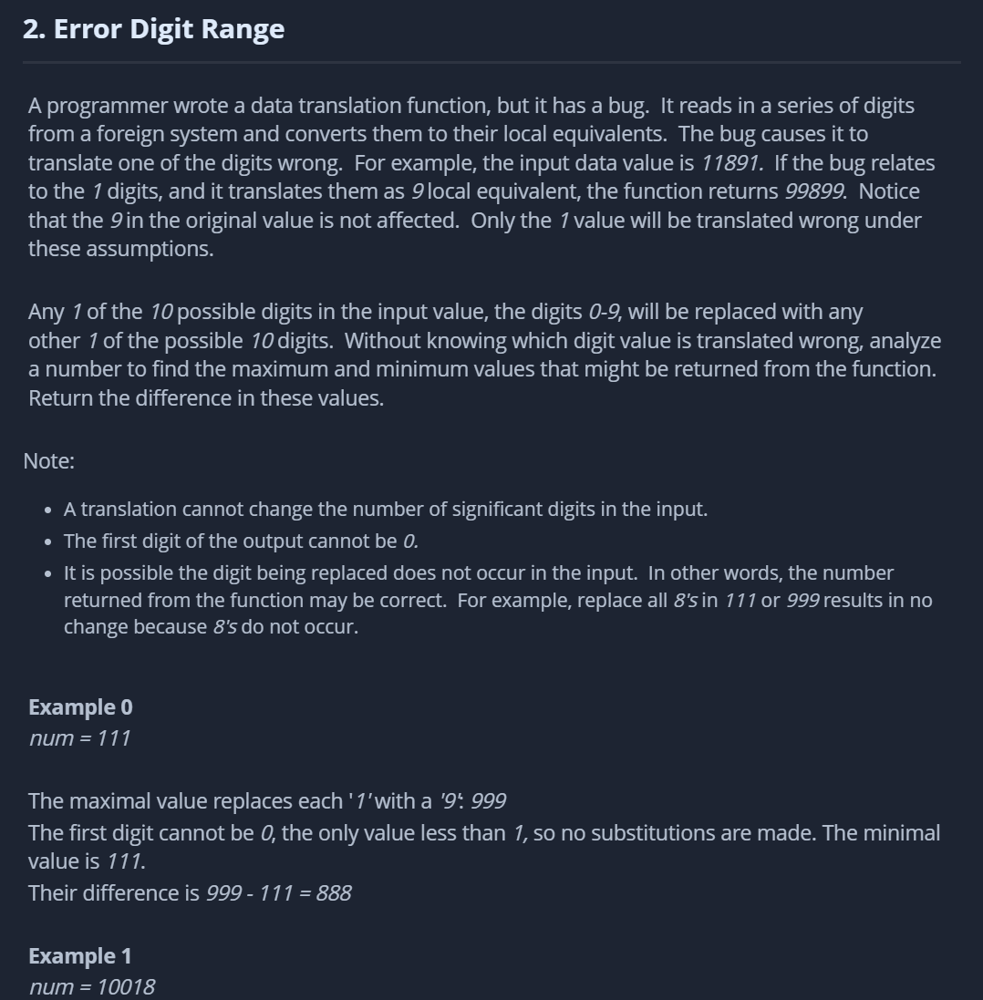

In [193]:
class Solution:
    def findRange(self, num):
        def replace_char(string, old_char, new_char):
            return ''.join([new_char if char == old_char else char for char in string])

        max_num = str(num)

        for digit in max_num:
            if digit != '9':
                max_num = replace_char(max_num, digit, '9')
                break

        max_num = int(max_num)

        min_num = str(num)
        for idx in range(len(min_num)):
            if idx > 0 and min_num[idx] != '0' and min_num[idx] != '1':
                min_num = replace_char(min_num, min_num[idx], '0')
                break
            elif min_num[idx] != '1':
                min_num = replace_char(min_num, min_num[idx], '1')
                break
        min_num = int(min_num)

        return max_num - min_num

sol = Solution()
print(sol.findRange(111)) #888
print(sol.findRange(909)) #898
print(sol.findRange(123512)) #820082

888
898
820082


In [189]:
num = '111'

num.replace('1', '9')
print(num)

111


### Bloomberg

#### Easy

##### 993.Cousins in Binary Tree

In [52]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def isCousins(self, root: Optional[TreeNode], x: int, y: int) -> bool:
        q = collections.deque([(root, None)])

        while q:
            dq_len = len(q)
            a, b = None, None #parents
            for _ in range(dq_len):
                node, par = q.popleft()
                if node:
                    if x == node.val:
                        a = par
                    if y == node.val:
                        b = par

                    if a and b and a != b:
                        return True

                    q.append((node.left, node))
                    q.append((node.right, node))
        return False

tree = TreeNode(1)
tree.left = TreeNode(2)
tree.right = TreeNode(3)
tree.left.left = TreeNode(4)

sol = Solution()
print(sol.isCousins(tree, 4, 3))




False


##### 344.Reverse String

In [63]:
class Solution:
    def reverseString(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        l, r = 0, len(s) - 1

        while l < r:
            s[l], s[r] = s[r], s[l]
            l += 1
            r -= 1

sol = Solution()
sol.reverseString(["h","e","l","l","o"])
sol.reverseString(["H","a","n","n","a","h"])

['o', 'l', 'l', 'e', 'h']
['h', 'a', 'n', 'n', 'a', 'H']


##### 1047.Remove All Adjacent Duplicates In String

In [ ]:
class Solution:
    def removeDuplicates(self, s: str) -> str:
        res = ''
        for ch in s:
            if res and res[-1] == ch:
                res = res[:-1]
            else:
                res += ch
        return res

    def removeDuplicates(self, s: str) -> str:
        stack = []

        for char in s:
            if stack and char==stack[-1]:
                stack.pop()
            else:
                stack.append(char)
        
        return ''.join(stack)
sol = Solution()
print(sol.removeDuplicates("abbaca")) #"ca"
print(sol.removeDuplicates("azxxzy")) #"ay"

ca
ay


##### 387.First Unique Character in a String

In [13]:
class Solution:
    def firstUniqChar(self, s: str) -> int:
        count_map = collections.Counter(s)

        for i in range(len(s)):
            if count_map[s[i]] == 1:
                return i

        return -1

sol = Solution()
print(sol.firstUniqChar("leetcode")) #0
print(sol.firstUniqChar("loveleetcode")) #2
print(sol.firstUniqChar("aabb")) #-1

0
2
-1


##### First Unique Character in a String

In [5]:
class Solution:
    """
    @param str: str: the given string
    @return: char: the first unique character in a given string
    """
    def first_uniq_char(self, str: str) -> str:
        count_map = {}

        for ch in str:
            count_map[ch] = count_map.get(ch, 0) + 1

        for k,v in count_map.items():
            if v == 1:
                return k
        

sol = Solution()
print(sol.first_uniq_char("abaccdeff")) #b
print(sol.first_uniq_char("aabccd")) #b
print(sol.first_uniq_char("xyxyxyxyxaazzbbciuiuiuiuiuiui")) #c


b
b
c


##### 203.Remove Linked List Elements

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
        dummy = ListNode(-1, head)

        prev = dummy
        temp = head
        while temp:
            if temp.val == val:
                prev.next = temp.next
            else:
                prev = temp
            temp = temp.next

        return dummy.next


##### 69.Sqrt(x)

In [33]:
class Solution:
    #O(logn) using binary search
    def mySqrt(self, x: int) -> int:
        low = 0
        high = x
        
        while low <= high:
            mid = (high + low) // 2
            
            if mid ** 2 < x:
                low = mid + 1
            elif mid ** 2 > x:
                high = mid - 1
            else:
                return mid
        
        return mid if mid ** 2 < x else mid - 1
        
sol = Solution()
print(sol.mySqrt(4)) #2
print(sol.mySqrt(8)) #2

2


##### 836.Rectangle Overlap

In [31]:
class Solution:
    def isRectangleOverlap(self, rec1: List[int], rec2: List[int]) -> bool:
        left = max(rec1[0], rec2[0]) # x1
        right = min(rec1[2], rec2[2]) # x2
        bottom = max(rec1[1], rec2[1]) # y1
        up = min(rec1[3], rec2[3]) # y2
        
        if left < right and up > bottom:
            return True
        else:
            return False

sol = Solution()
print(sol.isRectangleOverlap([0,0,2,2], [1,1,3,3])) #True
print(sol.isRectangleOverlap([0,0,1,1], [1,0,2,1])) #False
print(sol.isRectangleOverlap([0,0,1,1], [2,2,3,3])) #False

True
False
False


##### 88.Merge Sorted Array

In [47]:
class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        last = m + n - 1

        while m > 0 and n > 0:
            if nums1[m - 1] > nums2[n - 1]:
                nums1[last] = nums1[m - 1]
                m -= 1
            else:
                nums1[last] = nums2[n - 1]
                n -= 1
            last -= 1
        

        while n > 0:
            nums1[last] = nums2[n - 1]
            n -= 1
            last -= 1

        print(nums1)

    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        a,b,write_index=m-1,n-1,m+n-1

        while b >= 0:
            if a>= 0 and nums1[a]>nums2[b]:
                nums1[write_index]=nums1[a]
                a-= 1
            else:
                nums1[write_index]=nums2[b]
                b-= 1

            write_index-= 1


sol = Solution()
sol.merge([1,2,3,0,0,0], 3, [2,5,6], 3)

[1, 2, 2, 3, 5, 6]


#### Medium

##### 582.Kill Process

In [2]:
class Solution:
    """
    @param pid: the process id
    @param ppid: the parent process id
    @param kill: a PID you want to kill
    @return: a list of PIDs of processes that will be killed in the end
             we will sort your return value in output
    """
    def kill_process(self, pid: List[int], ppid: List[int], kill: int) -> List[int]:
        parent_map = defaultdict(list)

        for i in range(len(pid)):
            parent_map[ppid[i]].append(pid[i])

        stack = [kill]
        res = []
        while stack:
            id = stack.pop()
            res.append(id)
            stack.extend(parent_map[id])

        return res

sol = Solution()
print(sol.kill_process([1,3,10,5], [3,0,5,3], 5)) #[5, 10]
print(sol.kill_process([1,2,3], [0,1,1], 2)) #[2]


[5, 10]
[2]


##### 8.String to Integer (atoi)

In [36]:
class Solution:
    def myAtoi(self, s: str) -> int:
        if not s:
            return 0

        max_val = 2**31 - 1
        min_val = -2**31

        res = 0
        pos = 1 #to denote positive or negative
        changed = False
        
        for i in range(len(s)):
            if not changed and s[i] == ' ':
                continue
            elif not changed and s[i] in ['+', '-']:
                pos = -1 if s[i] == '-' else 1
                changed = True
            elif not s[i].isnumeric():
                return res * pos
            else:
                changed = True
                res = res * 10 + int(s[i])
                if pos != -1 and res > max_val:
                    return max_val
                elif res * pos < min_val:
                    return min_val

        return res * pos
            


sol = Solution()
print(sol.myAtoi("42")) #42
print(sol.myAtoi("     -42")) #-42
print(sol.myAtoi("4193 with words")) #4193
print(sol.myAtoi("words and 987")) #987
print(sol.myAtoi("-91283472332")) #-2147483648
print(sol.myAtoi("+-12")) #0

42
-42
4193
0
-2147483648
0


##### 532.K-diff Pairs in an Array

In [47]:
class Solution:
    def findPairs(self, nums: List[int], k: int) -> int:
        count_map = defaultdict(int)
        for num in nums:
            count_map[num] += 1

        res = 0
        for num in count_map.keys():
            if k > 0 and num + k in count_map or k == 0 and count_map[num] > 1:
                res += 1

        return res
        

sol = Solution()
print(sol.findPairs([3,1,4,1,5], 2)) #2
print(sol.findPairs([1,2,3,4,5], 1)) #4
print(sol.findPairs([1,3,1,5,4], 0)) #1

2
4
1


##### 662.Maximum Width of Binary Tree

In [11]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def widthOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        res = 1
        q = collections.deque([(root, 0)])
        while q:
            q_len = len(q)
            first = q[0][1]
            last = q[-1][1]
            res = max(res, last - first + 1)
            for _ in range(q_len):
                node, pos = q.popleft()
                if node.left:
                    q.append((node.left, 2*pos + 1))
                if node.right:
                    q.append((node.right, 2*pos + 2))
        return res

tree = TreeNode(1)
tree.left = TreeNode(3)
tree.right = TreeNode(2)
tree.left.left = TreeNode(5)
tree.left.right = TreeNode(3)
tree.right.right = TreeNode(9)
sol = Solution()
print(sol.widthOfBinaryTree(tree))

4


##### 328.Odd Even Linked List

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    
    def oddEvenList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return head

        count = 0
        end = head
        while end.next:
            end = end.next
            count += 1

        swaps = count // 2 
        if count % 2 != 0: 
            swaps += 1

        odd = head
        while swaps:
            end.next = odd.next
            odd.next = odd.next.next
            end.next.next = None
            odd = odd.next
            end = end.next
            swaps -= 1

        return head

    # Faster
    def oddEvenList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return head
        
        odd, even, even_head = head, head.next, head.next
        
        while even and even.next:
            odd.next = odd.next.next
            even.next = even.next.next
            odd = odd.next
            even = even.next

        odd.next = even_head
        return head

##### 934.Shortest Bridge

In [83]:
class Solution:
    def shortestBridge(self, grid: List[List[int]]) -> int:
        N = len(grid)
        directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

        def invalid(r, c):
            return r < 0 or r == N or c < 0 or c == N

        visit = set()
        
        def dfs(r, c):
            if invalid(r,c) or not grid[r][c] or (r,c) in visit:
                return
            visit.add((r,c))
            for x, y in directions:
                dfs(r + x, c + y)

        def bfs():
            level, q = 0, collections.deque(visit)
            while q:
                q_len = len(q)
                for _ in range(q_len):
                    r, c = q.popleft()
                    for x, y in directions:
                        cur_x = r + x
                        cur_y = c + y
                        if invalid(cur_x, cur_y) or (cur_x, cur_y) in visit:
                            continue
                        if grid[cur_x][cur_y]:
                            return level
                        q.append((cur_x, cur_y))
                        visit.add((cur_x, cur_y))
                level += 1

        for i in range(N):
            for j in range(N):
                if grid[i][j]:
                    dfs(i, j)
                    return bfs()


sol = Solution()
print(sol.shortestBridge([[0,1],[1,0]])) #1
print(sol.shortestBridge([[0,1,0],[0,0,0],[0,0,1]])) #2
print(sol.shortestBridge([[1,1,1,1,1],[1,0,0,0,1],[1,0,1,0,1],[1,0,0,0,1],[1,1,1,1,1]])) #1

1
2
1


##### 236.Lowest Common Ancestor of a Binary Tree

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None


class Solution:
    #O(n) - the node that returns true for both values is the common ancestor
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if root.val == p.val or root.val == q.val:
            return root
        if not root.left and not root.right:
            return None

        left, right = None, None
        if root.left:
            left = self.lowestCommonAncestor(root.left, p, q)
        if root.right:
            right = self.lowestCommonAncestor(root.right, p, q)

        if left and right:
            return root
        
        return left if left != None else right

##### 652.Find Duplicate Subtrees

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    #O(n) since all the nodes are being traversed exactly once; time and space
    def findDuplicateSubtrees(self, root: Optional[TreeNode]) -> List[Optional[TreeNode]]:
        res = []
        path_map = {}

        def dfs(node, path):
            if not node:
                return "X"

            path += ",".join([str(node.val), dfs(node.left, path), dfs(node.right, path)])

            if path in path_map:
                path_map[path] += 1

                if path_map[path] == 2:
                    res.append(node)
            else:
                path_map[path] = 1

            return path
            
        dfs(root, '')
        return res

##### 978.Longest Turbulent Subarray

In [20]:
class Solution:
    # timeOut -- Wrong
    def maxTurbulenceSize1(self, arr: List[int]) -> int:
        start = 0
        res = 1

        while start < len(arr) -1:
            j = start + 1
            great_flag = arr[start] > arr[j]
            prev = arr[start]
            
            while j < len(arr):
                if (great_flag and prev > arr[j]
                    or not great_flag and prev < arr[j]):
                    prev = arr[j]
                    res = max(res, j - start + 1)
                    j += 1
                    great_flag = not great_flag
                    
                else:
                    break
            
            start += 1

        return res

    # O(n) time, O(1) space
    def maxTurbulenceSize(self, arr: List[int]) -> int:
        def cmp(a, b):
            return (a > b) - (a < b) 

        N = len(arr)
        ans = 1
        anchor = 0

        for i in range(1, N):
            c = cmp(arr[i-1], arr[i])
            if c == 0:
                anchor = i
            elif i == N-1 or c * cmp(arr[i], arr[i+1]) != -1:
                ans = max(ans, i - anchor + 1)
                anchor = i
        return ans

sol = Solution()
print(sol.maxTurbulenceSize([9,4,2,10,7,8,8,1,9])) #5
print(sol.maxTurbulenceSize([4,8,12,16])) #2
print(sol.maxTurbulenceSize([100])) #1

5
2
1


##### 1209.Remove All Adjacent Duplicates in String II

In [124]:
class Solution:
    def removeDuplicates(self, s: str, k: int) -> str:
        stack = [] #[char, count]

        for c in s:
            if stack and stack[-1][0] == c:
                stack[-1][1] += 1
                if stack[-1][1] == k:
                    stack.pop()
            else:
                stack.append([c, 1])

        return "".join([ch*c for ch, c in stack]) if stack else ""
            

sol  = Solution()
print(sol.removeDuplicates("abcd", 2)) #"abcd"
print(sol.removeDuplicates("deeedbbcccbdaa", 3)) #"aa"
print(sol.removeDuplicates("pbbcggttciiippooaais", 2)) #"ps"

abcd
aa
ps


##### 390.Elimination Game

In [21]:
class Solution:
    def lastRemaining(self, n: int) -> int:
        res = 1
        rem = n
        left = True
        step = 1

        while rem > 1:
            if left or rem % 2 == 1:
                res += step

            rem = rem//2
            step *= 2
            left = not left

        return res

sol = Solution()
print(sol.lastRemaining(9)) #6
print(sol.lastRemaining(1)) #1

6
1


##### First Unique Number in Data Stream II

In [ ]:
class DataStream:

    def __init__(self):
        self.count_map = defaultdict(int)
          
    """
    @param num: next number in stream
    @return: nothing
    """
    def add(self, num):
        self.count_map[num] += 1
        if self.count_map[num] > 1:
            del self.count_map[num]

    """
    @return: the first unique number in stream
    """
    def firstUnique(self):
        print(list(self.count_map.items())[0][0])

d = DataStream()
d.add(1)
d.add(2)
d.firstUnique() #1
d.add(1)
d.firstUnique() #2

d2 = DataStream()
d2.add(1)
d2.add(2)
d2.add(3)
d2.add(4)
d2.add(5)
d2.firstUnique() #1
d2.add(1)
d2.firstUnique() #2
d2.add(2)
d2.firstUnique() #3
d2.add(3)
d2.firstUnique() #4
d2.add(4)
d2.firstUnique() #5
d2.add(5)
d2.add(6)
d2.firstUnique() #6

1
2
1
2
3
4
5
6


##### First Unique Number in Data Stream

In [27]:
class Solution:
    """
    @param nums: a continuous stream of numbers
    @param number: a number
    @return: returns the first unique number
    """
    def first_unique_number(self, nums: List[int], number: int) -> int:
        count_map = defaultdict(int)

        for num in nums + [number]:
            count_map[num] += 1
            if count_map[num] > 1:
                del count_map[num]

        return number if number not in [k for k, v in list(count_map.items())] else -1

sol = Solution()
print(sol.first_unique_number([1, 2, 2, 1, 3, 4, 4, 5, 6], 5)) #5
print(sol.first_unique_number([1, 2, 2, 1, 3, 4, 4, 5, 6], 7)) #-1
print(sol.first_unique_number([1, 2, 2, 1, 3, 4], 3)) #3


5
-1
3


##### 1105.Filling Bookcase Shelves

In [30]:
class Solution:
    def minHeightShelves(self, books: List[List[int]], shelfWidth: int) -> int:
        cache = {}

        def dfs(i, rem_width, cur_height):
            if i >= len(books):
                return cur_height

            key = str(i) + "_" + str(rem_width)
            if key in cache:
                return cache[key]
            
            # put current book on the next level of shelf
            next_shelf_height = cur_height + dfs(i+1, shelfWidth-books[i][0], books[i][1])

            # if the book could be put on this level of shelf, try to put it
            curr_shelf_height = float("inf")
            if books[i][0] <= rem_width:
                curr_shelf_height = dfs(i+1, rem_width-books[i][0], max(cur_height, books[i][1]))
            
            cache[key] = min(next_shelf_height, curr_shelf_height)
            return cache[key]

        return dfs(0, shelfWidth, 0)



sol = Solution()
print(sol.minHeightShelves([[1,1],[2,3],[2,3],[1,1],[1,1],[1,1],[1,2]], 4)) #6
print(sol.minHeightShelves([[1,3],[2,4],[3,2]], 6)) #4

6
4


##### 503.Next Greater Element II

In [37]:
class Solution:
    def nextGreaterElements(self, nums: List[int]) -> List[int]:
        N = len(nums)

        res = [-1] * N
        stack = []

        for i in range(2* N):
            while stack and nums[stack[-1]] < nums[i % N]:
                res[stack.pop()] = nums[i % N]
            if i < N:
                stack.append(i)

        return res



sol = Solution()
print(sol.nextGreaterElements([1,2,1])) #[2,-1,2]
print(sol.nextGreaterElements([1,2,3,4,3])) #[2,3,4,-1,4]

[2, -1, 2]
[2, 3, 4, -1, 4]


##### 229.Majority Element II

In [12]:
class Solution:
    def majorityElement(self, nums: List[int]) -> List[int]:
        N = len(nums)

        a, b = None, None
        a_c, b_c = 0, 0

        for num in nums:
            if a == num:
                a_c += 1
            elif b == num:
                b_c += 1
            elif a_c == 0:
                a = num
                a_c += 1
            elif b_c == 0:
                b = num
                b_c += 1
            else:
                a_c -= 1
                b_c -= 1

        res = []
        for c in [a, b]:
            if nums.count(c) > N//3:
                res.append(c)

        return res

sol = Solution()
print(sol.majorityElement([3,2,3])) #[3]
print(sol.majorityElement([1])) #[1]
print(sol.majorityElement([1, 2])) #[1, 2]
print(sol.majorityElement([2,2,1,3])) #[2]

[3]
[1]
[1, 2]
[2]


##### 611.Valid Triangle Number

In [13]:
class Solution:
    def triangleNumber(self, nums: List[int]) -> int:
        nums.sort()

        res = 0
        for k in range(2, len(nums)):
            i, j = 0, k-1
            while i < j:
                if nums[i] + nums[j] > nums[k]:
                    res += (j - i)
                    j -= 1
                else:
                    i += 1

        return res
                

sol = Solution()
print(sol.triangleNumber([2,2,3,4])) #3
print(sol.triangleNumber([4,2,3,4])) #4

3
4


##### 399.Evaluate Division

In [18]:
class Solution:
    def calcEquation(self, equations: List[List[str]], values: List[float], queries: List[List[str]]) -> List[float]:
        calc_map = defaultdict(dict)

        for i in range(len(equations)):
            calc_map[equations[i][0]][equations[i][1]] = values[i]
            calc_map[equations[i][1]][equations[i][0]] = 1/values[i]

        def dfs(x, y, visited):
            if x not in calc_map or y not in calc_map:
                return -1

            if y in calc_map[x]:
                return calc_map[x][y]

            for i in calc_map[x]:
                if i not in visited:
                    visited.add(i)
                    temp = dfs(i, y, visited)
                    if temp == -1:
                        continue
                    return temp * calc_map[x][i]

            return -1

        res = []
        for x, y in queries:
            res.append(dfs(x, y, set()))

        return res

sol = Solution()
print(sol.calcEquation([["a","b"],["b","c"]], [2.0,3.0], [["a","c"],["b","a"],["a","e"],["a","a"],["x","x"]])) #[6.00000,0.50000,-1.00000,1.00000,-1.00000]
print(sol.calcEquation([["a","b"],["b","c"],["bc","cd"]], [1.5,2.5,5.0], [["a","c"],["c","b"],["bc","cd"],["cd","bc"]])) #[3.75000,0.40000,5.00000,0.20000]
print(sol.calcEquation([["a","b"]], [0.5], [["a","b"],["b","a"],["a","c"],["x","y"]])) #[0.50000,2.00000,-1.00000,-1.00000]

[6.0, 0.5, -1, 1.0, -1]
[3.75, 0.4, 5.0, 0.2]
[0.5, 2.0, -1, -1]


##### 116.Populating Next Right Pointers in Each Node

In [ ]:
# Definition for a Node.
class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next


class Solution:
    def connect(self, root: 'Optional[Node]') -> 'Optional[Node]':
        if not root: return root

        q = collections.deque([root])
        while q:
            temp = None
            for i in range(len(q)):
                node = q.popleft()

                if not temp:
                    temp = node
                else:
                    temp.next = node
                    temp = temp.next
                
                if node.left:
                    q.append(node.left)
                    q.append(node.right)
            
        return root

##### 797.All Paths From Source to Target

In [26]:
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        res = []
        path = {}
        
        def dfs(node, target):
            if node == target:
                path[node] = 1
                res.append(list(path.keys()))
                del path[node]
                return

            if node in path:
                return

            path[node] = 1
            for nei in graph[node]:
                dfs(nei, target)
            del path[node]


        dfs(0, len(graph) - 1)
        return res

sol = Solution()
print(sol.allPathsSourceTarget([[1,2],[3],[3],[]])) #[[0,1,3],[0,2,3]]
print(sol.allPathsSourceTarget([[4,3,1],[3,2,4],[3],[4],[]])) #[[0,4],[0,3,4],[0,1,3,4],[0,1,2,3,4],[0,1,4]]

[[0, 1, 3], [0, 2, 3]]
[[0, 4], [0, 3, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4], [0, 1, 4]]


##### 12.Integer to Roman

In [29]:
class Solution:
    def intToRoman(self, num: int) -> str:
        value_roman = {1000:"M", 900:"CM", 500:"D", 400:"CD",
                       100:"C", 90:"XC", 50:"L", 40:"XL",
                       10:"X", 9:"IX", 5:"V", 4:"IV", 1:"I"}
        roman = ""
        for v in value_roman.keys():
            roman += value_roman[v] * (num//v)
            num %= v
        return roman

sol = Solution()
print(sol.intToRoman(3)) #III
print(sol.intToRoman(58)) #"LVIII"
print(sol.intToRoman(1994)) #"MCMXCIV"

III
LVIII
MCMXCIV


##### 117.Populating Next Right Pointers in Each Node II

In [ ]:
# Definition for a Node.
class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next


class Solution:
    def connect(self, root: 'Node') -> 'Node':
        if not root: return root

        q = collections.deque([root])
        while q:
            temp = None
            for i in range(len(q)):
                node = q.popleft()

                if not temp:
                    temp = node
                else:
                    temp.next = node
                    temp = temp.next
                
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
            
        return root

##### 445.Add Two Numbers II

In [ ]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        if not l1 and not l2:
            return None

        l1_num = 0
        while l1:
            l1_num = l1_num * 10 + l1.val
            l1 = l1.next

        l2_num = 0
        while l2:
            l2_num = l2_num * 10 + l2.val
            l2 = l2.next

        lsum = l1_num + l2_num

        head = ListNode(None)
        cur = head
        for istr in str(lsum):
            cur.next = ListNode(int(istr))
            cur = cur.next

        return head.next

##### 162.Find Peak Element

In [34]:
class Solution:
    def findPeakElement(self, nums: List[int]) -> int:
        l, r = 0, len(nums) - 1

        while l < r:
            mid = (l + r)//2

            if nums[mid] < nums[mid + 1]:
                l = mid + 1
            else:
                r = mid

        return l

sol = Solution()
print(sol.findPeakElement([1,2,3,1])) #2
print(sol.findPeakElement([1,2,1,3,5,6,4])) #5

2
5


##### Meeting Rooms II

In [37]:

# Definition of Interval:
class Interval(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end


class Solution:
    """
    @param intervals: an array of meeting time intervals
    @return: the minimum number of conference rooms required
    """
    def min_meeting_rooms(self, intervals: List[Interval]) -> int:
        starts = sorted([i.start for i in intervals])
        ends = sorted([i.end for i in intervals])

        res, count = 0, 0
        s, e = 0, 0

        while s < len(intervals):
            if starts[s] < ends[e]:
                s += 1
                count += 1
            else:
                e += 1
                count -= 1

            res = max(res, count)
        return res


# sol = Solution()
# print(sol.min_meeting_rooms([(0,30),(5,10),(15,20)])) #2
# print(sol.min_meeting_rooms([(2,7)])) #1

##### 451.Sort Characters By Frequency

In [43]:
class Solution:
    def frequencySort(self, s: str) -> str:
        count_map = collections.Counter(s)

        count_map = sorted(list(count_map.items()), key = lambda i : i[1], reverse = True)
        res = ''
        for k in count_map:
            res += k * count_map[k]

        return res

    # more memory
    def frequencySort(self, s: str) -> str:
        dic = collections.Counter(s)
        import heapq
        freq = []
        for k,v in dic.items():
            heapq.heappush(freq, (-1*v, k))
        curr = ''
        while freq:
            count, c = heapq.heappop(freq)
            count *=-1
            curr += count*c
        return curr

        

sol = Solution()
print(sol.frequencySort("tree")) #eert
print(sol.frequencySort("cccaaa")) #aaaccc
print(sol.frequencySort("Aabb")) #bbAa
    

eetr
cccaaa
bbAa


##### 114.Flatten Binary Tree to Linked List

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def flatten(self, root: Optional[TreeNode]) -> None:
        """
        Do not return anything, modify root in-place instead.
        """
        
        def dfs(root):
            if not root:
                return None

            leftTail = dfs(root.left)
            rightTail = dfs(root.right)

            if leftTail:
                leftTail.right = root.right
                root.right = root.left
                root.left = None
            
            tail = rightTail or leftTail or root
            return tail

        dfs(root)


##### 560.Subarray Sum Equals K

In [54]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        res = 0
        curSum = 0
        prefixSum = {0:1}

        for num in nums:
            curSum += num
            if curSum - k in prefixSum:
                res += prefixSum[curSum - k]
            prefixSum[curSum] = prefixSum.get(curSum,0) + 1
        
        return res
    

sol = Solution()
print(sol.subarraySum([1,1,1], 2)) #2
print(sol.subarraySum([1,2,3], 3)) #2

2
2


##### 31.Next Permutation

In [32]:
class Solution:
    def nextPermutation(self, nums: List[int]) -> List[int]:
        """
        Do not return anything, modify nums in-place instead.
        """

        pivot = -1
        for i in range(len(nums)-1,0, -1):
            if nums[i] > nums[i-1]:
                pivot = i-1
                break

        if pivot == -1:
            nums = nums[::-1]
        else:
            for i in range(len(nums)-1, pivot, -1):
                if nums[i] > nums[pivot]:
                    # swap
                    p = nums[pivot]
                    nums[pivot] = nums[i]
                    nums[i] = p
                    break
            
            nums[pivot+1:] = nums[pivot+1:][::-1]
        
        return nums


sol = Solution()
print(sol.nextPermutation([1,2,3])) #[1,3,2]
print(sol.nextPermutation([3,2,1])) #[1,2,3]
print(sol.nextPermutation([1,1,5])) #[1,5,1]

[1, 3, 2]
[1, 2, 3]
[1, 5, 1]


##### 16.3Sum Closest

In [69]:
class Solution:
    def threeSumClosest(self, nums: List[int], target: int) -> int:
        result = 0
        diff = float('inf')
        nums.sort()

        for i in range(len(nums) - 2):
            begin = i + 1
            end = len(nums) - 1
            while begin < end:
                currentSum = nums[i] + nums[begin] + nums[end]
                currentDif = abs(target - currentSum)

                if diff >= currentDif:
                    diff = currentDif
                    result = currentSum

                if currentSum < target:
                    begin += 1
                else:
                    end -= 1

        return result

sol = Solution()
print(sol.threeSumClosest([-1,2,1,-4], 1)) #2
print(sol.threeSumClosest([0,0,0], 1)) #0

2
0


##### 96.Unique Binary Search Trees

In [78]:
class Solution:
    def numTrees(self, n: int) -> int:
        num_trees = [1] * (n + 1)
        for nodes in range(2, n + 1):
            total = 0
            for root in (1, nodes + 1):
                left = root - 1
                right = nodes - root
                total += num_trees[left] * num_trees[right]
            num_trees[nodes] = total
        return num_trees[n]

    def numTrees1(self, n: int) -> int:
        dp = [0] * (n + 1)
        dp[0] = dp[1] = 1
        
        for i in range(2, n+1) :
            for j in range(i) :
                dp[i] += dp[j] * dp[(i-1)-j]
        
        return dp[-1]
            
sol = Solution()
print(sol.numTrees(3)) #5
print(sol.numTrees(1)) #1

5
1


##### 75.Sort Colors

In [82]:
class Solution:
    #bucket sort
    def sortColors1(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        count_map = collections.Counter(nums)
        start = 0
        for i in range(len(nums)):
            while count_map[start] == 0:
                start += 1
            nums[i] = start
            count_map[start] -= 1

    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        l, r = 0, len(nums) - 1
        i = 0

        while i <= r:
            if nums[i] == 0:
                nums[l], nums[i] = nums[i], nums[l]
                l += 1
            elif nums[i] == 2:
                nums[r], nums[i] = nums[i], nums[r]
                r -= 1
                i -= 1
            i += 1

        print(nums)


sol = Solution()
sol.sortColors([2,0,2,1,1,0]) # [0,0,1,1,2,2]
sol.sortColors([2,0,1]) # [0,1,2]

[0, 0, 1, 1, 2, 2]
[0, 1, 2]


#### Hard

##### 41.First Missing Positive

In [116]:
class Solution:
    #O(n)
    def firstMissingPositive_(self, nums: List[int]) -> int:
        for i in range(len(nums)):
            pos = nums[i] - 1 #correct position
            while 1 <= nums[i] <= len(nums) and nums[i] != nums[pos]:
                nums[i], nums[pos] = nums[pos], nums[i]
                pos = nums[i] - 1
            
        for i in range(len(nums)):
            if nums[i] != i + 1:
                return i + 1

        return len(nums) + 1

    def firstMissingPositive(self, nums: List[int]) -> int:
        num_len = len(nums)
        # changing all negatives to zero
        for i in range(num_len):
            if nums[i] < 0:
                nums[i] = 0

        # Marking if a value exists
        for i in range(num_len):
            val = abs(nums[i])
            if 1 <= val <= num_len:
                if nums[val - 1] > 0:
                    nums[val - 1] *= -1
                elif nums[val - 1] == 0:
                    nums[val - 1] = -1 * (num_len + 1)

        # Finding the missing num
        for i in range(1, num_len + 1):
            if nums[i - 1] >= 0:
                return i

        return num_len + 1

sol = Solution()
print(sol.firstMissingPositive([1,2,0])) #3
print(sol.firstMissingPositive([3,4,-1,1])) #2
print(sol.firstMissingPositive([7,8,9,11,12])) #1

3
2
1


##### 44.Wildcard Matching

In [9]:
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        if not p:
            return not s
        
        level = {0}
        for i, c in enumerate(p):
            if not level:
                return False
            
            if c == "*":
                level = set(range(min(level), len(s)+1))
            else:
                level = {j+1 for j in level if j < len(s) and (s[j] == c or c == "?")}
        
        return len(s) in level

sol = Solution()
print(sol.isMatch("aa", "a")) # false
print(sol.isMatch("aa", "*")) # true
print(sol.isMatch("ab", "*")) # true
print(sol.isMatch("aa", "aa")) # true
print(sol.isMatch("cb", "?a")) # false

False
True
True
True
False


##### 727.Minimum Window Subsequence

In [12]:
class Solution:
    """
    @param s: a string
    @param t: a string
    @return: the minimum substring of S
    """
    def min_window(self, s: str, t: str) -> str:
        s_len = len(s)
        t_len = len(t)
        
        dp = [[-1 for j in range(t_len)] for i in range(s_len)]
        
        # Marking start positions
        for i in range(s_len):
            if s[i] == t[0]:
                dp[i][0] = i
            elif (i != 0):
                dp[i][0] = dp[i-1][0]
        
        # Marking rest of the positions
        for i in range(1, s_len):
            for j in range(1, t_len):
                if s[i] == t[j]:
                    dp[i][j] = dp[i-1][j-1]
                else:
                    dp[i][j] = dp[i-1][j]

        start_pos, end_pos = -1, -1
        res = float('inf')
        # going through end columns to see if string end exists 
        for i in range(s_len):
            start_idx = dp[i][t_len - 1]
            if start_idx != -1:
                curLength = i - start_idx + 1
                if curLength < res:
                    start_pos = start_idx
                    end_pos = i
                    res = curLength
                
        if start_pos == -1:
            return ""
        return s[start_pos:end_pos + 1]

sol = Solution()
# print(sol.min_window("jmeqksfrsdcmsiwvaovztaqenprpvnbstl", "u")) # ""
print(sol.min_window("abcdebdde", "bde")) # "bcde"
print(sol.min_window("abcdexyzy", "bde")) # "bcde"


bcde
bcde


##### 460.LFU Cache

In [18]:
class Node:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.freq = 1
        self.prev = self.next = None

class DLinkedList:
    """ An implementation of doubly linked list.
	
	Two APIs provided:
    
    append(node): append the node to the head of the linked list.
    pop(node=None): remove the referenced node. 
                    If None is given, remove the one from tail, which is the least recently used.
                    
    Both operation, apparently, are in O(1) complexity.
    """
    def __init__(self):
        self.dummy = Node(None, None) # dummy node
        self.dummy.next = self.dummy.prev = self.dummy
        self._size = 0
    
    def __len__(self):
        return self._size
    
    def append(self, node):
        node.next = self.dummy.next
        node.prev = self.dummy
        node.next.prev = node
        self.dummy.next = node
        self._size += 1
    
    def pop(self, node=None):
        if self._size == 0:
            return
        
        if not node:
            node = self.dummy.prev

        node.prev.next = node.next
        node.next.prev = node.prev
        self._size -= 1
        
        return node

class LFUCache:

    def __init__(self, capacity):
        """
        :type capacity: int
        
        Three things to maintain:
        
        1. a dict, named as `self._node`, for the reference of all nodes given key.
           That is, O(1) time to retrieve node given a key.
           
        2. Each frequency has a doubly linked list, store in `self._freq`, where key
           is the frequency, and value is an object of `DLinkedList`
        
        3. The min frequency through all nodes. We can maintain this in O(1) time, taking
           advantage of the fact that the frequency can only increment by 1. Use the following
		   two rules:
           
           Rule 1: Whenever we see the size of the DLinkedList of current min frequency is 0,
                   the min frequency must increment by 1.
           
           Rule 2: Whenever put in a new (key, value), the min frequency must 1 (the new node)
           
        """
        self._size = 0
        self._capacity = capacity
        
        self._node = dict() # key: Node
        self._freq = collections.defaultdict(DLinkedList) #Frequency to linked lists
        self._minfreq = 0
        
        
    def _update(self, node):
        """ 
        This is a helper function that used in the following two cases:
        
            1. when `get(key)` is called; and
            2. when `put(key, value)` is called and the key exists.
         
        The common point of these two cases is that:
        
            1. no new node comes in, and
            2. the node is visited one more times -> node.freq changed -> 
               thus the place of this node will change
        
        The logic of this function is:
        
            1. pop the node from the old DLinkedList (with freq `f`)
            2. append the node to new DLinkedList (with freq `f+1`)
            3. if old DlinkedList has size 0 and self._minfreq is `f`,
               update self._minfreq to `f+1`
        
        All of the above opeartions took O(1) time.
        """
        freq = node.freq
        
        self._freq[freq].pop(node)
        if self._minfreq == freq and not self._freq[freq]:
            self._minfreq += 1
        
        node.freq += 1
        freq = node.freq
        self._freq[freq].append(node)
    
    def get(self, key):
        """
        Through checking self._node[key], we can get the node in O(1) time.
        Just performs self._update, then we can return the value of node.
        
        :type key: int
        :rtype: int
        """
        if key not in self._node:
            return -1
        
        node = self._node[key]
        self._update(node)
        return node.val

    def put(self, key, value):
        """
        If `key` already exists in self._node, we do the same operations as `get`, except
        updating the node.val to new value.
        
        Otherwise, the following logic will be performed
        
        1. if the cache reaches its capacity, pop the least frequently used item. (*)
        2. add new node to self._node
        3. add new node to the DLinkedList with frequency 1
        4. reset self._minfreq to 1
        
        (*) How to pop the least frequently used item? Two facts:
        
        1. we maintain the self._minfreq, the minimum possible frequency in cache.
        2. All cache with the same frequency are stored as a DLinkedList, with
           recently used order (Always append at head)
          
        Consequence? ==> The tail of the DLinkedList with self._minfreq is the least
                         recently used one, pop it...
        
        :type key: int
        :type value: int
        :rtype: void
        """
        if self._capacity == 0:
            return
        
        if key in self._node:
            node = self._node[key]
            self._update(node)
            node.val = value
        else:
            if self._size == self._capacity:
                node = self._freq[self._minfreq].pop()
                del self._node[node.key]
                self._size -= 1
                
            node = Node(key, value)
            self._node[key] = node
            self._freq[1].append(node)
            self._minfreq = 1
            self._size += 1

# Your LFUCache object will be instantiated and called as such:
lfu = LFUCache(2)
lfu.put(1, 1)   # cache=[1,_], cnt(1)=1
lfu.put(2, 2)   # cache=[2,1], cnt(2)=1, cnt(1)=1
lfu.get(1)      # return 1
                # cache=[1,2], cnt(2)=1, cnt(1)=2
lfu.put(3, 3)   # 2 is the LFU key because cnt(2)=1 is the smallest, invalidate 2.
                # cache=[3,1], cnt(3)=1, cnt(1)=2
lfu.get(2)      # return -1 (not found)
lfu.get(3)      # return 3
                # cache=[3,1], cnt(3)=2, cnt(1)=2
lfu.put(4, 4)   # Both 1 and 3 have the same cnt, but 1 is LRU, invalidate 1.
                # cache=[4,3], cnt(4)=1, cnt(3)=2
lfu.get(1)      # return -1 (not found)
lfu.get(3)      # return 3
                # cache=[3,4], cnt(4)=1, cnt(3)=3
lfu.get(4)      # return 4
                # cache=[4,3], cnt(4)=2, cnt(3)=3

4

##### 987.Vertical Order Traversal of a Binary Tree

In [73]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    # sort level wise and then row wise
    def verticalTraversal(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root: return []

        res = []
        col_map = defaultdict(list)
        lowest, highest = 0, 0
        
        q = collections.deque([(root, (0, 0))])
        def bfs():
            nonlocal lowest, highest
            while q:
                q_len = len(q)

                for _ in range(q_len):
                    node, (row, col) = q.popleft()
                    
                    col_map[col].append((row, node.val))
                    if node.left:
                        q.append((node.left, (row + 1, col - 1)))
                        lowest = min(lowest, col - 1)
                    if node.right:
                        q.append((node.right, (row + 1, col + 1)))
                        highest = max(highest, col + 1)

        bfs()

        for i in range(lowest, highest + 1):
            res.append([val for row, val in sorted(col_map[i])])

        return res

tree = TreeNode(3)
tree.left = TreeNode(1)
tree.right = TreeNode(4)
tree.left.left = TreeNode(0)
tree.left.right = TreeNode(2)
tree.right.left = TreeNode(2)

sol = Solution()
print(sol.verticalTraversal(tree))

[[0], [1], [3, 2, 2], [4]]


### Amazon OA

#### Rice bags

In [ ]:
import collections, math

def maxSetSize(riceBags):
    count_map = collections.defaultdict(int)
    res = 1
    riceBags.sort()
    for s in riceBags:
        count_map[s] = count_map.get(math.sqrt(s), 0) + count_map.get(s*s, 0) + 1
        res = max(res, count_map[s])

    return -1 if res == 1 else res

#### Max Products picked

In [ ]:
import collections

def findMaxProducts(products):
    max_sum = 0
    for i in range(len(products) -1, -1, -1):
        prev = products[i]
        curr_sum = products[i]
        for j in range(i-1, -1, -1):
            if prev == 0:
                break

            if products[j] < prev:
                prev = products[j]
            else:
                prev -= 1

            sum += prev 
        max_sum = max(max_sum, curr_sum)

    return max_sum
                

#### Bookseller portal update

In [4]:
class Solution:
    def maxBookCopies(self, portalUpdate):
        cnt_map = defaultdict(int)
        res = []
        
        for update in portalUpdate:
            cnt_map[abs(update)] = cnt_map[abs(update)] + (update//abs(update))
            res.append(max(cnt_map.values()))

        return res


sol = Solution()
print(sol.maxBookCopies([6,6,2,-6,-2,-6])) #[1,2,2,1,1,0]
print(sol.maxBookCopies([1,2,-1,-2])) #[1,1,1,2]

[1, 2, 2, 1, 1, 0]
[1, 1, 1, 0]


#### Processes priority

In [5]:
import heapq

def get_priorities_after_execution(priorities):
    heap = [(-priority, i) for i, priority in enumerate(priorities)]
    heapq.heapify(heap)

    processes_not_execute = []

    while heap and heap[0][0] != 0:
        negative_highest_priority, idx = heapq.heappop(heap)
        
        if heap and heap[0][0] == negative_highest_priority:
            heapq.heappush(heap, (-(-negative_highest_priority // 2), heapq.heappop(heap)[1]))
        else:
            processes_not_execute.append((negative_highest_priority, idx))
    
    processes_not_execute.extend(heap)
    
    processes_not_execute.sort(key = lambda priroity_idx_pair : priroity_idx_pair[1])

    return [-priroity_idx_pair[0] for priroity_idx_pair in processes_not_execute] 

print(get_priorities_after_execution([1, 1, 1, 1])) # [0, 0]
print(get_priorities_after_execution([1, 3, 5, 10, 10])) # [1, 3, 2]
print(get_priorities_after_execution([4, 4, 2, 1])) # [0]
print(get_priorities_after_execution([6, 6, 6, 1, 2, 2])) # [3, 6, 0]
print(get_priorities_after_execution([6, 1, 6, 1, 3])) # [0,1]
print(get_priorities_after_execution([3,6,1,2,2,2])) # [3,6,0,2]
print(get_priorities_after_execution([3,6,1,1,2,2]))   #  [3,6,0,1]
print(get_priorities_after_execution([3,6,6,1,2,2])) # [0, 1]

[0, 0]
[1, 3, 2]
[0]
[3, 6, 0]
[0, 1]
[3, 6, 0, 2]
[3, 6, 0, 1]
[0, 1]


## Flexport 

Generate a random sentence of length N from a given text. Logic:

Randomly select a word
The next word will be the subsequent contagious word from the previously selected word. If the next word occurs multiple times in the sentence, select randomly.
Continue until length fulfill required length
Special case: If the chosen word has no next word (last word in the sentence, use first word as the "next word" - assume circular)

Example
text = "hello this is a flexport interview and this is a hello and that was cool"
n = 4

say first word randomly selected is "flexport"
next word after "flexport" in the text is "interview". "interview" only occurs once.
next word after "interview" in the text is "and". "and" occurs twice at index 6 & 11. Randomly select one of the indices. Say we select the one at index 6
next word after "and" at index 6 is "this". "this" occurs at twice at index 1 & 7. Randomly selected at 7.
Output: "flexport interview and this"

In [15]:
import random
class Solution:
    def random_words(self, text: str, n: int) -> str: #O(n) time and space
        word_index_map = collections.defaultdict(list)
        
        # Creating the word map
        text = text.split()
        for idx, word in enumerate(text): # O(n)
            word_index_map[word].append(idx)

        res = []
        
        # First word
        idx = random.randint(0, len(text) - 1)
        res.append(text[idx])
        n -= 1
        
        while n > 0:
            idx = random.choice(word_index_map[text[(idx + 1) % len(text)]])
            res.append(text[idx])
            n -= 1
        
        return ' '.join(res)

sol = Solution()
print(sol.random_words("hello this is a flexport interview and this is a hello and that was cool", 4))

and that was cool


I was asked this problem during phone screen and could come with right solution. Can someone give some insight how I should approach this?

Below is a section of a city with roads and stop lights. The letters indicate entry points where we measure traffic flow.
Each intersection has a traffic light - We want to build a program to simulate traffic flowing through the city so we can
test traffic light control algorithms with sample data.

For purposes of this exercise, your simulation should operate on 1 minute intervals,
where every minute lights (potentially) change and cars drive along roads, with each section of road taking 1 minute to drive.

       J    
       |    
  A ---🚦---
       |     
  B ---🚦---
       | 
Example of traffic flow::

A car enters road J at minute 2
It takes 1 minute to drive to light A-J
Once light A-J is green for road J, it takes 1 minute to drive to light B-J
Once light B-J is green for road J, it takes 1 minute to drive to the exit of the city
Total travel time would be 3 minutes + number of minutes spent waiting at lights
Assuming the car hit only green lights, it would exit the city at minute 5
PART 1
Let's start by simulating one road - Road J.

First, create a data model to represent the road, lights, and cars driving along it.
Next, enter one car into the road and write a function that simulates time in 1 minute intervals,
moving the car along the road and stopping it at red lights until they turn green. It should run until the car has exited the city.
For right now we can use a simple traffic light control: Start with both lights green on the first minute,
and then toggle back and forth between red and green each minute after that.

Your function should return the total time it took the car to travel through the city.

In [25]:
from dataclasses import dataclass


@dataclass
class Light:
  x: int
  y: int
  is_green: bool = True

@dataclass
class Road:
  x: Optional[int]
  y: Optional[int]
  is_vertical: bool

@dataclass
class Car:
  x: int
  y: int
  direction: str

class Map:
  roads: List[Road]
  lights: List[Light]
  city_limits_min: Tuple[int, int]
  city_limits_max: Tuple[int, int]
  directions = {
    'R': (1, 0),
    'T': (0, 1),
    'L': (-1, 0),
    'D': (0, -1)
  }

  def __init__(self, roads: List[Road], city_limits_min: Tuple[int, int], city_limits_max: Tuple[int, int]):
    self.lights = []
    for r1 in roads:
      for r2 in roads:
        if r1.is_vertical and not r2.is_vertical:
          self.lights.append(Light(r1.x, r2.y))
    self.roads = roads
    self.city_limits_min = city_limits_min
    self.city_limits_max = city_limits_max
  
  def _change_lights(self):
    for light in self.lights:
      light.is_green = not light.is_green

  def simulate_car(self, car: Car):
    time_count = 0
    
    while (self.city_limits_min[0] <= car.x <= self.city_limits_max[0] 
      and self.city_limits_min[1] <= car.y <= self.city_limits_max[1]):
      # print("car is at ", (car.x, car.y), " at time ", time_count)
      time_count += 1

      # if the car is at any light and it is not green the skip
      if not any((light.x, light.y) == (car.x, car.y) and not light.is_green for light in self.lights):
        car.x , car.y = car.x + self.directions[car.direction][0], car.y + self.directions[car.direction][1]
      
      # alternate after every second
      self._change_lights()

    return time_count - 1

# testing using the given case
J = Road(1, 3, True)
arr = Road(0, 2, False)
B = Road(0, 1, False)

m = Map([J, arr, B], (0, 0), (2, 3))
assert m.simulate_car(Car(1, 3, 'D')) == 5

Reverse a linked list and then use the same function to swap nodes in pairs

In [105]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        prev, curr = None, head

        while curr:
            next = curr.next
            curr.next = prev
            prev = curr
            curr = next
        return prev       

    def reverseListPairs(self, head: Optional[ListNode]) -> Optional[ListNode]:
        pre, pre.next = self, head
        while pre.next and pre.next.next:
            a = pre.next
            b = a.next
            pre.next, b.next, a.next = b, a, b.next
            pre = a
        return self.next

nodeMaker = ListNodeMaker()
ll = nodeMaker.list_to_link([1,2,3,4,5])
nodeMaker.p(ll)
print("++++++++++++++++++")
sol = Solution()
nodeMaker.p(sol.reverseList(ll))
print("++++++++++++++++++")
ll = nodeMaker.list_to_link([1,2,3,4,5])
nodeMaker.p(sol.reverseListPairs(ll))


1
2
3
4
5
++++++++++++++++++
5
4
3
2
1
++++++++++++++++++
5


''

Hash map

In [32]:
class Node:
   def __init__(self, key, val):
      self.key = key
      self.val = val
      self.next = None

class LinkedList:
   def __init__(self):
      self.prehead = Node(None, None)
   
   def search(self, key):
      p = self.prehead.next
      while p:
         if p.key == key:
            return p
         p = p.next
      return None
   
   def add(self, key, val):
      p = self.search(key)
      if p:
         p.val = val
      else:
         node = Node(key, val)
         self.prehead.next, node.next = node, self.prehead.next
   
   def get(self, key):
      p = self.search(key)
      return p.val if p else None
   
   def remove(self, key):
      prev = self.prehead
      cur = prev.next
      while cur:
         if cur.key == key:
            break
         prev, cur = cur, cur.next
      if cur:
         prev.next = cur.next

class MyHashMap:
   def __init__(self):
      self.size = 1033
      self.arr = [LinkedList() for _ in range(self.size)]

   def _hash(self, key):
      return key % self.size

   def put(self, key, value):
      h = self._hash(key)
      self.arr[h].add(key, value)

   def get(self, key):
      h = self._hash(key)
      ret = self.arr[h].get(key)
      return ret if ret is not None else -1

   def remove(self, key):
      h = self._hash(key)
      self.arr[h].remove(key)

ob = MyHashMap()
ob.put(1, 1)
ob.put(2, 2)
print(ob.get(1))
print(ob.get(3))
ob.put(2, 1)
print(ob.get(2))
ob.remove(2)
print(ob.get(2))

1
-1
1
-1


### 948.Bag of Tokens

In [35]:
class Solution:
    def bagOfTokensScore(self, tokens: List[int], power: int) -> int:
        tokens.sort()

        deque = collections.deque(tokens)
        
        ans = score = 0
        
        while deque and (power >= deque[0] or score):
            while deque and power >= deque[0]:
                power -= deque.popleft()
                score += 1
            ans = max(ans, score)

            if deque and score:
                power += deque.pop()
                score -= 1

        return ans

sol = Solution()
print(sol.bagOfTokensScore([100], 50)) #0
print(sol.bagOfTokensScore([100, 200], 150)) #1
print(sol.bagOfTokensScore([100, 200, 300, 400], 200)) #2

0
1
2


### 782.Transform to Chessboard

In [39]:
class Solution(object):
    def movesToChessboard(self, board):
        n = len(board)
        
        def fn(vals): 
            """Return min moves to transform to chessboard."""
            total = odd = 0 
            for i, x in enumerate(vals): 
                if vals[0] == x: 
                    total += 1
                    if i&1: odd += 1
                elif vals[0] ^ x != (1 << n) - 1: return float('inf')
            ans = float('inf')
            if len(vals) <= 2*total <= len(vals)+1: ans = min(ans, odd)
            if len(vals)-1 <= 2*total <= len(vals): ans = min(ans, total - odd)
            return ans 
        
        rows, cols = [0]*n, [0]*n
        for i in range(n): 
            for j in range(n): 
                if board[i][j]: 
                    rows[i] ^= 1 << j 
                    cols[j] ^= 1 << i
        ans = fn(rows) + fn(cols)
        return ans if ans < float('inf') else -1 

sol = Solution()
print(sol.movesToChessboard([[0,1,1,0],[0,1,1,0],[1,0,0,1],[1,0,0,1]]))

2


### 93.Restore IP Addresses

In [42]:
class Solution:
    def restoreIpAddresses(self, s: str) -> List[str]:
        res = []
        sub = []
        
        def backtrack(pos):
            if len(sub) == 4 and pos == len(s):
                res.append('.'.join(sub))
                return 
            
            if len(sub) > 4:
                return
            
            for i in range(pos, min(len(s), pos + 3)):
                if int(s[pos : i+1]) <= 255 and (pos == i or s[pos] != '0'):
                    sub.append(s[pos : i+1])
                    backtrack(i + 1)
                    sub.pop()

        backtrack(0)    
        return res
        

sol = Solution()
print(sol.restoreIpAddresses("25525511135")) #["255.255.11.135","255.255.111.35"]
print(sol.restoreIpAddresses("0000")) #["0.0.0.0"]
print(sol.restoreIpAddresses("101023")) #["1.0.10.23","1.0.102.3","10.1.0.23","10.10.2.3","101.0.2.3"]

['255.255.11.135', '255.255.111.35']
['0.0.0.0']
['1.0.10.23', '1.0.102.3', '10.1.0.23', '10.10.2.3', '101.0.2.3']


### 468.Validate IP Address

In [46]:
class Solution:
    _NEITHER = "Neither"
    _IPv4 = "IPv4"
    _IPv6 = "IPv6"

    def validate_IPv4(self, queryIP: str) -> str:
        queryIP = queryIP.split('.')
        if len(queryIP) != 4:
            return self._NEITHER
        
        for num in queryIP:
            if (num != '' and (num[0] == '0' and len(num) != 1) 
                or not (num.isdigit() and (int(num) <=255))):
                return self._NEITHER
        return self._IPv4

        
    def validate_IPv6(self, queryIP: str) -> str:
        queryIP = queryIP.split(':')
        if len(queryIP) != 8:
            return self._NEITHER
        
        for alpha in queryIP:
            if len(alpha) == 0 or len(alpha) > 4:
                return self._NEITHER
            for ch in alpha:
                if not (ch.isdigit() or ch in 'abcdefABCDEF'):
                    return self._NEITHER
        return self._IPv6

    def validIPAddress(self, queryIP: str) -> str:
        if '.' in queryIP:
            return self.validate_IPv4(queryIP)
        elif ':' in queryIP:
            return self.validate_IPv6(queryIP)
        else:
            return self._NEITHER

sol = Solution()
print(sol.validIPAddress("1.0.1.")) #IPv4
print(sol.validIPAddress("172.16.254.1")) #IPv4
print(sol.validIPAddress("2001:0db8:85a3:0:0:8A2E:0370:7334")) #IPv6
print(sol.validIPAddress("256.256.256.256")) #Neither

Neither
IPv4
IPv6
Neither


### 1108.Defanging an IP Address

In [47]:
class Solution:
    def defangIPaddr(self, address: str) -> str:
        return address.replace('.', '[.]')

sol = Solution()
print(sol.defangIPaddr("1.1.1.1")) #"1[.]1[.]1[.]1"
print(sol.defangIPaddr("255.100.50.0")) #"255[.]100[.]50[.]0"

1[.]1[.]1[.]1
255[.]100[.]50[.]0


### 352.Data Stream as Disjoint Intervals

In [48]:
class SummaryRanges:

    def __init__(self):
        self.intervals = []

    def addNum(self, value: int) -> None:
        left, right = 0, len(self.intervals) - 1

        while left <= right:
            mid = (left + right) // 2
            e = self.intervals[mid]
            if e[0] <= value <= e[1]: 
                return
            elif value < e[0]: 
                right = mid - 1
            else: 
                left = mid + 1
        pos = left

        self.intervals.insert(pos, [value, value])

        #Checking with next interval
        if (pos + 1 < len(self.intervals) 
            and value + 1 == self.intervals[pos+1][0]):
            self.intervals[pos][1] = self.intervals[pos+1][1]
            del self.intervals[pos+1]
        
        #checking with previous interval
        if (pos - 1 >= 0 
            and value - 1 == self.intervals[pos-1][1]):
            self.intervals[pos-1][1] = self.intervals[pos][1]
            del self.intervals[pos]
        

    def getIntervals(self) -> List[List[int]]:
        return self.intervals


# Your SummaryRanges object will be instantiated and called as such:
summaryRanges = SummaryRanges()
summaryRanges.addNum(1)      # arr = [1]
summaryRanges.getIntervals() # return [[1, 1]]
summaryRanges.addNum(3)      # arr = [1, 3]
summaryRanges.getIntervals() # return [[1, 1], [3, 3]]
summaryRanges.addNum(7)      # arr = [1, 3, 7]
summaryRanges.getIntervals() # return [[1, 1], [3, 3], [7, 7]]
summaryRanges.addNum(2)      # arr = [1, 2, 3, 7]
summaryRanges.getIntervals() # return [[1, 3], [7, 7]]
summaryRanges.addNum(6)      # arr = [1, 2, 3, 6, 7]
summaryRanges.getIntervals() # return [[1, 3], [6, 7]]

[[1, 3], [6, 7]]

### 436.Find Right Interval

In [106]:
import bisect

class Solution:
    def findRightInterval(self, intervals: List[List[int]]) -> List[int]:
        sorted_starts = sorted([[start, index] for (index, [start, end]) in enumerate(intervals)])
        result = [-1 for _ in range(len(intervals))]

        def binary_search(x):
            if sorted_starts[len(intervals) - 1][0] < x:
                return -1
            
            l, r = 0, len(intervals) - 1
            while l <= r:
                mid = (l + r) // 2
                if sorted_starts[mid][0] >= x:
                    r = mid - 1
                else:
                    l = mid + 1
            return sorted_starts[l][1]

        for idx, [start, end] in enumerate(intervals):
            result[idx] = binary_search(end)
        
        return result


sol = Solution()
print(sol.findRightInterval([[1,2]])) #-1
print(sol.findRightInterval([[3,4],[2,3],[1,2]])) #[-1,0,1]
print(sol.findRightInterval([[1,4],[2,3],[3,4]])) #[-1,2,-1]

[-1]
[-1, 0, 1]
[-1, 2, -1]


### 437.Path Sum III

In [107]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> int:
        res = 0
        lookup = defaultdict(int)
        # lookup[targetSum] = 1

        def dfs(node, curr_sum):
            nonlocal res
            
            if not node:
                return
            
            curr_sum += node.val
            res += lookup[curr_sum]
            lookup[curr_sum + targetSum] += 1

            dfs(node.left, curr_sum)
            dfs(node.right, curr_sum)

            lookup[curr_sum + targetSum] -= 1
    
        dfs(root, 0)
        return res

tree = TreeNode(10)
tree.left = TreeNode(5)
tree.left.left = TreeNode(3)
tree.left.left.left = TreeNode(3)
tree.left.left.right = TreeNode(-2)
tree.left.right = TreeNode(2)
tree.left.right.right = TreeNode(1)
tree.right = TreeNode(-3)
tree.right.right = TreeNode(11)

sol = Solution()
print(sol.pathSum(tree, 8))


3


### 113.Path Sum II

In [74]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> List[List[int]]:
        res = []
        sub = []
        
        def dfs(node, curr_sum):
            if not node:
                return

            sub.append(node.val)
            curr_sum += node.val
            
            if (not node.left 
                and not node.right 
                and curr_sum == targetSum):
                res.append(sub.copy())
            
            
            dfs(node.left, curr_sum)
            dfs(node.right, curr_sum)
            sub.pop()

        dfs(root, 0)
        return res

tree = TreeNode(5)
tree.left = TreeNode(4)
tree.left.left = TreeNode(11)
tree.left.left.left = TreeNode(7)
tree.left.left.right = TreeNode(2)
tree.right = TreeNode(8)
tree.right.left = TreeNode(13)
tree.right.right = TreeNode(4)
tree.right.right.left = TreeNode(5)
tree.right.right.right = TreeNode(1)

sol = Solution()
print(sol.pathSum(tree, 22))

[[5, 4, 11, 2], [5, 8, 4, 5]]


### 1672.Richest Customer Wealth

In [79]:
from functools import reduce
class Solution:
    def maximumWealth(self, accounts: List[List[int]]) -> int:
        return max([reduce(lambda x, y:x+y, account) for account in accounts])

sol = Solution()
print(sol.maximumWealth([[1,2,3],[3,2,1]])) # 6
print(sol.maximumWealth([[1,5],[7,3],[3,5]])) # 10
print(sol.maximumWealth([[2,8,7],[7,1,3],[1,9,5]])) # 17

6
10
17


## Binarysearch.com

### Easy

#### 123 Number Flip

In [ ]:
class Solution:
    def solve(self, n):
        res = str(n)
        i = 0
        while i != len(res) and res[i] == '3':
            i += 1

        return n if i == len(res) else int(res[:i] + '3' + res[i + 1:])
        # return max(int(str(n).replace('2','3',1)), int(str(n).replace('1','3',1)))

sol = Solution()
print(sol.solve(123))
print(sol.solve(333))
print(sol.solve(3222))


323
333
3322


#### Fixed point

In [ ]:
class Solution:
    def solve(self, nums):
        res = -1
        start, end = 0, len(nums) - 1
        
        while start <= end:
            mid = (start + end)//2

            if nums[mid] == mid:
                res = mid
            if nums[mid] >= mid:
                end = mid -1 
            else:
                start = mid + 1
        return res

sol = Solution()
print(sol.solve([-5, -2, 0, 3, 4]))
print(sol.solve([-5, -4, 0]))
print(sol.solve([0, 1, 2]))

3
-1
0


#### Sorted Elements

In [ ]:
class Solution:
    def solve(self, nums):
        res = 1
        max_val = nums[0]

        for i in range(1, len(nums)):
            if nums[i] > max_val:
                max_val = nums[i]
                res += 1
            else:
                res -= 1
        
        return res

sol = Solution()
print(sol.solve([1, 7, 3, 4, 10]))

1


In [ ]:
nums = [1,7,3,4,10]
print([(a, b) for a, b in zip(nums, sorted(nums))])

[(1, 1), (7, 3), (3, 4), (4, 7), (10, 10)]


#### Strictly Increasing or Strictly Decreasing

In [ ]:
class Solution:
    def solve(self, nums):
        inc, dec = False, False

        for i in range(len(nums) - 1):
            if ((nums[i] == nums[i + 1])
                or (inc and not (nums[i] < nums[i + 1])) 
                or (dec and not (nums[i] > nums[i + 1]))):
                return False
            
            if not inc and not dec:
                if nums[i] < nums[i + 1]:
                    inc = True
                else:
                    dec = True
        return True

        # inc = all(i < j for i, j in zip(nums, nums[1:]))
        # dec = all(i > j for i, j in zip(nums, nums[1:]))
        # return inc or dec



sol = Solution()
print(sol.solve([1, 2, 3, 4, 5])) #True
print(sol.solve([1, 2, 3, 4, 5, 5])) #False
print(sol.solve([5, 4, 3, 2, 1])) #True

True
False
True


#### Merging two sorted lists

In [ ]:
class Solution:
    def solve(self, a, b):
        a_i, b_i = 0, 0
        res = []
        while a_i != len(a) and b_i != len(b):
            if a[a_i] > b[b_i]:
                res.append(b[b_i])
                b_i += 1
            else:
                res.append(a[a_i])
                a_i += 1
        
        return res + a[a_i:] + b[b_i:]
        

sol = Solution()
print(sol.solve([5, 10, 15, 20, 25, 30], [3, 8, 9, 13]))

[3, 5, 8, 9, 10, 13, 15, 20, 25, 30]


#### Minimum Bracket Addition

In [ ]:
class Solution:
    def solve(self, s):
        ans = bal = 0
        for ch in s:
            bal += 1 if ch == '(' else -1
            
            if bal == -1:
                ans += 1
                bal = 0 #reset

        return ans + bal

sol = Solution()
print(sol.solve(")))((")) #5
print(sol.solve("(())))((")) #4

5
5


### Meduim

#### Dice Throw

In [ ]:
class Solution:
    def solve(self, n, faces, total):
        helper_map = {}

        def helper(dices, total_rem):
            if total_rem < dices or total_rem > dices * faces:
                return 0
            if dices == 1:
                return 1 if total_rem <= faces else 0
            
            key = (dices, total_rem)

            if not key in helper_map:
                sum = 0
                for i in range(1, faces + 1):
                    sum += helper(dices - 1, total_rem - i)
                    sum %= (10 ** 9 + 7)
                helper_map[key] = sum
            return helper_map[key]
        
        return helper(n, total)

sol = Solution()
print(sol.solve(2, 6, 7))

6


#### Special product List

In [ ]:
class Solution:
    def solve(self, nums):
        res = [1] * len(nums)

        pre = 1
        for i in range(len(nums)):
            res[i] = pre
            pre *= nums[i]

        post = 1
        for i in range(len(nums) -1 , -1, -1):
            res[i] *= post
            post *= nums[i]

        return res

sol = Solution()
print(sol.solve([1, 2, 3, 4, 5]))
print(sol.solve([3, 2, 1]))

[120, 60, 40, 30, 24]
[2, 3, 6]


#### N Lexicographic Integers

In [ ]:
class Solution:
    def solve(self, n):
        number = 1
        res = []

        for i in range(n):
            res.append(number)

            if number * 10 <= n:
                number *= 10
            else:
                if number + 1 <= n and number % 10 != 9:
                    number += 1
                else:
                    while (number // 10) % 10 == 9:
                        number = number // 10
                    number = number // 10 + 1

        return res

sol = Solution()
print(sol.solve(263))

[1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261, 262, 263, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 

#### Number of Islands

In [ ]:
class Solution:
    def solve(self, matrix):
        if not matrix:
            return 0

        r_max, c_max = len(matrix), len(matrix[0])
        directions = [[1,0], [0,1], [-1, 0], [0, -1]]
        visited = set()
        n_islands = 0

        def bfs(r, c):
            q = collections.deque()
            visited.add((r,c))
            q.append((r,c))

            while q:
                row, col = q.popleft() # change this to pop to make it DFS iterative
                for i, j in directions:
                    new_r, new_c = row + i, col + j
                    if (new_r >=0 and new_c >= 0
                        and new_r < r_max and new_c < c_max 
                        and matrix[new_r][new_c] == 1
                        and (new_r, new_c) not in visited):
                        q.append((new_r, new_c))
                        visited.add((new_r, new_c))



        for i in range(r_max):
            for j in range(c_max):
                if matrix[i][j] == 1 and (i, j) not in visited:
                    bfs(i, j)
                    n_islands += 1

        return n_islands

sol = Solution()
print(sol.solve([
    [1, 1],
    [1, 0]
])) #1

print(sol.solve([
    [1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [1, 1, 0, 0, 1],
    [1, 1, 0, 0, 1]
])) #4

1
4


#### Rain Catcher

In [ ]:
class Solution:
    def solve(self, nums):
        l, r = 0, len(nums) - 1
        volume = 0
        l_max, r_max = 0, 0
        while l < r :
            if nums[l] < nums[r]:
                if (nums[l] >= l_max): 
                    l_max = nums[l] 
                else: 
                    volume += (l_max - nums[l])
                l += 1
            
            else:
                if nums[r] >= r_max: 
                    r_max = nums[r]
                else:
                    volume += (r_max - nums[r])
                r -= 1
        return volume

sol = Solution()
print(sol.solve([2, 5, 2, 0, 5, 8, 8]))
print(sol.solve([2, 1, 2]))
print(sol.solve([3, 0, 1, 3, 0, 5]))

8
1
8


#### Removing Parantheses

In [ ]:
class Solution:
    def solve2(self, s):
        stack = []
        brace_map = {')':'(', ']':'[', '}': '{'}
        count = 0
        for c in s:
            if c in brace_map:
                top = stack[-1] if stack else "N"

                if brace_map[c] != top:
                    count += 1
                else:
                    stack.pop()
            else:
                stack.append(c)
        return len(stack) + count
    
    def solve(self, s):
        open, close = 0, 0
        for c in s:
            if c == "(":
                open += 1
            elif close < open:
                close += 1

        return len(s) - close * 2

sol = Solution()
print(sol.solve("()())()"))
print(sol.solve(")("))

1
2


#### Sudoku Validator

In [ ]:
class Solution:
    def solve(self, matrix):
        if not matrix: return False
        n = len(matrix)

        row_check = all(len(set(i)) == n for i in matrix)
        if not row_check: return False

        col_check = all(len(set([matrix[i][j] for i in range(n)])) == n for j in range(n))
        if not col_check: return False
        
        def box_check(startRow, startCol):
            st = set()
            for row in range(0, 3):
                for col in range(0, 3):
                    curr = matrix[row + startRow][col + startCol]
                    if curr in st or curr not in range(1, 10):
                        return False
                    st.add(curr)
        
            return True

        
        for i in range(0, n, 3):
            for j in range(0, n, 3):
                if not box_check(i, j):
                    return False

        return True

sol = Solution()
print(sol.solve([
    [4, 2, 6, 5, 7, 1, 3, 9, 8],
    [8, 5, 7, 2, 9, 3, 1, 4, 6],
    [1, 3, 9, 4, 6, 8, 2, 7, 5],
    [9, 7, 1, 3, 8, 5, 6, 2, 4],
    [5, 4, 3, 7, 2, 6, 8, 1, 9],
    [6, 8, 2, 1, 4, 9, 7, 5, 3],
    [7, 9, 4, 6, 3, 2, 5, 8, 1],
    [2, 6, 5, 8, 1, 4, 9, 3, 7],
    [3, 1, 8, 9, 5, 7, 4, 6, 2]
])) # True

print(sol.solve(matrix = [
    [4, 2, 6, 5, 7, 1, 3, 9, 8],
    [8, 5, 7, 2, 9, 3, 1, 4, 6],
    [1, 3, 9, 4, 6, 8, 2, 7, 5],
    [9, 7, 1, 3, 8, 5, 6, 2, 4],
    [5, 4, 3, 7, 2, 6, 8, 1, 9],
    [6, 8, 2, 1, 4, 9, 7, 5, 3],
    [7, 9, 4, 6, 3, 2, 5, 8, 1],
    [2, 6, 5, 8, 1, 4, 9, 3, 7],
    [3, 1, 8, 9, 5, 7, 4, 6, 2]
])) # True

True
True


#### Number of palindromic substrings

In [ ]:
class Solution:
    def solve2(self, s):
        maxLen = 0
        count = 0

        def getMaxPalindrome(start, end):
            nonlocal maxLen, s, count
            
            while start >= 0 and end < len(s) and s[start] == s[end]:
                count += 1
                start -= 1
                end += 1

        for i in range(len(s)):
            # Odd length palindromes
            getMaxPalindrome(i, i)
            
            # Even length palindromes
            getMaxPalindrome(i, i + 1)

        return count

    def solve(self, s):
        maxLen = 0
        count = 0

        def getMaxPalindrome(start, end):
            nonlocal maxLen, s, count
            
            while start >= 0 and end < len(s) and s[start] == s[end]:
                count += 1
                start -= 1
                end += 1

        if len(s) % 2 == 0:
            getMaxPalindrome(len(s)//2, len(s)//2 + 1)
        else:
            getMaxPalindrome(len(s)//2 - 1, len(s)//2 + 1)
        return count + len(s)

sol = Solution()
print(sol.solve("tacocat")) #10

10


#### Count BST Nodes in a Range

In [ ]:
class Tree:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
class Solution:
    def solve(self, root, lo, hi):
        if not root: return 0

        res = 0
        q = collections.deque()
        q.append(root)

        while q:
            node = q.pop()
            if lo <= node.val <= hi:
                res += 1
            
            if node.left and not lo > node.left.val:
                q.append(node.left)
            
            if node.right and not hi < node.right.val:
                q.append(node.right)
        
        return res
            
sol = Solution()
head = Tree(3)
head.left = Tree(2)
head.right = Tree(9)
head.right.left = Tree(7)
head.right.left.left = Tree(4)
head.right.left.right = Tree(8)
head.right.right = Tree(12)

print(sol.solve(head, 5, 10))
            


3


#### Palindromic Anagram

In [ ]:
class Solution:
    def solve(self, s):
        char_map = {}

        for ch in s:
            char_map[ch] = char_map.get(ch, 0) + 1

        if not len(s) % 2 == 0:
            odd_chars = {k:v for k, v in char_map.items() if not v % 2 == 0}
            if not len(odd_chars) == 1: return False
            odd_char = list(odd_chars.items())[0][0]
            del char_map[odd_char]
        
        return all(v %2 == 0 for k, v in char_map.items())
        # return [k % 2 == 0 for k in Counter(s).values()].count(False) <= 1

sol = Solution()
print(sol.solve('carrace'))

True


#### Matrix Search Sequel

In [ ]:
class Solution:
    def solve(self, matrix, target):
        if not matrix: return False

        ROWS = len(matrix)
        COLS = len(matrix[0])
        def helper(row, col):
            if (row not in range(ROWS)
                or col not in range(COLS)):
                return False
            
            if matrix[row][col] == target:
                return True
            
            if matrix[row][col] < target:
                return helper(row + 1, col)
            return helper(row, col - 1)

        return helper(0, len(matrix[0]) - 1)

        # rows = len(matrix)
        # cols = len(matrix[0])
        # i = 0
        # j = cols - 1

        # while i <= rows - 1 and j >= 0:
        #     if matrix[i][j] == target:
        #         return True
        #     if matrix[i][j] > target:
        #         j -= 1
        #     if matrix[i][j] < target:
        #         i += 1

        # return False


sol = Solution()
mat_1 = [
    [1, 3, 9],
    [2, 5, 10],
    [5, 7, 13]
]
print(sol.solve(mat_1, 7)) # True
print(sol.solve(mat_1, 5)) # True
print(sol.solve(mat_1, 13)) # True
print(sol.solve(mat_1, 11)) # False

True
True
True
False


#### Interval Overlaps

In [ ]:
class Solution:
    def solve(self, l0, l1):
        res = []
        i, j = 0, 0

        while i != len(l0) and j != len(l1):
            [a_start, a_end] = l0[i]
            [b_start, b_end] = l1[j]
            
            if a_end < b_start:
                i += 1
            elif b_end < a_start:
                j += 1
            # overlap conditions
            elif (a_start <= b_end <= a_end):
                res.append([max(a_start, b_start), b_end])
                j += 1
            elif (b_start <= a_end <= b_end):
                res.append([max(a_start, b_start), a_end])
                i += 1
        
        return res

sol = Solution()
print(sol.solve( [
    [1, 3],
    [5, 6],
    [7, 9]
], [
    [1, 4],
    [5, 7]
])) # [[1, 3], [5, 6], [7, 7]]
print(sol.solve([
    [1, 3],
    [5, 6],
    [7, 9]
], [
    [100, 200]
]))
print(sol.solve([
    [1, 5]
], [
    [2, 4]
]))

[[1, 3], [5, 6], [7, 7]]
[]
[[2, 4]]


In [ ]:
l0 = [
    [1, 3],
    [5, 6],
    [7, 9]
]
l1 = [
    [1, 4],
    [5, 7]
]

### Hard

#### Sliding Window Max

In [ ]:
class Solution:
    def solve1(self, nums, k): #O(n^2)
        start = 0
        end = k - 1
        res = []
        while end != len(nums):
            max_val = max(nums[start:end + 1])
            res.append(max_val)
            end += 1
            start += 1

        return res

    def solve2(self, nums, k): # timing out
        max_val = max(nums[:k])
        max_pos = nums[:k].index(max_val)

        start = 0
        end = k - 1
        res = []
        while end != len(nums):
            if start <= max_pos <= end:
                if max_val <= nums[end]:
                    max_val = nums[end]
                    max_pos = end
            else:
                max_val = max(nums[start:end + 1])
                max_pos = nums[start:end + 1].index(max_val)
            end += 1
            start += 1
            res.append(max_val)

        return res

    def solve(self, nums, k):
        res = []
        q = collections.deque()

        start, end = 0, 0

        while end != len(nums):
            while q and nums[q[-1]] < nums[end]:
                q.pop()
            q.append(end)

            if start > q[0]:
                q.popleft()

            if (end + 1) >= k:
                res.append(nums[q[0]])
                start += 1
            end += 1
        
        return res
sol = Solution()
print(sol.solve([10, 5, 2, 7, 8, 7], 3)) #[10, 7, 8, 8]
print(sol.solve([1, 2, 3, 4, 5, 4, 3, 2, 1], 3)) #[3, 4, 5, 5, 5, 4, 3
print(sol.solve([3, 2, 1, 2, 3], 2)) #[3, 2, 2, 3]
print(sol.solve([3, 2, 1, 2, 3], 5)) #[3]

[10, 7, 8, 8]
[3, 4, 5, 5, 5, 4, 3]
[3, 2, 2, 3]
[3]


#### Longest Sublist with K distinct numbers

In [ ]:
class Solution:
    def solve(self, k, nums):
        if not k:
            return 0

        start = 0
        end = -1
        max_len = 0
        count_map = {}

        while end != len(nums):
            while len(count_map) > k:
                count_map[nums[start]] -= 1
                if count_map[nums[start]] == 0:
                    count_map.pop(nums[start], None)
                start +=1

            while len(count_map) <= k:
                max_len = max(max_len, end - start + 1)
                end += 1
                if end == len(nums):
                    break 
                count_map[nums[end]] = count_map.get(nums[end], 0) + 1
                
        return max_len

sol = Solution()
print(sol.solve(2, [0, 1, 2, 1, 0]))
print(sol.solve(1, [0, 0, 0, 0, 0]))
print(sol.solve(1, [0, 1, 2, 3, 4]))
print(sol.solve(1, [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]))
print(sol.solve(2, [0, 0]))

3
5
1
6
2


### Extra

#### Number letter combinations

In [ ]:
class Solution:
    def solve(self, digits: str) -> List[str]: # O(4^n) depending on the length of the given digits
        interpret_digit = { # max length 4
            '1': '',
            '2': 'abc',
            '3': 'def',
            '4': 'ghi',
            '5': 'jkl',
            '6': 'mno',
            '7': 'pqrs',
            '8': 'tuv',
            '9': 'wxyz',
            '0': ' '}
        all_combinations = [''] if digits else []
        for digit in digits: # max length 4
            current_combinations = list()
            for letter in interpret_digit[digit]:
                for combination in all_combinations:
                    current_combinations.append(combination + letter)
            all_combinations = current_combinations
        return all_combinations

sol = Solution()
print(sol.solve('23'))

['ad', 'bd', 'cd', 'ae', 'be', 'ce', 'af', 'bf', 'cf']


In [28]:
def countTeams(rating, queries):
    sol = []
    for l, r in queries:
        if l != r:
            unq = set(rating[l - 1:r])
            sol.append((r - l + 1) - len(unq))
        else:
            sol.append(0)
    
    return sol

print(countTeams([2,3,4,2], [[1,4], [3,4]])) #[1, 0]
print(countTeams([1, 1], [[1,2], [1,1]])) #[1, 0]
print(countTeams([1, 2], [[1,2], [1,1]])) #[0, 0]

[1, 0]
[1, 0]
[0, 0]


In [31]:
def countTeams(rating, queries):
    results = []

    for l, r in queries:
        teams = 0
        seen = {}
        for i in range(l-1, r):
            if rating[i] in seen and not seen[rating[i]]:
                teams += 1
                seen[rating[i]] = True
            elif rating[i] not in seen:
                seen[rating[i]] = False
        results.append(teams)

    return results

print(countTeams([2,3,4,2], [[1,4], [3,4]])) #[1, 0]
print(countTeams([1, 1], [[1,2], [1,1]])) #[1, 0]
print(countTeams([1, 2], [[1,2], [1,1]])) #[0, 0]

[1, 0]
[1, 0]
[0, 0]


In [20]:
import collections
def processLogs(logs, threshold):
    log_map = collections.defaultdict(int)

    for log_str in logs:
        send, recv, amt = log_str.split(' ')
        log_map[send] += 1
        if send != recv:
            log_map[recv] += 1

    sol = []

    for k,v in log_map.items():
        if v >= threshold:
            sol.append(k)
        
    sol.sort(key = int)
    return sol

print(processLogs(["88 99 200", "88 99 300", "99 32 100", "12 12 15"], 2)) #['88', '99']
print(processLogs(["9 7 200", "22 7 300", "33 7 100", "22 7 15"], 3)) #['7']
print(processLogs(["1 2 200", "1 7 300", "1 3 100", "2 2 15"], 2)) #['1', '2']

['88', '99']
['7']
['1', '2']


In [27]:
def findLongestSubsequence(arr):
    min_even, min_odd = float('inf'), float('inf')
    max_even, max_odd = float('-inf'), float('-inf')

    for n in arr:
        if n % 2:
            min_odd = min(min_odd, n)
            max_odd = max(max_odd, n)
        else:
            min_even = min(min_even, n)
            max_even = max(max_even, n)

    
    cnt_even, cnt_odd = 0, 0 
    for n in arr:
        if n >= min_even and n <= max_even:
            cnt_even += 1
        if n >= min_odd and n <= max_odd:
            cnt_odd += 1
        
    return max(cnt_even, cnt_odd)

    # return max((sum(x <= y <= X for y in arr)
    #             for r in (0, 1)
    #             for xs in [[x for x in arr if x % 2 == r]]
    #             if xs
    #             for x, X in [(min(xs), max(xs))]),
    #            default=0)

print(findLongestSubsequence([7,5,6,2,3,2,4])) #6
print(findLongestSubsequence([2,4,1,7])) #4
print(findLongestSubsequence([1,3,5,7])) #4

6
4
4
